In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\results.csv")

In [3]:
df.head()

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False

In [4]:
def teamWon(df):
    if(df['home_score']>df['away_score']):
        return df.home_team
    elif(df['home_score']<df['away_score']):
        return df.away_team
    elif(df['home_score']==df['away_score']):
        return 0

In [5]:
df['TeamWon'] = df.apply(teamWon, axis = 1)

In [6]:
def teamWonGoals(df):
    if df.TeamWon == df.home_team:
        return df.home_score
    else:
        return df.home_score - df.away_score  

In [7]:
df['WonGoals'] = df.apply(teamWonGoals,axis = 1)

In [8]:
newdate = df['date'].str.split("-",n=3,expand = True)
df['Year'] = newdate[0].astype(int)
df['Month'] = newdate[1].astype(int)
df['Day'] = newdate[2].astype(int)

In [9]:
df = df.loc[df.Year >= 1992].reset_index()

In [10]:
df = df.drop(['country','city','neutral','index'],axis = 1)

In [11]:
rank = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\fifa_ranking-2021-05-27.csv")

In [12]:
rank.head()

id  rank         country_full country_abrv  total_points  \
0    43818    82                 Iraq          IRQ            15   
1    43873   107           Mozambique          MOZ             9   
2    43816   108            Indonesia          IDN             9   
3  1882218   109  Antigua and Barbuda          ATG             8   
4    43820   110               Jordan          JOR             8   

   previous_points  rank_change confederation   rank_date  
0                0            0           AFC  1992-12-31  
1                0            0           CAF  1992-12-31  
2                0            0           AFC  1992-12-31  
3                0            0      CONCACAF  1992-12-31  
4                0            0           AFC  1992-12-31

In [13]:
#rank.loc[(rank.country_full == 'Afghanistan') & (rank.rYear ==  2003)]

In [14]:
rankdate = rank.rank_date.str.split("-",n = 3, expand = True)
rank['rYear'] = rankdate[0].astype(int)
rank['rMonth'] = rankdate[1].astype(int)
rank['rDay'] = rankdate[2].astype(int)
rank = rank.drop(['country_abrv','id'],axis = 1)

In [1]:
cr = rank.groupby(['country_full','rYear']).mean().reset_index()
cr = cr.drop(['total_points','total_points','previous_points','rank_change','rMonth','rDay'],axis = 1)
cr.head()

NameError: name 'rank' is not defined

In [16]:
cr.loc[((cr.country_full == 'DR Congo') & (cr.rYear == 1992)),'rank']

Series([], Name: rank, dtype: float64)

In [17]:
o = cr.loc[((cr.country_full == 'DR Congo') & (cr.rYear == 1992)),'rank'].values
len(o)

0

In [17]:
def get_rankings(df,home_team,away_team, year):
    rankdict = {}
    ranking_home_team = df.loc[((df['country_full'] == home_team) & (df['rYear'] == year)),'rank']
    ranking_away_team = df.loc[((df['country_full'] == away_team) & (df['rYear'] == year)),'rank']
    
    if (len(ranking_home_team) > 0) and (len(ranking_away_team) > 0):
        rankdict['ranking_home_team'] = ranking_home_team.values[0]
        rankdict['ranking_away_team'] = ranking_away_team.values[0]
    elif (len(ranking_home_team) == 0) and (len(ranking_away_team) > 0):
        rankdict['ranking_home_team'] = 0
        rankdict['ranking_away_team'] = ranking_away_team.values[0]
    elif (len(ranking_home_team) > 0) and (len(ranking_away_team) == 0):
        rankdict['ranking_home_team'] = ranking_home_team.values[0]
        rankdict['ranking_away_team'] = 0
    else:
        rankdict['ranking_home_team'] = 0
        rankdict['ranking_away_team'] = 0
    
    return rankdict

In [121]:
k1 = get_rankings(cr,'Egypt','Czechoslovakia', 1992)

In [122]:
k1

{'ranking_home_team': 21.0, 'ranking_away_team': 18.0}

In [123]:
k = get_rankings(cr,'Iraq','Mozambique', 1992)

In [124]:
k

{'ranking_home_team': 82.0, 'ranking_away_team': 107.0}

In [125]:
k['ranking_home_team']

82.0

In [18]:
#df_ = df.head()
df_ = df.copy()

In [19]:
'''
wl = []
for index,row in df_.iterrows():
    alldict = {}
    
    year = row['Year']
    home_team = row['home_team']
    away_team = row['away_team']
    
    print("executing ranking function.........................")
    
    rankings = get_rankings(cr,home_team,away_team,year)
    print("ranking dictionary ",rankings)
    alldict['home_team'] = row['home_team']
    alldict['away_team'] = row['away_team']
    alldict['Goals'] = row['WonGoals']
    alldict['Ranking_home_team'] = rankings['ranking_home_team']
    alldict['Ranking_away_team'] = rankings['ranking_away_team']
    print(alldict)
    wl.append(alldict)
    df1 = pd.DataFrame(wl)
    
    #print(year,month,home_team,away_team) 
    '''

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.0, 'ranking_away_team': 18.0}
{'home_team': 'Egypt', 'away_team': 'Czechoslovakia', 'Goals': 2, 'Ranking_home_team': 21.0, 'Ranking_away_team': 18.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'DR Congo', 'away_team': 'Ivory Coast', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 128.0, 'ranking_away_team': 114.0}
{'home_team': 'Guyana', 'away_team': 'Barbados', 'Goals': -2, 'Ranking_home_team': 128.0, 'Ranking_away_team': 114.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.0, 'ranking_away_team': 14.0}
{'home_team': 'Egypt', 'away_team': 'Norway', 'Goals': 0, 'Ranking_home_team': 21.0, 'Ranking_away_team': 14.0}
executing ranking function......

ranking dictionary  {'ranking_home_team': 6.0, 'ranking_away_team': 12.0}
{'home_team': 'Republic of Ireland', 'away_team': 'Switzerland', 'Goals': 2, 'Ranking_home_team': 6.0, 'Ranking_away_team': 12.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.0, 'ranking_away_team': 1.0}
{'home_team': 'Italy', 'away_team': 'Germany', 'Goals': 1, 'Ranking_home_team': 2.0, 'Ranking_away_team': 1.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.0, 'ranking_away_team': 42.0}
{'home_team': 'Luxembourg', 'away_team': 'Turkey', 'Goals': -1, 'Ranking_home_team': 103.0, 'Ranking_away_team': 42.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.0, 'ranking_away_team': 29.0}
{'home_team': 'Netherlands', 'away_team': 'Yugoslavia', 'Goals': 2, 'Ranking_home_team': 7.0, 'Ranking_away_team': 29.0}
executing ranking function.........................
ranking dictio

ranking dictionary  {'ranking_home_team': 52.0, 'ranking_away_team': 71.0}
{'home_team': 'Qatar', 'away_team': 'Kuwait', 'Goals': 0, 'Ranking_home_team': 52.0, 'Ranking_away_team': 71.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.0, 'ranking_away_team': 96.0}
{'home_team': 'United Arab Emirates', 'away_team': 'Syria', 'Goals': 2, 'Ranking_home_team': 59.0, 'Ranking_away_team': 96.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 23.0}
{'home_team': 'United States', 'away_team': 'Scotland', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 23.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.0, 'ranking_away_team': 20.0}
{'home_team': 'Austria', 'away_team': 'Poland', 'Goals': -2, 'Ranking_home_team': 34.0, 'Ranking_away_team': 20.0}
executing ranking function.........................
ranking dictionary  {'

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Tajikistan', 'away_team': 'Uzbekistan', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.0, 'ranking_away_team': 45.0}
{'home_team': 'Argentina', 'away_team': 'Australia', 'Goals': 2, 'Ranking_home_team': 10.0, 'Ranking_away_team': 45.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.0, 'ranking_away_team': 1.0}
{'home_team': 'Netherlands', 'away_team': 'Germany', 'Goals': 3, 'Ranking_home_team': 7.0, 'Ranking_away_team': 1.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.0, 'ranking_away_team': 8.0}
{'home_team': 'Scotland', 'away_team': 'Russia', 'Goals': 3, 'Ranking_home_team': 23.0, 'Ranking_away_team': 8.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_t

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 136.0}
{'home_team': 'New Caledonia', 'away_team': 'Solomon Islands', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 136.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 159.0, 'ranking_away_team': 106.0}
{'home_team': 'Vanuatu', 'away_team': 'Fiji', 'Goals': -2, 'Ranking_home_team': 159.0, 'Ranking_away_team': 106.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.0, 'ranking_away_team': 25.0}
{'home_team': 'Brazil', 'away_team': 'Mexico', 'Goals': 5, 'Ranking_home_team': 3.0, 'Ranking_away_team': 25.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 35.0}
{'home_team': 'United States', 'away_team': 'Colombia', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 35.0}
executing ranking function.........................
ranking dictionary  {'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 56.0, 'ranking_away_team': 0}
{'home_team': 'China PR', 'away_team': 'North Korea', 'Goals': 0, 'Ranking_home_team': 56.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.0, 'ranking_away_team': 0}
{'home_team': 'Japan', 'away_team': 'South Korea', 'Goals': 0, 'Ranking_home_team': 66.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.0, 'ranking_away_team': 0}
{'home_team': 'Kenya', 'away_team': 'DR Congo', 'Goals': -2, 'Ranking_home_team': 76.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.0, 'ranking_away_team': 69.0}
{'home_team': 'Malawi', 'away_team': 'Mali', 'Goals': 0, 'Ranking_home_team': 53.0, 'Ranking_away_team': 69.0}
executing ranking function.....................

ranking dictionary  {'ranking_home_team': 139.0, 'ranking_away_team': 76.0}
{'home_team': 'Botswana', 'away_team': 'Kenya', 'Goals': -1, 'Ranking_home_team': 139.0, 'Ranking_away_team': 76.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Kyrgyzstan', 'away_team': 'Uzbekistan', 'Goals': -4, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.0, 'ranking_away_team': 155.0}
{'home_team': 'Gabon', 'away_team': 'Chad', 'Goals': 1, 'Ranking_home_team': 55.0, 'Ranking_away_team': 155.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.0, 'ranking_away_team': 79.0}
{'home_team': 'Guinea-Bissau', 'away_team': 'Sierra Leone', 'Goals': -3, 'Ranking_home_team': 117.0, 'Ranking_away_team': 79.0}
executing ranking function.........................
ranking dictionary  {'ra

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'United States', 'away_team': 'Ivory Coast', 'Goals': 5, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.0, 'ranking_away_team': 10.0}
{'home_team': 'Saudi Arabia', 'away_team': 'Argentina', 'Goals': -2, 'Ranking_home_team': 48.0, 'Ranking_away_team': 10.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 59.0}
{'home_team': 'South Korea', 'away_team': 'United Arab Emirates', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 59.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 113.0, 'ranking_away_team': 25.0}
{'home_team': 'Croatia', 'away_team': 'Mexico', 'Goals': 3, 'Ranking_home_team': 113.0, 'Ranking_away_team': 25.0}
executing rank

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.0, 'ranking_away_team': 4.0}
{'home_team': 'Israel', 'away_team': 'Sweden', 'Goals': -2, 'Ranking_home_team': 64.0, 'Ranking_away_team': 4.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.0, 'ranking_away_team': 44.0}
{'home_team': 'France', 'away_team': 'Finland', 'Goals': 2, 'Ranking_home_team': 19.0, 'Ranking_away_team': 44.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.0, 'ranking_away_team': 18.0}
{'home_team': 'Romania', 'away_team': 'Czechoslovakia', 'Goals': 0, 'Ranking_home_team': 11.0, 'Ranking_away_team': 18.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.0, 'ranking_away_team': 58.0}
{'home_team': 'Canada', 'away_team': 'Bermuda', 'Goals': 4, 'Ranking_home_team': 57.0, 'Ranking_away_team': 58.0}
executing ranking function....

ranking dictionary  {'ranking_home_team': 56.0, 'ranking_away_team': 14.0}
{'home_team': 'China PR', 'away_team': 'Norway', 'Goals': 2, 'Ranking_home_team': 56.0, 'Ranking_away_team': 14.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.0, 'ranking_away_team': 67.0}
{'home_team': 'Guatemala', 'away_team': 'Jamaica', 'Goals': 2, 'Ranking_home_team': 83.0, 'Ranking_away_team': 67.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.0, 'ranking_away_team': 26.0}
{'home_team': 'Israel', 'away_team': 'Bulgaria', 'Goals': -2, 'Ranking_home_team': 64.0, 'Ranking_away_team': 26.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.0, 'ranking_away_team': 71.0}
{'home_team': 'Qatar', 'away_team': 'Kuwait', 'Goals': 4, 'Ranking_home_team': 52.0, 'Ranking_away_team': 71.0}
executing ranking function.........................
ranking dictionary  {'ranking_ho

ranking dictionary  {'ranking_home_team': 58.2, 'ranking_away_team': 32.6}
{'home_team': 'Senegal', 'away_team': 'Algeria', 'Goals': -1, 'Ranking_home_team': 58.2, 'Ranking_away_team': 32.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.6, 'ranking_away_team': 32.0}
{'home_team': 'Tunisia', 'away_team': 'Bulgaria', 'Goals': 3, 'Ranking_home_team': 33.6, 'Ranking_away_team': 32.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.0, 'ranking_away_team': 97.6}
{'home_team': 'Uganda', 'away_team': 'Tanzania', 'Goals': 2, 'Ranking_home_team': 97.0, 'Ranking_away_team': 97.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.0, 'ranking_away_team': 17.0}
{'home_team': 'South Africa', 'away_team': 'Nigeria', 'Goals': 0, 'Ranking_home_team': 98.0, 'Ranking_away_team': 17.0}
executing ranking function.........................
ranking dictionary  {'ran

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 16.2}
{'home_team': 'United States', 'away_team': 'Romania', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 16.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.4, 'ranking_away_team': 67.6}
{'home_team': 'Malaysia', 'away_team': 'Thailand', 'Goals': 0, 'Ranking_home_team': 77.4, 'Ranking_away_team': 67.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 102.6}
{'home_team': 'South Korea', 'away_team': 'Indonesia', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 102.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 74.2, 'ranking_away_team': 67.6}
{'home_team': 'Singapore', 'away_team': 'Thailand', 'Goals': 0, 'Ranking_home_team': 74.2, 'Ranking_away_team': 67.6}
executing ranking functio

ranking dictionary  {'ranking_home_team': 35.2, 'ranking_away_team': 33.8}
{'home_team': 'Austria', 'away_team': 'Greece', 'Goals': 2, 'Ranking_home_team': 35.2, 'Ranking_away_team': 33.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.8, 'ranking_away_team': 0}
{'home_team': 'Hungary', 'away_team': 'United States', 'Goals': 0, 'Ranking_home_team': 47.8, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 120.0, 'ranking_away_team': 59.8}
{'home_team': 'San Marino', 'away_team': 'Turkey', 'Goals': 0, 'Ranking_home_team': 120.0, 'Ranking_away_team': 59.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.2, 'ranking_away_team': 0}
{'home_team': 'Canada', 'away_team': 'South Korea', 'Goals': 2, 'Ranking_home_team': 46.2, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_ho

ranking dictionary  {'ranking_home_team': 153.2, 'ranking_away_team': 54.4}
{'home_team': 'Sri Lanka', 'away_team': 'United Arab Emirates', 'Goals': -4, 'Ranking_home_team': 153.2, 'Ranking_away_team': 54.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.6, 'ranking_away_team': 81.6}
{'home_team': 'Algeria', 'away_team': 'Sierra Leone', 'Goals': 0, 'Ranking_home_team': 32.6, 'Ranking_away_team': 81.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.0, 'ranking_away_team': 72.4}
{'home_team': 'Egypt', 'away_team': 'Mali', 'Goals': 2, 'Ranking_home_team': 27.0, 'Ranking_away_team': 72.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 132.8}
{'home_team': 'North Korea', 'away_team': 'Vietnam', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 132.8}
executing ranking function.........................
ranking dictio

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.6, 'ranking_away_team': 52.8}
{'home_team': 'Indonesia', 'away_team': 'Qatar', 'Goals': -3, 'Ranking_home_team': 102.6, 'Ranking_away_team': 52.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 75.6, 'ranking_away_team': 137.8}
{'home_team': 'Kenya', 'away_team': 'Lesotho', 'Goals': 3, 'Ranking_home_team': 75.6, 'Ranking_away_team': 137.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.0, 'ranking_away_team': 78.8}
{'home_team': 'Saudi Arabia', 'away_team': 'New Zealand', 'Goals': 1, 'Ranking_home_team': 42.0, 'Ranking_away_team': 78.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.6, 'ranking_away_team': 131.4}
{'home_team': 'Sierra Leone', 'away_team': 'Guinea-Bissau', 'Goals': 2, 'Ranking_home_team': 81.6, 'Ranking_away_team': 131.4}
executi

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 52.8}
{'home_team': 'North Korea', 'away_team': 'Qatar', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 52.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 74.2, 'ranking_away_team': 102.6}
{'home_team': 'Singapore', 'away_team': 'Indonesia', 'Goals': 2, 'Ranking_home_team': 74.2, 'Ranking_away_team': 102.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Guernsey', 'away_team': 'Jersey', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 166.4, 'ranking_away_team': 62.2}
{'home_team': 'Macau', 'away_team': 'Kuwait', 'Goals': -9, 'Ranking_home_team': 166.4, 'Ranking_away_team': 62.2}
executing ranking function...............

ranking dictionary  {'ranking_home_team': 10.8, 'ranking_away_team': 33.8}
{'home_team': 'Russia', 'away_team': 'Greece', 'Goals': 0, 'Ranking_home_team': 10.8, 'Ranking_away_team': 33.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 104.4}
{'home_team': 'Saint Kitts and Nevis', 'away_team': 'Puerto Rico', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 104.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.6, 'ranking_away_team': 0}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Saint Lucia', 'Goals': 0, 'Ranking_home_team': 87.6, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 56.4}
{'home_team': 'United States', 'away_team': 'Bolivia', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 56.4}
executing ranking function.........................
ranking di

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 108.6}
{'home_team': 'South Korea', 'away_team': 'Hong Kong', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 108.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.2, 'ranking_away_team': 78.8}
{'home_team': 'Australia', 'away_team': 'New Zealand', 'Goals': 3, 'Ranking_home_team': 55.2, 'Ranking_away_team': 78.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Azerbaijan', 'away_team': 'Tajikistan', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.8, 'ranking_away_team': 52.2}
{'home_team': 'Colombia', 'away_team': 'Chile', 'Goals': 1, 'Ranking_home_team': 19.8, 'Ranking_away_team': 52.2}
executing ranking function.........................
ranking dictionary  {'ranking_h

ranking dictionary  {'ranking_home_team': 48.8, 'ranking_away_team': 47.8}
{'home_team': 'Iceland', 'away_team': 'Hungary', 'Goals': 2, 'Ranking_home_team': 48.8, 'Ranking_away_team': 47.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.2, 'ranking_away_team': 90.8}
{'home_team': 'Iraq', 'away_team': 'Yemen', 'Goals': 3, 'Ranking_home_team': 62.2, 'Ranking_away_team': 90.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.6, 'ranking_away_team': 9.8}
{'home_team': 'Lithuania', 'away_team': 'Republic of Ireland', 'Goals': -1, 'Ranking_home_team': 84.6, 'Ranking_away_team': 9.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.8, 'ranking_away_team': 0}
{'home_team': 'Uruguay', 'away_team': 'United States', 'Goals': 1, 'Ranking_home_team': 17.8, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ra

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.4, 'ranking_away_team': 84.6}
{'home_team': 'Latvia', 'away_team': 'Lithuania', 'Goals': 0, 'Ranking_home_team': 87.4, 'Ranking_away_team': 84.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.0, 'ranking_away_team': 32.6}
{'home_team': 'Nigeria', 'away_team': 'Algeria', 'Goals': 4, 'Ranking_home_team': 17.0, 'Ranking_away_team': 32.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.6, 'ranking_away_team': 16.2}
{'home_team': 'Argentina', 'away_team': 'Mexico', 'Goals': 2, 'Ranking_home_team': 8.6, 'Ranking_away_team': 16.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.4, 'ranking_away_team': 84.6}
{'home_team': 'Estonia', 'away_team': 'Lithuania', 'Goals': 2, 'Ranking_home_team': 114.4, 'Ranking_away_team': 84.6}
executing ranking function..

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.2, 'ranking_away_team': 31.0}
{'home_team': 'Senegal', 'away_team': 'Morocco', 'Goals': -2, 'Ranking_home_team': 58.2, 'Ranking_away_team': 31.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.0, 'ranking_away_team': 17.0}
{'home_team': 'Uganda', 'away_team': 'Nigeria', 'Goals': 0, 'Ranking_home_team': 97.0, 'Ranking_away_team': 17.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.8, 'ranking_away_team': 71.6}
{'home_team': 'Uruguay', 'away_team': 'Peru', 'Goals': 3, 'Ranking_home_team': 17.8, 'Ranking_away_team': 71.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 39.8}
{'home_team': 'United States', 'away_team': 'Honduras', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 39.8}
executing ranking function........

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.8, 'ranking_away_team': 3.4}
{'home_team': 'Uruguay', 'away_team': 'Brazil', 'Goals': 0, 'Ranking_home_team': 17.8, 'Ranking_away_team': 3.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.6, 'ranking_away_team': 71.6}
{'home_team': 'Argentina', 'away_team': 'Peru', 'Goals': 2, 'Ranking_home_team': 8.6, 'Ranking_away_team': 71.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 56.4, 'ranking_away_team': 93.8}
{'home_team': 'Bolivia', 'away_team': 'Venezuela', 'Goals': 7, 'Ranking_home_team': 56.4, 'Ranking_away_team': 93.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.4, 'ranking_away_team': 42.4}
{'home_team': 'Brazil', 'away_team': 'Ecuador', 'Goals': 2, 'Ranking_home_team': 3.4, 'Ranking_away_team': 42.4}
executing ranking function.............

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 55.2}
{'home_team': 'South Korea', 'away_team': 'Australia', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 55.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.6, 'ranking_away_team': 58.2}
{'home_team': 'Zambia', 'away_team': 'Senegal', 'Goals': 4, 'Ranking_home_team': 26.6, 'Ranking_away_team': 58.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.4, 'ranking_away_team': 62.6}
{'home_team': 'Zimbabwe', 'away_team': 'Guinea', 'Goals': 1, 'Ranking_home_team': 46.4, 'Ranking_away_team': 62.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.0, 'ranking_away_team': 38.8}
{'home_team': 'Saudi Arabia', 'away_team': 'Costa Rica', 'Goals': 3, 'Ranking_home_team': 42.0, 'Ranking_away_team': 38.8}
executing ranking functio

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.4, 'ranking_away_team': 87.8}
{'home_team': 'United Arab Emirates', 'away_team': 'Jordan', 'Goals': 2, 'Ranking_home_team': 54.4, 'Ranking_away_team': 87.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 73.2}
{'home_team': 'Czech Republic', 'away_team': 'Cyprus', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 73.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.8, 'ranking_away_team': 109.0}
{'home_team': 'Hungary', 'away_team': 'Luxembourg', 'Goals': 1, 'Ranking_home_team': 47.8, 'Ranking_away_team': 109.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.6, 'ranking_away_team': 35.2}
{'home_team': 'Israel', 'away_team': 'Austria', 'Goals': 0, 'Ranking_home_team': 64.6, 'Ranking_away_team': 35.2}
executing rankin

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.6, 'ranking_away_team': 147.2}
{'home_team': 'Sierra Leone', 'away_team': 'Gambia', 'Goals': 0, 'Ranking_home_team': 81.6, 'Ranking_away_team': 147.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.4, 'ranking_away_team': 111.8}
{'home_team': 'Tahiti', 'away_team': 'Fiji', 'Goals': 3, 'Ranking_home_team': 138.4, 'Ranking_away_team': 111.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 75.6, 'ranking_away_team': 97.0}
{'home_team': 'Kenya', 'away_team': 'Uganda', 'Goals': 2, 'Ranking_home_team': 75.6, 'Ranking_away_team': 97.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.4, 'ranking_away_team': 143.4}
{'home_team': 'Mali', 'away_team': 'Mauritania', 'Goals': 0, 'Ranking_home_team': 72.4, 'Ranking_away_team': 143.4}
executing ranking function.

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 76.0}
{'home_team': 'Ivory Coast', 'away_team': 'Niger', 'Goals': 5, 'Ranking_home_team': 0, 'Ranking_away_team': 76.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 15.5}
{'home_team': 'United States', 'away_team': 'Russia', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 15.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 100.2, 'ranking_away_team': 0}
{'home_team': 'Burkina Faso', 'away_team': 'Ivory Coast', 'Goals': -1, 'Ranking_home_team': 100.2, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.9, 'ranking_away_team': 76.0}
{'home_team': 'Guinea', 'away_team': 'Niger', 'Goals': -2, 'Ranking_home_team': 62.9, 'Ranking_away_team': 76.0}
executing ranking function.......

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.7, 'ranking_away_team': 0}
{'home_team': 'Cayman Islands', 'away_team': 'British Virgin Islands', 'Goals': 5, 'Ranking_home_team': 144.7, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.5, 'ranking_away_team': 0}
{'home_team': 'Jamaica', 'away_team': 'Sint Maarten', 'Goals': 3, 'Ranking_home_team': 81.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.6, 'ranking_away_team': 17.4}
{'home_team': 'Mexico', 'away_team': 'Colombia', 'Goals': 0, 'Ranking_home_team': 15.6, 'Ranking_away_team': 17.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.7, 'ranking_away_team': 0}
{'home_team': 'Cayman Islands', 'away_team': 'Sint Maarten', 'Goals': 5, 'Ranking_home_team': 144.7, 'Ranking_away_team': 0}
executi

ranking dictionary  {'ranking_home_team': 11.2, 'ranking_away_team': 24.1}
{'home_team': 'Nigeria', 'away_team': 'Egypt', 'Goals': 0, 'Ranking_home_team': 11.2, 'Ranking_away_team': 24.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.3, 'ranking_away_team': 0}
{'home_team': 'Tunisia', 'away_team': 'DR Congo', 'Goals': 0, 'Ranking_home_team': 30.3, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 28.1, 'ranking_away_team': 55.1}
{'home_team': 'Ghana', 'away_team': 'Senegal', 'Goals': 1, 'Ranking_home_team': 28.1, 'Ranking_away_team': 55.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.3, 'ranking_away_team': 0}
{'home_team': 'Zambia', 'away_team': 'Ivory Coast', 'Goals': 1, 'Ranking_home_team': 21.3, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0,

ranking dictionary  {'ranking_home_team': 40.1, 'ranking_away_team': 156.2}
{'home_team': 'Northern Ireland', 'away_team': 'Liechtenstein', 'Goals': 4, 'Ranking_home_team': 40.1, 'Ranking_away_team': 156.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.5, 'ranking_away_team': 21.9}
{'home_team': 'Norway', 'away_team': 'Portugal', 'Goals': 0, 'Ranking_home_team': 6.5, 'Ranking_away_team': 21.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.0, 'ranking_away_team': 46.0}
{'home_team': 'Romania', 'away_team': 'Bolivia', 'Goals': 3, 'Ranking_home_team': 10.0, 'Ranking_away_team': 46.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.3, 'ranking_away_team': 89.6}
{'home_team': 'Slovakia', 'away_team': 'Croatia', 'Goals': 4, 'Ranking_home_team': 47.3, 'Ranking_away_team': 89.6}
executing ranking function.........................
ranking dictiona

ranking dictionary  {'ranking_home_team': 45.888888888888886, 'ranking_away_team': 75.4}
{'home_team': 'Czech Republic', 'away_team': 'Lithuania', 'Goals': 5, 'Ranking_home_team': 45.888888888888886, 'Ranking_away_team': 75.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.3, 'ranking_away_team': 8.7}
{'home_team': 'Ecuador', 'away_team': 'Argentina', 'Goals': 1, 'Ranking_home_team': 49.3, 'Ranking_away_team': 8.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 109.6, 'ranking_away_team': 144.2}
{'home_team': 'Fiji', 'away_team': 'Tahiti', 'Goals': 2, 'Ranking_home_team': 109.6, 'Ranking_away_team': 144.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.8, 'ranking_away_team': 134.3}
{'home_team': 'Ukraine', 'away_team': 'Belarus', 'Goals': 3, 'Ranking_home_team': 83.8, 'Ranking_away_team': 134.3}
executing ranking function...................

ranking dictionary  {'ranking_home_team': 50.4, 'ranking_away_team': 0}
{'home_team': 'Honduras', 'away_team': 'South Korea', 'Goals': -3, 'Ranking_home_team': 50.4, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.6, 'ranking_away_team': 40.1}
{'home_team': 'Mexico', 'away_team': 'Northern Ireland', 'Goals': 3, 'Ranking_home_team': 15.6, 'Ranking_away_team': 40.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.2, 'ranking_away_team': 120.22222222222223}
{'home_team': 'Nigeria', 'away_team': 'Georgia', 'Goals': 5, 'Ranking_home_team': 11.2, 'Ranking_away_team': 120.22222222222223}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.0, 'ranking_away_team': 76.6}
{'home_team': 'Australia', 'away_team': 'South Africa', 'Goals': 1, 'Ranking_home_team': 49.0, 'Ranking_away_team': 76.6}
executing ranking function...............

ranking dictionary  {'ranking_home_team': 32.3, 'ranking_away_team': 11.2}
{'home_team': 'Greece', 'away_team': 'Nigeria', 'Goals': -2, 'Ranking_home_team': 32.3, 'Ranking_away_team': 11.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 147.1, 'ranking_away_team': 150.1}
{'home_team': 'Botswana', 'away_team': 'Namibia', 'Goals': -1, 'Ranking_home_team': 147.1, 'Ranking_away_team': 150.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.8, 'ranking_away_team': 25.9}
{'home_team': 'Germany', 'away_team': 'Belgium', 'Goals': 3, 'Ranking_home_team': 2.8, 'Ranking_away_team': 25.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.8, 'ranking_away_team': 8.0}
{'home_team': 'Spain', 'away_team': 'Switzerland', 'Goals': 3, 'Ranking_home_team': 5.8, 'Ranking_away_team': 8.0}
executing ranking function.........................
ranking dictionary  {'ranking_

ranking dictionary  {'ranking_home_team': 70.8, 'ranking_away_team': 49.3}
{'home_team': 'Peru', 'away_team': 'Ecuador', 'Goals': 2, 'Ranking_home_team': 70.8, 'Ranking_away_team': 49.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.8, 'ranking_away_team': 134.3}
{'home_team': 'Poland', 'away_team': 'Belarus', 'Goals': 0, 'Ranking_home_team': 29.8, 'Ranking_away_team': 134.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.3, 'ranking_away_team': 75.4}
{'home_team': 'Sweden', 'away_team': 'Lithuania', 'Goals': 4, 'Ranking_home_team': 5.3, 'Ranking_away_team': 75.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.3, 'ranking_away_team': 0}
{'home_team': 'Congo', 'away_team': 'DR Congo', 'Goals': 2, 'Ranking_home_team': 110.3, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.1, 'ranking_away_team': 21.9}
{'home_team': 'Northern Ireland', 'away_team': 'Portugal', 'Goals': -1, 'Ranking_home_team': 40.1, 'Ranking_away_team': 21.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.5, 'ranking_away_team': 134.3}
{'home_team': 'Norway', 'away_team': 'Belarus', 'Goals': 1, 'Ranking_home_team': 6.5, 'Ranking_away_team': 134.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.0, 'ranking_away_team': 156.5}
{'home_team': 'Romania', 'away_team': 'Azerbaijan', 'Goals': 3, 'Ranking_home_team': 10.0, 'Ranking_away_team': 156.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.5, 'ranking_away_team': 2.8}
{'home_team': 'Russia', 'away_team': 'Germany', 'Goals': -1, 'Ranking_home_team': 15.5, 'Ranking_away_team': 2.8}
executing ranking f

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.0, 'ranking_away_team': 34.7}
{'home_team': 'Moldova', 'away_team': 'Wales', 'Goals': 3, 'Ranking_home_team': 135.0, 'Ranking_away_team': 34.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.5, 'ranking_away_team': 6.0}
{'home_team': 'Norway', 'away_team': 'Netherlands', 'Goals': 0, 'Ranking_home_team': 6.5, 'Ranking_away_team': 6.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.8, 'ranking_away_team': 156.5}
{'home_team': 'Poland', 'away_team': 'Azerbaijan', 'Goals': 1, 'Ranking_home_team': 29.8, 'Ranking_away_team': 156.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.5, 'ranking_away_team': 130.0}
{'home_team': 'Russia', 'away_team': 'San Marino', 'Goals': 4, 'Ranking_home_team': 15.5, 'Ranking_away_team': 130.0}
executing ranking functio

ranking dictionary  {'ranking_home_team': 110.1, 'ranking_away_team': 28.1}
{'home_team': 'Gambia', 'away_team': 'Ghana', 'Goals': -1, 'Ranking_home_team': 110.1, 'Ranking_away_team': 28.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.4, 'ranking_away_team': 31.4}
{'home_team': 'Qatar', 'away_team': 'Saudi Arabia', 'Goals': -1, 'Ranking_home_team': 62.4, 'Ranking_away_team': 31.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.0, 'ranking_away_team': 47.3}
{'home_team': 'Romania', 'away_team': 'Slovakia', 'Goals': 3, 'Ranking_home_team': 10.0, 'Ranking_away_team': 47.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 92.8, 'ranking_away_team': 122.6}
{'home_team': 'Tanzania', 'away_team': 'Sudan', 'Goals': 2, 'Ranking_home_team': 92.8, 'Ranking_away_team': 122.6}
executing ranking function.........................
ranking dictionary  {'rank

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.9, 'ranking_away_team': 0}
{'home_team': 'Trinidad and Tobago', 'away_team': 'United States', 'Goals': 1, 'Ranking_home_team': 88.9, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.5, 'ranking_away_team': 21.3}
{'home_team': 'Gabon', 'away_team': 'Zambia', 'Goals': 2, 'Ranking_home_team': 67.5, 'Ranking_away_team': 21.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.5, 'ranking_away_team': 0}
{'home_team': 'Jamaica', 'away_team': 'United States', 'Goals': -3, 'Ranking_home_team': 81.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Samoa', 'away_team': 'American Samoa', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function...

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.9, 'ranking_away_team': 5.8}
{'home_team': 'Belgium', 'away_team': 'Spain', 'Goals': -3, 'Ranking_home_team': 25.9, 'Ranking_away_team': 5.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.0, 'ranking_away_team': 71.8}
{'home_team': 'North Macedonia', 'away_team': 'Cyprus', 'Goals': 3, 'Ranking_home_team': 112.0, 'Ranking_away_team': 71.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 31.4, 'ranking_away_team': 53.7}
{'home_team': 'Saudi Arabia', 'away_team': 'Costa Rica', 'Goals': -2, 'Ranking_home_team': 31.4, 'Ranking_away_team': 53.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.3, 'ranking_away_team': 111.5}
{'home_team': 'Cameroon', 'away_team': 'Togo', 'Goals': 0, 'Ranking_home_team': 27.3, 'Ranking_away_team': 111.5}
executing ranking

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.0, 'ranking_away_team': 94.3}
{'home_team': 'Ethiopia', 'away_team': 'Sudan', 'Goals': 2, 'Ranking_home_team': 102.0, 'Ranking_away_team': 94.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.0, 'ranking_away_team': 109.0}
{'home_team': 'Ghana', 'away_team': 'Congo', 'Goals': 3, 'Ranking_home_team': 26.0, 'Ranking_away_team': 109.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 98.8}
{'home_team': 'Ivory Coast', 'away_team': 'Burkina Faso', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 98.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 140.5, 'ranking_away_team': 77.8}
{'home_team': 'Lesotho', 'away_team': 'Malawi', 'Goals': -2, 'Ranking_home_team': 140.5, 'Ranking_away_team': 77.8}
executing ranking function..

ranking dictionary  {'ranking_home_team': 34.5, 'ranking_away_team': 0}
{'home_team': 'Japan', 'away_team': 'South Korea', 'Goals': 0, 'Ranking_home_team': 34.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.6, 'ranking_away_team': 48.3}
{'home_team': 'Morocco', 'away_team': 'Senegal', 'Goals': 2, 'Ranking_home_team': 34.6, 'Ranking_away_team': 48.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 70.7, 'ranking_away_team': 9.1}
{'home_team': 'Cyprus', 'away_team': 'Sweden', 'Goals': 0, 'Ranking_home_team': 70.7, 'Ranking_away_team': 9.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.6, 'ranking_away_team': 40.6}
{'home_team': 'Czech Republic', 'away_team': 'Finland', 'Goals': 4, 'Ranking_home_team': 25.6, 'Ranking_away_team': 40.6}
executing ranking function.........................
ranking dictionary  {'ranking_hom

ranking dictionary  {'ranking_home_team': 43.6, 'ranking_away_team': 15.5}
{'home_team': 'Israel', 'away_team': 'France', 'Goals': 0, 'Ranking_home_team': 43.6, 'Ranking_away_team': 15.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 51.6, 'ranking_away_team': 52.9}
{'home_team': 'Lithuania', 'away_team': 'Croatia', 'Goals': 0, 'Ranking_home_team': 51.6, 'Ranking_away_team': 52.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 109.3, 'ranking_away_team': 5.2}
{'home_team': 'Luxembourg', 'away_team': 'Norway', 'Goals': -2, 'Ranking_home_team': 109.3, 'Ranking_away_team': 5.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.3, 'ranking_away_team': 40.1}
{'home_team': 'Mexico', 'away_team': 'Chile', 'Goals': -1, 'Ranking_home_team': 10.3, 'Ranking_away_team': 40.1}
executing ranking function.........................
ranking dictionary  {'ranking_h

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 93.8, 'ranking_away_team': 12.6}
{'home_team': 'North Macedonia', 'away_team': 'Bulgaria', 'Goals': 0, 'Ranking_home_team': 93.8, 'Ranking_away_team': 12.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.3, 'ranking_away_team': 23.9}
{'home_team': 'Egypt', 'away_team': 'Tunisia', 'Goals': 1, 'Ranking_home_team': 23.3, 'Ranking_away_team': 23.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.3, 'ranking_away_team': 40.1}
{'home_team': 'Peru', 'away_team': 'Chile', 'Goals': 6, 'Ranking_home_team': 69.3, 'Ranking_away_team': 40.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.6, 'ranking_away_team': 0}
{'home_team': 'Belgium', 'away_team': 'United States', 'Goals': 1, 'Ranking_home_team': 23.6, 'Ranking_away_team': 0}
executing ranking function....

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.6, 'ranking_away_team': 1.0}
{'home_team': 'Israel', 'away_team': 'Brazil', 'Goals': -1, 'Ranking_home_team': 43.6, 'Ranking_away_team': 1.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 51.6, 'ranking_away_team': 28.3}
{'home_team': 'Lithuania', 'away_team': 'Greece', 'Goals': 2, 'Ranking_home_team': 51.6, 'Ranking_away_team': 28.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.6, 'ranking_away_team': 23.3}
{'home_team': 'Morocco', 'away_team': 'Egypt', 'Goals': 0, 'Ranking_home_team': 34.6, 'Ranking_away_team': 23.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.1, 'ranking_away_team': 120.9}
{'home_team': 'Latvia', 'away_team': 'Estonia', 'Goals': 2, 'Ranking_home_team': 66.1, 'Ranking_away_team': 120.9}
executing ranking function.........

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 9.1}
{'home_team': 'Brazil', 'away_team': 'Sweden', 'Goals': 1, 'Ranking_home_team': 1.0, 'Ranking_away_team': 9.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.9, 'ranking_away_team': 140.5}
{'home_team': 'Cameroon', 'away_team': 'Lesotho', 'Goals': 4, 'Ranking_home_team': 37.9, 'Ranking_away_team': 140.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.2, 'ranking_away_team': 33.1}
{'home_team': 'Canada', 'away_team': 'Turkey', 'Goals': -2, 'Ranking_home_team': 64.2, 'Ranking_away_team': 33.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 47.1}
{'home_team': 'DR Congo', 'away_team': 'Zimbabwe', 'Goals': 5, 'Ranking_home_team': 0, 'Ranking_away_team': 47.1}
executing ranking function..............

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.4, 'ranking_away_team': 33.1}
{'home_team': 'Honduras', 'away_team': 'Turkey', 'Goals': -1, 'Ranking_home_team': 60.4, 'Ranking_away_team': 33.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.7, 'ranking_away_team': 58.4}
{'home_team': 'Iceland', 'away_team': 'Hungary', 'Goals': 2, 'Ranking_home_team': 43.7, 'Ranking_away_team': 58.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.7, 'ranking_away_team': 42.8}
{'home_team': 'Republic of Ireland', 'away_team': 'Austria', 'Goals': -2, 'Ranking_home_team': 15.7, 'Ranking_away_team': 42.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.2, 'ranking_away_team': 52.9}
{'home_team': 'Ukraine', 'away_team': 'Croatia', 'Goals': 1, 'Ranking_home_team': 76.2, 'Ranking_away_team': 52.9}
executing ranking 

ranking dictionary  {'ranking_home_team': 16.1, 'ranking_away_team': 69.3}
{'home_team': 'Colombia', 'away_team': 'Peru', 'Goals': 0, 'Ranking_home_team': 16.1, 'Ranking_away_team': 69.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.3, 'ranking_away_team': 51.3}
{'home_team': 'Argentina', 'away_team': 'Bolivia', 'Goals': 2, 'Ranking_home_team': 7.3, 'Ranking_away_team': 51.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 40.1}
{'home_team': 'United States', 'away_team': 'Chile', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 40.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.3, 'ranking_away_team': 119.5}
{'home_team': 'Mexico', 'away_team': 'Venezuela', 'Goals': 3, 'Ranking_home_team': 10.3, 'Ranking_away_team': 119.5}
executing ranking function.........................
ranking dictionary  {'ranking_hom

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Greenland', 'away_team': 'Ynys Môn', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Åland Islands', 'away_team': 'Isle of Wight', 'Goals': -5, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Jersey', 'away_team': 'Guernsey', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.33333333333333, 'ranking_away_team': 58.4}
{'home_team': 'Uzbekistan', 'away_team': 'Hungary', 'Goals': -1, 'Ranking_home_team': 89.33333333333333, 'Ranking_away_team': 58.4}
executing ranking function.........................
ranking dictionary  {

ranking dictionary  {'ranking_home_team': 97.0, 'ranking_away_team': 12.6}
{'home_team': 'Iraq', 'away_team': 'Bulgaria', 'Goals': 1, 'Ranking_home_team': 97.0, 'Ranking_away_team': 12.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.6, 'ranking_away_team': 70.3}
{'home_team': 'Cayman Islands', 'away_team': 'Trinidad and Tobago', 'Goals': -7, 'Ranking_home_team': 142.6, 'Ranking_away_team': 70.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 51.6, 'ranking_away_team': 107.2}
{'home_team': 'Lithuania', 'away_team': 'Belarus', 'Goals': 0, 'Ranking_home_team': 51.6, 'Ranking_away_team': 107.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.8, 'ranking_away_team': 12.6}
{'home_team': 'Malaysia', 'away_team': 'Bulgaria', 'Goals': -2, 'Ranking_home_team': 103.8, 'Ranking_away_team': 12.6}
executing ranking function.........................
ran

{'home_team': 'Turkey', 'away_team': 'North Macedonia', 'Goals': 2, 'Ranking_home_team': 33.1, 'Ranking_away_team': 93.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.9, 'ranking_away_team': 120.9}
{'home_team': 'Croatia', 'away_team': 'Estonia', 'Goals': 7, 'Ranking_home_team': 52.9, 'Ranking_away_team': 120.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.7, 'ranking_away_team': 50.0}
{'home_team': 'Portugal', 'away_team': 'Northern Ireland', 'Goals': 0, 'Ranking_home_team': 15.7, 'Ranking_away_team': 50.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.0, 'ranking_away_team': 12.6}
{'home_team': 'Albania', 'away_team': 'Bulgaria', 'Goals': 0, 'Ranking_home_team': 96.0, 'Ranking_away_team': 12.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.8, 'ranking_away_team': 15.7}
{'home_team'

ranking dictionary  {'ranking_home_team': 80.7, 'ranking_away_team': 60.4}
{'home_team': 'Jamaica', 'away_team': 'Honduras', 'Goals': 1, 'Ranking_home_team': 80.7, 'Ranking_away_team': 60.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 80.7, 'ranking_away_team': 70.3}
{'home_team': 'Jamaica', 'away_team': 'Trinidad and Tobago', 'Goals': 1, 'Ranking_home_team': 80.7, 'Ranking_away_team': 70.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 51.5, 'ranking_away_team': 52.1}
{'home_team': 'Mali', 'away_team': 'Algeria', 'Goals': -2, 'Ranking_home_team': 51.5, 'Ranking_away_team': 52.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.33333333333333, 'ranking_away_team': 23.3}
{'home_team': 'Uzbekistan', 'away_team': 'Nigeria', 'Goals': -1, 'Ranking_home_team': 89.33333333333333, 'Ranking_away_team': 23.3}
executing ranking function.................

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.8, 'ranking_away_team': 128.7}
{'home_team': 'Denmark', 'away_team': 'Armenia', 'Goals': 3, 'Ranking_home_team': 10.8, 'Ranking_away_team': 128.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.8, 'ranking_away_team': 12.8}
{'home_team': 'England', 'away_team': 'Switzerland', 'Goals': 3, 'Ranking_home_team': 20.8, 'Ranking_away_team': 12.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.5, 'ranking_away_team': 43.6}
{'home_team': 'France', 'away_team': 'Israel', 'Goals': 2, 'Ranking_home_team': 15.5, 'Ranking_away_team': 43.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.8, 'ranking_away_team': 12.6}
{'home_team': 'Germany', 'away_team': 'Bulgaria', 'Goals': 3, 'Ranking_home_team': 3.8, 'Ranking_away_team': 12.6}
executing ranking function...

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Saint Lucia', 'away_team': 'Saint Vincent and the Grenadines', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.8, 'ranking_away_team': 23.3}
{'home_team': 'South Africa', 'away_team': 'Egypt', 'Goals': 2, 'Ranking_home_team': 58.8, 'Ranking_away_team': 23.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.1, 'ranking_away_team': 47.1}
{'home_team': 'Zambia', 'away_team': 'Zimbabwe', 'Goals': 0, 'Ranking_home_team': 27.1, 'Ranking_away_team': 47.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.4, 'ranking_away_team': 126.7}
{'home_team': 'Mauritania', 'away_team': 'Guinea-Bissau', 'Goals': 1, 'Ranking_home_team': 104.4, 'Ranking_away_team': 126.7}

ranking dictionary  {'ranking_home_team': 98.8, 'ranking_away_team': 67.3}
{'home_team': 'Burkina Faso', 'away_team': 'Gabon', 'Goals': -3, 'Ranking_home_team': 98.8, 'Ranking_away_team': 67.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 78.9}
{'home_team': 'Basque Country', 'away_team': 'Paraguay', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 78.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.1, 'ranking_away_team': 23.9}
{'home_team': 'Zambia', 'away_team': 'Tunisia', 'Goals': 2, 'Ranking_home_team': 27.1, 'Ranking_away_team': 23.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.9, 'ranking_away_team': 97.7}
{'home_team': 'Cameroon', 'away_team': 'Liberia', 'Goals': 1, 'Ranking_home_team': 37.9, 'Ranking_away_team': 97.7}
executing ranking function.........................
ranking dictionary  {'rank

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.3, 'ranking_away_team': 23.7}
{'home_team': 'Gabon', 'away_team': 'Tunisia', 'Goals': 0, 'Ranking_home_team': 47.3, 'Ranking_away_team': 23.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.8, 'ranking_away_team': 0}
{'home_team': 'Ghana', 'away_team': 'DR Congo', 'Goals': 1, 'Ranking_home_team': 19.8, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.8, 'ranking_away_team': 132.7}
{'home_team': 'Saudi Arabia', 'away_team': 'Yemen', 'Goals': 4, 'Ranking_home_team': 38.8, 'Ranking_away_team': 132.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.9, 'ranking_away_team': 168.5}
{'home_team': 'China PR', 'away_team': 'Macau', 'Goals': 7, 'Ranking_home_team': 60.9, 'Ranking_away_team': 168.5}
executing ranking function.........

ranking dictionary  {'ranking_home_team': 129.9, 'ranking_away_team': 117.8}
{'home_team': 'Azerbaijan', 'away_team': 'Estonia', 'Goals': 0, 'Ranking_home_team': 129.9, 'Ranking_away_team': 117.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 91.8, 'ranking_away_team': 38.4}
{'home_team': 'Oman', 'away_team': 'Ecuador', 'Goals': -2, 'Ranking_home_team': 91.8, 'Ranking_away_team': 38.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.4, 'ranking_away_team': 66.2}
{'home_team': 'Thailand', 'away_team': 'Finland', 'Goals': 5, 'Ranking_home_team': 59.4, 'Ranking_away_team': 66.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.8, 'ranking_away_team': 38.4}
{'home_team': 'Qatar', 'away_team': 'Ecuador', 'Goals': 0, 'Ranking_home_team': 77.8, 'Ranking_away_team': 38.4}
executing ranking function.........................
ranking dictionary  {'rankin

ranking dictionary  {'ranking_home_team': 10.7, 'ranking_away_team': 40.8}
{'home_team': 'Colombia', 'away_team': 'Trinidad and Tobago', 'Goals': 3, 'Ranking_home_team': 10.7, 'Ranking_away_team': 40.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.5, 'ranking_away_team': 138.1}
{'home_team': 'Kuwait', 'away_team': 'Turkmenistan', 'Goals': 2, 'Ranking_home_team': 76.5, 'Ranking_away_team': 138.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.3, 'ranking_away_team': 26.0}
{'home_team': 'United Arab Emirates', 'away_team': 'Egypt', 'Goals': 0, 'Ranking_home_team': 69.3, 'Ranking_away_team': 26.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 128.8}
{'home_team': 'Curaçao', 'away_team': 'Grenada', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 128.8}
executing ranking function.........................
ranki

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.9, 'ranking_away_team': 30.9}
{'home_team': 'Azerbaijan', 'away_team': 'Turkey', 'Goals': -1, 'Ranking_home_team': 129.9, 'Ranking_away_team': 30.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 113.4, 'ranking_away_team': 68.4}
{'home_team': 'Moldova', 'away_team': 'Ukraine', 'Goals': 0, 'Ranking_home_team': 113.4, 'Ranking_away_team': 68.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.9, 'ranking_away_team': 75.3}
{'home_team': 'Croatia', 'away_team': 'Hungary', 'Goals': 4, 'Ranking_home_team': 27.9, 'Ranking_away_team': 75.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.1, 'ranking_away_team': 0}
{'home_team': 'Suriname', 'away_team': 'French Guiana', 'Goals': 0, 'Ranking_home_team': 129.1, 'Ranking_away_team': 0}
executing ranking func

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.1, 'ranking_away_team': 0}
{'home_team': 'Turkmenistan', 'away_team': 'Iran', 'Goals': 0, 'Ranking_home_team': 138.1, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.4, 'ranking_away_team': 44.1}
{'home_team': 'Barbados', 'away_team': 'Jamaica', 'Goals': 2, 'Ranking_home_team': 107.4, 'Ranking_away_team': 44.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 114.2}
{'home_team': 'DR Congo', 'away_team': 'Congo', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 114.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 125.4, 'ranking_away_team': 135.3}
{'home_team': 'Haiti', 'away_team': 'Dominican Republic', 'Goals': 0, 'Ranking_home_team': 125.4, 'Ranking_away_team': 135.3}
executing ranking funct

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.0, 'ranking_away_team': 36.4}
{'home_team': 'Mexico', 'away_team': 'Slovakia', 'Goals': 5, 'Ranking_home_team': 12.0, 'Ranking_away_team': 36.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.4, 'ranking_away_team': 143.2}
{'home_team': 'Barbados', 'away_team': 'Dominica', 'Goals': 1, 'Ranking_home_team': 107.4, 'Ranking_away_team': 143.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 118.7, 'ranking_away_team': 78.7}
{'home_team': 'Gambia', 'away_team': 'Guinea', 'Goals': 0, 'Ranking_home_team': 118.7, 'Ranking_away_team': 78.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Guernsey', 'away_team': 'Jersey', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function...........

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.4, 'ranking_away_team': 0}
{'home_team': 'Mauritius', 'away_team': 'DR Congo', 'Goals': -4, 'Ranking_home_team': 152.4, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.0, 'ranking_away_team': 129.9}
{'home_team': 'Norway', 'away_team': 'Azerbaijan', 'Goals': 5, 'Ranking_home_team': 18.0, 'Ranking_away_team': 129.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 65.8, 'ranking_away_team': 10.7}
{'home_team': 'Peru', 'away_team': 'Colombia', 'Goals': 0, 'Ranking_home_team': 65.8, 'Ranking_away_team': 10.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.8, 'ranking_away_team': 47.5}
{'home_team': 'Russia', 'away_team': 'Poland', 'Goals': 2, 'Ranking_home_team': 5.8, 'Ranking_away_team': 47.5}
executing ranking function........

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 152.4}
{'home_team': 'DR Congo', 'away_team': 'Mauritius', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 152.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.9, 'ranking_away_team': 8.9}
{'home_team': 'Croatia', 'away_team': 'Denmark', 'Goals': 3, 'Ranking_home_team': 27.9, 'Ranking_away_team': 8.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.3, 'ranking_away_team': 0}
{'home_team': 'Gabon', 'away_team': 'Eswatini', 'Goals': 2, 'Ranking_home_team': 47.3, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.7, 'ranking_away_team': 122.9}
{'home_team': 'Guinea', 'away_team': 'Guinea-Bissau', 'Goals': 3, 'Ranking_home_team': 78.7, 'Ranking_away_team': 122.9}
executing ranking function.........

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.1, 'ranking_away_team': 78.0}
{'home_team': 'Malawi', 'away_team': 'Tanzania', 'Goals': 3, 'Ranking_home_team': 97.1, 'Ranking_away_team': 78.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 39.7, 'ranking_away_team': 115.1}
{'home_team': 'Bolivia', 'away_team': 'Venezuela', 'Goals': 6, 'Ranking_home_team': 39.7, 'Ranking_away_team': 115.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 59.4}
{'home_team': 'Burma', 'away_team': 'Thailand', 'Goals': -6, 'Ranking_home_team': 0, 'Ranking_away_team': 59.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.7, 'ranking_away_team': 43.1}
{'home_team': 'Colombia', 'away_team': 'Uruguay', 'Goals': 3, 'Ranking_home_team': 10.7, 'Ranking_away_team': 43.1}
executing ranking function.......

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.6, 'ranking_away_team': 44.1}
{'home_team': 'Guatemala', 'away_team': 'Jamaica', 'Goals': 2, 'Ranking_home_team': 112.6, 'Ranking_away_team': 44.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.5, 'ranking_away_team': 78.2}
{'home_team': 'Poland', 'away_team': 'Cyprus', 'Goals': 0, 'Ranking_home_team': 47.5, 'Ranking_away_team': 78.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.0, 'ranking_away_team': 72.4}
{'home_team': 'Honduras', 'away_team': 'Cuba', 'Goals': 0, 'Ranking_home_team': 49.0, 'Ranking_away_team': 72.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 91.8, 'ranking_away_team': 87.3}
{'home_team': 'Oman', 'away_team': 'Sudan', 'Goals': 0, 'Ranking_home_team': 91.8, 'Ranking_away_team': 87.3}
executing ranking function...........

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.1, 'ranking_away_team': 102.0}
{'home_team': 'South Africa', 'away_team': 'Kenya', 'Goals': 1, 'Ranking_home_team': 20.1, 'Ranking_away_team': 102.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 121.3, 'ranking_away_team': 111.6}
{'home_team': 'Indonesia', 'away_team': 'Vietnam', 'Goals': -1, 'Ranking_home_team': 121.3, 'Ranking_away_team': 111.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.1, 'ranking_away_team': 49.0}
{'home_team': 'Jamaica', 'away_team': 'Honduras', 'Goals': 3, 'Ranking_home_team': 44.1, 'Ranking_away_team': 49.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.3, 'ranking_away_team': 67.6}
{'home_team': 'Senegal', 'away_team': 'Mali', 'Goals': 1, 'Ranking_home_team': 57.3, 'Ranking_away_team': 67.6}
executing ranking func

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 91.8, 'ranking_away_team': 124.3}
{'home_team': 'Oman', 'away_team': 'New Zealand', 'Goals': -1, 'Ranking_home_team': 91.8, 'Ranking_away_team': 124.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.4, 'ranking_away_team': 87.3}
{'home_team': 'Syria', 'away_team': 'Sudan', 'Goals': 1, 'Ranking_home_team': 133.4, 'Ranking_away_team': 87.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 65.6, 'ranking_away_team': 78.0}
{'home_team': 'Zimbabwe', 'away_team': 'Tanzania', 'Goals': 1, 'Ranking_home_team': 65.6, 'Ranking_away_team': 78.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 91.8, 'ranking_away_team': 124.3}
{'home_team': 'Oman', 'away_team': 'New Zealand', 'Goals': -1, 'Ranking_home_team': 91.8, 'Ranking_away_team': 124.3}
executing ranking functi

ranking dictionary  {'ranking_home_team': 76.5, 'ranking_away_team': 78.2}
{'home_team': 'Kuwait', 'away_team': 'Cyprus', 'Goals': 0, 'Ranking_home_team': 76.5, 'Ranking_away_team': 78.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.1, 'ranking_away_team': 19.7}
{'home_team': 'Luxembourg', 'away_team': 'Bulgaria', 'Goals': -1, 'Ranking_home_team': 111.1, 'Ranking_away_team': 19.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.1, 'ranking_away_team': 39.7}
{'home_team': 'Uruguay', 'away_team': 'Bolivia', 'Goals': 1, 'Ranking_home_team': 43.1, 'Ranking_away_team': 39.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.7, 'ranking_away_team': 15.2}
{'home_team': 'Albania', 'away_team': 'Portugal', 'Goals': -3, 'Ranking_home_team': 102.7, 'Ranking_away_team': 15.2}
executing ranking function.........................
ranking dictionary  {'r

ranking dictionary  {'ranking_home_team': 26.0, 'ranking_away_team': 111.9}
{'home_team': 'Egypt', 'away_team': 'Namibia', 'Goals': 7, 'Ranking_home_team': 26.0, 'Ranking_away_team': 111.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.4, 'ranking_away_team': 19.7}
{'home_team': 'Thailand', 'away_team': 'Bulgaria', 'Goals': -4, 'Ranking_home_team': 59.4, 'Ranking_away_team': 19.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.2, 'ranking_away_team': 166.3}
{'home_team': 'Uganda', 'away_team': 'Rwanda', 'Goals': 0, 'Ranking_home_team': 87.2, 'Ranking_away_team': 166.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.7, 'ranking_away_team': 114.7}
{'home_team': 'Albania', 'away_team': 'Armenia', 'Goals': 0, 'Ranking_home_team': 102.7, 'Ranking_away_team': 114.7}
executing ranking function.........................
ranking dictionary  {'ran

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 138.1}
{'home_team': 'Iran', 'away_team': 'Turkmenistan', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 138.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.9, 'ranking_away_team': 0}
{'home_team': 'China PR', 'away_team': 'South Korea', 'Goals': -1, 'Ranking_home_team': 60.9, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.3, 'ranking_away_team': 133.4}
{'home_team': 'United Arab Emirates', 'away_team': 'Syria', 'Goals': 0, 'Ranking_home_team': 69.3, 'Ranking_away_team': 133.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.0, 'ranking_away_team': 88.9}
{'home_team': 'Malta', 'away_team': 'North Macedonia', 'Goals': -2, 'Ranking_home_team': 107.0, 'Ranking_away_team': 88.9}
executing r

ranking dictionary  {'ranking_home_team': 65.6, 'ranking_away_team': 78.0}
{'home_team': 'Zimbabwe', 'away_team': 'Tanzania', 'Goals': 0, 'Ranking_home_team': 65.6, 'Ranking_away_team': 78.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 154.7, 'ranking_away_team': 47.3}
{'home_team': 'Benin', 'away_team': 'Gabon', 'Goals': 0, 'Ranking_home_team': 154.7, 'Ranking_away_team': 47.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.2, 'ranking_away_team': 19.8}
{'home_team': 'Burkina Faso', 'away_team': 'Ghana', 'Goals': 2, 'Ranking_home_team': 104.2, 'Ranking_away_team': 19.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 154.7, 'ranking_away_team': 19.8}
{'home_team': 'Benin', 'away_team': 'Ghana', 'Goals': 0, 'Ranking_home_team': 154.7, 'Ranking_away_team': 19.8}
executing ranking function.........................
ranking dictionary  {'ranking

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.6, 'ranking_away_team': 129.7}
{'home_team': 'Lebanon', 'away_team': 'Jordan', 'Goals': 1, 'Ranking_home_team': 89.6, 'Ranking_away_team': 129.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.3, 'ranking_away_team': 24.1}
{'home_team': 'Costa Rica', 'away_team': 'Slovakia', 'Goals': 0, 'Ranking_home_team': 55.3, 'Ranking_away_team': 24.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.3, 'ranking_away_team': 32.4}
{'home_team': 'Mexico', 'away_team': 'Ecuador', 'Goals': 3, 'Ranking_home_team': 10.3, 'Ranking_away_team': 32.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.7, 'ranking_away_team': 89.6}
{'home_team': 'Jordan', 'away_team': 'Lebanon', 'Goals': 0, 'Ranking_home_team': 129.7, 'Ranking_away_team': 89.6}
executing ranking function.

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 163.6, 'ranking_away_team': 0}
{'home_team': 'Guyana', 'away_team': 'French Guiana', 'Goals': 0, 'Ranking_home_team': 163.6, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.6, 'ranking_away_team': 169.7}
{'home_team': 'Jamaica', 'away_team': 'Bermuda', 'Goals': 3, 'Ranking_home_team': 37.6, 'Ranking_away_team': 169.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.9, 'ranking_away_team': 104.4}
{'home_team': 'Malaysia', 'away_team': 'Singapore', 'Goals': 0, 'Ranking_home_team': 87.9, 'Ranking_away_team': 104.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 74.2, 'ranking_away_team': 0}
{'home_team': 'Mali', 'away_team': 'Ivory Coast', 'Goals': -1, 'Ranking_home_team': 74.2, 'Ranking_away_team': 0}
executing ranking function..

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 123.8, 'ranking_away_team': 136.6}
{'home_team': 'Azerbaijan', 'away_team': 'Turkmenistan', 'Goals': 3, 'Ranking_home_team': 123.8, 'Ranking_away_team': 136.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.5, 'ranking_away_team': 37.6}
{'home_team': 'Bolivia', 'away_team': 'Jamaica', 'Goals': 6, 'Ranking_home_team': 26.5, 'Ranking_away_team': 37.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.3, 'ranking_away_team': 0}
{'home_team': 'Costa Rica', 'away_team': 'United States', 'Goals': 3, 'Ranking_home_team': 55.3, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.9, 'ranking_away_team': 163.1}
{'home_team': 'Nepal', 'away_team': 'Macau', 'Goals': 0, 'Ranking_home_team': 150.9, 'Ranking_away_team': 163.1}
executing ranking

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 51.8, 'ranking_away_team': 72.6}
{'home_team': 'Ukraine', 'away_team': 'Northern Ireland', 'Goals': 2, 'Ranking_home_team': 51.8, 'Ranking_away_team': 72.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.6, 'ranking_away_team': 111.5}
{'home_team': 'Uruguay', 'away_team': 'Venezuela', 'Goals': 3, 'Ranking_home_team': 46.6, 'Ranking_away_team': 111.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.4, 'ranking_away_team': 43.7}
{'home_team': 'China PR', 'away_team': 'Ghana', 'Goals': 0, 'Ranking_home_team': 59.4, 'Ranking_away_team': 43.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 178.75, 'ranking_away_team': 189.75}
{'home_team': 'British Virgin Islands', 'away_team': 'Anguilla', 'Goals': 4, 'Ranking_home_team': 178.75, 'Ranking_away_team': 189.

ranking dictionary  {'ranking_home_team': 83.2, 'ranking_away_team': 18.9}
{'home_team': 'Sierra Leone', 'away_team': 'Morocco', 'Goals': -1, 'Ranking_home_team': 83.2, 'Ranking_away_team': 18.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.4, 'ranking_away_team': 54.1}
{'home_team': 'Singapore', 'away_team': 'Kuwait', 'Goals': -1, 'Ranking_home_team': 104.4, 'Ranking_away_team': 54.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 63.2, 'ranking_away_team': 129.7}
{'home_team': 'United Arab Emirates', 'away_team': 'Jordan', 'Goals': 2, 'Ranking_home_team': 63.2, 'Ranking_away_team': 129.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.0, 'ranking_away_team': 63.9}
{'home_team': 'Burkina Faso', 'away_team': 'Nigeria', 'Goals': -1, 'Ranking_home_team': 104.0, 'Ranking_away_team': 63.9}
executing ranking function.........................


executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.4, 'ranking_away_team': 167.4}
{'home_team': 'Kazakhstan', 'away_team': 'Pakistan', 'Goals': 3, 'Ranking_home_team': 130.4, 'Ranking_away_team': 167.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.6, 'ranking_away_team': 59.4}
{'home_team': 'Tajikistan', 'away_team': 'China PR', 'Goals': -1, 'Ranking_home_team': 130.6, 'Ranking_away_team': 59.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 136.6, 'ranking_away_team': 109.9}
{'home_team': 'Turkmenistan', 'away_team': 'Vietnam', 'Goals': 2, 'Ranking_home_team': 136.6, 'Ranking_away_team': 109.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 134.9, 'ranking_away_team': 178.6}
{'home_team': 'Yemen', 'away_team': 'Cambodia', 'Goals': 7, 'Ranking_home_team': 134.9, 'Ranking_away_team': 178.6}
execu

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.9, 'ranking_away_team': 43.7}
{'home_team': 'Morocco', 'away_team': 'Ghana', 'Goals': 1, 'Ranking_home_team': 18.9, 'Ranking_away_team': 43.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 63.9, 'ranking_away_team': 98.9}
{'home_team': 'Nigeria', 'away_team': 'Kenya', 'Goals': 3, 'Ranking_home_team': 63.9, 'Ranking_away_team': 98.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.6, 'ranking_away_team': 118.2}
{'home_team': 'Portugal', 'away_team': 'Albania', 'Goals': 2, 'Ranking_home_team': 22.6, 'Ranking_away_team': 118.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 51.8, 'ranking_away_team': 2.6}
{'home_team': 'Ukraine', 'away_team': 'Germany', 'Goals': 0, 'Ranking_home_team': 51.8, 'Ranking_away_team': 2.6}
executing ranking function.........

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.4, 'ranking_away_team': 0}
{'home_team': 'Egypt', 'away_team': 'Serbia', 'Goals': 0, 'Ranking_home_team': 34.4, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 43.7}
{'home_team': 'South Korea', 'away_team': 'Ghana', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 43.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.5, 'ranking_away_team': 32.4}
{'home_team': 'Paraguay', 'away_team': 'Ecuador', 'Goals': -2, 'Ranking_home_team': 26.5, 'Ranking_away_team': 32.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 51.6, 'ranking_away_team': 90.2}
{'home_team': 'Poland', 'away_team': 'Georgia', 'Goals': 4, 'Ranking_home_team': 51.6, 'Ranking_away_team': 90.2}
executing ranking function..................

ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 38.7}
{'home_team': 'Brazil', 'away_team': 'Peru', 'Goals': 7, 'Ranking_home_team': 1.0, 'Ranking_away_team': 38.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 92.1}
{'home_team': 'DR Congo', 'away_team': 'Uganda', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 92.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.4, 'ranking_away_team': 87.1}
{'home_team': 'Japan', 'away_team': 'Oman', 'Goals': 0, 'Ranking_home_team': 17.4, 'Ranking_away_team': 87.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 163.1, 'ranking_away_team': 150.9}
{'home_team': 'Macau', 'away_team': 'Nepal', 'Goals': 2, 'Ranking_home_team': 163.1, 'Ranking_away_team': 150.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.3, '

ranking dictionary  {'ranking_home_team': 119.0, 'ranking_away_team': 18.9}
{'home_team': 'Ethiopia', 'away_team': 'Morocco', 'Goals': -1, 'Ranking_home_team': 119.0, 'Ranking_away_team': 18.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 61.0, 'ranking_away_team': 98.9}
{'home_team': 'Gabon', 'away_team': 'Kenya', 'Goals': 1, 'Ranking_home_team': 61.0, 'Ranking_away_team': 98.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.7, 'ranking_away_team': 62.3}
{'home_team': 'Ghana', 'away_team': 'Zimbabwe', 'Goals': 2, 'Ranking_home_team': 43.7, 'Ranking_away_team': 62.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.6, 'ranking_away_team': 116.1}
{'home_team': 'Jamaica', 'away_team': 'Grenada', 'Goals': 4, 'Ranking_home_team': 37.6, 'Ranking_away_team': 116.1}
executing ranking function.........................
ranking dictionary  {'ranking_h

ranking dictionary  {'ranking_home_team': 39.7, 'ranking_away_team': 81.0}
{'home_team': 'Greece', 'away_team': 'Cyprus', 'Goals': 2, 'Ranking_home_team': 39.7, 'Ranking_away_team': 81.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.6, 'ranking_away_team': 123.8}
{'home_team': 'Latvia', 'away_team': 'Azerbaijan', 'Goals': 0, 'Ranking_home_team': 76.6, 'Ranking_away_team': 123.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.0, 'ranking_away_team': 19.9}
{'home_team': 'Belarus', 'away_team': 'Sweden', 'Goals': -1, 'Ranking_home_team': 103.0, 'Ranking_away_team': 19.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.2, 'ranking_away_team': 4.9}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Denmark', 'Goals': 3, 'Ranking_home_team': 112.2, 'Ranking_away_team': 4.9}
executing ranking function.........................
ranking dicti

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 55.3}
{'home_team': 'United States', 'away_team': 'Costa Rica', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 55.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.9, 'ranking_away_team': 133.3}
{'home_team': 'Nepal', 'away_team': 'Sri Lanka', 'Goals': -2, 'Ranking_home_team': 150.9, 'Ranking_away_team': 133.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 173.9, 'ranking_away_team': 115.8}
{'home_team': 'Maldives', 'away_team': 'India', 'Goals': 0, 'Ranking_home_team': 173.9, 'Ranking_away_team': 115.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 118.2, 'ranking_away_team': 72.6}
{'home_team': 'Albania', 'away_team': 'Northern Ireland', 'Goals': 1, 'Ranking_home_team': 118.2, 'Ranking_away_team': 72.6}
executing 

ranking dictionary  {'ranking_home_team': 78.7, 'ranking_away_team': 59.4}
{'home_team': 'Qatar', 'away_team': 'China PR', 'Goals': 0, 'Ranking_home_team': 78.7, 'Ranking_away_team': 59.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.2, 'ranking_away_team': 20.0}
{'home_team': 'Tanzania', 'away_team': 'Zambia', 'Goals': 0, 'Ranking_home_team': 95.2, 'Ranking_away_team': 20.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 90.8, 'ranking_away_team': 63.2}
{'home_team': 'Uzbekistan', 'away_team': 'United Arab Emirates', 'Goals': -1, 'Ranking_home_team': 90.8, 'Ranking_away_team': 63.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.3, 'ranking_away_team': 98.9}
{'home_team': 'Algeria', 'away_team': 'Kenya', 'Goals': -1, 'Ranking_home_team': 55.3, 'Ranking_away_team': 98.9}
executing ranking function.........................
ranking dictionar

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.6, 'ranking_away_team': 49.0}
{'home_team': 'Cuba', 'away_team': 'Cameroon', 'Goals': 0, 'Ranking_home_team': 89.6, 'Ranking_away_team': 49.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 126.5, 'ranking_away_team': 0}
{'home_team': 'Haiti', 'away_team': 'Martinique', 'Goals': 3, 'Ranking_home_team': 126.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.1, 'ranking_away_team': 78.7}
{'home_team': 'Kuwait', 'away_team': 'Qatar', 'Goals': -1, 'Ranking_home_team': 54.1, 'Ranking_away_team': 78.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.3, 'ranking_away_team': 0}
{'home_team': 'Saudi Arabia', 'away_team': 'Iran', 'Goals': 1, 'Ranking_home_team': 33.3, 'Ranking_away_team': 0}
executing ranking function.................

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.7, 'ranking_away_team': 74.2}
{'home_team': 'Senegal', 'away_team': 'Mali', 'Goals': -1, 'Ranking_home_team': 71.7, 'Ranking_away_team': 74.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.5, 'ranking_away_team': 7.5}
{'home_team': 'Spain', 'away_team': 'Romania', 'Goals': 0, 'Ranking_home_team': 4.5, 'Ranking_away_team': 7.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 33.2}
{'home_team': 'Iran', 'away_team': 'Australia', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 33.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.9, 'ranking_away_team': 75.5}
{'home_team': 'Morocco', 'away_team': 'Togo', 'Goals': 3, 'Ranking_home_team': 18.9, 'Ranking_away_team': 75.5}
executing ranking function........................

ranking dictionary  {'ranking_home_team': 34.4, 'ranking_away_team': 55.3}
{'home_team': 'Egypt', 'away_team': 'Algeria', 'Goals': -1, 'Ranking_home_team': 34.4, 'Ranking_away_team': 55.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 37.4}
{'home_team': 'Basque Country', 'away_team': 'Yugoslavia', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 37.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.0, 'ranking_away_team': 0}
{'home_team': 'Burkina Faso', 'away_team': 'Ivory Coast', 'Goals': 2, 'Ranking_home_team': 104.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 155.2, 'ranking_away_team': 0}
{'home_team': 'Lesotho', 'away_team': 'Eswatini', 'Goals': 0, 'Ranking_home_team': 155.2, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranki

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.4, 'ranking_away_team': 23.2}
{'home_team': 'Mali', 'away_team': 'Tunisia', 'Goals': -1, 'Ranking_home_team': 62.4, 'Ranking_away_team': 23.2}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 116.8, 'ranking_away_team': 11.9}
{'home_team': 'New Zealand', 'away_team': 'Chile', 'Goals': 0, 'Ranking_home_team': 116.8, 'Ranking_away_team': 11.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.6, 'ranking_away_team': 8.1}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Mexico', 'Goals': -2, 'Ranking_home_team': 49.6, 'Ranking_away_team': 8.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 75.2}
{'home_team': 'Brazil', 'away_team': 'Guatemala', 'Goals': 0, 'Ranking_home_team': 1.0, 'Ranking_away_team': 75.2}
executing ranking fun

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.7, 'ranking_away_team': 75.3}
{'home_team': 'Zambia', 'away_team': 'Mozambique', 'Goals': 3, 'Ranking_home_team': 22.7, 'Ranking_away_team': 75.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.4, 'ranking_away_team': 27.4}
{'home_team': 'Greece', 'away_team': 'Russia', 'Goals': 0, 'Ranking_home_team': 53.4, 'Ranking_away_team': 27.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.4, 'ranking_away_team': 53.6}
{'home_team': 'Israel', 'away_team': 'Turkey', 'Goals': 4, 'Ranking_home_team': 43.4, 'Ranking_away_team': 53.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.0, 'ranking_away_team': 2.6}
{'home_team': 'Oman', 'away_team': 'Germany', 'Goals': -2, 'Ranking_home_team': 89.0, 'Ranking_away_team': 2.6}
executing ranking function............

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 53.7}
{'home_team': 'Eswatini', 'away_team': 'Angola', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 53.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.7, 'ranking_away_team': 40.9}
{'home_team': 'Argentina', 'away_team': 'Bulgaria', 'Goals': 2, 'Ranking_home_team': 6.7, 'Ranking_away_team': 40.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.2, 'ranking_away_team': 175.6}
{'home_team': 'Haiti', 'away_team': 'Puerto Rico', 'Goals': 4, 'Ranking_home_team': 108.2, 'Ranking_away_team': 175.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 145.5, 'ranking_away_team': 175.6}
{'home_team': 'Dominican Republic', 'away_team': 'Puerto Rico', 'Goals': 3, 'Ranking_home_team': 145.5, 'Ranking_away_team': 175.6}
executing r

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.9, 'ranking_away_team': 13.3}
{'home_team': 'Bulgaria', 'away_team': 'Morocco', 'Goals': 2, 'Ranking_home_team': 40.9, 'Ranking_away_team': 13.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.9, 'ranking_away_team': 20.8}
{'home_team': 'Chile', 'away_team': 'Colombia', 'Goals': 0, 'Ranking_home_team': 11.9, 'Ranking_away_team': 20.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.0, 'ranking_away_team': 44.6}
{'home_team': 'Croatia', 'away_team': 'Poland', 'Goals': 4, 'Ranking_home_team': 10.0, 'Ranking_away_team': 44.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.5, 'ranking_away_team': 11.9}
{'home_team': 'Denmark', 'away_team': 'Norway', 'Goals': -2, 'Ranking_home_team': 20.5, 'Ranking_away_team': 11.9}
executing ranking function.......

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 5.1}
{'home_team': 'South Korea', 'away_team': 'Czech Republic', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 5.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 13.3, 'ranking_away_team': 8.1}
{'home_team': 'Morocco', 'away_team': 'England', 'Goals': -1, 'Ranking_home_team': 13.3, 'Ranking_away_team': 8.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.5, 'ranking_away_team': 42.8}
{'home_team': 'Netherlands', 'away_team': 'Cameroon', 'Goals': 0, 'Ranking_home_team': 12.5, 'Ranking_away_team': 42.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.9, 'ranking_away_team': 32.2}
{'home_team': 'Norway', 'away_team': 'Saudi Arabia', 'Goals': 6, 'Ranking_home_team': 11.9, 'Ranking_away_team': 32.2}
executing ranking fun

ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 38.1}
{'home_team': 'Brazil', 'away_team': 'Scotland', 'Goals': 2, 'Ranking_home_team': 1.0, 'Ranking_away_team': 38.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 13.3, 'ranking_away_team': 11.9}
{'home_team': 'Morocco', 'away_team': 'Norway', 'Goals': 0, 'Ranking_home_team': 13.3, 'Ranking_away_team': 11.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.8, 'ranking_away_team': 25.5}
{'home_team': 'Cameroon', 'away_team': 'Austria', 'Goals': 0, 'Ranking_home_team': 42.8, 'Ranking_away_team': 25.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.1, 'ranking_away_team': 11.9}
{'home_team': 'Italy', 'away_team': 'Chile', 'Goals': 0, 'Ranking_home_team': 10.1, 'Ranking_away_team': 11.9}
executing ranking function.........................
ranking dictionary  {'ranking_home_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.8, 'ranking_away_team': 8.1}
{'home_team': 'Colombia', 'away_team': 'England', 'Goals': -2, 'Ranking_home_team': 20.8, 'Ranking_away_team': 8.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.7, 'ranking_away_team': 31.1}
{'home_team': 'Japan', 'away_team': 'Jamaica', 'Goals': -1, 'Ranking_home_team': 17.7, 'Ranking_away_team': 31.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 80.5, 'ranking_away_team': 178.5}
{'home_team': 'Latvia', 'away_team': 'Andorra', 'Goals': 2, 'Ranking_home_team': 80.5, 'Ranking_away_team': 178.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.5, 'ranking_away_team': 23.2}
{'home_team': 'Romania', 'away_team': 'Tunisia', 'Goals': 0, 'Ranking_home_team': 14.5, 'Ranking_away_team': 23.2}
executing ranking function......

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 31.1, 'ranking_away_team': 0}
{'home_team': 'Jamaica', 'away_team': 'Curaçao', 'Goals': 3, 'Ranking_home_team': 31.1, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.6, 'ranking_away_team': 0}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Martinique', 'Goals': 2, 'Ranking_home_team': 49.6, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.4, 'ranking_away_team': 57.1}
{'home_team': 'Benin', 'away_team': 'Ghana', 'Goals': -1, 'Ranking_home_team': 130.4, 'Ranking_away_team': 57.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 145.4, 'ranking_away_team': 0}
{'home_team': 'Antigua and Barbuda', 'away_team': 'Martinique', 'Goals': 5, 'Ranking_home_team': 145.4, 'Ranking_away_team': 0}
executing ranking f

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.4, 'ranking_away_team': 149.8}
{'home_team': 'Liberia', 'away_team': 'Niger', 'Goals': 2, 'Ranking_home_team': 102.4, 'Ranking_away_team': 149.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.9, 'ranking_away_team': 128.1}
{'home_team': 'Lithuania', 'away_team': 'Moldova', 'Goals': 0, 'Ranking_home_team': 52.9, 'Ranking_away_team': 128.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 169.2, 'ranking_away_team': 107.8}
{'home_team': 'Rwanda', 'away_team': 'Uganda', 'Goals': 0, 'Ranking_home_team': 169.2, 'Ranking_away_team': 107.8}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.2, 'ranking_away_team': 99.2}
{'home_team': 'Armenia', 'away_team': 'Lebanon', 'Goals': 1, 'Ranking_home_team': 107.2, 'Ranking_away_team': 99.2}
executing ranking func

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 105.5, 'ranking_away_team': 20.5}
{'home_team': 'Belarus', 'away_team': 'Denmark', 'Goals': 0, 'Ranking_home_team': 105.5, 'Ranking_away_team': 20.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.1, 'ranking_away_team': 96.6}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Estonia', 'Goals': 0, 'Ranking_home_team': 97.1, 'Ranking_away_team': 96.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 185.5, 'ranking_away_team': 171.3}
{'home_team': 'Cook Islands', 'away_team': 'Tonga', 'Goals': 0, 'Ranking_home_team': 185.5, 'Ranking_away_team': 171.3}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.8, 'ranking_away_team': 16.0}
{'home_team': 'Cyprus', 'away_team': 'Spain', 'Goals': 3, 'Ranking_home_team': 78.8, 'Ranking_away_team': 16.0}
executing r

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 70.3, 'ranking_away_team': 114.1}
{'home_team': 'Qatar', 'away_team': 'Sudan', 'Goals': 0, 'Ranking_home_team': 70.3, 'Ranking_away_team': 114.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.0, 'ranking_away_team': 147.6}
{'home_team': 'United Arab Emirates', 'away_team': 'Libya', 'Goals': 5, 'Ranking_home_team': 54.0, 'Ranking_away_team': 147.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.2, 'ranking_away_team': 81.6}
{'home_team': 'Saudi Arabia', 'away_team': 'Senegal', 'Goals': 3, 'Ranking_home_team': 32.2, 'Ranking_away_team': 81.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.3, 'ranking_away_team': 97.6}
{'home_team': 'Bahrain', 'away_team': 'Syria', 'Goals': 2, 'Ranking_home_team': 129.3, 'Ranking_away_team': 97.6}
executing rankin

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.2, 'ranking_away_team': 102.4}
{'home_team': 'Tunisia', 'away_team': 'Liberia', 'Goals': 2, 'Ranking_home_team': 23.2, 'Ranking_away_team': 102.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.7, 'ranking_away_team': 0}
{'home_team': 'Zambia', 'away_team': 'DR Congo', 'Goals': 0, 'Ranking_home_team': 22.7, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 178.5, 'ranking_away_team': 54.7}
{'home_team': 'Andorra', 'away_team': 'Ukraine', 'Goals': -2, 'Ranking_home_team': 178.5, 'Ranking_away_team': 54.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.2, 'ranking_away_team': 69.2}
{'home_team': 'Armenia', 'away_team': 'Iceland', 'Goals': 0, 'Ranking_home_team': 107.2, 'Ranking_away_team': 69.2}
executing ranking function.....

ranking dictionary  {'ranking_home_team': 100.9, 'ranking_away_team': 105.5}
{'home_team': 'Wales', 'away_team': 'Belarus', 'Goals': 3, 'Ranking_home_team': 100.9, 'Ranking_away_team': 105.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.2, 'ranking_away_team': 97.6}
{'home_team': 'Lebanon', 'away_team': 'Syria', 'Goals': 0, 'Ranking_home_team': 99.2, 'Ranking_away_team': 97.6}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 70.3, 'ranking_away_team': 70.4}
{'home_team': 'Qatar', 'away_team': 'Burkina Faso', 'Goals': 0, 'Ranking_home_team': 70.3, 'Ranking_away_team': 70.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.0, 'ranking_away_team': 114.1}
{'home_team': 'United Arab Emirates', 'away_team': 'Sudan', 'Goals': 2, 'Ranking_home_team': 54.0, 'Ranking_away_team': 114.1}
executing ranking function.........................
ranking dictiona

ranking dictionary  {'ranking_home_team': 125.8, 'ranking_away_team': 75.7}
{'home_team': 'Malta', 'away_team': 'North Macedonia', 'Goals': -1, 'Ranking_home_team': 125.8, 'Ranking_away_team': 75.7}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 91.2, 'ranking_away_team': 128.1}
{'home_team': 'Northern Ireland', 'away_team': 'Moldova', 'Goals': 0, 'Ranking_home_team': 91.2, 'Ranking_away_team': 128.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 39.3, 'ranking_away_team': 43.4}
{'home_team': 'Portugal', 'away_team': 'Israel', 'Goals': 2, 'Ranking_home_team': 39.3, 'Ranking_away_team': 43.4}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 177.2, 'ranking_away_team': 78.8}
{'home_team': 'San Marino', 'away_team': 'Cyprus', 'Goals': -1, 'Ranking_home_team': 177.2, 'Ranking_away_team': 78.8}
executing ranking function.........................
ranking

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 134.5, 'ranking_away_team': 35.166666666666664}
{'home_team': 'Madagascar', 'away_team': 'Zambia', 'Goals': -1, 'Ranking_home_team': 134.5, 'Ranking_away_team': 35.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.83333333333333, 'ranking_away_team': 105.75}
{'home_team': 'Zimbabwe', 'away_team': 'Malawi', 'Goals': 1, 'Ranking_home_team': 73.83333333333333, 'Ranking_away_team': 105.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 121.58333333333333, 'ranking_away_team': 89.08333333333333}
{'home_team': 'Malta', 'away_team': 'Bosnia and Herzegovina', 'Goals': 2, 'Ranking_home_team': 121.58333333333333, 'Ranking_away_team': 89.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.08333333333333, 'ranking_away_team': 57.3333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 122.75}
{'home_team': 'Saint Lucia', 'away_team': 'Grenada', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 122.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 192.1}
{'home_team': 'U.S. Virgin Islands', 'away_team': 'Turks and Caicos Islands', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 192.1}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.916666666666668, 'ranking_away_team': 78.0}
{'home_team': 'South Africa', 'away_team': 'Gabon', 'Goals': 4, 'Ranking_home_team': 27.916666666666668, 'Ranking_away_team': 78.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.083333333333336, 'ranking_away_team': 125.58333333333333}
{'home_team': 'Angola', 'away_team': 'Mauritius', 'Goals': -

ranking dictionary  {'ranking_home_team': 109.58333333333333, 'ranking_away_team': 181.58333333333334}
{'home_team': 'Haiti', 'away_team': 'Puerto Rico', 'Goals': 2, 'Ranking_home_team': 109.58333333333333, 'Ranking_away_team': 181.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.66666666666666, 'ranking_away_team': 181.58333333333334}
{'home_team': 'British Virgin Islands', 'away_team': 'Puerto Rico', 'Goals': 5, 'Ranking_home_team': 170.66666666666666, 'Ranking_away_team': 181.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.5, 'ranking_away_team': 89.83333333333333}
{'home_team': 'Guatemala', 'away_team': 'El Salvador', 'Goals': 0, 'Ranking_home_team': 73.5, 'Ranking_away_team': 89.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 109.58333333333333, 'ranking_away_team': 153.58333333333334}
{'home

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.0, 'ranking_away_team': 83.0}
{'home_team': 'Lithuania', 'away_team': 'Estonia', 'Goals': -1, 'Ranking_home_team': 49.0, 'Ranking_away_team': 83.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 125.66666666666667, 'ranking_away_team': 32.5}
{'home_team': 'Luxembourg', 'away_team': 'Bulgaria', 'Goals': -2, 'Ranking_home_team': 125.66666666666667, 'Ranking_away_team': 32.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.08333333333333, 'ranking_away_team': 71.91666666666667}
{'home_team': 'Moldova', 'away_team': 'Northern Ireland', 'Goals': 0, 'Ranking_home_team': 99.08333333333333, 'Ranking_away_team': 71.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.0, 'ranking_away_team': 6.666666666666667}
{'home_team': 'Netherlands', 'away_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.833333333333333, 'ranking_away_team': 6.333333333333333}
{'home_team': 'Croatia', 'away_team': 'Italy', 'Goals': 0, 'Ranking_home_team': 5.833333333333333, 'Ranking_away_team': 6.333333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.75, 'ranking_away_team': 27.916666666666668}
{'home_team': 'Denmark', 'away_team': 'South Africa', 'Goals': 0, 'Ranking_home_team': 15.75, 'Ranking_away_team': 27.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.666666666666664, 'ranking_away_team': 10.5}
{'home_team': 'Georgia', 'away_team': 'Norway', 'Goals': -3, 'Ranking_home_team': 59.666666666666664, 'Ranking_away_team': 10.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.666666666666667, 'ranking_away_team': 25.666666666666668}
{'home_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.583333333333332, 'ranking_away_team': 67.08333333333333}
{'home_team': 'Chile', 'away_team': 'Costa Rica', 'Goals': 3, 'Ranking_home_team': 22.583333333333332, 'Ranking_away_team': 67.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.83333333333333, 'ranking_away_team': 25.833333333333332}
{'home_team': 'El Salvador', 'away_team': 'Colombia', 'Goals': 2, 'Ranking_home_team': 89.83333333333333, 'Ranking_away_team': 25.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.25, 'ranking_away_team': 71.91666666666667}
{'home_team': 'Republic of Ireland', 'away_team': 'Northern Ireland', 'Goals': -1, 'Ranking_home_team': 38.25, 'Ranking_away_team': 71.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.333333333333332, 'ranking_away_team': 156.0}
{'home_team': 'Ukraine', 'away_team': 'Andorra', 'Goals': 4, 'Ranking_home_team': 27.333333333333332, 'Ranking_away_team': 156.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.75, 'ranking_away_team': 85.16666666666667}
{'home_team': 'Burkina Faso', 'away_team': 'Senegal', 'Goals': 0, 'Ranking_home_team': 76.75, 'Ranking_away_team': 85.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.333333333333336, 'ranking_away_team': 178.08333333333334}
{'home_team': 'Cameroon', 'away_team': 'Eritrea', 'Goals': 1, 'Ranking_home_team': 49.333333333333336, 'Ranking_away_team': 178.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 90.33333333333333, 'ranking_away_team': 57.333333333333336}


executing ranking function.........................
ranking dictionary  {'ranking_home_team': 115.91666666666667, 'ranking_away_team': 57.333333333333336}
{'home_team': 'Venezuela', 'away_team': 'Ecuador', 'Goals': 3, 'Ranking_home_team': 115.91666666666667, 'Ranking_away_team': 57.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 28.75}
{'home_team': 'Brazil', 'away_team': 'Poland', 'Goals': 2, 'Ranking_home_team': 1.0, 'Ranking_away_team': 28.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.833333333333333, 'ranking_away_team': 11.416666666666666}
{'home_team': 'Croatia', 'away_team': 'Mexico', 'Goals': 2, 'Ranking_home_team': 5.833333333333333, 'Ranking_away_team': 11.416666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 35.75}
{'home_team': 'South Korea', 'away_team'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Frøya', 'away_team': 'Greenland', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Saare County', 'away_team': 'Isle of Wight', 'Goals': -5, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Rhodes', 'away_team': 'Guernsey', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.0, 'ranking_away_team': 54.583333333333336}
{'home_team': 'Paraguay', 'away_team': 'Bolivia', 'Goals': 0, 'Ranking_home_team': 19.0, 'Ranking_away_team': 54.583333333333336}
executing ranking function

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 22.583333333333332}
{'home_team': 'Brazil', 'away_team': 'Chile', 'Goals': 1, 'Ranking_home_team': 1.0, 'Ranking_away_team': 22.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 105.75, 'ranking_away_team': 106.83333333333333}
{'home_team': 'Malawi', 'away_team': 'Uganda', 'Goals': -2, 'Ranking_home_team': 105.75, 'Ranking_away_team': 106.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.416666666666666, 'ranking_away_team': 115.91666666666667}
{'home_team': 'Mexico', 'away_team': 'Venezuela', 'Goals': 3, 'Ranking_home_team': 11.416666666666666, 'Ranking_away_team': 115.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.833333333333332, 'ranking_away_team': 57.333333333333336}
{'home_t

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 195.58333333333334, 'ranking_away_team': 106.83333333333333}
{'home_team': 'Somalia', 'away_team': 'Uganda', 'Goals': -2, 'Ranking_home_team': 195.58333333333334, 'Ranking_away_team': 106.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.41666666666667, 'ranking_away_team': 0}
{'home_team': 'Sudan', 'away_team': 'Zanzibar', 'Goals': 0, 'Ranking_home_team': 119.41666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.25, 'ranking_away_team': 1.0}
{'home_team': 'New Zealand', 'away_team': 'Brazil', 'Goals': -2, 'Ranking_home_team': 102.25, 'Ranking_away_team': 1.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 4.666666666666667}
{'home_team': 'United States', 'away_team': 'Germany',

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.75, 'ranking_away_team': 67.08333333333333}
{'home_team': 'Uruguay', 'away_team': 'Costa Rica', 'Goals': 5, 'Ranking_home_team': 54.75, 'Ranking_away_team': 67.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 80.58333333333333, 'ranking_away_team': 99.91666666666667}
{'home_team': 'Uzbekistan', 'away_team': 'Azerbaijan', 'Goals': 5, 'Ranking_home_team': 80.58333333333333, 'Ranking_away_team': 99.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.25, 'ranking_away_team': 89.83333333333333}
{'home_team': 'Greece', 'away_team': 'El Salvador', 'Goals': 3, 'Ranking_home_team': 36.25, 'Ranking_away_team': 89.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.833333333333333, 'ranking_away_team': 121.58333333333333}


ranking dictionary  {'ranking_home_team': 83.0, 'ranking_away_team': 25.666666666666668}
{'home_team': 'Estonia', 'away_team': 'Scotland', 'Goals': 0, 'Ranking_home_team': 83.0, 'Ranking_away_team': 25.666666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 109.83333333333333, 'ranking_away_team': 49.0}
{'home_team': 'Faroe Islands', 'away_team': 'Lithuania', 'Goals': -1, 'Ranking_home_team': 109.83333333333333, 'Ranking_away_team': 49.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.666666666666664, 'ranking_away_team': 63.333333333333336}
{'home_team': 'Georgia', 'away_team': 'Latvia', 'Goals': 0, 'Ranking_home_team': 59.666666666666664, 'Ranking_away_team': 63.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.666666666666667, 'ranking_away_team': 71.91666666666667}
{'home_team': 'Germany', 'away_team': 'Northern Irel

ranking dictionary  {'ranking_home_team': 25.666666666666668, 'ranking_away_team': 89.08333333333333}
{'home_team': 'Scotland', 'away_team': 'Bosnia and Herzegovina', 'Goals': 1, 'Ranking_home_team': 25.666666666666668, 'Ranking_away_team': 89.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 90.33333333333333, 'ranking_away_team': 91.16666666666667}
{'home_team': 'Canada', 'away_team': 'Cuba', 'Goals': 0, 'Ranking_home_team': 90.33333333333333, 'Ranking_away_team': 91.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.83333333333333, 'ranking_away_team': 109.58333333333333}
{'home_team': 'El Salvador', 'away_team': 'Haiti', 'Goals': 0, 'Ranking_home_team': 89.83333333333333, 'Ranking_away_team': 109.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.25, 'ranking_away_team': 90.16666666666667}
{'home_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.666666666666667, 'ranking_away_team': 25.833333333333332}
{'home_team': 'Argentina', 'away_team': 'Colombia', 'Goals': 2, 'Ranking_home_team': 6.666666666666667, 'Ranking_away_team': 25.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.416666666666666, 'ranking_away_team': 19.0}
{'home_team': 'Mexico', 'away_team': 'Paraguay', 'Goals': -1, 'Ranking_home_team': 11.416666666666666, 'Ranking_away_team': 19.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.5, 'ranking_away_team': 19.0}
{'home_team': 'Guatemala', 'away_team': 'Paraguay', 'Goals': 0, 'Ranking_home_team': 73.5, 'Ranking_away_team': 19.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.083333333333332, 'ranking_away_team': 60.5}
{'home_team': 'Tunisia', 'away_team': 'Unite

ranking dictionary  {'ranking_home_team': 2.25, 'ranking_away_team': 5.833333333333333}
{'home_team': 'France', 'away_team': 'Croatia', 'Goals': 3, 'Ranking_home_team': 2.25, 'Ranking_away_team': 5.833333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.0, 'ranking_away_team': 98.08333333333333}
{'home_team': 'Gabon', 'away_team': 'Congo', 'Goals': 0, 'Ranking_home_team': 78.0, 'Ranking_away_team': 98.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.25, 'ranking_away_team': 69.0}
{'home_team': 'Greece', 'away_team': 'Nigeria', 'Goals': 2, 'Ranking_home_team': 36.25, 'Ranking_away_team': 69.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.25, 'ranking_away_team': 38.833333333333336}
{'home_team': 'Republic of Ireland', 'away_team': 'Turkey', 'Goals': 0, 'Ranking_home_team': 38.25, 'Ranking_away_team': 38.833333333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.0, 'ranking_away_team': 76.75}
{'home_team': 'Gabon', 'away_team': 'Burkina Faso', 'Goals': 3, 'Ranking_home_team': 78.0, 'Ranking_away_team': 76.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 113.25, 'ranking_away_team': 147.75}
{'home_team': 'India', 'away_team': 'Bangladesh', 'Goals': 0, 'Ranking_home_team': 113.25, 'Ranking_away_team': 147.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.5, 'ranking_away_team': 143.33333333333334}
{'home_team': 'United Arab Emirates', 'away_team': 'Sri Lanka', 'Goals': 6, 'Ranking_home_team': 60.5, 'Ranking_away_team': 143.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.08333333333333, 'ranking_away_team': 0}
{'home_team': 'Congo', 'away_team': 'DR Congo', 'Goals': -1, 'Ranking_home_team'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 86.33333333333333, 'ranking_away_team': 33.166666666666664}
{'home_team': 'Togo', 'away_team': 'Egypt', 'Goals': 1, 'Ranking_home_team': 86.33333333333333, 'Ranking_away_team': 33.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.08333333333333, 'ranking_away_team': 78.91666666666667}
{'home_team': 'Burkina Faso', 'away_team': 'Algeria', 'Goals': 1, 'Ranking_home_team': 76.08333333333333, 'Ranking_away_team': 78.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.41666666666667, 'ranking_away_team': 96.33333333333333}
{'home_team': 'Malta', 'away_team': 'Qatar', 'Goals': 2, 'Ranking_home_team': 117.41666666666667, 'Ranking_away_team': 96.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.25, 'ranking_away_tea

ranking dictionary  {'ranking_home_team': 63.083333333333336, 'ranking_away_team': 62.916666666666664}
{'home_team': 'Cyprus', 'away_team': 'Lithuania', 'Goals': 2, 'Ranking_home_team': 63.083333333333336, 'Ranking_away_team': 62.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.833333333333336, 'ranking_away_team': 49.666666666666664}
{'home_team': 'Finland', 'away_team': 'Iceland', 'Goals': -1, 'Ranking_home_team': 52.833333333333336, 'Ranking_away_team': 49.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.75, 'ranking_away_team': 77.66666666666667}
{'home_team': 'Romania', 'away_team': 'Latvia', 'Goals': 2, 'Ranking_home_team': 10.75, 'Ranking_away_team': 77.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.5, 'ranking_away_team': 78.91666666666667}
{'home_team': 'South Africa', 'away_team': 'A

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.5, 'ranking_away_team': 25.416666666666668}
{'home_team': 'Australia', 'away_team': 'Slovakia', 'Goals': 0, 'Ranking_home_team': 78.5, 'Ranking_away_team': 25.416666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.833333333333332, 'ranking_away_team': 46.583333333333336}
{'home_team': 'Chile', 'away_team': 'Bulgaria', 'Goals': 3, 'Ranking_home_team': 21.833333333333332, 'Ranking_away_team': 46.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.916666666666668, 'ranking_away_team': 48.0}
{'home_team': 'Colombia', 'away_team': 'Jamaica', 'Goals': 1, 'Ranking_home_team': 17.916666666666668, 'Ranking_away_team': 48.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 162.41666666666666, 'ranking_away_team': 200.2}
{'home_team': 'Ne

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.666666666666664, 'ranking_away_team': 52.833333333333336}
{'home_team': 'Thailand', 'away_team': 'Finland', 'Goals': 0, 'Ranking_home_team': 60.666666666666664, 'Ranking_away_team': 52.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Kernow', 'away_team': 'Guernsey', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.58333333333333, 'ranking_away_team': 57.833333333333336}
{'home_team': 'Oman', 'away_team': 'United Arab Emirates', 'Goals': -1, 'Ranking_home_team': 101.58333333333333, 'Ranking_away_team': 57.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.083333333333332, 'ranking_away_team': 10.916666666666666}
{'home

ranking dictionary  {'ranking_home_team': 142.75, 'ranking_away_team': 131.66666666666666}
{'home_team': 'Ethiopia', 'away_team': 'Sudan', 'Goals': 1, 'Ranking_home_team': 142.75, 'Ranking_away_team': 131.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 162.25}
{'home_team': 'Saint Lucia', 'away_team': 'Suriname', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 162.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Saint Vincent and the Grenadines', 'away_team': 'U.S. Virgin Islands', 'Goals': 9, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.33333333333333, 'ranking_away_team': 145.41666666666666}
{'home_team': 'Zimbabwe', 'away_team': 'Lesotho', 'Goals': 2, 'Ranking_home_team': 69.33333333333333, 'Ranking_aw

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.83333333333334, 'ranking_away_team': 112.91666666666667}
{'home_team': 'Tanzania', 'away_team': 'Malawi', 'Goals': 0, 'Ranking_home_team': 133.83333333333334, 'Ranking_away_team': 112.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.666666666666664, 'ranking_away_team': 0}
{'home_team': 'Thailand', 'away_team': 'North Korea', 'Goals': 0, 'Ranking_home_team': 60.666666666666664, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 41.25, 'ranking_away_team': 156.33333333333334}
{'home_team': 'Zambia', 'away_team': 'Botswana', 'Goals': 3, 'Ranking_home_team': 41.25, 'Ranking_away_team': 156.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.83333333333334, 'ranking_away_team': 112.91666666666667}
{'home

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.66666666666666, 'ranking_away_team': 184.91666666666666}
{'home_team': 'Palestine', 'away_team': 'Pakistan', 'Goals': 2, 'Ranking_home_team': 170.66666666666666, 'Ranking_away_team': 184.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.33333333333333, 'ranking_away_team': 57.166666666666664}
{'home_team': 'Panama', 'away_team': 'Honduras', 'Goals': 1, 'Ranking_home_team': 122.33333333333333, 'Ranking_away_team': 57.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.33333333333333, 'ranking_away_team': 120.0}
{'home_team': 'Qatar', 'away_team': 'Kazakhstan', 'Goals': 3, 'Ranking_home_team': 96.33333333333333, 'Ranking_away_team': 120.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.66666666666667, 'ranking_away_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 159.58333333333334, 'ranking_away_team': 197.33333333333334}
{'home_team': 'Laos', 'away_team': 'Mongolia', 'Goals': 2, 'Ranking_home_team': 159.58333333333334, 'Ranking_away_team': 197.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 145.41666666666666, 'ranking_away_team': 22.5}
{'home_team': 'Lesotho', 'away_team': 'South Africa', 'Goals': -2, 'Ranking_home_team': 145.41666666666666, 'Ranking_away_team': 22.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 123.83333333333333, 'ranking_away_team': 84.33333333333333}
{'home_team': 'Libya', 'away_team': 'Mali', 'Goals': 3, 'Ranking_home_team': 123.83333333333333, 'Ranking_away_team': 84.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 143.66666666666666, 'ranking_away_team': 0}

ranking dictionary  {'ranking_home_team': 37.75, 'ranking_away_team': 195.91666666666666}
{'home_team': 'Cameroon', 'away_team': 'Somalia', 'Goals': 3, 'Ranking_home_team': 37.75, 'Ranking_away_team': 195.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.33333333333333, 'ranking_away_team': 76.08333333333333}
{'home_team': 'Mali', 'away_team': 'Burkina Faso', 'Goals': 2, 'Ranking_home_team': 84.33333333333333, 'Ranking_away_team': 76.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.166666666666664, 'ranking_away_team': 120.25}
{'home_team': 'Egypt', 'away_team': 'Mauritius', 'Goals': 2, 'Ranking_home_team': 33.166666666666664, 'Ranking_away_team': 120.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.91666666666667, 'ranking_away_team': 0}
{'home_team': 'Algeria', 'away_team': 'Cape Verde', 'Goals': 2, 'Ranking

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.75, 'ranking_away_team': 34.5}
{'home_team': 'Republic of Ireland', 'away_team': 'Greece', 'Goals': -1, 'Ranking_home_team': 36.75, 'Ranking_away_team': 34.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.75, 'ranking_away_team': 10.916666666666666}
{'home_team': 'Italy', 'away_team': 'Portugal', 'Goals': 2, 'Ranking_home_team': 9.75, 'Ranking_away_team': 10.916666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 49.75}
{'home_team': 'South Korea', 'away_team': 'Japan', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 49.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 136.75, 'ranking_away_team': 115.91666666666667}
{'home_team': 'Liechtenstein', 'away_team': 'Faroe Islands', 'Goals': -1, 'Ranking_home_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.66666666666667, 'ranking_away_team': 67.08333333333333}
{'home_team': 'El Salvador', 'away_team': 'Guatemala', 'Goals': 0, 'Ranking_home_team': 89.66666666666667, 'Ranking_away_team': 67.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.83333333333333, 'ranking_away_team': 159.41666666666666}
{'home_team': 'Guinea', 'away_team': 'Mauritania', 'Goals': 0, 'Ranking_home_team': 84.83333333333333, 'Ranking_away_team': 159.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.166666666666664, 'ranking_away_team': 122.33333333333333}
{'home_team': 'Honduras', 'away_team': 'Panama', 'Goals': 3, 'Ranking_home_team': 57.166666666666664, 'Ranking_away_team': 122.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.3333333

ranking dictionary  {'ranking_home_team': 14.333333333333334, 'ranking_away_team': 10.75}
{'home_team': 'Netherlands', 'away_team': 'Romania', 'Goals': 2, 'Ranking_home_team': 14.333333333333334, 'Ranking_away_team': 10.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.416666666666666, 'ranking_away_team': 25.416666666666668}
{'home_team': 'Norway', 'away_team': 'Slovakia', 'Goals': 2, 'Ranking_home_team': 9.416666666666666, 'Ranking_away_team': 25.416666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.416666666666666, 'ranking_away_team': 2.4166666666666665}
{'home_team': 'Croatia', 'away_team': 'France', 'Goals': -2, 'Ranking_home_team': 12.416666666666666, 'Ranking_away_team': 2.4166666666666665}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 101.66666666666667}
{'home_team': 'Iran', 'away_team': 'Syria', 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.333333333333334, 'ranking_away_team': 37.166666666666664}
{'home_team': 'Netherlands', 'away_team': 'Poland', 'Goals': 3, 'Ranking_home_team': 14.333333333333334, 'Ranking_away_team': 37.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.666666666666664, 'ranking_away_team': 112.91666666666667}
{'home_team': 'Nigeria', 'away_team': 'Malawi', 'Goals': 3, 'Ranking_home_team': 54.666666666666664, 'Ranking_away_team': 112.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 41.5, 'ranking_away_team': 1.0}
{'home_team': 'Peru', 'away_team': 'Brazil', 'Goals': -1, 'Ranking_home_team': 41.5, 'Ranking_away_team': 1.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.16666666666667, 'ranking_away_team': 41.25}
{'home_team': 'Senegal',

ranking dictionary  {'ranking_home_team': 14.333333333333334, 'ranking_away_team': 15.916666666666666}
{'home_team': 'Netherlands', 'away_team': 'Denmark', 'Goals': 3, 'Ranking_home_team': 14.333333333333334, 'Ranking_away_team': 15.916666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.166666666666664, 'ranking_away_team': 52.75}
{'home_team': 'Egypt', 'away_team': 'Ghana', 'Goals': 2, 'Ranking_home_team': 33.166666666666664, 'Ranking_away_team': 52.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 13.416666666666666, 'ranking_away_team': 7.333333333333333}
{'home_team': 'England', 'away_team': 'Germany', 'Goals': 1, 'Ranking_home_team': 13.416666666666666, 'Ranking_away_team': 7.333333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.16666666666667, 'ranking_away_team': 57.166666666666664}
{'home_team': 'Haiti', 'away_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.4166666666666665, 'ranking_away_team': 10.916666666666666}
{'home_team': 'France', 'away_team': 'Portugal', 'Goals': 2, 'Ranking_home_team': 2.4166666666666665, 'Ranking_away_team': 10.916666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.75, 'ranking_away_team': 78.91666666666667}
{'home_team': 'Tunisia', 'away_team': 'Algeria', 'Goals': 0, 'Ranking_home_team': 26.75, 'Ranking_away_team': 78.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 175.5, 'ranking_away_team': 138.16666666666666}
{'home_team': 'Vanuatu', 'away_team': 'Solomon Islands', 'Goals': -1, 'Ranking_home_team': 175.5, 'Ranking_away_team': 138.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.66666666666667, 'ranking_away_team': 67.25}
{'home_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.25, 'ranking_away_team': 183.83333333333334}
{'home_team': 'Gabon', 'away_team': 'São Tomé and Príncipe', 'Goals': 4, 'Ranking_home_team': 83.25, 'Ranking_away_team': 183.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 106.08333333333333, 'ranking_away_team': 0}
{'home_team': 'Kenya', 'away_team': 'Eswatini', 'Goals': 3, 'Ranking_home_team': 106.08333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.91666666666667, 'ranking_away_team': 107.41666666666667}
{'home_team': 'Malawi', 'away_team': 'Uganda', 'Goals': -1, 'Ranking_home_team': 112.91666666666667, 'Ranking_away_team': 107.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.41666666666667, 'ranking_away_team': 144.83333333333334}
{'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 145.41666666666666, 'ranking_away_team': 69.33333333333333}
{'home_team': 'Lesotho', 'away_team': 'Zimbabwe', 'Goals': -3, 'Ranking_home_team': 145.41666666666666, 'Ranking_away_team': 69.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.25, 'ranking_away_team': 98.25}
{'home_team': 'Malaysia', 'away_team': 'New Zealand', 'Goals': 0, 'Ranking_home_team': 110.25, 'Ranking_away_team': 98.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.66666666666667, 'ranking_away_team': 105.91666666666667}
{'home_team': 'Syria', 'away_team': 'Jordan', 'Goals': 1, 'Ranking_home_team': 101.66666666666667, 'Ranking_away_team': 105.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.41666666666667, 'ranking_away_team': 63.083333333333336}


executing ranking function.........................
ranking dictionary  {'ranking_home_team': 106.33333333333333, 'ranking_away_team': 18.333333333333332}
{'home_team': 'Azerbaijan', 'away_team': 'Sweden', 'Goals': -1, 'Ranking_home_team': 106.33333333333333, 'Ranking_away_team': 18.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 100.75, 'ranking_away_team': 103.0}
{'home_team': 'Belarus', 'away_team': 'Wales', 'Goals': 2, 'Ranking_home_team': 100.75, 'Ranking_away_team': 103.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.083333333333332, 'ranking_away_team': 12.416666666666666}
{'home_team': 'Belgium', 'away_team': 'Croatia', 'Goals': 0, 'Ranking_home_team': 29.083333333333332, 'Ranking_away_team': 12.416666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.08333333333333, 'ranking_away_team': 4.666666666666667}
{'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.0, 'ranking_away_team': 57.833333333333336}
{'home_team': 'Lebanon', 'away_team': 'United Arab Emirates', 'Goals': 0, 'Ranking_home_team': 111.0, 'Ranking_away_team': 57.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 123.83333333333333, 'ranking_away_team': 131.66666666666666}
{'home_team': 'Libya', 'away_team': 'Sudan', 'Goals': 1, 'Ranking_home_team': 123.83333333333333, 'Ranking_away_team': 131.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.666666666666666, 'ranking_away_team': 64.91666666666667}
{'home_team': 'Mexico', 'away_team': 'Ecuador', 'Goals': 2, 'Ranking_home_team': 10.666666666666666, 'Ranking_away_team': 64.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.33333333333333, 'ranking_away

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.0, 'ranking_away_team': 9.416666666666666}
{'home_team': 'Wales', 'away_team': 'Norway', 'Goals': 0, 'Ranking_home_team': 103.0, 'Ranking_away_team': 9.416666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.583333333333336, 'ranking_away_team': 78.91666666666667}
{'home_team': 'Angola', 'away_team': 'Algeria', 'Goals': 0, 'Ranking_home_team': 52.583333333333336, 'Ranking_away_team': 78.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.583333333333333, 'ranking_away_team': 38.916666666666664}
{'home_team': 'Argentina', 'away_team': 'Uruguay', 'Goals': 2, 'Ranking_home_team': 4.583333333333333, 'Ranking_away_team': 38.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.25, 'ranking_away_team': 67.08333333333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 60.666666666666664}
{'home_team': 'Iran', 'away_team': 'Thailand', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 60.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 106.08333333333333, 'ranking_away_team': 133.83333333333334}
{'home_team': 'Kenya', 'away_team': 'Tanzania', 'Goals': 3, 'Ranking_home_team': 106.08333333333333, 'Ranking_away_team': 133.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.0, 'ranking_away_team': 83.33333333333333}
{'home_team': 'Lebanon', 'away_team': 'Iraq', 'Goals': 0, 'Ranking_home_team': 111.0, 'Ranking_away_team': 83.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.91666666666667, 'ranking_away_team': 97.0}
{'home_team': 'China PR', 'away_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.91666666666667, 'ranking_away_team': 46.583333333333336}
{'home_team': 'Algeria', 'away_team': 'Bulgaria', 'Goals': -1, 'Ranking_home_team': 78.91666666666667, 'Ranking_away_team': 46.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.41666666666667, 'ranking_away_team': 117.41666666666667}
{'home_team': 'Albania', 'away_team': 'Malta', 'Goals': 3, 'Ranking_home_team': 84.41666666666667, 'Ranking_away_team': 117.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.25, 'ranking_away_team': 0}
{'home_team': 'Barbados', 'away_team': 'United States', 'Goals': -4, 'Ranking_home_team': 103.25, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.25, 'ranking_away_team': 38.916666666666664}
{'home_team': 'Bol

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.666666666666666, 'ranking_away_team': 4.583333333333333}
{'home_team': 'Mexico', 'away_team': 'Argentina', 'Goals': -2, 'Ranking_home_team': 10.666666666666666, 'Ranking_away_team': 4.583333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 62.916666666666664}
{'home_team': 'Catalonia', 'away_team': 'Lithuania', 'Goals': 5, 'Ranking_home_team': 0, 'Ranking_away_team': 62.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 25.833333333333332}
{'home_team': 'Andalusia', 'away_team': 'Morocco', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 25.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 25.833333333333332}
{'home_team': 'Basque Country'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 61.5, 'ranking_away_team': 72.25}
{'home_team': 'Thailand', 'away_team': 'Kuwait', 'Goals': 5, 'Ranking_home_team': 61.5, 'Ranking_away_team': 72.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 19.333333333333332}
{'home_team': 'South Korea', 'away_team': 'Norway', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 19.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.75, 'ranking_away_team': 49.0}
{'home_team': 'Mexico', 'away_team': 'Bulgaria', 'Goals': -2, 'Ranking_home_team': 11.75, 'Ranking_away_team': 49.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.75, 'ranking_away_team': 37.5}
{'home_team': 'Benin', 'away_team': 'Cameroon', 'Goals': -2, 'Ranking_home_team': 152.75, 'Ranking_away_team': 37.

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.833333333333332, 'ranking_away_team': 146.16666666666666}
{'home_team': 'Saudi Arabia', 'away_team': 'Bangladesh', 'Goals': 3, 'Ranking_home_team': 30.833333333333332, 'Ranking_away_team': 146.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 194.58333333333334}
{'home_team': 'Saint Martin', 'away_team': 'Anguilla', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 194.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 61.5, 'ranking_away_team': 19.583333333333332}
{'home_team': 'Thailand', 'away_team': 'Sweden', 'Goals': -3, 'Ranking_home_team': 61.5, 'Ranking_away_team': 19.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 164.75, 'ranking_away_team': 195.91666666666666}
{'home_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.0, 'ranking_away_team': 150.5}
{'home_team': 'Oman', 'away_team': 'Maldives', 'Goals': 5, 'Ranking_home_team': 96.0, 'Ranking_away_team': 150.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.5, 'ranking_away_team': 58.833333333333336}
{'home_team': 'Sudan', 'away_team': 'Ghana', 'Goals': 1, 'Ranking_home_team': 122.5, 'Ranking_away_team': 58.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.75, 'ranking_away_team': 0}
{'home_team': 'Tunisia', 'away_team': 'DR Congo', 'Goals': 6, 'Ranking_home_team': 26.75, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 70.66666666666667, 'ranking_away_team': 92.16666666666667}
{'home_team': 'Cyprus', 'away_team': 'Lithuania', 'Goals': -1, 'Ranking_home_team': 70.66666666666

ranking dictionary  {'ranking_home_team': 128.83333333333334, 'ranking_away_team': 119.41666666666667}
{'home_team': 'Lesotho', 'away_team': 'Mozambique', 'Goals': 0, 'Ranking_home_team': 128.83333333333334, 'Ranking_away_team': 119.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 75.0, 'ranking_away_team': 92.91666666666667}
{'home_team': 'Senegal', 'away_team': 'Namibia', 'Goals': 4, 'Ranking_home_team': 75.0, 'Ranking_away_team': 92.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 134.75, 'ranking_away_team': 122.5}
{'home_team': 'Sierra Leone', 'away_team': 'Sudan', 'Goals': -2, 'Ranking_home_team': 134.75, 'Ranking_away_team': 122.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 56.833333333333336, 'ranking_away_team': 114.83333333333333}
{'home_team': 'Zambia', 'away_team': 'Libya', 'Goals': 2, 'Ranking_home_team

ranking dictionary  {'ranking_home_team': 20.416666666666668, 'ranking_away_team': 34.75}
{'home_team': 'Russia', 'away_team': 'Slovenia', 'Goals': 0, 'Ranking_home_team': 20.416666666666668, 'Ranking_away_team': 34.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.75, 'ranking_away_team': 26.5}
{'home_team': 'Scotland', 'away_team': 'Belgium', 'Goals': 0, 'Ranking_home_team': 35.75, 'Ranking_away_team': 26.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 75.0, 'ranking_away_team': 110.66666666666667}
{'home_team': 'Senegal', 'away_team': 'Uganda', 'Goals': 3, 'Ranking_home_team': 75.0, 'Ranking_away_team': 110.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 60.166666666666664}
{'home_team': 'Serbia', 'away_team': 'Switzerland', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 60.166666666666664}

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.166666666666664, 'ranking_away_team': 142.5}
{'home_team': 'Switzerland', 'away_team': 'Luxembourg', 'Goals': 5, 'Ranking_home_team': 60.166666666666664, 'Ranking_away_team': 142.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.666666666666668, 'ranking_away_team': 10.583333333333334}
{'home_team': 'Uruguay', 'away_team': 'Paraguay', 'Goals': -1, 'Ranking_home_team': 29.666666666666668, 'Ranking_away_team': 10.583333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 105.58333333333333, 'ranking_away_team': 40.583333333333336}
{'home_team': 'Wales', 'away_team': 'Ukraine', 'Goals': 0, 'Ranking_home_team': 105.58333333333333, 'Ranking_away_team': 40.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.5, 'ranking_away_team': 170

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 63.5}
{'home_team': 'Brunei', 'away_team': 'United Arab Emirates', 'Goals': -12, 'Ranking_home_team': 0, 'Ranking_away_team': 63.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.91666666666667, 'ranking_away_team': 0}
{'home_team': 'Haiti', 'away_team': 'Guadeloupe', 'Goals': 2, 'Ranking_home_team': 84.91666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 75.33333333333333, 'ranking_away_team': 160.0}
{'home_team': 'Iraq', 'away_team': 'Nepal', 'Goals': 9, 'Ranking_home_team': 75.33333333333333, 'Ranking_away_team': 160.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.16666666666667, 'ranking_away_team': 180.75}
{'home_team': 'Kazakhstan', 'away_team': 'Macau', 'Goals': 3, 'Ranking_home_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.3333333333333333, 'ranking_away_team': 5.416666666666667}
{'home_team': 'France', 'away_team': 'Portugal', 'Goals': 4, 'Ranking_home_team': 1.3333333333333333, 'Ranking_away_team': 5.416666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.583333333333336, 'ranking_away_team': 54.916666666666664}
{'home_team': 'Hungary', 'away_team': 'Finland', 'Goals': 0, 'Ranking_home_team': 55.583333333333336, 'Ranking_away_team': 54.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.166666666666668, 'ranking_away_team': 143.66666666666666}
{'home_team': 'Republic of Ireland', 'away_team': 'Andorra', 'Goals': 3, 'Ranking_home_team': 25.166666666666668, 'Ranking_away_team': 143.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 134.75, 'ranking_away_team': 58.833333333333336}
{'home_team': 'Sierra Leone', 'away_team': 'Ghana', 'Goals': 0, 'Ranking_home_team': 134.75, 'Ranking_away_team': 58.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.833333333333332, 'ranking_away_team': 67.41666666666667}
{'home_team': 'South Africa', 'away_team': 'Zimbabwe', 'Goals': 2, 'Ranking_home_team': 25.833333333333332, 'Ranking_away_team': 67.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 195.91666666666666}
{'home_team': 'Saint Kitts and Nevis', 'away_team': 'Puerto Rico', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 195.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.333333333333336, 'ranking_away_team': 37.5

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.91666666666667, 'ranking_away_team': 0}
{'home_team': 'Haiti', 'away_team': 'Martinique', 'Goals': 5, 'Ranking_home_team': 84.91666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 106.91666666666667, 'ranking_away_team': 87.83333333333333}
{'home_team': 'Singapore', 'away_team': 'New Zealand', 'Goals': 3, 'Ranking_home_team': 106.91666666666667, 'Ranking_away_team': 87.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 31.083333333333332, 'ranking_away_team': 78.58333333333333}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Cuba', 'Goals': 2, 'Ranking_home_team': 31.083333333333332, 'Ranking_away_team': 78.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.0, 'ranking_away_team': 175.5}
{'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.583333333333334, 'ranking_away_team': 31.5}
{'home_team': 'Paraguay', 'away_team': 'Chile', 'Goals': 1, 'Ranking_home_team': 10.583333333333334, 'Ranking_away_team': 31.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.25, 'ranking_away_team': 46.333333333333336}
{'home_team': 'Peru', 'away_team': 'Ecuador', 'Goals': -1, 'Ranking_home_team': 47.25, 'Ranking_away_team': 46.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 13.333333333333334, 'ranking_away_team': 55.583333333333336}
{'home_team': 'Romania', 'away_team': 'Hungary', 'Goals': 2, 'Ranking_home_team': 13.333333333333334, 'Ranking_away_team': 55.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.416666666666668, 'ranking_away_team': 0}
{'home_team': 'Russia', '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.583333333333332, 'ranking_away_team': 100.41666666666667}
{'home_team': 'Sweden', 'away_team': 'Moldova', 'Goals': 6, 'Ranking_home_team': 19.583333333333332, 'Ranking_away_team': 100.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.166666666666664, 'ranking_away_team': 34.75}
{'home_team': 'Switzerland', 'away_team': 'Slovenia', 'Goals': -1, 'Ranking_home_team': 60.166666666666664, 'Ranking_away_team': 34.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.916666666666668, 'ranking_away_team': 78.66666666666667}
{'home_team': 'Turkey', 'away_team': 'North Macedonia', 'Goals': 0, 'Ranking_home_team': 29.916666666666668, 'Ranking_away_team': 78.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.583333333333336, 'ranking

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 128.83333333333334, 'ranking_away_team': 56.833333333333336}
{'home_team': 'Lesotho', 'away_team': 'Zambia', 'Goals': -1, 'Ranking_home_team': 128.83333333333334, 'Ranking_away_team': 56.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.83333333333333, 'ranking_away_team': 73.66666666666667}
{'home_team': 'Malaysia', 'away_team': 'Bosnia and Herzegovina', 'Goals': 0, 'Ranking_home_team': 108.83333333333333, 'Ranking_away_team': 73.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.5, 'ranking_away_team': 67.16666666666667}
{'home_team': 'India', 'away_team': 'Uzbekistan', 'Goals': -1, 'Ranking_home_team': 119.5, 'Ranking_away_team': 67.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 118.0, 'ranking_away_tea

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Guernsey', 'away_team': 'Falkland Islands', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 106.91666666666667, 'ranking_away_team': 30.833333333333332}
{'home_team': 'Singapore', 'away_team': 'Saudi Arabia', 'Goals': -3, 'Ranking_home_team': 106.91666666666667, 'Ranking_away_team': 30.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Ynys Môn', 'away_team': 'Shetland', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Jersey', 'away_team': 'Gibraltar', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.................

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.666666666666668, 'ranking_away_team': 42.0}
{'home_team': 'Uruguay', 'away_team': 'Costa Rica', 'Goals': 0, 'Ranking_home_team': 29.666666666666668, 'Ranking_away_team': 42.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.583333333333334, 'ranking_away_team': 31.5}
{'home_team': 'Colombia', 'away_team': 'Chile', 'Goals': 2, 'Ranking_home_team': 11.583333333333334, 'Ranking_away_team': 31.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.333333333333336, 'ranking_away_team': 104.25}
{'home_team': 'Ecuador', 'away_team': 'Venezuela', 'Goals': 4, 'Ranking_home_team': 46.333333333333336, 'Ranking_away_team': 104.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.8333333333333333, 'ranking_away_team': 10.583333333333334}
{'home_team': 'Brazil', 'aw

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.0, 'ranking_away_team': 0}
{'home_team': 'Qatar', 'away_team': 'Iran', 'Goals': 2, 'Ranking_home_team': 87.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.833333333333332, 'ranking_away_team': 78.66666666666667}
{'home_team': 'Saudi Arabia', 'away_team': 'North Macedonia', 'Goals': 0, 'Ranking_home_team': 30.833333333333332, 'Ranking_away_team': 78.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 63.5, 'ranking_away_team': 75.33333333333333}
{'home_team': 'United Arab Emirates', 'away_team': 'Iraq', 'Goals': 0, 'Ranking_home_team': 63.5, 'Ranking_away_team': 75.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 65.41666666666667, 'ranking_away_team': 0}
{'home_team': 'China PR', 'away_team': 'North

ranking dictionary  {'ranking_home_team': 142.5, 'ranking_away_team': 67.08333333333333}
{'home_team': 'Luxembourg', 'away_team': 'Georgia', 'Goals': -3, 'Ranking_home_team': 142.5, 'Ranking_away_team': 67.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.333333333333332, 'ranking_away_team': 29.916666666666668}
{'home_team': 'Norway', 'away_team': 'Turkey', 'Goals': 0, 'Ranking_home_team': 19.333333333333332, 'Ranking_away_team': 29.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.416666666666667, 'ranking_away_team': 100.41666666666667}
{'home_team': 'Portugal', 'away_team': 'Moldova', 'Goals': 3, 'Ranking_home_team': 5.416666666666667, 'Ranking_away_team': 100.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.416666666666668, 'ranking_away_team': 52.0}
{'home_team': 'Russia', 'away_team': 'Greece

ranking dictionary  {'ranking_home_team': 92.16666666666667, 'ranking_away_team': 4.5}
{'home_team': 'Lithuania', 'away_team': 'Italy', 'Goals': 0, 'Ranking_home_team': 92.16666666666667, 'Ranking_away_team': 4.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.66666666666667, 'ranking_away_team': 19.583333333333332}
{'home_team': 'North Macedonia', 'away_team': 'Sweden', 'Goals': -1, 'Ranking_home_team': 78.66666666666667, 'Ranking_away_team': 19.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 127.91666666666667, 'ranking_away_team': 49.0}
{'home_team': 'Malta', 'away_team': 'Bulgaria', 'Goals': -2, 'Ranking_home_team': 127.91666666666667, 'Ranking_away_team': 49.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 100.41666666666667, 'ranking_away_team': 114.91666666666667}
{'home_team': 'Moldova', 'away_team': 'Azerbaijan', 'Goal

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.5, 'ranking_away_team': 60.166666666666664}
{'home_team': 'Luxembourg', 'away_team': 'Switzerland', 'Goals': -3, 'Ranking_home_team': 142.5, 'Ranking_away_team': 60.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.75, 'ranking_away_team': 31.083333333333332}
{'home_team': 'Mexico', 'away_team': 'Trinidad and Tobago', 'Goals': 3, 'Ranking_home_team': 11.75, 'Ranking_away_team': 31.083333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.583333333333334, 'ranking_away_team': 74.83333333333333}
{'home_team': 'Netherlands', 'away_team': 'Estonia', 'Goals': 5, 'Ranking_home_team': 8.583333333333334, 'Ranking_away_team': 74.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.16666666666667, 'ranking_away_team': 53.75

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 61.5}
{'home_team': 'Iran', 'away_team': 'Thailand', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 61.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 75.33333333333333, 'ranking_away_team': 30.833333333333332}
{'home_team': 'Iraq', 'away_team': 'Saudi Arabia', 'Goals': -1, 'Ranking_home_team': 75.33333333333333, 'Ranking_away_team': 30.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.0, 'ranking_away_team': 19.333333333333332}
{'home_team': 'Armenia', 'away_team': 'Norway', 'Goals': -3, 'Ranking_home_team': 95.0, 'Ranking_away_team': 19.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.16666666666667, 'ranking_away_team': 46.333333333333336}
{'home_team': 'Bolivia', 'away_team': 'Ecua

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 48.5}
{'home_team': 'United States', 'away_team': 'Jamaica', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 48.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 155.66666666666666, 'ranking_away_team': 30.666666666666668}
{'home_team': 'Gambia', 'away_team': 'Morocco', 'Goals': -2, 'Ranking_home_team': 155.66666666666666, 'Ranking_away_team': 30.666666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 75.33333333333333}
{'home_team': 'Iran', 'away_team': 'Iraq', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 75.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 65.41666666666667, 'ranking_away_team': 87.0}
{'home_team': 'China PR', 'away_team': 'Qatar', 'Goals': 3, 'Ranking_home_team': 65.41666666666667, 'Ranking_away_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.16666666666667, 'ranking_away_team': 155.66666666666666}
{'home_team': 'Mali', 'away_team': 'Gambia', 'Goals': -1, 'Ranking_home_team': 107.16666666666667, 'Ranking_away_team': 155.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 45.833333333333336, 'ranking_away_team': 29.916666666666668}
{'home_team': 'Austria', 'away_team': 'Turkey', 'Goals': -1, 'Ranking_home_team': 45.833333333333336, 'Ranking_away_team': 29.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.5, 'ranking_away_team': 8.5}
{'home_team': 'Belgium', 'away_team': 'Czech Republic', 'Goals': 1, 'Ranking_home_team': 26.5, 'Ranking_away_team': 8.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.333333333333332, 'ranking_away_team': 8.583333333333334}
{'home

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.583333333333336, 'ranking_away_team': 29.666666666666668}
{'home_team': 'Australia', 'away_team': 'Uruguay', 'Goals': 1, 'Ranking_home_team': 59.583333333333336, 'Ranking_away_team': 29.666666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.0, 'ranking_away_team': 0}
{'home_team': 'Madagascar', 'away_team': 'Mayotte', 'Goals': 1, 'Ranking_home_team': 119.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 143.41666666666666, 'ranking_away_team': 56.833333333333336}
{'home_team': 'Ethiopia', 'away_team': 'Zambia', 'Goals': -1, 'Ranking_home_team': 143.41666666666666, 'Ranking_away_team': 56.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.666666666666668, 'ranking_away_team': 59.583333333333336}
{'hom

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.0, 'ranking_away_team': 95.58333333333333}
{'home_team': 'Oman', 'away_team': 'Syria', 'Goals': 1, 'Ranking_home_team': 96.0, 'Ranking_away_team': 95.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 75.0, 'ranking_away_team': 72.91666666666667}
{'home_team': 'Senegal', 'away_team': 'Burkina Faso', 'Goals': -2, 'Ranking_home_team': 75.0, 'Ranking_away_team': 72.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 26.75}
{'home_team': 'Andalusia', 'away_team': 'Tunisia', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 26.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.16666666666667, 'ranking_away_team': 72.91666666666667}
{'home_team': 'Mali', 'away_team': 'Burkina Faso', 'Goals': 2, 'Ranki

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.0909090909091, 'ranking_away_team': 39.72727272727273}
{'home_team': 'Grenada', 'away_team': 'Trinidad and Tobago', 'Goals': -1, 'Ranking_home_team': 135.0909090909091, 'Ranking_away_team': 39.72727272727273}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.72727272727273, 'ranking_away_team': 91.9090909090909}
{'home_team': 'Iraq', 'away_team': 'Oman', 'Goals': 2, 'Ranking_home_team': 62.72727272727273, 'Ranking_away_team': 91.9090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.54545454545455, 'ranking_away_team': 19.09090909090909}
{'home_team': 'Tunisia', 'away_team': 'Cameroon', 'Goals': -1, 'Ranking_home_team': 34.54545454545455, 'Ranking_away_team': 19.09090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.81818181818182

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.9090909090909, 'ranking_away_team': 88.54545454545455}
{'home_team': 'Guatemala', 'away_team': 'El Salvador', 'Goals': -1, 'Ranking_home_team': 67.9090909090909, 'Ranking_away_team': 88.54545454545455}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 80.45454545454545}
{'home_team': 'South Korea', 'away_team': 'Cuba', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 80.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 86.0909090909091, 'ranking_away_team': 30.0}
{'home_team': 'Mali', 'away_team': 'Nigeria', 'Goals': 0, 'Ranking_home_team': 86.0909090909091, 'Ranking_away_team': 30.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.27272727272727, 'ranking_away_team': 57.54545454545455}
{'home_team': 'South A

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.45454545454545, 'ranking_away_team': 34.54545454545455}
{'home_team': 'Senegal', 'away_team': 'Tunisia', 'Goals': 0, 'Ranking_home_team': 38.45454545454545, 'Ranking_away_team': 34.54545454545455}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.27272727272727, 'ranking_away_team': 0}
{'home_team': 'Canada', 'away_team': 'South Korea', 'Goals': 2, 'Ranking_home_team': 73.27272727272727, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 26.181818181818183}
{'home_team': 'United States', 'away_team': 'Costa Rica', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 26.181818181818183}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 86.0909090909091, 'ranking_away_team': 33.27272727272727}
{'home_team': 'M

ranking dictionary  {'ranking_home_team': 9.909090909090908, 'ranking_away_team': 8.909090909090908}
{'home_team': 'Netherlands', 'away_team': 'England', 'Goals': 0, 'Ranking_home_team': 9.909090909090908, 'Ranking_away_team': 8.909090909090908}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 93.81818181818181, 'ranking_away_team': 35.45454545454545}
{'home_team': 'Northern Ireland', 'away_team': 'Poland', 'Goals': -3, 'Ranking_home_team': 93.81818181818181, 'Ranking_away_team': 35.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 16.636363636363637, 'ranking_away_team': 76.36363636363636}
{'home_team': 'Paraguay', 'away_team': 'Bolivia', 'Goals': 0, 'Ranking_home_team': 16.636363636363637, 'Ranking_away_team': 76.36363636363636}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.81818181818182, 'ranking_away_team': 15.727272727272727}


executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.63636363636363, 'ranking_away_team': 180.45454545454547}
{'home_team': 'Sri Lanka', 'away_team': 'Pakistan', 'Goals': 0, 'Ranking_home_team': 142.63636363636363, 'Ranking_away_team': 180.45454545454547}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 200.8181818181818, 'ranking_away_team': 180.1818181818182}
{'home_team': 'American Samoa', 'away_team': 'Papua New Guinea', 'Goals': -7, 'Ranking_home_team': 200.8181818181818, 'Ranking_away_team': 180.1818181818182}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 164.27272727272728, 'ranking_away_team': 0}
{'home_team': 'Samoa', 'away_team': 'New Caledonia', 'Goals': -5, 'Ranking_home_team': 164.27272727272728, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.63636363636363, 'rank

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.54545454545455, 'ranking_away_team': 31.181818181818183}
{'home_team': 'Tunisia', 'away_team': 'Norway', 'Goals': 0, 'Ranking_home_team': 34.54545454545455, 'Ranking_away_team': 31.181818181818183}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.81818181818181, 'ranking_away_team': 16.09090909090909}
{'home_team': 'Wales', 'away_team': 'Czech Republic', 'Goals': 0, 'Ranking_home_team': 83.81818181818181, 'Ranking_away_team': 16.09090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 137.9090909090909, 'ranking_away_team': 33.27272727272727}
{'home_team': 'Botswana', 'away_team': 'South Africa', 'Goals': 0, 'Ranking_home_team': 137.9090909090909, 'Ranking_away_team': 33.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.7272727272727275, 'ranking_away_team': 1.7272727272727273}
{'home_team': 'Portugal', 'away_team': 'Brazil', 'Goals': 0, 'Ranking_home_team': 7.7272727272727275, 'Ranking_away_team': 1.7272727272727273}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.54545454545455, 'ranking_away_team': 30.0}
{'home_team': 'Scotland', 'away_team': 'Nigeria', 'Goals': -1, 'Ranking_home_team': 55.54545454545455, 'Ranking_away_team': 30.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 98.81818181818181}
{'home_team': 'Serbia', 'away_team': 'Lithuania', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 98.81818181818181}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.90909090909091, 'ranking_away_team': 34.54545454545455}
{'home_team': 'S

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 56.0}
{'home_team': 'United States', 'away_team': 'Jamaica', 'Goals': 5, 'Ranking_home_team': 0, 'Ranking_away_team': 56.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 116.36363636363636}
{'home_team': 'Burma', 'away_team': 'Malaysia', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 116.36363636363636}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.727272727272727, 'ranking_away_team': 19.09090909090909}
{'home_team': 'Denmark', 'away_team': 'Cameroon', 'Goals': 2, 'Ranking_home_team': 15.727272727272727, 'Ranking_away_team': 19.09090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 24.727272727272727, 'ranking_away_team': 82.0909090909091}
{'home_team': 'Russia', 'away_team': 'Belarus

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.636363636363637, 'ranking_away_team': 26.181818181818183}
{'home_team': 'Belgium', 'away_team': 'Costa Rica', 'Goals': 1, 'Ranking_home_team': 19.636363636363637, 'Ranking_away_team': 26.181818181818183}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.09090909090909, 'ranking_away_team': 8.909090909090908}
{'home_team': 'Cameroon', 'away_team': 'England', 'Goals': 0, 'Ranking_home_team': 19.09090909090909, 'Ranking_away_team': 8.909090909090908}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.727272727272727, 'ranking_away_team': 34.54545454545455}
{'home_team': 'Denmark', 'away_team': 'Tunisia', 'Goals': 2, 'Ranking_home_team': 15.727272727272727, 'Ranking_away_team': 34.54545454545455}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_aw

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.181818181818183, 'ranking_away_team': 15.909090909090908}
{'home_team': 'Costa Rica', 'away_team': 'Turkey', 'Goals': 0, 'Ranking_home_team': 26.181818181818183, 'Ranking_away_team': 15.909090909090908}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.181818181818183, 'ranking_away_team': 24.727272727272727}
{'home_team': 'Japan', 'away_team': 'Russia', 'Goals': 1, 'Ranking_home_team': 29.181818181818183, 'Ranking_away_team': 24.727272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.45454545454545, 'ranking_away_team': 137.9090909090909}
{'home_team': 'Malawi', 'away_team': 'Botswana', 'Goals': 1, 'Ranking_home_team': 110.45454545454545, 'Ranking_away_team': 137.9090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.2727272727272

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.545454545454546, 'ranking_away_team': 0}
{'home_team': 'Germany', 'away_team': 'United States', 'Goals': 1, 'Ranking_home_team': 7.545454545454546, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.0909090909091, 'ranking_away_team': 161.45454545454547}
{'home_team': 'Grenada', 'away_team': 'British Virgin Islands', 'Goals': 5, 'Ranking_home_team': 135.0909090909091, 'Ranking_away_team': 161.45454545454547}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 5.090909090909091}
{'home_team': 'South Korea', 'away_team': 'Spain', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 5.090909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.45454545454545, 'ranking_away_team': 15.909090909090908}
{'h

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 197.1818181818182, 'ranking_away_team': 0}
{'home_team': 'Puerto Rico', 'away_team': 'Guadeloupe', 'Goals': -2, 'Ranking_home_team': 197.1818181818182, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.27272727272727, 'ranking_away_team': 114.54545454545455}
{'home_team': 'South Africa', 'away_team': 'Madagascar', 'Goals': 0, 'Ranking_home_team': 33.27272727272727, 'Ranking_away_team': 114.54545454545455}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.72727272727273, 'ranking_away_team': 92.18181818181819}
{'home_team': 'Iraq', 'away_team': 'Syria', 'Goals': 2, 'Ranking_home_team': 62.72727272727273, 'Ranking_away_team': 92.18181818181819}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.9090909090909, 'ranking_away_team': 39.

ranking dictionary  {'ranking_home_team': 158.1818181818182, 'ranking_away_team': 0}
{'home_team': 'Dominican Republic', 'away_team': 'U.S. Virgin Islands', 'Goals': 5, 'Ranking_home_team': 158.1818181818182, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 93.54545454545455, 'ranking_away_team': 115.63636363636364}
{'home_team': 'Jordan', 'away_team': 'Sudan', 'Goals': 0, 'Ranking_home_team': 93.54545454545455, 'Ranking_away_team': 115.63636363636364}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 74.63636363636364, 'ranking_away_team': 0}
{'home_team': 'Algeria', 'away_team': 'DR Congo', 'Goals': 0, 'Ranking_home_team': 74.63636363636364, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 41.09090909090909, 'ranking_away_team': 113.54545454545455}
{'home_team': 'Egypt', 'away_team': 'Uganda', 'Goals': 2,

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.72727272727272, 'ranking_away_team': 140.9090909090909}
{'home_team': 'Gambia', 'away_team': 'Sierra Leone', 'Goals': 1, 'Ranking_home_team': 150.72727272727272, 'Ranking_away_team': 140.9090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 137.9090909090909, 'ranking_away_team': 134.9090909090909}
{'home_team': 'Botswana', 'away_team': 'Lesotho', 'Goals': -1, 'Ranking_home_team': 137.9090909090909, 'Ranking_away_team': 134.9090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.0, 'ranking_away_team': 0}
{'home_team': 'Congo', 'away_team': 'DR Congo', 'Goals': -2, 'Ranking_home_team': 97.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 41.09090909090909, 'ranking_away_team': 112.18181818181819}
{'home_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.909090909090908, 'ranking_away_team': 7.7272727272727275}
{'home_team': 'England', 'away_team': 'Portugal', 'Goals': 0, 'Ranking_home_team': 8.909090909090908, 'Ranking_away_team': 7.7272727272727275}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.63636363636364, 'ranking_away_team': 55.54545454545455}
{'home_team': 'Faroe Islands', 'away_team': 'Scotland', 'Goals': 0, 'Ranking_home_team': 117.63636363636364, 'Ranking_away_team': 55.54545454545455}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.27272727272727, 'ranking_away_team': 83.81818181818181}
{'home_team': 'Finland', 'away_team': 'Wales', 'Goals': -2, 'Ranking_home_team': 43.27272727272727, 'Ranking_away_team': 83.81818181818181}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.363636363

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 16.636363636363637}
{'home_team': 'Iran', 'away_team': 'Paraguay', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 16.636363636363637}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.45454545454545, 'ranking_away_team': 33.27272727272727}
{'home_team': 'Malawi', 'away_team': 'South Africa', 'Goals': -2, 'Ranking_home_team': 110.45454545454545, 'Ranking_away_team': 33.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 74.63636363636364, 'ranking_away_team': 113.54545454545455}
{'home_team': 'Algeria', 'away_team': 'Uganda', 'Goals': 0, 'Ranking_home_team': 74.63636363636364, 'Ranking_away_team': 113.54545454545455}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 91.9090909090909, 'ranking_away_team': 67.727272

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.09090909090909, 'ranking_away_team': 64.45454545454545}
{'home_team': 'Sweden', 'away_team': 'Hungary', 'Goals': 0, 'Ranking_home_team': 20.09090909090909, 'Ranking_away_team': 64.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.72727272727272, 'ranking_away_team': 115.63636363636364}
{'home_team': 'Tanzania', 'away_team': 'Sudan', 'Goals': -1, 'Ranking_home_team': 150.72727272727272, 'Ranking_away_team': 115.63636363636364}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.90909090909091, 'ranking_away_team': 51.81818181818182}
{'home_team': 'Ukraine', 'away_team': 'Greece', 'Goals': 2, 'Ranking_home_team': 44.90909090909091, 'Ranking_away_team': 51.81818181818182}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.9090909090909, 'ran

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 24.727272727272727, 'ranking_away_team': 94.81818181818181}
{'home_team': 'Russia', 'away_team': 'Albania', 'Goals': 4, 'Ranking_home_team': 24.727272727272727, 'Ranking_away_team': 94.81818181818181}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 43.27272727272727}
{'home_team': 'Serbia', 'away_team': 'Finland', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 43.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.090909090909091, 'ranking_away_team': 16.636363636363637}
{'home_team': 'Spain', 'away_team': 'Paraguay', 'Goals': 0, 'Ranking_home_team': 5.090909090909091, 'Ranking_away_team': 16.636363636363637}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.09090909090909, 'ranking_away_team': 7.7272727272727

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.81818181818182, 'ranking_away_team': 26.181818181818183}
{'home_team': 'Ecuador', 'away_team': 'Costa Rica', 'Goals': 0, 'Ranking_home_team': 33.81818181818182, 'Ranking_away_team': 26.181818181818183}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.54545454545455, 'ranking_away_team': 54.90909090909091}
{'home_team': 'Estonia', 'away_team': 'Iceland', 'Goals': 2, 'Ranking_home_team': 76.54545454545455, 'Ranking_away_team': 54.90909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.8181818181818181, 'ranking_away_team': 0}
{'home_team': 'France', 'away_team': 'Serbia', 'Goals': 3, 'Ranking_home_team': 1.8181818181818181, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.545454545454546, 'ranking_away_team': 9.909090909

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 158.1818181818182, 'ranking_away_team': 80.45454545454545}
{'home_team': 'Dominican Republic', 'away_team': 'Cuba', 'Goals': -1, 'Ranking_home_team': 158.1818181818182, 'Ranking_away_team': 80.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 193.9090909090909, 'ranking_away_team': 113.54545454545455}
{'home_team': 'Somalia', 'away_team': 'Uganda', 'Goals': -2, 'Ranking_home_team': 193.9090909090909, 'Ranking_away_team': 113.54545454545455}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.63636363636363, 'ranking_away_team': 110.0}
{'home_team': 'Sri Lanka', 'away_team': 'Vietnam', 'Goals': 0, 'Ranking_home_team': 142.63636363636363, 'Ranking_away_team': 110.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.63636363636363, 'ranking_away

{'home_team': 'United Arab Emirates', 'away_team': 'Egypt', 'Goals': -1, 'Ranking_home_team': 67.72727272727273, 'Ranking_away_team': 41.09090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.36363636363636, 'ranking_away_team': 172.54545454545453}
{'home_team': 'Indonesia', 'away_team': 'Cambodia', 'Goals': 4, 'Ranking_home_team': 96.36363636363636, 'Ranking_away_team': 172.54545454545453}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 177.0, 'ranking_away_team': 0}
{'home_team': 'Philippines', 'away_team': 'Burma', 'Goals': -5, 'Ranking_home_team': 177.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.81818181818182, 'ranking_away_team': 106.45454545454545}
{'home_team': 'Saudi Arabia', 'away_team': 'Bahrain', 'Goals': 2, 'Ranking_home_team': 35.81818181818182, 'Ranking_away_team': 106.45454545454545}
execut

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 89.18181818181819}
{'home_team': 'Basque Country', 'away_team': 'North Macedonia', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 89.18181818181819}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 55.54545454545455}
{'home_team': 'Catalonia', 'away_team': 'China PR', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 55.54545454545455}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.36363636363636, 'ranking_away_team': 64.0909090909091}
{'home_team': 'Indonesia', 'away_team': 'Thailand', 'Goals': 0, 'Ranking_home_team': 96.36363636363636, 'Ranking_away_team': 64.0909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 190.0909090909091, 'ranking_away_team': 86.0909090909091}
{'home_team

ranking dictionary  {'ranking_home_team': 123.41666666666667, 'ranking_away_team': 88.66666666666667}
{'home_team': 'Panama', 'away_team': 'El Salvador', 'Goals': -1, 'Ranking_home_team': 123.41666666666667, 'Ranking_away_team': 88.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.083333333333334, 'ranking_away_team': 0}
{'home_team': 'Cameroon', 'away_team': 'Ivory Coast', 'Goals': -3, 'Ranking_home_team': 15.083333333333334, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.75, 'ranking_away_team': 88.66666666666667}
{'home_team': 'Costa Rica', 'away_team': 'El Salvador', 'Goals': 1, 'Ranking_home_team': 18.75, 'Ranking_away_team': 88.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 41.5, 'ranking_away_team': 174.0}
{'home_team': 'Honduras', 'away_team': 'Nicaragua', 'Goals': 2, 'Ranking_home

ranking dictionary  {'ranking_home_team': 88.66666666666667, 'ranking_away_team': 174.0}
{'home_team': 'El Salvador', 'away_team': 'Nicaragua', 'Goals': 3, 'Ranking_home_team': 88.66666666666667, 'Ranking_away_team': 174.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.58333333333333, 'ranking_away_team': 30.5}
{'home_team': 'North Macedonia', 'away_team': 'Poland', 'Goals': -3, 'Ranking_home_team': 89.58333333333333, 'Ranking_away_team': 30.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.58333333333334, 'ranking_away_team': 69.83333333333333}
{'home_team': 'Benin', 'away_team': 'Ghana', 'Goals': 1, 'Ranking_home_team': 130.58333333333334, 'Ranking_away_team': 69.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.75, 'ranking_away_team': 174.0}
{'home_team': 'Costa Rica', 'away_team': 'Nicaragua', 'Goals': 1, 'Ranking_home

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 104.66666666666667}
{'home_team': 'DR Congo', 'away_team': 'Congo', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 104.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.75, 'ranking_away_team': 47.916666666666664}
{'home_team': 'Cuba', 'away_team': 'Jamaica', 'Goals': 0, 'Ranking_home_team': 62.75, 'Ranking_away_team': 47.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 156.5, 'ranking_away_team': 104.41666666666667}
{'home_team': 'Tanzania', 'away_team': 'Uganda', 'Goals': 0, 'Ranking_home_team': 156.5, 'Ranking_away_team': 104.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.75, 'ranking_away_team': 47.916666666666664}
{'home_team': 'Cuba', 'away_team': 'Jamaica', 'Goals':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.75, 'ranking_away_team': 160.33333333333334}
{'home_team': 'Cuba', 'away_team': 'Antigua and Barbuda', 'Goals': 2, 'Ranking_home_team': 62.75, 'Ranking_away_team': 160.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.916666666666664, 'ranking_away_team': 0}
{'home_team': 'Jamaica', 'away_team': 'Martinique', 'Goals': 0, 'Ranking_home_team': 47.916666666666664, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 24.666666666666668, 'ranking_away_team': 25.333333333333332}
{'home_team': 'Japan', 'away_team': 'Uruguay', 'Goals': 0, 'Ranking_home_team': 24.666666666666668, 'Ranking_away_team': 25.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 82.0}
{'home_team': 'Saint Lucia', 'aw

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.25, 'ranking_away_team': 0}
{'home_team': 'Burundi', 'away_team': 'Ivory Coast', 'Goals': -1, 'Ranking_home_team': 138.25, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 163.33333333333334, 'ranking_away_team': 133.75}
{'home_team': 'Chad', 'away_team': 'Namibia', 'Goals': 2, 'Ranking_home_team': 163.33333333333334, 'Ranking_away_team': 133.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.41666666666667, 'ranking_away_team': 76.08333333333333}
{'home_team': 'Chile', 'away_team': 'Peru', 'Goals': 2, 'Ranking_home_team': 72.41666666666667, 'Ranking_away_team': 76.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 157.16666666666666, 'ranking_away_team': 68.41666666666667}
{'home_team': 'Eritrea', 'away_team': 'Ma

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.416666666666664, 'ranking_away_team': 73.16666666666667}
{'home_team': 'Ukraine', 'away_team': 'Latvia', 'Goals': 1, 'Ranking_home_team': 48.416666666666664, 'Ranking_away_team': 73.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 63.25, 'ranking_away_team': 47.916666666666664}
{'home_team': 'Venezuela', 'away_team': 'Jamaica', 'Goals': 2, 'Ranking_home_team': 63.25, 'Ranking_away_team': 47.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 24.666666666666668}
{'home_team': 'South Korea', 'away_team': 'Japan', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 24.666666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.416666666666664, 'ranking_away_team': 81.25}
{'home_team': 'Zimbabw

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 128.0, 'ranking_away_team': 32.416666666666664}
{'home_team': 'Malta', 'away_team': 'Slovenia', 'Goals': -2, 'Ranking_home_team': 128.0, 'Ranking_away_team': 32.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.416666666666667, 'ranking_away_team': 1.0}
{'home_team': 'Mexico', 'away_team': 'Brazil', 'Goals': 0, 'Ranking_home_team': 7.416666666666667, 'Ranking_away_team': 1.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.416666666666664, 'ranking_away_team': 0}
{'home_team': 'Morocco', 'away_team': 'Ivory Coast', 'Goals': -1, 'Ranking_home_team': 36.416666666666664, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.333333333333333, 'ranking_away_team': 14.75}
{'home_team': 'Netherlands', 'away_team': 'Portugal', 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.25, 'ranking_away_team': 74.5}
{'home_team': 'Algeria', 'away_team': 'Burkina Faso', 'Goals': -1, 'Ranking_home_team': 66.25, 'Ranking_away_team': 74.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.666666666666668, 'ranking_away_team': 69.83333333333333}
{'home_team': 'Nigeria', 'away_team': 'Ghana', 'Goals': 3, 'Ranking_home_team': 30.666666666666668, 'Ranking_away_team': 69.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.0, 'ranking_away_team': 81.25}
{'home_team': 'Gabon', 'away_team': 'Angola', 'Goals': 0, 'Ranking_home_team': 119.0, 'Ranking_away_team': 81.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 140.5, 'ranking_away_team': 176.25}
{'home_team': 'Gambia', 'away_team': 'Mauritania', 'Goals': 4, 'Ranking_home_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.75, 'ranking_away_team': 163.33333333333334}
{'home_team': 'Namibia', 'away_team': 'Chad', 'Goals': 2, 'Ranking_home_team': 133.75, 'Ranking_away_team': 163.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 173.41666666666666, 'ranking_away_team': 113.33333333333333}
{'home_team': 'Niger', 'away_team': 'Guinea', 'Goals': 1, 'Ranking_home_team': 173.41666666666666, 'Ranking_away_team': 113.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.666666666666668, 'ranking_away_team': 101.25}
{'home_team': 'Nigeria', 'away_team': 'Malawi', 'Goals': 4, 'Ranking_home_team': 30.666666666666668, 'Ranking_away_team': 101.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.5, 'ranking_away_team': 71.91666666666667}
{'home_team': 'Romani

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.91666666666667, 'ranking_away_team': 25.916666666666668}
{'home_team': 'Estonia', 'away_team': 'Croatia', 'Goals': -1, 'Ranking_home_team': 64.91666666666667, 'Ranking_away_team': 25.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.58333333333333, 'ranking_away_team': 6.916666666666667}
{'home_team': 'Faroe Islands', 'away_team': 'Germany', 'Goals': -2, 'Ranking_home_team': 119.58333333333333, 'Ranking_away_team': 6.916666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.833333333333336, 'ranking_away_team': 11.833333333333334}
{'home_team': 'Finland', 'away_team': 'Italy', 'Goals': -2, 'Ranking_home_team': 42.833333333333336, 'Ranking_away_team': 11.833333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.916666

{'home_team': 'DR Congo', 'away_team': 'Libya', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 91.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.0, 'ranking_away_team': 173.41666666666666}
{'home_team': 'Ethiopia', 'away_team': 'Niger', 'Goals': 2, 'Ranking_home_team': 135.0, 'Ranking_away_team': 173.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.1666666666666665, 'ranking_away_team': 62.0}
{'home_team': 'France', 'away_team': 'New Zealand', 'Goals': 5, 'Ranking_home_team': 2.1666666666666665, 'Ranking_away_team': 62.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.83333333333333, 'ranking_away_team': 104.41666666666667}
{'home_team': 'Ghana', 'away_team': 'Uganda', 'Goals': 0, 'Ranking_home_team': 69.83333333333333, 'Ranking_away_team': 104.41666666666667}
executing ranking function.........................


ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Sark', 'away_team': 'Isle of Wight', 'Goals': -20, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Gibraltar', 'away_team': 'Greenland', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 143.66666666666666, 'ranking_away_team': 0}
{'home_team': 'Fiji', 'away_team': 'Tuvalu', 'Goals': 4, 'Ranking_home_team': 143.66666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Micronesia', 'away_team': 'New Caledonia', 'Goals': -18, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_

ranking dictionary  {'ranking_home_team': 91.5, 'ranking_away_team': 0}
{'home_team': 'Libya', 'away_team': 'Eswatini', 'Goals': 6, 'Ranking_home_team': 91.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 176.25, 'ranking_away_team': 90.0}
{'home_team': 'Mauritania', 'away_team': 'Togo', 'Goals': 0, 'Ranking_home_team': 176.25, 'Ranking_away_team': 90.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 173.41666666666666, 'ranking_away_team': 99.25}
{'home_team': 'Niger', 'away_team': 'Liberia', 'Goals': 1, 'Ranking_home_team': 173.41666666666666, 'Ranking_away_team': 99.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 177.0, 'ranking_away_team': 68.41666666666667}
{'home_team': 'Seychelles', 'away_team': 'Mali', 'Goals': -2, 'Ranking_home_team': 177.0, 'Ranking_away_team': 68.41666666666667}
executing ranking function....

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.75, 'ranking_away_team': 77.58333333333333}
{'home_team': 'Costa Rica', 'away_team': 'Canada', 'Goals': -1, 'Ranking_home_team': 18.75, 'Ranking_away_team': 77.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 88.66666666666667}
{'home_team': 'United States', 'away_team': 'El Salvador', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 88.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.916666666666664, 'ranking_away_team': 33.083333333333336}
{'home_team': 'Jamaica', 'away_team': 'Colombia', 'Goals': -1, 'Ranking_home_team': 47.916666666666664, 'Ranking_away_team': 33.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.416666666666667, 'ranking_away_team': 1.0}
{'home_team': 'M

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Mayotte', 'away_team': 'Réunion', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.333333333333334, 'ranking_away_team': 59.666666666666664}
{'home_team': 'Republic of Ireland', 'away_team': 'Australia', 'Goals': 2, 'Ranking_home_team': 14.333333333333334, 'Ranking_away_team': 59.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.33333333333334, 'ranking_away_team': 128.0}
{'home_team': 'Luxembourg', 'away_team': 'Malta', 'Goals': 0, 'Ranking_home_team': 152.33333333333334, 'Ranking_away_team': 128.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.25, 'ranking_away_team': 0}
{'home_team': 'Angola', 'away_team': 'DR Congo', 'Goals': -2, 'Ranking_home_team': 81.25, 'Ranking_away_team': 0

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.416666666666664, 'ranking_away_team': 23.5}
{'home_team': 'Ukraine', 'away_team': 'Romania', 'Goals': -2, 'Ranking_home_team': 48.416666666666664, 'Ranking_away_team': 23.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 63.25, 'ranking_away_team': 82.0}
{'home_team': 'Venezuela', 'away_team': 'Haiti', 'Goals': 3, 'Ranking_home_team': 63.25, 'Ranking_away_team': 82.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 115.25, 'ranking_away_team': 90.66666666666667}
{'home_team': 'Lebanon', 'away_team': 'Syria', 'Goals': 1, 'Ranking_home_team': 115.25, 'Ranking_away_team': 90.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.5, 'ranking_away_team': 56.416666666666664}
{'home_team': 'Jordan', 'away_team': 'Iraq', 'Goals': 2, 'Ranking_home_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.416666666666664, 'ranking_away_team': 44.583333333333336}
{'home_team': 'Slovenia', 'away_team': 'Israel', 'Goals': 3, 'Ranking_home_team': 32.416666666666664, 'Ranking_away_team': 44.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 124.5}
{'home_team': 'Eswatini', 'away_team': 'Botswana', 'Goals': -3, 'Ranking_home_team': 0, 'Ranking_away_team': 124.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.166666666666668, 'ranking_away_team': 160.75}
{'home_team': 'Sweden', 'away_team': 'San Marino', 'Goals': 5, 'Ranking_home_team': 20.166666666666668, 'Ranking_away_team': 160.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.416666666666664, 'ranking_away_team': 111.91666666666667}
{'home_team': 'Ukraine', 'away

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.0, 'ranking_away_team': 42.166666666666664}
{'home_team': 'Russia', 'away_team': 'Switzerland', 'Goals': 4, 'Ranking_home_team': 27.0, 'Ranking_away_team': 42.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 11.833333333333334}
{'home_team': 'Serbia', 'away_team': 'Italy', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 11.833333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.833333333333336, 'ranking_away_team': 89.58333333333333}
{'home_team': 'Slovakia', 'away_team': 'North Macedonia', 'Goals': 0, 'Ranking_home_team': 53.833333333333336, 'Ranking_away_team': 89.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.416666666666664, 'ranking_away_team': 2.1666666666666665}
{'home

ranking dictionary  {'ranking_home_team': 39.083333333333336, 'ranking_away_team': 90.66666666666667}
{'home_team': 'Saudi Arabia', 'away_team': 'Syria', 'Goals': 0, 'Ranking_home_team': 39.083333333333336, 'Ranking_away_team': 90.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 124.75, 'ranking_away_team': 0}
{'home_team': 'Lesotho', 'away_team': 'Eswatini', 'Goals': 5, 'Ranking_home_team': 124.75, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.16666666666667, 'ranking_away_team': 144.41666666666666}
{'home_team': 'Kuwait', 'away_team': 'Palestine', 'Goals': 2, 'Ranking_home_team': 77.16666666666667, 'Ranking_away_team': 144.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.416666666666664, 'ranking_away_team': 101.25}
{'home_team': 'Zimbabwe', 'away_team': 'Malawi', 'Goals': 2, 'Ranking_ho

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.916666666666667, 'ranking_away_team': 59.666666666666664}
{'home_team': 'Germany', 'away_team': 'Iceland', 'Goals': 3, 'Ranking_home_team': 6.916666666666667, 'Ranking_away_team': 59.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.916666666666664, 'ranking_away_team': 111.91666666666667}
{'home_team': 'Greece', 'away_team': 'Northern Ireland', 'Goals': 1, 'Ranking_home_team': 36.916666666666664, 'Ranking_away_team': 111.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.083333333333336, 'ranking_away_team': 30.5}
{'home_team': 'Hungary', 'away_team': 'Poland', 'Goals': -1, 'Ranking_home_team': 57.083333333333336, 'Ranking_away_team': 30.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.833333333333334, 'ranking_away_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 140.5, 'ranking_away_team': 99.25}
{'home_team': 'Gambia', 'away_team': 'Liberia', 'Goals': 2, 'Ranking_home_team': 140.5, 'Ranking_away_team': 99.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 113.33333333333333, 'ranking_away_team': 129.5}
{'home_team': 'Guinea', 'away_team': 'Mozambique', 'Goals': 1, 'Ranking_home_team': 113.33333333333333, 'Ranking_away_team': 129.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 62.0}
{'home_team': 'Iran', 'away_team': 'New Zealand', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 62.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 56.416666666666664, 'ranking_away_team': 0}
{'home_team': 'Iraq', 'away_team': 'Burma', 'Goals': 3, 'Ranking_home_team': 56.416666666666664, 'Ranking_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 111.83333333333333}
{'home_team': 'Burma', 'away_team': 'Malaysia', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 111.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 163.08333333333334, 'ranking_away_team': 0}
{'home_team': 'Nepal', 'away_team': 'South Korea', 'Goals': -7, 'Ranking_home_team': 163.08333333333334, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.33333333333333, 'ranking_away_team': 95.83333333333333}
{'home_team': 'Oman', 'away_team': 'Vietnam', 'Goals': 2, 'Ranking_home_team': 97.33333333333333, 'Ranking_away_team': 95.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'North Korea', 'away_team': 'Iran', 'Goals':

ranking dictionary  {'ranking_home_team': 38.916666666666664, 'ranking_away_team': 32.083333333333336}
{'home_team': 'Egypt', 'away_team': 'South Africa', 'Goals': 2, 'Ranking_home_team': 38.916666666666664, 'Ranking_away_team': 32.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.0, 'ranking_away_team': 138.25}
{'home_team': 'Gabon', 'away_team': 'Burundi', 'Goals': 4, 'Ranking_home_team': 119.0, 'Ranking_away_team': 138.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.916666666666667, 'ranking_away_team': 2.1666666666666665}
{'home_team': 'Germany', 'away_team': 'France', 'Goals': -3, 'Ranking_home_team': 6.916666666666667, 'Ranking_away_team': 2.1666666666666665}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.58333333333333, 'ranking_away_team': 156.5}
{'home_team': 'Kenya', 'away_team': 'Tanzania', 'Goals': 3, 'Ranking

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.5, 'ranking_away_team': 0}
{'home_team': 'Poland', 'away_team': 'Serbia', 'Goals': 4, 'Ranking_home_team': 30.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 136.83333333333334, 'ranking_away_team': 104.66666666666667}
{'home_team': 'Sierra Leone', 'away_team': 'Congo', 'Goals': 0, 'Ranking_home_team': 136.83333333333334, 'Ranking_away_team': 104.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 90.0, 'ranking_away_team': 180.5}
{'home_team': 'Togo', 'away_team': 'Equatorial Guinea', 'Goals': 2, 'Ranking_home_team': 90.0, 'Ranking_away_team': 180.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.75, 'ranking_away_team': 101.5}
{'home_team': 'Tajikistan', 'away_team': 'Uzbekistan', 'Goals': -3, 'Ranking_home_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.66666666666666, 'ranking_away_team': 199.0}
{'home_team': 'Turkmenistan', 'away_team': 'Afghanistan', 'Goals': 11, 'Ranking_home_team': 135.66666666666666, 'Ranking_away_team': 199.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.916666666666664, 'ranking_away_team': 27.0}
{'home_team': 'Wales', 'away_team': 'Russia', 'Goals': -1, 'Ranking_home_team': 53.916666666666664, 'Ranking_away_team': 27.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.33333333333334, 'ranking_away_team': 108.5}
{'home_team': 'Luxembourg', 'away_team': 'Moldova', 'Goals': -1, 'Ranking_home_team': 152.33333333333334, 'Ranking_away_team': 108.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.75, 'ranking_away_team': 139.25}
{'home_team': 'Tajikistan', 'away_team': 'H

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 109.08333333333333, 'ranking_away_team': 104.41666666666667}
{'home_team': 'Sudan', 'away_team': 'Uganda', 'Goals': 0, 'Ranking_home_team': 109.08333333333333, 'Ranking_away_team': 104.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.66666666666667, 'ranking_away_team': 119.0}
{'home_team': 'Congo', 'away_team': 'Gabon', 'Goals': 0, 'Ranking_home_team': 104.66666666666667, 'Ranking_away_team': 119.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.16666666666667, 'ranking_away_team': 139.25}
{'home_team': 'China PR', 'away_team': 'Hong Kong', 'Goals': 3, 'Ranking_home_team': 71.16666666666667, 'Ranking_away_team': 139.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 24.666666666666668, 'ranking_away_team': 0}
{'home_team': 'Japan', '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 25.333333333333332}
{'home_team': 'Basque Country', 'away_team': 'Uruguay', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 25.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 73.16666666666667}
{'home_team': 'Andalusia', 'away_team': 'Latvia', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 73.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 143.66666666666666, 'ranking_away_team': 97.33333333333333}
{'home_team': 'Yemen', 'away_team': 'Oman', 'Goals': 0, 'Ranking_home_team': 143.66666666666666, 'Ranking_away_team': 97.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 34.083333333333336}
{'home_team': 'Catalonia', 'away_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.08333333333333, 'ranking_away_team': 78.5}
{'home_team': 'Libya', 'away_team': 'Kenya', 'Goals': 2, 'Ranking_home_team': 73.08333333333333, 'Ranking_away_team': 78.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 151.16666666666666}
{'home_team': 'Curaçao', 'away_team': 'Suriname', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 151.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.166666666666664, 'ranking_away_team': 77.25}
{'home_team': 'Egypt', 'away_team': 'Burkina Faso', 'Goals': 0, 'Ranking_home_team': 33.166666666666664, 'Ranking_away_team': 77.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.166666666666664, 'ranking_away_team': 122.08333333333333}
{'home_team': 'Tunisia', 'away_team': 'Be

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.25, 'ranking_away_team': 114.66666666666667}
{'home_team': 'Grenada', 'away_team': 'Barbados', 'Goals': -1, 'Ranking_home_team': 144.25, 'Ranking_away_team': 114.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 92.08333333333333, 'ranking_away_team': 164.66666666666666}
{'home_team': 'Haiti', 'away_team': 'Nicaragua', 'Goals': 0, 'Ranking_home_team': 92.08333333333333, 'Ranking_away_team': 164.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.083333333333336, 'ranking_away_team': 122.08333333333333}
{'home_team': 'Morocco', 'away_team': 'Benin', 'Goals': 4, 'Ranking_home_team': 33.083333333333336, 'Ranking_away_team': 122.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.333333333333332, 'ranking_away_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 80.5, 'ranking_away_team': 74.33333333333333}
{'home_team': 'Belarus', 'away_team': 'Estonia', 'Goals': -1, 'Ranking_home_team': 80.5, 'Ranking_away_team': 74.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 58.833333333333336}
{'home_team': 'South Korea', 'away_team': 'Oman', 'Goals': 5, 'Ranking_home_team': 0, 'Ranking_away_team': 58.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.16666666666666, 'ranking_away_team': 108.83333333333333}
{'home_team': 'Malta', 'away_team': 'Moldova', 'Goals': 0, 'Ranking_home_team': 130.16666666666666, 'Ranking_away_team': 108.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.166666666666664, 'ranking_away_team': 33.083333333333336}
{'home_team': '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.0, 'ranking_away_team': 0}
{'home_team': 'Netherlands', 'away_team': 'United States', 'Goals': 1, 'Ranking_home_team': 5.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 113.83333333333333, 'ranking_away_team': 37.416666666666664}
{'home_team': 'Northern Ireland', 'away_team': 'Norway', 'Goals': -3, 'Ranking_home_team': 113.83333333333333, 'Ranking_away_team': 37.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.83333333333334, 'ranking_away_team': 152.5}
{'home_team': 'Palestine', 'away_team': 'Chinese Taipei', 'Goals': 8, 'Ranking_home_team': 130.83333333333334, 'Ranking_away_team': 152.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.0, 'ranking_away_team': 39.5}
{'home_team': 'Poland', 'away_team': 'Slo

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.5, 'ranking_away_team': 40.416666666666664}
{'home_team': 'Mexico', 'away_team': 'Ecuador', 'Goals': 2, 'Ranking_home_team': 6.5, 'Ranking_away_team': 40.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.583333333333336, 'ranking_away_team': 52.916666666666664}
{'home_team': 'Venezuela', 'away_team': 'Honduras', 'Goals': 2, 'Ranking_home_team': 53.583333333333336, 'Ranking_away_team': 52.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.66666666666667, 'ranking_away_team': 169.33333333333334}
{'home_team': 'Barbados', 'away_team': 'Dominica', 'Goals': 2, 'Ranking_home_team': 114.66666666666667, 'Ranking_away_team': 169.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 92.08333333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.583333333333336, 'ranking_away_team': 28.75}
{'home_team': 'Bulgaria', 'away_team': 'Russia', 'Goals': 0, 'Ranking_home_team': 38.583333333333336, 'Ranking_away_team': 28.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.5, 'ranking_away_team': 9.75}
{'home_team': 'Croatia', 'away_team': 'Turkey', 'Goals': 0, 'Ranking_home_team': 22.5, 'Ranking_away_team': 9.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 161.58333333333334}
{'home_team': 'Curaçao', 'away_team': 'Antigua and Barbuda', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 161.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.166666666666664, 'ranking_away_team': 68.41666666666667}
{'home_team': 'Egypt', 'away_team': 'Trinidad and Tobago'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.583333333333336, 'ranking_away_team': 77.83333333333333}
{'home_team': 'Slovakia', 'away_team': 'Austria', 'Goals': 0, 'Ranking_home_team': 57.583333333333336, 'Ranking_away_team': 77.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 39.5, 'ranking_away_team': 57.166666666666664}
{'home_team': 'Slovenia', 'away_team': 'Latvia', 'Goals': -1, 'Ranking_home_team': 39.5, 'Ranking_away_team': 57.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.3333333333333335, 'ranking_away_team': 14.25}
{'home_team': 'Spain', 'away_team': 'Denmark', 'Goals': 2, 'Ranking_home_team': 3.3333333333333335, 'Ranking_away_team': 14.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.5, 'ranking_away_team': 26.25}
{'home_team': 'Sri Lanka', 'away_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.583333333333333, 'ranking_away_team': 22.75}
{'home_team': 'Czech Republic', 'away_team': 'Japan', 'Goals': -1, 'Ranking_home_team': 6.583333333333333, 'Ranking_away_team': 22.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.25, 'ranking_away_team': 63.166666666666664}
{'home_team': 'Denmark', 'away_team': 'Scotland', 'Goals': 1, 'Ranking_home_team': 14.25, 'Ranking_away_team': 63.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.75, 'ranking_away_team': 33.75}
{'home_team': 'El Salvador', 'away_team': 'Colombia', 'Goals': -2, 'Ranking_home_team': 101.75, 'Ranking_away_team': 33.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 74.33333333333333, 'ranking_away_team': 90.5}
{'home_team': 'Estonia', 'away_team': 'Albania', 'Goals':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.0, 'ranking_away_team': 49.916666666666664}
{'home_team': 'Zambia', 'away_team': 'Zimbabwe', 'Goals': 0, 'Ranking_home_team': 72.0, 'Ranking_away_team': 49.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 164.66666666666666, 'ranking_away_team': 164.58333333333334}
{'home_team': 'Nicaragua', 'away_team': 'Bermuda', 'Goals': 2, 'Ranking_home_team': 164.66666666666666, 'Ranking_away_team': 164.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Jersey', 'away_team': 'Guernsey', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 190.25, 'ranking_away_team': 178.25}
{'home_team': 'Cook Islands', 'away_team': 'Samoa', 'Goals': 0, 'Rank

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.08333333333333, 'ranking_away_team': 94.58333333333333}
{'home_team': 'Benin', 'away_team': 'Togo', 'Goals': -1, 'Ranking_home_team': 122.08333333333333, 'Ranking_away_team': 94.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 75.66666666666667, 'ranking_away_team': 144.25}
{'home_team': 'Cuba', 'away_team': 'Grenada', 'Goals': 0, 'Ranking_home_team': 75.66666666666667, 'Ranking_away_team': 144.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.0, 'ranking_away_team': 1.0}
{'home_team': 'France', 'away_team': 'Brazil', 'Goals': 0, 'Ranking_home_team': 2.0, 'Ranking_away_team': 1.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.58333333333333, 'ranking_away_team': 9.75}
{'home_team': 'Australia', 'away_team': 'Turkey', 'Goals': -2, 

ranking dictionary  {'ranking_home_team': 33.166666666666664, 'ranking_away_team': 117.08333333333333}
{'home_team': 'Egypt', 'away_team': 'Gabon', 'Goals': 2, 'Ranking_home_team': 33.166666666666664, 'Ranking_away_team': 117.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.666666666666666, 'ranking_away_team': 20.333333333333332}
{'home_team': 'Republic of Ireland', 'away_team': 'Nigeria', 'Goals': -3, 'Ranking_home_team': 14.666666666666666, 'Ranking_away_team': 20.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.0, 'ranking_away_team': 25.0}
{'home_team': 'Netherlands', 'away_team': 'Belgium', 'Goals': -1, 'Ranking_home_team': 5.0, 'Ranking_away_team': 25.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.0, 'ranking_away_team': 24.5}
{'home_team': 'Poland', 'away_team': 'Greece', 'Goals': 1, 'Ranking_home_te

ranking dictionary  {'ranking_home_team': 53.583333333333336, 'ranking_away_team': 73.83333333333333}
{'home_team': 'Venezuela', 'away_team': 'Chile', 'Goals': -1, 'Ranking_home_team': 53.583333333333336, 'Ranking_away_team': 73.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.58333333333333, 'ranking_away_team': 140.0}
{'home_team': 'Australia', 'away_team': 'Fiji', 'Goals': 6, 'Ranking_home_team': 67.58333333333333, 'Ranking_away_team': 140.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 5.0}
{'home_team': 'Brazil', 'away_team': 'Argentina', 'Goals': 3, 'Ranking_home_team': 1.0, 'Ranking_away_team': 5.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.583333333333333, 'ranking_away_team': 38.583333333333336}
{'home_team': 'Czech Republic', 'away_team': 'Bulgaria', 'Goals': 3, 'Ranking_home_team': 6.5

ranking dictionary  {'ranking_home_team': 30.166666666666668, 'ranking_away_team': 103.75}
{'home_team': 'Senegal', 'away_team': 'Congo', 'Goals': 2, 'Ranking_home_team': 30.166666666666668, 'Ranking_away_team': 103.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 39.166666666666664, 'ranking_away_team': 0}
{'home_team': 'South Africa', 'away_team': 'Cape Verde', 'Goals': 2, 'Ranking_home_team': 39.166666666666664, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.3333333333333335, 'ranking_away_team': 146.33333333333334}
{'home_team': 'Spain', 'away_team': 'Andorra', 'Goals': 4, 'Ranking_home_team': 3.3333333333333335, 'Ranking_away_team': 146.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.166666666666668, 'ranking_away_team': 27.0}
{'home_team': 'Sweden', 'away_team': 'Poland', 'Goals': 3, 'Ranking_hom

{'home_team': 'Lebanon', 'away_team': 'Maldives', 'Goals': 3, 'Ranking_home_team': 110.08333333333333, 'Ranking_away_team': 140.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.833333333333336, 'ranking_away_team': 113.5}
{'home_team': 'Oman', 'away_team': 'Singapore', 'Goals': 7, 'Ranking_home_team': 58.833333333333336, 'Ranking_away_team': 113.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.083333333333336, 'ranking_away_team': 169.75}
{'home_team': 'Qatar', 'away_team': 'Laos', 'Goals': 5, 'Ranking_home_team': 59.083333333333336, 'Ranking_away_team': 169.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.25, 'ranking_away_team': 92.5}
{'home_team': 'Saudi Arabia', 'away_team': 'Turkmenistan', 'Goals': 3, 'Ranking_home_team': 26.25, 'Ranking_away_team': 92.5}
executing ranking function.........................
ranking di

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.333333333333334, 'ranking_away_team': 46.166666666666664}
{'home_team': 'England', 'away_team': 'Switzerland', 'Goals': 3, 'Ranking_home_team': 8.333333333333334, 'Ranking_away_team': 46.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 110.08333333333333}
{'home_team': 'Iran', 'away_team': 'Lebanon', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 110.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.83333333333334, 'ranking_away_team': 42.666666666666664}
{'home_team': 'Palestine', 'away_team': 'Jordan', 'Goals': 0, 'Ranking_home_team': 130.83333333333334, 'Ranking_away_team': 42.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.583333333333336, 'ranking_away_team': 14.25

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 94.58333333333333, 'ranking_away_team': 30.166666666666668}
{'home_team': 'Togo', 'away_team': 'Senegal', 'Goals': 3, 'Ranking_home_team': 94.58333333333333, 'Ranking_away_team': 30.166666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.41666666666667, 'ranking_away_team': 170.66666666666666}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Dominican Republic', 'Goals': 4, 'Ranking_home_team': 68.41666666666667, 'Ranking_away_team': 170.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.916666666666664, 'ranking_away_team': 59.333333333333336}
{'home_team': 'Zimbabwe', 'away_team': 'Algeria', 'Goals': 0, 'Ranking_home_team': 49.916666666666664, 'Ranking_away_team': 59.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.66666666666667, 'ranking_away_team': 49.916666666666664}
{'home_team': 'Rwanda', 'away_team': 'Zimbabwe', 'Goals': -2, 'Ranking_home_team': 99.66666666666667, 'Ranking_away_team': 49.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.166666666666668, 'ranking_away_team': 72.0}
{'home_team': 'Senegal', 'away_team': 'Zambia', 'Goals': 1, 'Ranking_home_team': 30.166666666666668, 'Ranking_away_team': 72.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 39.166666666666664, 'ranking_away_team': 77.25}
{'home_team': 'South Africa', 'away_team': 'Burkina Faso', 'Goals': 2, 'Ranking_home_team': 39.166666666666664, 'Ranking_away_team': 77.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.0, 'ranking_away_team': 73.08333333333333}
{'home_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.0, 'ranking_away_team': 22.25}
{'home_team': 'Argentina', 'away_team': 'Uruguay', 'Goals': 4, 'Ranking_home_team': 5.0, 'Ranking_away_team': 22.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.75, 'ranking_away_team': 0}
{'home_team': 'Japan', 'away_team': 'Serbia', 'Goals': 1, 'Ranking_home_team': 22.75, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.5, 'ranking_away_team': 40.416666666666664}
{'home_team': 'Mexico', 'away_team': 'Ecuador', 'Goals': 2, 'Ranking_home_team': 6.5, 'Ranking_away_team': 40.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 24.666666666666668}
{'home_team': 'Brazil', 'away_team': 'Paraguay', 'Goals': -1, 'Ranking_home_team': 1.0, 'Ranking_away_team': 24.66

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 92.5, 'ranking_away_team': 68.66666666666667}
{'home_team': 'Turkmenistan', 'away_team': 'Uzbekistan', 'Goals': -1, 'Ranking_home_team': 92.5, 'Ranking_away_team': 68.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.666666666666664, 'ranking_away_team': 76.5}
{'home_team': 'Jordan', 'away_team': 'United Arab Emirates', 'Goals': 0, 'Ranking_home_team': 42.666666666666664, 'Ranking_away_team': 76.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 57.0}
{'home_team': 'South Korea', 'away_team': 'Kuwait', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 57.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.916666666666664, 'ranking_away_team': 113.83333333333333}
{'home_team': 'Honduras', 'away_team': 'Panama'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.58333333333333, 'ranking_away_team': 9.833333333333334}
{'home_team': 'Iceland', 'away_team': 'Italy', 'Goals': 2, 'Ranking_home_team': 71.58333333333333, 'Ranking_away_team': 9.833333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.666666666666666, 'ranking_away_team': 38.583333333333336}
{'home_team': 'Republic of Ireland', 'away_team': 'Bulgaria', 'Goals': 0, 'Ranking_home_team': 14.666666666666666, 'Ranking_away_team': 38.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 50.166666666666664, 'ranking_away_team': 0}
{'home_team': 'Jamaica', 'away_team': 'United States', 'Goals': 0, 'Ranking_home_team': 50.166666666666664, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.75, 'ranking_away_team': 5.0}


executing ranking function.........................
ranking dictionary  {'ranking_home_team': 140.41666666666666, 'ranking_away_team': 58.833333333333336}
{'home_team': 'Maldives', 'away_team': 'Oman', 'Goals': -1, 'Ranking_home_team': 140.41666666666666, 'Ranking_away_team': 58.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.25, 'ranking_away_team': 57.0}
{'home_team': 'Saudi Arabia', 'away_team': 'Kuwait', 'Goals': 0, 'Ranking_home_team': 26.25, 'Ranking_away_team': 57.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.75, 'ranking_away_team': 130.83333333333334}
{'home_team': 'Bahrain', 'away_team': 'Palestine', 'Goals': 1, 'Ranking_home_team': 53.75, 'Ranking_away_team': 130.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.08333333333333, 'ranking_away_team': 122.08333333333333}
{'home_team': 'Libya', 'awa

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.166666666666664, 'ranking_away_team': 131.66666666666666}
{'home_team': 'Switzerland', 'away_team': 'Faroe Islands', 'Goals': 6, 'Ranking_home_team': 46.166666666666664, 'Ranking_away_team': 131.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.75, 'ranking_away_team': 102.16666666666667}
{'home_team': 'Turkey', 'away_team': 'Georgia', 'Goals': 0, 'Ranking_home_team': 9.75, 'Ranking_away_team': 102.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 101.75}
{'home_team': 'United States', 'away_team': 'El Salvador', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 101.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.0, 'ranking_away_team': 113.33333333333333}
{'home_team': 'Zambia', 'away_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 141.66666666666666, 'ranking_away_team': 57.0}
{'home_team': 'Hong Kong', 'away_team': 'Kuwait', 'Goals': -2, 'Ranking_home_team': 141.66666666666666, 'Ranking_away_team': 57.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.0, 'ranking_away_team': 71.58333333333333}
{'home_team': 'Hungary', 'away_team': 'Iceland', 'Goals': 3, 'Ranking_home_team': 72.0, 'Ranking_away_team': 71.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 139.25, 'ranking_away_team': 22.75}
{'home_team': 'India', 'away_team': 'Japan', 'Goals': -4, 'Ranking_home_team': 139.25, 'Ranking_away_team': 22.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.75, 'ranking_away_team': 100.66666666666667}
{'home_team': 'Israel', 'away_team': 'Cyprus', 'Goals': 2, 'Ranking_home_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 63.25, 'ranking_away_team': 113.83333333333333}
{'home_team': 'Wales', 'away_team': 'Northern Ireland', 'Goals': 0, 'Ranking_home_team': 63.25, 'Ranking_away_team': 113.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.16666666666666, 'ranking_away_team': 76.5}
{'home_team': 'Yemen', 'away_team': 'United Arab Emirates', 'Goals': 3, 'Ranking_home_team': 131.16666666666666, 'Ranking_away_team': 76.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Saint Vincent and the Grenadines', 'away_team': 'Saint Kitts and Nevis', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 126.83333333333333, 'ranking_away_team': 81.16666666666667}
{'home_team': 'Mo

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.916666666666664, 'ranking_away_team': 116.33333333333333}
{'home_team': 'Finland', 'away_team': 'Armenia', 'Goals': 3, 'Ranking_home_team': 43.916666666666664, 'Ranking_away_team': 116.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.0, 'ranking_away_team': 14.666666666666666}
{'home_team': 'France', 'away_team': 'Republic of Ireland', 'Goals': 0, 'Ranking_home_team': 2.0, 'Ranking_away_team': 14.666666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.08333333333333, 'ranking_away_team': 20.333333333333332}
{'home_team': 'Gabon', 'away_team': 'Nigeria', 'Goals': 0, 'Ranking_home_team': 117.08333333333333, 'Ranking_away_team': 20.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.916666666666664, 'ranking_away

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.41666666666667, 'ranking_away_team': 0}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Saint Kitts and Nevis', 'Goals': 5, 'Ranking_home_team': 68.41666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.08333333333333, 'ranking_away_team': 39.166666666666664}
{'home_team': 'Uganda', 'away_team': 'South Africa', 'Goals': -1, 'Ranking_home_team': 102.08333333333333, 'Ranking_away_team': 39.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.58333333333333, 'ranking_away_team': 139.25}
{'home_team': 'Australia', 'away_team': 'Solomon Islands', 'Goals': 6, 'Ranking_home_team': 67.58333333333333, 'Ranking_away_team': 139.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.5, 'ranking_away_team': 22.25}

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.5, 'ranking_away_team': 68.41666666666667}
{'home_team': 'Mexico', 'away_team': 'Trinidad and Tobago', 'Goals': 3, 'Ranking_home_team': 6.5, 'Ranking_away_team': 68.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.83333333333333, 'ranking_away_team': 63.166666666666664}
{'home_team': 'Moldova', 'away_team': 'Scotland', 'Goals': 0, 'Ranking_home_team': 108.83333333333333, 'Ranking_away_team': 63.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.0, 'ranking_away_team': 43.916666666666664}
{'home_team': 'Netherlands', 'away_team': 'Finland', 'Goals': 3, 'Ranking_home_team': 5.0, 'Ranking_away_team': 43.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 113.83333333333333, 'ranking_away_team': 77.83333333333333

{'home_team': 'Saint Kitts and Nevis', 'away_team': 'Antigua and Barbuda', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 161.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.0, 'ranking_away_team': 139.25}
{'home_team': 'Kuwait', 'away_team': 'India', 'Goals': -1, 'Ranking_home_team': 57.0, 'Ranking_away_team': 139.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 161.58333333333334, 'ranking_away_team': 0}
{'home_team': 'Antigua and Barbuda', 'away_team': 'Saint Lucia', 'Goals': -1, 'Ranking_home_team': 161.58333333333334, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Guadeloupe', 'away_team': 'French Guiana', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_h

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 94.16666666666667, 'ranking_away_team': 92.5}
{'home_team': 'Indonesia', 'away_team': 'Turkmenistan', 'Goals': 3, 'Ranking_home_team': 94.16666666666667, 'Ranking_away_team': 92.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 169.75}
{'home_team': 'Iran', 'away_team': 'Laos', 'Goals': 7, 'Ranking_home_team': 0, 'Ranking_away_team': 169.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.833333333333334, 'ranking_away_team': 43.916666666666664}
{'home_team': 'Italy', 'away_team': 'Finland', 'Goals': 1, 'Ranking_home_team': 9.833333333333334, 'Ranking_away_team': 43.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.75, 'ranking_away_team': 113.5}
{'home_team': 'Japan', 'away_team': 'Singapore', 'Goals': 1, 'Rankin

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.25, 'ranking_away_team': 151.16666666666666}
{'home_team': 'Grenada', 'away_team': 'Suriname', 'Goals': 0, 'Ranking_home_team': 144.25, 'Ranking_away_team': 151.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 92.08333333333333, 'ranking_away_team': 0}
{'home_team': 'Haiti', 'away_team': 'U.S. Virgin Islands', 'Goals': 11, 'Ranking_home_team': 92.08333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 50.166666666666664, 'ranking_away_team': 0}
{'home_team': 'Jamaica', 'away_team': 'Saint Martin', 'Goals': 12, 'Ranking_home_team': 50.166666666666664, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.41666666666667, 'ranking_away_team': 200.08333333333334}
{'home_team': 'Trinidad and 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 169.75, 'ranking_away_team': 94.16666666666667}
{'home_team': 'Laos', 'away_team': 'Indonesia', 'Goals': -6, 'Ranking_home_team': 169.75, 'Ranking_away_team': 94.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.58333333333333, 'ranking_away_team': 113.5}
{'home_team': 'Vietnam', 'away_team': 'Singapore', 'Goals': 0, 'Ranking_home_team': 98.58333333333333, 'Ranking_away_team': 113.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.16666666666667, 'ranking_away_team': 0}
{'home_team': 'Malaysia', 'away_team': 'East Timor', 'Goals': 5, 'Ranking_home_team': 117.16666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 190.33333333333334, 'ranking_away_team': 0}
{'home_team': 'Philippines', 'away_team': 'Burma',

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.0, 'ranking_away_team': 102.08333333333333}
{'home_team': 'Sudan', 'away_team': 'Uganda', 'Goals': 2, 'Ranking_home_team': 108.0, 'Ranking_away_team': 102.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 183.08333333333334, 'ranking_away_team': 113.5}
{'home_team': 'Cambodia', 'away_team': 'Singapore', 'Goals': -3, 'Ranking_home_team': 183.08333333333334, 'Ranking_away_team': 113.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.0, 'ranking_away_team': 99.66666666666667}
{'home_team': 'Ethiopia', 'away_team': 'Rwanda', 'Goals': 0, 'Ranking_home_team': 138.0, 'Ranking_away_team': 99.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.0, 'ranking_away_team': 109.66666666666667}
{'home_team': 'Lesotho', 'away_team': 'Bots

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.75, 'ranking_away_team': 57.0}
{'home_team': 'Bahrain', 'away_team': 'Kuwait', 'Goals': 3, 'Ranking_home_team': 53.75, 'Ranking_away_team': 57.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.083333333333336, 'ranking_away_team': 58.833333333333336}
{'home_team': 'Qatar', 'away_team': 'Oman', 'Goals': 0, 'Ranking_home_team': 59.083333333333336, 'Ranking_away_team': 58.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.0, 'ranking_away_team': 150.0}
{'home_team': 'Ethiopia', 'away_team': 'Burundi', 'Goals': 3, 'Ranking_home_team': 138.0, 'Ranking_away_team': 150.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.5, 'ranking_away_team': 108.0}
{'home_team': 'Kenya', 'away_team': 'Sudan', 'Goals': -1, 'Ranking_home_team': 78.5, 'Ran

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.25, 'ranking_away_team': 88.25}
{'home_team': 'Ecuador', 'away_team': 'Panama', 'Goals': 2, 'Ranking_home_team': 35.25, 'Ranking_away_team': 88.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.0, 'ranking_away_team': 94.0}
{'home_team': 'Kuwait', 'away_team': 'Syria', 'Goals': 3, 'Ranking_home_team': 59.0, 'Ranking_away_team': 94.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.083333333333333, 'ranking_away_team': 13.333333333333334}
{'home_team': 'Mexico', 'away_team': 'Sweden', 'Goals': 0, 'Ranking_home_team': 6.083333333333333, 'Ranking_away_team': 13.333333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.333333333333336, 'ranking_away_team': 36.25}
{'home_team': 'Jordan', 'away_team': 'Norway', 'Goals': 0, 'Ranking_home_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.25, 'ranking_away_team': 6.083333333333333}
{'home_team': 'Costa Rica', 'away_team': 'Mexico', 'Goals': -1, 'Ranking_home_team': 22.25, 'Ranking_away_team': 6.083333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 105.83333333333333, 'ranking_away_team': 41.0}
{'home_team': 'Cyprus', 'away_team': 'Finland', 'Goals': -1, 'Ranking_home_team': 105.83333333333333, 'Ranking_away_team': 41.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.916666666666668, 'ranking_away_team': 47.833333333333336}
{'home_team': 'Egypt', 'away_team': 'Belgium', 'Goals': 4, 'Ranking_home_team': 29.916666666666668, 'Ranking_away_team': 47.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.0, 'ranking_away_team': 4.083333333333333}
{'home_team': 'England

ranking dictionary  {'ranking_home_team': 60.25, 'ranking_away_team': 90.66666666666667}
{'home_team': 'Guatemala', 'away_team': 'Haiti', 'Goals': 2, 'Ranking_home_team': 60.25, 'Ranking_away_team': 90.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.25, 'ranking_away_team': 35.25}
{'home_team': 'Costa Rica', 'away_team': 'Ecuador', 'Goals': -1, 'Ranking_home_team': 22.25, 'Ranking_away_team': 35.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.33333333333333, 'ranking_away_team': 88.25}
{'home_team': 'El Salvador', 'away_team': 'Panama', 'Goals': -1, 'Ranking_home_team': 114.33333333333333, 'Ranking_away_team': 88.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.25, 'ranking_away_team': 180.41666666666666}
{'home_team': 'Guatemala', 'away_team': 'Belize', 'Goals': 2, 'Ranking_home_team': 60.25, 'Ranking_away_team': 180

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.083333333333333, 'ranking_away_team': 3.0833333333333335}
{'home_team': 'Mexico', 'away_team': 'Argentina', 'Goals': 0, 'Ranking_home_team': 6.083333333333333, 'Ranking_away_team': 3.0833333333333335}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 181.83333333333334, 'ranking_away_team': 204.16666666666666}
{'home_team': 'Mongolia', 'away_team': 'Guam', 'Goals': 4, 'Ranking_home_team': 181.83333333333334, 'Ranking_away_team': 204.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 25.416666666666668}
{'home_team': 'United States', 'away_team': 'Colombia', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 25.416666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 204.16666666666666, 'ranking_away_team': 0

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.0, 'ranking_away_team': 109.08333333333333}
{'home_team': 'England', 'away_team': 'Northern Ireland', 'Goals': 4, 'Ranking_home_team': 8.0, 'Ranking_away_team': 109.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 80.5, 'ranking_away_team': 47.5}
{'home_team': 'Estonia', 'away_team': 'Slovakia', 'Goals': -1, 'Ranking_home_team': 80.5, 'Ranking_away_team': 47.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.666666666666667, 'ranking_away_team': 42.666666666666664}
{'home_team': 'France', 'away_team': 'Switzerland', 'Goals': 0, 'Ranking_home_team': 4.666666666666667, 'Ranking_away_team': 42.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.16666666666667, 'ranking_away_team': 15.833333333333334}
{'home_team': 'Georgia', 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.416666666666664, 'ranking_away_team': 69.91666666666667}
{'home_team': 'Mali', 'away_team': 'Togo', 'Goals': -1, 'Ranking_home_team': 57.416666666666664, 'Ranking_away_team': 69.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.083333333333333, 'ranking_away_team': 0}
{'home_team': 'Mexico', 'away_team': 'United States', 'Goals': 2, 'Ranking_home_team': 6.083333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.583333333333336, 'ranking_away_team': 68.66666666666667}
{'home_team': 'Zimbabwe', 'away_team': 'Angola', 'Goals': 2, 'Ranking_home_team': 55.583333333333336, 'Ranking_away_team': 68.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.166666666666664, 'ranking_away_team': 95.25}
{'ho

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.5, 'ranking_away_team': 9.166666666666666}
{'home_team': 'Slovakia', 'away_team': 'Portugal', 'Goals': 0, 'Ranking_home_team': 47.5, 'Ranking_away_team': 9.166666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 50.333333333333336, 'ranking_away_team': 64.16666666666667}
{'home_team': 'Slovenia', 'away_team': 'Belarus', 'Goals': 0, 'Ranking_home_team': 50.333333333333336, 'Ranking_away_team': 64.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.666666666666664, 'ranking_away_team': 105.83333333333333}
{'home_team': 'Switzerland', 'away_team': 'Cyprus', 'Goals': 1, 'Ranking_home_team': 42.666666666666664, 'Ranking_away_team': 105.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.083333333333336, 'ranking_away_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 123.25, 'ranking_away_team': 190.16666666666666}
{'home_team': 'Hong Kong', 'away_team': 'Macau', 'Goals': 8, 'Ranking_home_team': 123.25, 'Ranking_away_team': 190.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 115.25}
{'home_team': 'Iran', 'away_team': 'Azerbaijan', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 115.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.333333333333332, 'ranking_away_team': 86.66666666666667}
{'home_team': 'Poland', 'away_team': 'Albania', 'Goals': 1, 'Ranking_home_team': 23.333333333333332, 'Ranking_away_team': 86.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.91666666666667, 'ranking_away_team': 87.91666666666667}
{'home_team': 'Togo', 'away_team': 'Bu

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 16.583333333333332, 'ranking_away_team': 47.5}
{'home_team': 'Republic of Ireland', 'away_team': 'Israel', 'Goals': 0, 'Ranking_home_team': 16.583333333333332, 'Ranking_away_team': 47.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.166666666666664, 'ranking_away_team': 46.75}
{'home_team': 'Jamaica', 'away_team': 'Honduras', 'Goals': 0, 'Ranking_home_team': 42.166666666666664, 'Ranking_away_team': 46.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.666666666666664, 'ranking_away_team': 108.0}
{'home_team': 'Morocco', 'away_team': 'Malawi', 'Goals': 4, 'Ranking_home_team': 34.666666666666664, 'Ranking_away_team': 108.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.083333333333333, 'ranking_away_team': 29.583333333333332}
{'home_team': 'Nether

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.16666666666667, 'ranking_away_team': 78.58333333333333}
{'home_team': 'Belarus', 'away_team': 'Scotland', 'Goals': 0, 'Ranking_home_team': 64.16666666666667, 'Ranking_away_team': 78.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.66666666666667, 'ranking_away_team': 66.33333333333333}
{'home_team': 'Chile', 'away_team': 'Venezuela', 'Goals': 2, 'Ranking_home_team': 72.66666666666667, 'Ranking_away_team': 66.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.416666666666668, 'ranking_away_team': 35.25}
{'home_team': 'Colombia', 'away_team': 'Ecuador', 'Goals': 3, 'Ranking_home_team': 25.416666666666668, 'Ranking_away_team': 35.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.25, 'ranking_away_team': 60.25}
{'home_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.916666666666664, 'ranking_away_team': 86.33333333333333}
{'home_team': 'Tunisia', 'away_team': 'Guinea', 'Goals': 2, 'Ranking_home_team': 32.916666666666664, 'Ranking_away_team': 86.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 65.0, 'ranking_away_team': 0}
{'home_team': 'Zambia', 'away_team': 'Eswatini', 'Goals': 3, 'Ranking_home_team': 65.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.83333333333333, 'ranking_away_team': 57.416666666666664}
{'home_team': 'Algeria', 'away_team': 'Mali', 'Goals': -3, 'Ranking_home_team': 78.83333333333333, 'Ranking_away_team': 57.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 172.0, 'ranking_away_team': 133.0}
{'home_team': 'Pakistan', 'away_team': 'India'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.833333333333334, 'ranking_away_team': 6.083333333333333}
{'home_team': 'Greece', 'away_team': 'Mexico', 'Goals': 0, 'Ranking_home_team': 15.833333333333334, 'Ranking_away_team': 6.083333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 16.583333333333332, 'ranking_away_team': 1.0}
{'home_team': 'Japan', 'away_team': 'Brazil', 'Goals': 0, 'Ranking_home_team': 16.583333333333332, 'Ranking_away_team': 1.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 16.25, 'ranking_away_team': 1.0}
{'home_team': 'Germany', 'away_team': 'Brazil', 'Goals': -1, 'Ranking_home_team': 16.25, 'Ranking_away_team': 1.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.083333333333333, 'ranking_away_team': 3.0833333333333335}
{'home_team': 'Mexico', 'away_team': 'Argenti

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 22.25}
{'home_team': 'United States', 'away_team': 'Costa Rica', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 22.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Saare County', 'away_team': 'Falkland Islands', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Åland Islands', 'away_team': 'Isle of Man', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Orkney', 'away_team': 'Ynys Môn', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function..........

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.83333333333333, 'ranking_away_team': 68.66666666666667}
{'home_team': 'Botswana', 'away_team': 'Angola', 'Goals': 0, 'Ranking_home_team': 101.83333333333333, 'Ranking_away_team': 68.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.66666666666667, 'ranking_away_team': 101.83333333333333}
{'home_team': 'Angola', 'away_team': 'Botswana', 'Goals': 0, 'Ranking_home_team': 68.66666666666667, 'Ranking_away_team': 101.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 137.41666666666666, 'ranking_away_team': 133.0}
{'home_team': 'Fiji', 'away_team': 'India', 'Goals': 1, 'Ranking_home_team': 137.41666666666666, 'Ranking_away_team': 133.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.66666666666667, 'ranking_away_team': 55.5833

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 30.166666666666668}
{'home_team': 'South Korea', 'away_team': 'Saudi Arabia', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 30.166666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 65.75, 'ranking_away_team': 31.0}
{'home_team': 'Latvia', 'away_team': 'Russia', 'Goals': 0, 'Ranking_home_team': 65.75, 'Ranking_away_team': 31.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.25, 'ranking_away_team': 25.25}
{'home_team': 'Libya', 'away_team': 'Nigeria', 'Goals': -1, 'Ranking_home_team': 72.25, 'Ranking_away_team': 25.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.58333333333334, 'ranking_away_team': 47.5}
{'home_team': 'Liechtenstein', 'away_team': 'Slovakia', 'Goals': 0, 'Ranking_home_team': 135.58333333333334, 'Ranking_away_team': 47.5}
executing rank

ranking dictionary  {'ranking_home_team': 96.66666666666667, 'ranking_away_team': 35.25}
{'home_team': 'Bolivia', 'away_team': 'Ecuador', 'Goals': -1, 'Ranking_home_team': 96.66666666666667, 'Ranking_away_team': 35.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 74.58333333333333, 'ranking_away_team': 47.833333333333336}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Belgium', 'Goals': 1, 'Ranking_home_team': 74.58333333333333, 'Ranking_away_team': 47.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.91666666666667, 'ranking_away_team': 41.083333333333336}
{'home_team': 'Burkina Faso', 'away_team': 'South Africa', 'Goals': 3, 'Ranking_home_team': 87.91666666666667, 'Ranking_away_team': 41.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 80.5, 'ranking_away_team': 65.75}
{'home_team': 'Estonia', 'away_team'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.66666666666667, 'ranking_away_team': 104.08333333333333}
{'home_team': 'Angola', 'away_team': 'Gabon', 'Goals': 3, 'Ranking_home_team': 68.66666666666667, 'Ranking_away_team': 104.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 72.66666666666667}
{'home_team': 'Brazil', 'away_team': 'Chile', 'Goals': 5, 'Ranking_home_team': 1.0, 'Ranking_away_team': 72.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'DR Congo', 'away_team': 'Cape Verde', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.916666666666668, 'ranking_away_team': 121.58333333333333}
{'home_team': 'Egypt', 'away_team': 'Benin', 'Goals': 4

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 132.16666666666666, 'ranking_away_team': 21.583333333333332}
{'home_team': 'Malta', 'away_team': 'Croatia', 'Goals': 0, 'Ranking_home_team': 132.16666666666666, 'Ranking_away_team': 21.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.083333333333333, 'ranking_away_team': 88.25}
{'home_team': 'Mexico', 'away_team': 'Panama', 'Goals': 5, 'Ranking_home_team': 6.083333333333333, 'Ranking_away_team': 88.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.5, 'ranking_away_team': 50.333333333333336}
{'home_team': 'Moldova', 'away_team': 'Slovenia', 'Goals': -1, 'Ranking_home_team': 112.5, 'Ranking_away_team': 50.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.083333333333333, 'ranking_away_team': 133.75}
{'home_team': 'Nethe

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.083333333333336, 'ranking_away_team': 51.416666666666664}
{'home_team': 'Uzbekistan', 'away_team': 'Bahrain', 'Goals': 0, 'Ranking_home_team': 54.083333333333336, 'Ranking_away_team': 51.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.33333333333333, 'ranking_away_team': 30.75}
{'home_team': 'Venezuela', 'away_team': 'Paraguay', 'Goals': -1, 'Ranking_home_team': 66.33333333333333, 'Ranking_away_team': 30.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.0833333333333335, 'ranking_away_team': 68.16666666666667}
{'home_team': 'Argentina', 'away_team': 'Peru', 'Goals': 2, 'Ranking_home_team': 3.0833333333333335, 'Ranking_away_team': 68.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.166666666666664, 'ranking_away_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.16666666666667, 'ranking_away_team': 96.66666666666667}
{'home_team': 'Peru', 'away_team': 'Bolivia', 'Goals': 4, 'Ranking_home_team': 68.16666666666667, 'Ranking_away_team': 96.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.166666666666666, 'ranking_away_team': 65.75}
{'home_team': 'Portugal', 'away_team': 'Latvia', 'Goals': 3, 'Ranking_home_team': 9.166666666666666, 'Ranking_away_team': 65.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 160.25, 'ranking_away_team': 6.833333333333333}
{'home_team': 'San Marino', 'away_team': 'Spain', 'Goals': -6, 'Ranking_home_team': 160.25, 'Ranking_away_team': 6.833333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.0, 'ranking_away_team': 74.58333333333333}
{'home_team': 'Serbia', '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.25, 'ranking_away_team': 3.0833333333333335}
{'home_team': 'Norway', 'away_team': 'Czech Republic', 'Goals': -1, 'Ranking_home_team': 36.25, 'Ranking_away_team': 3.0833333333333335}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.166666666666666, 'ranking_away_team': 21.583333333333332}
{'home_team': 'Portugal', 'away_team': 'Croatia', 'Goals': 2, 'Ranking_home_team': 9.166666666666666, 'Ranking_away_team': 21.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.583333333333332, 'ranking_away_team': 0}
{'home_team': 'Romania', 'away_team': 'Ivory Coast', 'Goals': -1, 'Ranking_home_team': 29.583333333333332, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.58333333333333, 'ranking_away_team': 0}
{'home_team': 'Sco

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 94.0, 'ranking_away_team': 85.83333333333333}
{'home_team': 'Syria', 'away_team': 'United Arab Emirates', 'Goals': -3, 'Ranking_home_team': 94.0, 'Ranking_away_team': 85.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.916666666666666, 'ranking_away_team': 42.666666666666664}
{'home_team': 'Turkey', 'away_team': 'Switzerland', 'Goals': 4, 'Ranking_home_team': 12.916666666666666, 'Ranking_away_team': 42.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 86.33333333333333, 'ranking_away_team': 190.58333333333334}
{'home_team': 'Guinea', 'away_team': 'Guinea-Bissau', 'Goals': 0, 'Ranking_home_team': 86.33333333333333, 'Ranking_away_team': 190.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 190.58333333333334, 'ran

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 51.416666666666664, 'ranking_away_team': 67.58333333333333}
{'home_team': 'Bahrain', 'away_team': 'Oman', 'Goals': 0, 'Ranking_home_team': 51.416666666666664, 'Ranking_away_team': 67.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 100.91666666666667, 'ranking_away_team': 172.25}
{'home_team': 'Rwanda', 'away_team': 'Tanzania', 'Goals': 3, 'Ranking_home_team': 100.91666666666667, 'Ranking_away_team': 172.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 141.58333333333334, 'ranking_away_team': 198.83333333333334}
{'home_team': 'Maldives', 'away_team': 'Afghanistan', 'Goals': 9, 'Ranking_home_team': 141.58333333333334, 'Ranking_away_team': 198.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 172.0, 'ranking_away_team': 141.1666

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 18.416666666666668}
{'home_team': 'Galicia', 'away_team': 'Uruguay', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 18.416666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 65.75}
{'home_team': 'North Korea', 'away_team': 'Latvia', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 65.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 172.0, 'ranking_away_team': 167.5}
{'home_team': 'Pakistan', 'away_team': 'Bangladesh', 'Goals': -1, 'Ranking_home_team': 172.0, 'Ranking_away_team': 167.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.25, 'ranking_away_team': 33.666666666666664}
{'home_team': 'Ecuador', 'away_team': 'Senegal', 'Goals': -1, 'Ranking_home_team': 35.25, 'Ranking_away_team': 33.666666666666664}
executing ranking funct

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.45454545454545, 'ranking_away_team': 0}
{'home_team': 'Togo', 'away_team': 'DR Congo', 'Goals': -2, 'Ranking_home_team': 55.45454545454545, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 61.54545454545455, 'ranking_away_team': 40.45454545454545}
{'home_team': 'South Africa', 'away_team': 'Guinea', 'Goals': -2, 'Ranking_home_team': 61.54545454545455, 'Ranking_away_team': 40.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.363636363636363, 'ranking_away_team': 58.45454545454545}
{'home_team': 'Tunisia', 'away_team': 'Zambia', 'Goals': 4, 'Ranking_home_team': 27.363636363636363, 'Ranking_away_team': 58.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 78.45454545454545}
{'home_t

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 115.18181818181819, 'ranking_away_team': 91.18181818181819}
{'home_team': 'Thailand', 'away_team': 'Jordan', 'Goals': 0, 'Ranking_home_team': 115.18181818181819, 'Ranking_away_team': 91.18181818181819}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.545454545454547, 'ranking_away_team': 0}
{'home_team': 'Egypt', 'away_team': 'DR Congo', 'Goals': 4, 'Ranking_home_team': 23.545454545454547, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.45454545454545, 'ranking_away_team': 33.45454545454545}
{'home_team': 'Guinea', 'away_team': 'Senegal', 'Goals': -1, 'Ranking_home_team': 40.45454545454545, 'Ranking_away_team': 33.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.0, 'ranking_away_team': 0}
{'home_team': 'Cameroon

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 116.45454545454545, 'ranking_away_team': 71.0}
{'home_team': 'Hong Kong', 'away_team': 'Qatar', 'Goals': -3, 'Ranking_home_team': 116.45454545454545, 'Ranking_away_team': 71.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 155.9090909090909}
{'home_team': 'Iran', 'away_team': 'Chinese Taipei', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 155.9090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.63636363636363, 'ranking_away_team': 130.0}
{'home_team': 'Japan', 'away_team': 'India', 'Goals': 6, 'Ranking_home_team': 33.63636363636363, 'Ranking_away_team': 130.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 91.18181818181819, 'ranking_away_team': 157.54545454545453}
{'home_team': 'Jordan', 'away_team': 'Pakis

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.0, 'ranking_away_team': 134.54545454545453}
{'home_team': 'India', 'away_team': 'Yemen', 'Goals': -3, 'Ranking_home_team': 130.0, 'Ranking_away_team': 134.54545454545453}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 42.90909090909091}
{'home_team': 'Iran', 'away_team': 'Costa Rica', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 42.90909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.27272727272727, 'ranking_away_team': 81.0}
{'home_team': 'Iraq', 'away_team': 'China PR', 'Goals': 2, 'Ranking_home_team': 72.27272727272727, 'Ranking_away_team': 81.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.27272727272727, 'ranking_away_team': 16.454545454545453}
{'home_team': 'Republic of Ireland', 'away_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 146.54545454545453, 'ranking_away_team': 104.0}
{'home_team': 'Chad', 'away_team': 'Congo', 'Goals': 0, 'Ranking_home_team': 146.54545454545453, 'Ranking_away_team': 104.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.1818181818182, 'ranking_away_team': 98.63636363636364}
{'home_team': 'Equatorial Guinea', 'away_team': 'Gabon', 'Goals': 0, 'Ranking_home_team': 129.1818181818182, 'Ranking_away_team': 98.63636363636364}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 146.54545454545453, 'ranking_away_team': 98.63636363636364}
{'home_team': 'Chad', 'away_team': 'Gabon', 'Goals': 0, 'Ranking_home_team': 146.54545454545453, 'Ranking_away_team': 98.63636363636364}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.09090909090909, 'ranking_away_team': 72.272

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 187.9090909090909, 'ranking_away_team': 0}
{'home_team': 'Macau', 'away_team': 'Kyrgyzstan', 'Goals': -2, 'Ranking_home_team': 187.9090909090909, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.27272727272728, 'ranking_away_team': 155.9090909090909}
{'home_team': 'Sri Lanka', 'away_team': 'Chinese Taipei', 'Goals': 3, 'Ranking_home_team': 144.27272727272728, 'Ranking_away_team': 155.9090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 126.63636363636364, 'ranking_away_team': 0}
{'home_team': 'Palestine', 'away_team': 'Kyrgyzstan', 'Goals': -1, 'Ranking_home_team': 126.63636363636364, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 146.0909090909091, 'ranking_away_team': 127.81818181818181}
{'home_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.181818181818183, 'ranking_away_team': 158.45454545454547}
{'home_team': 'Poland', 'away_team': 'Faroe Islands', 'Goals': 4, 'Ranking_home_team': 27.181818181818183, 'Ranking_away_team': 158.45454545454547}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.09090909090909, 'ranking_away_team': 55.45454545454545}
{'home_team': 'Saudi Arabia', 'away_team': 'Togo', 'Goals': 1, 'Ranking_home_team': 53.09090909090909, 'Ranking_away_team': 55.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 92.81818181818181, 'ranking_away_team': 115.81818181818181}
{'home_team': 'Moldova', 'away_team': 'Azerbaijan', 'Goals': 0, 'Ranking_home_team': 92.81818181818181, 'Ranking_away_team': 115.81818181818181}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.0909

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.727272727272727, 'ranking_away_team': 173.36363636363637}
{'home_team': 'Germany', 'away_team': 'Luxembourg', 'Goals': 7, 'Ranking_home_team': 12.727272727272727, 'Ranking_away_team': 173.36363636363637}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.909090909090909, 'ranking_away_team': 14.0}
{'home_team': 'Netherlands', 'away_team': 'Cameroon', 'Goals': 1, 'Ranking_home_team': 4.909090909090909, 'Ranking_away_team': 14.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.636363636363637, 'ranking_away_team': 0}
{'home_team': 'Portugal', 'away_team': 'Cape Verde', 'Goals': 4, 'Ranking_home_team': 8.636363636363637, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 24.636363636363637, 'ranking_away_team': 28.0}
{'home_team': 'Roma

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Greenland', 'away_team': 'Zanzibar', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 57.63636363636363}
{'home_team': 'Iran', 'away_team': 'Bosnia and Herzegovina', 'Goals': 5, 'Ranking_home_team': 0, 'Ranking_away_team': 57.63636363636363}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.09090909090909, 'ranking_away_team': 19.545454545454547}
{'home_team': 'Saudi Arabia', 'away_team': 'Turkey', 'Goals': -1, 'Ranking_home_team': 53.09090909090909, 'Ranking_away_team': 19.545454545454547}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.45454545454545, 'ranking_away_team': 139.0}
{'home_team': 'Singapore', 'away_team': 'Malaysia

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.909090909090909, 'ranking_away_team': 40.81818181818182}
{'home_team': 'Netherlands', 'away_team': 'Australia', 'Goals': 0, 'Ranking_home_team': 4.909090909090909, 'Ranking_away_team': 40.81818181818182}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 70.81818181818181, 'ranking_away_team': 0}
{'home_team': 'Slovenia', 'away_team': 'Ivory Coast', 'Goals': -3, 'Ranking_home_team': 70.81818181818181, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.545454545454547, 'ranking_away_team': 72.27272727272727}
{'home_team': 'Turkey', 'away_team': 'North Macedonia', 'Goals': -1, 'Ranking_home_team': 19.545454545454547, 'Ranking_away_team': 72.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.454545454545453, 'ranking_away_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.727272727272727, 'ranking_away_team': 56.27272727272727}
{'home_team': 'Mexico', 'away_team': 'Angola', 'Goals': 0, 'Ranking_home_team': 12.727272727272727, 'Ranking_away_team': 56.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.909090909090909, 'ranking_away_team': 0}
{'home_team': 'Netherlands', 'away_team': 'Ivory Coast', 'Goals': 2, 'Ranking_home_team': 4.909090909090909, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.909090909090909, 'ranking_away_team': 36.27272727272727}
{'home_team': 'Czech Republic', 'away_team': 'Ghana', 'Goals': -2, 'Ranking_home_team': 5.909090909090909, 'Ranking_away_team': 36.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.090909090909091, 'ranking_away_team': 0}

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.0909090909091, 'ranking_away_team': 64.63636363636364}
{'home_team': 'Malawi', 'away_team': 'Zimbabwe', 'Goals': 0, 'Ranking_home_team': 99.0909090909091, 'Ranking_away_team': 64.63636363636364}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.72727272727272, 'ranking_away_team': 0}
{'home_team': 'Mozambique', 'away_team': 'Eswatini', 'Goals': 4, 'Ranking_home_team': 129.72727272727272, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.909090909090909, 'ranking_away_team': 33.72727272727273}
{'home_team': 'England', 'away_team': 'Ecuador', 'Goals': 1, 'Ranking_home_team': 6.909090909090909, 'Ranking_away_team': 33.72727272727273}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.72727272727272, 'ranking_away_team': 99.09090909

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.1818181818182, 'ranking_away_team': 99.0909090909091}
{'home_team': 'Namibia', 'away_team': 'Malawi', 'Goals': 3, 'Ranking_home_team': 144.1818181818182, 'Ranking_away_team': 99.0909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 153.8181818181818, 'ranking_away_team': 58.45454545454545}
{'home_team': 'Seychelles', 'away_team': 'Zambia', 'Goals': -2, 'Ranking_home_team': 153.8181818181818, 'Ranking_away_team': 58.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 105.72727272727273, 'ranking_away_team': 72.27272727272727}
{'home_team': 'Syria', 'away_team': 'Iraq', 'Goals': -1, 'Ranking_home_team': 105.72727272727273, 'Ranking_away_team': 72.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.45454545454545, 'ranki

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.0, 'ranking_away_team': 40.45454545454545}
{'home_team': 'Cameroon', 'away_team': 'Guinea', 'Goals': 0, 'Ranking_home_team': 14.0, 'Ranking_away_team': 40.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.63636363636363, 'ranking_away_team': 28.0}
{'home_team': 'Chile', 'away_team': 'Colombia', 'Goals': -1, 'Ranking_home_team': 53.63636363636363, 'Ranking_away_team': 28.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.0, 'ranking_away_team': 102.45454545454545}
{'home_team': 'China PR', 'away_team': 'Singapore', 'Goals': 1, 'Ranking_home_team': 81.0, 'Ranking_away_team': 102.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.909090909090909, 'ranking_away_team': 33.166666666666664}
{'home_team': 'Czech Republic', 'away

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.81818181818182, 'ranking_away_team': 78.45454545454545}
{'home_team': 'Russia', 'away_team': 'Latvia', 'Goals': 1, 'Ranking_home_team': 32.81818181818182, 'Ranking_away_team': 78.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 177.27272727272728, 'ranking_away_team': 80.63636363636364}
{'home_team': 'San Marino', 'away_team': 'Albania', 'Goals': -3, 'Ranking_home_team': 177.27272727272728, 'Ranking_away_team': 80.63636363636364}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.363636363636363, 'ranking_away_team': 56.09090909090909}
{'home_team': 'Tunisia', 'away_team': 'Mali', 'Goals': -1, 'Ranking_home_team': 27.363636363636363, 'Ranking_away_team': 56.09090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.45454545454545, '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.0, 'ranking_away_team': 4.909090909090909}
{'home_team': 'Georgia', 'away_team': 'France', 'Goals': -3, 'Ranking_home_team': 97.0, 'Ranking_away_team': 4.909090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.727272727272727, 'ranking_away_team': 37.27272727272727}
{'home_team': 'Germany', 'away_team': 'Republic of Ireland', 'Goals': 1, 'Ranking_home_team': 12.727272727272727, 'Ranking_away_team': 37.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.0909090909091, 'ranking_away_team': 44.27272727272727}
{'home_team': 'Hungary', 'away_team': 'Norway', 'Goals': -3, 'Ranking_home_team': 72.0909090909091, 'Ranking_away_team': 44.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.090909090909091, 'ranking_away_team'

ranking dictionary  {'ranking_home_team': 151.36363636363637, 'ranking_away_team': 0}
{'home_team': 'Gambia', 'away_team': 'Cape Verde', 'Goals': 2, 'Ranking_home_team': 151.36363636363637, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.45454545454545, 'ranking_away_team': 83.36363636363636}
{'home_team': 'Guinea', 'away_team': 'Algeria', 'Goals': 0, 'Ranking_home_team': 40.45454545454545, 'Ranking_away_team': 83.36363636363636}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 139.9090909090909, 'ranking_away_team': 27.363636363636363}
{'home_team': 'Mauritius', 'away_team': 'Tunisia', 'Goals': 0, 'Ranking_home_team': 139.9090909090909, 'Ranking_away_team': 27.363636363636363}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.45454545454545, 'ranking_away_team': 14.0}
{'home_team': 'Rwanda', 'away_team': 'Cameroon', 'Goal

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.81818181818182, 'ranking_away_team': 141.1818181818182}
{'home_team': 'Israel', 'away_team': 'Andorra', 'Goals': 4, 'Ranking_home_team': 44.81818181818182, 'Ranking_away_team': 141.1818181818182}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 155.9090909090909}
{'home_team': 'South Korea', 'away_team': 'Chinese Taipei', 'Goals': 8, 'Ranking_home_team': 0, 'Ranking_away_team': 155.9090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.0, 'ranking_away_team': 40.81818181818182}
{'home_team': 'Kuwait', 'away_team': 'Australia', 'Goals': 2, 'Ranking_home_team': 78.0, 'Ranking_away_team': 40.81818181818182}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.81818181818181, 'ranking_away_team': 44.81818181818182}
{'home_team'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 105.0909090909091, 'ranking_away_team': 170.1818181818182}
{'home_team': 'Haiti', 'away_team': 'Dominican Republic', 'Goals': 2, 'Ranking_home_team': 105.0909090909091, 'Ranking_away_team': 170.1818181818182}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.63636363636364, 'ranking_away_team': 56.27272727272727}
{'home_team': 'Zimbabwe', 'away_team': 'Angola', 'Goals': -1, 'Ranking_home_team': 64.63636363636364, 'Ranking_away_team': 56.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.54545454545453, 'ranking_away_team': 197.72727272727272}
{'home_team': 'Antigua and Barbuda', 'away_team': 'Anguilla', 'Goals': 5, 'Ranking_home_team': 142.54545454545453, 'Ranking_away_team': 197.72727272727272}
executing ranking function.........................
ranking dictionary  {'ranking_home_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.36363636363636, 'ranking_away_team': 151.36363636363637}
{'home_team': 'Algeria', 'away_team': 'Gambia', 'Goals': 1, 'Ranking_home_team': 83.36363636363636, 'Ranking_away_team': 151.36363636363637}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.81818181818181, 'ranking_away_team': 54.18181818181818}
{'home_team': 'Armenia', 'away_team': 'Finland', 'Goals': 0, 'Ranking_home_team': 111.81818181818181, 'Ranking_away_team': 54.18181818181818}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.81818181818182, 'ranking_away_team': 29.09090909090909}
{'home_team': 'Australia', 'away_team': 'Paraguay', 'Goals': 0, 'Ranking_home_team': 40.81818181818182, 'Ranking_away_team': 29.09090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.0909090909091,

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.81818181818182, 'ranking_away_team': 4.909090909090909}
{'home_team': 'Scotland', 'away_team': 'France', 'Goals': 1, 'Ranking_home_team': 44.81818181818182, 'Ranking_away_team': 4.909090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.166666666666664, 'ranking_away_team': 53.27272727272727}
{'home_team': 'Serbia', 'away_team': 'Belgium', 'Goals': 1, 'Ranking_home_team': 33.166666666666664, 'Ranking_away_team': 53.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 153.8181818181818, 'ranking_away_team': 139.9090909090909}
{'home_team': 'Seychelles', 'away_team': 'Mauritius', 'Goals': 2, 'Ranking_home_team': 153.8181818181818, 'Ranking_away_team': 139.9090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 70.81818181818181,

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.909090909090909, 'ranking_away_team': 158.45454545454547}
{'home_team': 'France', 'away_team': 'Faroe Islands', 'Goals': 5, 'Ranking_home_team': 4.909090909090909, 'Ranking_away_team': 158.45454545454547}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.0, 'ranking_away_team': 7.090909090909091}
{'home_team': 'Georgia', 'away_team': 'Italy', 'Goals': -2, 'Ranking_home_team': 97.0, 'Ranking_away_team': 7.090909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.81818181818181, 'ranking_away_team': 16.454545454545453}
{'home_team': 'Iceland', 'away_team': 'Sweden', 'Goals': -1, 'Ranking_home_team': 96.81818181818181, 'Ranking_away_team': 16.454545454545453}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.0, 'ranking_away_team': 33.63636363636

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 105.0909090909091, 'ranking_away_team': 74.0}
{'home_team': 'Haiti', 'away_team': 'Cuba', 'Goals': -1, 'Ranking_home_team': 105.0909090909091, 'Ranking_away_team': 74.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.45454545454545, 'ranking_away_team': 56.27272727272727}
{'home_team': 'Zambia', 'away_team': 'Angola', 'Goals': 2, 'Ranking_home_team': 58.45454545454545, 'Ranking_away_team': 56.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Saint Vincent and the Grenadines', 'away_team': 'Martinique', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.54545454545453, 'ranking_away_team': 155.0}
{'home_team': 'Antigua and Barbuda', 'away_t

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.45454545454545, 'ranking_away_team': 65.9090909090909}
{'home_team': 'Estonia', 'away_team': 'Belarus', 'Goals': 2, 'Ranking_home_team': 88.45454545454545, 'Ranking_away_team': 65.9090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.18181818181818, 'ranking_away_team': 111.81818181818181}
{'home_team': 'Finland', 'away_team': 'Armenia', 'Goals': 1, 'Ranking_home_team': 54.18181818181818, 'Ranking_away_team': 111.81818181818181}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.909090909090909, 'ranking_away_team': 20.636363636363637}
{'home_team': 'France', 'away_team': 'Greece', 'Goals': 1, 'Ranking_home_team': 4.909090909090909, 'Ranking_away_team': 20.636363636363637}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.0, 'ranking_away_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 134.54545454545453, 'ranking_away_team': 130.0}
{'home_team': 'Yemen', 'away_team': 'India', 'Goals': 2, 'Ranking_home_team': 134.54545454545453, 'Ranking_away_team': 130.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.63636363636364, 'ranking_away_team': 144.1818181818182}
{'home_team': 'Zimbabwe', 'away_team': 'Namibia', 'Goals': 3, 'Ranking_home_team': 64.63636363636364, 'Ranking_away_team': 144.1818181818182}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 172.1818181818182, 'ranking_away_team': 0}
{'home_team': 'Laos', 'away_team': 'East Timor', 'Goals': 3, 'Ranking_home_team': 172.1818181818182, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 189.45454545454547, 'ranking_away_team': 183.72727272727272}
{'home_team': 'Phili

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Northern Cyprus', 'away_team': 'Crimea', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.8181818181818, 'ranking_away_team': 58.45454545454545}
{'home_team': 'Burundi', 'away_team': 'Zambia', 'Goals': 3, 'Ranking_home_team': 144.8181818181818, 'Ranking_away_team': 58.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 198.63636363636363, 'ranking_away_team': 99.0909090909091}
{'home_team': 'Djibouti', 'away_team': 'Malawi', 'Goals': -3, 'Ranking_home_team': 198.63636363636363, 'Ranking_away_team': 99.0909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.1818181818182, 'ranking_away_team': 142.54545454545453}
{'home_team': 'Domini

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.45454545454545, 'ranking_away_team': 99.0909090909091}
{'home_team': 'Rwanda', 'away_team': 'Uganda', 'Goals': 0, 'Ranking_home_team': 102.45454545454545, 'Ranking_away_team': 99.0909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.0909090909091, 'ranking_away_team': 41.63636363636363}
{'home_team': 'United Arab Emirates', 'away_team': 'Slovakia', 'Goals': -1, 'Ranking_home_team': 84.0909090909091, 'Ranking_away_team': 41.63636363636363}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.45454545454545, 'ranking_away_team': 106.45454545454545}
{'home_team': 'Zambia', 'away_team': 'Sudan', 'Goals': 0, 'Ranking_home_team': 58.45454545454545, 'Ranking_away_team': 106.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 134.5454545454

ranking dictionary  {'ranking_home_team': 59.25, 'ranking_away_team': 113.16666666666667}
{'home_team': 'Saudi Arabia', 'away_team': 'Syria', 'Goals': 2, 'Ranking_home_team': 59.25, 'Ranking_away_team': 113.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.66666666666667, 'ranking_away_team': 0}
{'home_team': 'Haiti', 'away_team': 'Martinique', 'Goals': 1, 'Ranking_home_team': 83.66666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 156.58333333333334, 'ranking_away_team': 173.5}
{'home_team': 'Malaysia', 'away_team': 'Philippines', 'Goals': 4, 'Ranking_home_team': 156.58333333333334, 'Ranking_away_team': 173.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.66666666666667, 'ranking_away_team': 0}
{'home_team': 'Thailand', 'away_team': 'Burma', 'Goals': 0, 'Ranking_home_team': 117.66666666666667

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 83.66666666666667}
{'home_team': 'Guadeloupe', 'away_team': 'Haiti', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 83.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.5, 'ranking_away_team': 77.08333333333333}
{'home_team': 'Kuwait', 'away_team': 'Oman', 'Goals': -1, 'Ranking_home_team': 97.5, 'Ranking_away_team': 77.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.91666666666667, 'ranking_away_team': 69.08333333333333}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Cuba', 'Goals': 3, 'Ranking_home_team': 71.91666666666667, 'Ranking_away_team': 69.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.16666666666667, 'ranking_away_team': 138.83333333333334}
{'home_team': 

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 42.333333333333336}
{'home_team': 'Ivory Coast', 'away_team': 'Guinea', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 42.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.83333333333333, 'ranking_away_team': 32.416666666666664}
{'home_team': 'Latvia', 'away_team': 'Bulgaria', 'Goals': -2, 'Ranking_home_team': 97.83333333333333, 'Ranking_away_team': 32.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.16666666666667, 'ranking_away_team': 42.666666666666664}
{'home_team': 'Lithuania', 'away_team': 'Mali', 'Goals': -2, 'Ranking_home_team': 77.16666666666667, 'Ranking_away_team': 42.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.0, 'ranking_away_team': 33.5}
{'home_team': 'Nigeria', 'away_team': 'Ghana', 'Goals': -3, 'Rank

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 80.0, 'ranking_away_team': 118.08333333333333}
{'home_team': 'Slovenia', 'away_team': 'Estonia', 'Goals': 1, 'Ranking_home_team': 80.0, 'Ranking_away_team': 118.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.16666666666667, 'ranking_away_team': 17.75}
{'home_team': 'Togo', 'away_team': 'Cameroon', 'Goals': 0, 'Ranking_home_team': 66.16666666666667, 'Ranking_away_team': 17.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 17.0}
{'home_team': 'United States', 'away_team': 'Mexico', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 17.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.416666666666664, 'ranking_away_team': 115.16666666666667}
{'home_team': 'Uzbekistan', 'away_team': 'Azerbaijan', 'Goals': 0

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 123.08333333333333, 'ranking_away_team': 57.416666666666664}
{'home_team': 'Kazakhstan', 'away_team': 'Uzbekistan', 'Goals': 0, 'Ranking_home_team': 123.08333333333333, 'Ranking_away_team': 57.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 91.75, 'ranking_away_team': 184.0}
{'home_team': 'Congo', 'away_team': 'Central African Republic', 'Goals': 4, 'Ranking_home_team': 91.75, 'Ranking_away_team': 184.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.16666666666667, 'ranking_away_team': 91.75}
{'home_team': 'Gabon', 'away_team': 'Congo', 'Goals': -1, 'Ranking_home_team': 104.16666666666667, 'Ranking_away_team': 91.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 152.25}
{'home_team': 'Eswatini', 'away_team': '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 23.916666666666668}
{'home_team': 'South Korea', 'away_team': 'Uruguay', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 23.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 137.5, 'ranking_away_team': 35.75}
{'home_team': 'Liechtenstein', 'away_team': 'Northern Ireland', 'Goals': -3, 'Ranking_home_team': 137.5, 'Ranking_away_team': 35.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.16666666666667, 'ranking_away_team': 4.5}
{'home_team': 'Lithuania', 'away_team': 'France', 'Goals': -1, 'Ranking_home_team': 77.16666666666667, 'Ranking_away_team': 4.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.75, 'ranking_away_team': 69.0}
{'home_team': 'Luxembourg', 'away_team': 'Belarus', 'Goals': -1, 'Rankin

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 168.83333333333334, 'ranking_away_team': 0}
{'home_team': 'Madagascar', 'away_team': 'Ivory Coast', 'Goals': -3, 'Ranking_home_team': 168.83333333333334, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.666666666666664, 'ranking_away_team': 99.16666666666667}
{'home_team': 'Mali', 'away_team': 'Benin', 'Goals': 0, 'Ranking_home_team': 42.666666666666664, 'Ranking_away_team': 99.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 148.08333333333334, 'ranking_away_team': 110.33333333333333}
{'home_team': 'Mauritius', 'away_team': 'Sudan', 'Goals': -1, 'Ranking_home_team': 148.08333333333334, 'Ranking_away_team': 110.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.0, 'ranking_away_team': 30.0}
{'home_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 80.0, 'ranking_away_team': 7.083333333333333}
{'home_team': 'Slovenia', 'away_team': 'Netherlands', 'Goals': -1, 'Ranking_home_team': 80.0, 'Ranking_away_team': 7.083333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.66666666666667, 'ranking_away_team': 94.66666666666667}
{'home_team': 'South Africa', 'away_team': 'Bolivia', 'Goals': -1, 'Ranking_home_team': 66.66666666666667, 'Ranking_away_team': 94.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.916666666666667, 'ranking_away_team': 95.0}
{'home_team': 'Spain', 'away_team': 'Iceland', 'Goals': 1, 'Ranking_home_team': 7.916666666666667, 'Ranking_away_team': 95.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.0, 'ranking_away_team': 37.583333333333336}
{'home_team': 'Turk

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 94.66666666666667, 'ranking_away_team': 38.083333333333336}
{'home_team': 'Bolivia', 'away_team': 'Republic of Ireland', 'Goals': 0, 'Ranking_home_team': 94.66666666666667, 'Ranking_away_team': 38.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.5, 'ranking_away_team': 110.33333333333333}
{'home_team': 'Eritrea', 'away_team': 'Sudan', 'Goals': 0, 'Ranking_home_team': 131.5, 'Ranking_away_team': 110.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.66666666666667, 'ranking_away_team': 66.66666666666667}
{'home_team': 'Malawi', 'away_team': 'South Africa', 'Goals': 0, 'Ranking_home_team': 114.66666666666667, 'Ranking_away_team': 66.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 118.33333333333333, 'ranking

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.5, 'ranking_away_team': 61.583333333333336}
{'home_team': 'Eritrea', 'away_team': 'Angola', 'Goals': 0, 'Ranking_home_team': 131.5, 'Ranking_away_team': 61.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 118.08333333333333, 'ranking_away_team': 10.583333333333334}
{'home_team': 'Estonia', 'away_team': 'Croatia', 'Goals': -1, 'Ranking_home_team': 118.08333333333333, 'Ranking_away_team': 10.583333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 187.5, 'ranking_away_team': 2.0}
{'home_team': 'Faroe Islands', 'away_team': 'Italy', 'Goals': -1, 'Ranking_home_team': 187.5, 'Ranking_away_team': 2.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.0, 'ranking_away_team': 26.333333333333332}
{'home_team': 'Finland', 'away_team': 'Ser

ranking dictionary  {'ranking_home_team': 27.083333333333332, 'ranking_away_team': 185.42857142857142}
{'home_team': 'Colombia', 'away_team': 'Montenegro', 'Goals': 1, 'Ranking_home_team': 27.083333333333332, 'Ranking_away_team': 185.42857142857142}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.166666666666664, 'ranking_away_team': 62.916666666666664}
{'home_team': 'Ecuador', 'away_team': 'Peru', 'Goals': -1, 'Ranking_home_team': 43.166666666666664, 'Ranking_away_team': 62.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.333333333333336, 'ranking_away_team': 125.83333333333333}
{'home_team': 'Guinea', 'away_team': 'Gambia', 'Goals': 0, 'Ranking_home_team': 42.333333333333336, 'Ranking_away_team': 125.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 168.83333333333334}
{'home_team': 'Ivory

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.83333333333333, 'ranking_away_team': 25.833333333333332}
{'home_team': 'Latvia', 'away_team': 'Denmark', 'Goals': -2, 'Ranking_home_team': 97.83333333333333, 'Ranking_away_team': 25.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 137.5, 'ranking_away_team': 7.916666666666667}
{'home_team': 'Liechtenstein', 'away_team': 'Spain', 'Goals': -2, 'Ranking_home_team': 137.5, 'Ranking_away_team': 7.916666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.16666666666667, 'ranking_away_team': 2.0}
{'home_team': 'Lithuania', 'away_team': 'Italy', 'Goals': -2, 'Ranking_home_team': 77.16666666666667, 'Ranking_away_team': 2.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.75, 'ranking_away_team': 77.33333333333333}
{'home_team': 'Luxem

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.08333333333333, 'ranking_away_team': 55.833333333333336}
{'home_team': 'Cuba', 'away_team': 'Honduras', 'Goals': -5, 'Ranking_home_team': 69.08333333333333, 'Ranking_away_team': 55.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.0, 'ranking_away_team': 64.0}
{'home_team': 'Mexico', 'away_team': 'Panama', 'Goals': 1, 'Ranking_home_team': 17.0, 'Ranking_away_team': 64.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.33333333333333, 'ranking_away_team': 42.333333333333336}
{'home_team': 'Algeria', 'away_team': 'Guinea', 'Goals': -2, 'Ranking_home_team': 76.33333333333333, 'Ranking_away_team': 42.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.91666666666667, 'ranking_away_team': 128.58333333333334}
{'home_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.91666666666666, 'ranking_away_team': 75.16666666666667}
{'home_team': 'Palestine', 'away_team': 'Iraq', 'Goals': -1, 'Ranking_home_team': 144.91666666666666, 'Ranking_away_team': 75.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 120.5, 'ranking_away_team': 163.41666666666666}
{'home_team': 'Hong Kong', 'away_team': 'Chinese Taipei', 'Goals': 0, 'Ranking_home_team': 120.5, 'Ranking_away_team': 163.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 181.08333333333334}
{'home_team': 'North Korea', 'away_team': 'Mongolia', 'Goals': 7, 'Ranking_home_team': 0, 'Ranking_away_team': 181.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.25, 'ranking_away_team': 97.58333333333333}
{'home_team'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 156.58333333333334, 'ranking_away_team': 80.08333333333333}
{'home_team': 'Malaysia', 'away_team': 'Jamaica', 'Goals': -2, 'Ranking_home_team': 156.58333333333334, 'Ranking_away_team': 80.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.08333333333333, 'ranking_away_team': 0}
{'home_team': 'Oman', 'away_team': 'North Korea', 'Goals': 0, 'Ranking_home_team': 77.08333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.0, 'ranking_away_team': 27.083333333333332}
{'home_team': 'Paraguay', 'away_team': 'Colombia', 'Goals': 5, 'Ranking_home_team': 30.0, 'Ranking_away_team': 27.083333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 75.16666666666667}
{'home_team': 'South Korea', '

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Menorca', 'away_team': 'Ynys Môn', 'Goals': 6, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Jersey', 'away_team': 'Åland Islands', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Frøya', 'away_team': 'Gotland', 'Goals': -3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 128.5}
{'home_team': 'Gibraltar', 'away_team': 'Bermuda', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 128.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 148.16666666666666, 'ranking_away_team': 179.66666666666666}
{'home_team': 'Solomon Islands', 'away_team': 'Papua New Guinea', 'Goals': 2, 'Ranking_home_team': 148.16666666666666, 'Ranking_away_team': 179.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.16666666666667, 'ranking_away_team': 38.916666666666664}
{'home_team': 'United Arab Emirates', 'away_team': 'Japan', 'Goals': -2, 'Ranking_home_team': 95.16666666666667, 'Ranking_away_team': 38.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 137.91666666666666, 'ranking_away_team': 59.25}
{'home_team': 'Indonesia', 'away_team': 'Saudi Arabia', 'Goals': -1, 'Ranking_home_team': 137.91666666666666, 'Ranking_away_team': 59.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 156

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.25, 'ranking_away_team': 118.33333333333333}
{'home_team': 'Lesotho', 'away_team': 'Namibia', 'Goals': -1, 'Ranking_home_team': 152.25, 'Ranking_away_team': 118.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 168.83333333333334, 'ranking_away_team': 0}
{'home_team': 'Madagascar', 'away_team': 'DR Congo', 'Goals': 0, 'Ranking_home_team': 168.83333333333334, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 155.08333333333334, 'ranking_away_team': 175.33333333333334}
{'home_team': 'India', 'away_team': 'Cambodia', 'Goals': 6, 'Ranking_home_team': 155.08333333333334, 'Ranking_away_team': 175.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 168.33333333333334, 'ranking_away_team': 113.16666666666667}
{'hom

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.75, 'ranking_away_team': 2.0}
{'home_team': 'Hungary', 'away_team': 'Italy', 'Goals': 3, 'Ranking_home_team': 58.75, 'Ranking_away_team': 2.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.0, 'ranking_away_team': 69.58333333333333}
{'home_team': 'Iceland', 'away_team': 'Canada', 'Goals': 0, 'Ranking_home_team': 95.0, 'Ranking_away_team': 69.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 38.5}
{'home_team': 'Ivory Coast', 'away_team': 'Egypt', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 38.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.916666666666664, 'ranking_away_team': 17.75}
{'home_team': 'Japan', 'away_team': 'Cameroon', 'Goals': 2, 'Ranking_home_team': 38.916666666666664, 'Ranking_awa

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 147.41666666666666, 'ranking_away_team': 0}
{'home_team': 'Fiji', 'away_team': 'Tuvalu', 'Goals': 16, 'Ranking_home_team': 147.41666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 175.33333333333334, 'ranking_away_team': 157.25}
{'home_team': 'Samoa', 'away_team': 'Vanuatu', 'Goals': -4, 'Ranking_home_team': 175.33333333333334, 'Ranking_away_team': 157.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 148.16666666666666, 'ranking_away_team': 199.5}
{'home_team': 'Solomon Islands', 'away_team': 'American Samoa', 'Goals': 12, 'Ranking_home_team': 148.16666666666666, 'Ranking_away_team': 199.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.58333333333334, 'ranking_away_team': 156.08333333333334}
{'home_team': 'Tahiti',

ranking dictionary  {'ranking_home_team': 31.25, 'ranking_away_team': 42.916666666666664}
{'home_team': 'Switzerland', 'away_team': 'Chile', 'Goals': 2, 'Ranking_home_team': 31.25, 'Ranking_away_team': 42.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.0, 'ranking_away_team': 13.833333333333334}
{'home_team': 'Belarus', 'away_team': 'Romania', 'Goals': -2, 'Ranking_home_team': 69.0, 'Ranking_away_team': 13.833333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 94.08333333333333}
{'home_team': 'DR Congo', 'away_team': 'Libya', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 94.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.583333333333334, 'ranking_away_team': 118.08333333333333}
{'home_team': 'Croatia', 'away_team': 'Estonia', 'Goals': 2, 'Ranking_home_team': 10.583333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.5, 'ranking_away_team': 100.58333333333333}
{'home_team': 'Tanzania', 'away_team': 'Mozambique', 'Goals': -1, 'Ranking_home_team': 107.5, 'Ranking_away_team': 100.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.58333333333333, 'ranking_away_team': 148.5}
{'home_team': 'Uganda', 'away_team': 'Niger', 'Goals': 3, 'Ranking_home_team': 97.58333333333333, 'Ranking_away_team': 148.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.5, 'ranking_away_team': 30.0}
{'home_team': 'Venezuela', 'away_team': 'Paraguay', 'Goals': 3, 'Ranking_home_team': 64.5, 'Ranking_away_team': 30.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.66666666666667, 'ranking_away_team': 4.833333333333333}
{'home_team': 'Wales', 'away_team': 'Germany', 'Goals': -2

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.833333333333332, 'ranking_away_team': 137.5}
{'home_team': 'Denmark', 'away_team': 'Liechtenstein', 'Goals': 4, 'Ranking_home_team': 25.833333333333332, 'Ranking_away_team': 137.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.166666666666666, 'ranking_away_team': 22.083333333333332}
{'home_team': 'England', 'away_team': 'Russia', 'Goals': 3, 'Ranking_home_team': 9.166666666666666, 'Ranking_away_team': 22.083333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.0, 'ranking_away_team': 20.916666666666668}
{'home_team': 'Finland', 'away_team': 'Poland', 'Goals': 0, 'Ranking_home_team': 42.0, 'Ranking_away_team': 20.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.5, 'ranking_away_team': 18.166666666666668}
{'home_team': 'Fra

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.66666666666667, 'ranking_away_team': 95.16666666666667}
{'home_team': 'Thailand', 'away_team': 'United Arab Emirates', 'Goals': 0, 'Ranking_home_team': 117.66666666666667, 'Ranking_away_team': 95.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.41666666666667, 'ranking_away_team': 129.33333333333334}
{'home_team': 'Bahrain', 'away_team': 'Singapore', 'Goals': 3, 'Ranking_home_team': 97.41666666666667, 'Ranking_away_team': 129.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 168.33333333333334, 'ranking_away_team': 140.25}
{'home_team': 'Bangladesh', 'away_team': 'Tajikistan', 'Goals': 0, 'Ranking_home_team': 168.33333333333334, 'Ranking_away_team': 140.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 132.0, 'ranking_aw

ranking dictionary  {'ranking_home_team': 128.58333333333334, 'ranking_away_team': 115.58333333333333}
{'home_team': 'Mauritania', 'away_team': 'Burundi', 'Goals': 2, 'Ranking_home_team': 128.58333333333334, 'Ranking_away_team': 115.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.33333333333333, 'ranking_away_team': 22.0}
{'home_team': 'Moldova', 'away_team': 'Turkey', 'Goals': 0, 'Ranking_home_team': 83.33333333333333, 'Ranking_away_team': 22.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.916666666666664, 'ranking_away_team': 30.0}
{'home_team': 'Peru', 'away_team': 'Paraguay', 'Goals': 0, 'Ranking_home_team': 62.916666666666664, 'Ranking_away_team': 30.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.916666666666668, 'ranking_away_team': 123.08333333333333}
{'home_team': 'Poland', 'away_team': 'Kazakhstan', 'Goals': 3

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 56.916666666666664, 'ranking_away_team': 83.66666666666667}
{'home_team': 'Costa Rica', 'away_team': 'Haiti', 'Goals': 0, 'Ranking_home_team': 56.916666666666664, 'Ranking_away_team': 83.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.833333333333332, 'ranking_away_team': 97.83333333333333}
{'home_team': 'Denmark', 'away_team': 'Latvia', 'Goals': 3, 'Ranking_home_team': 25.833333333333332, 'Ranking_away_team': 97.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.41666666666666, 'ranking_away_team': 71.91666666666667}
{'home_team': 'El Salvador', 'away_team': 'Trinidad and Tobago', 'Goals': 0, 'Ranking_home_team': 138.41666666666666, 'Ranking_away_team': 71.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.16666666666667, 'ranking_away_team': 42.333333333333336}
{'home_team': 'United Arab Emirates', 'away_team': 'Tunisia', 'Goals': -1, 'Ranking_home_team': 95.16666666666667, 'Ranking_away_team': 42.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 96.41666666666667}
{'home_team': 'Kyrgyzstan', 'away_team': 'Jordan', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 96.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.41666666666667, 'ranking_away_team': 156.58333333333334}
{'home_team': 'Bahrain', 'away_team': 'Malaysia', 'Goals': 4, 'Ranking_home_team': 97.41666666666667, 'Ranking_away_team': 156.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 80.16666666666667, 'ranking_away_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 79.0, 'ranking_away_team': 9.166666666666666}
{'home_team': 'Austria', 'away_team': 'England', 'Goals': -1, 'Ranking_home_team': 79.0, 'Ranking_away_team': 9.166666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 195.0, 'ranking_away_team': 193.16666666666666}
{'home_team': 'Djibouti', 'away_team': 'Somalia', 'Goals': 1, 'Ranking_home_team': 195.0, 'Ranking_away_team': 193.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.5, 'ranking_away_team': 40.416666666666664}
{'home_team': 'France', 'away_team': 'Morocco', 'Goals': 0, 'Ranking_home_team': 4.5, 'Ranking_away_team': 40.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.75, 'ranking_away_team': 88.91666666666667}
{'home_team': 'Qatar', 'away_team': 'Georgia', 'Go

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.916666666666664, 'ranking_away_team': 30.0}
{'home_team': 'Chile', 'away_team': 'Paraguay', 'Goals': -3, 'Ranking_home_team': 42.916666666666664, 'Ranking_away_team': 30.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.91666666666667, 'ranking_away_team': 9.166666666666666}
{'home_team': 'Cyprus', 'away_team': 'Czech Republic', 'Goals': -2, 'Ranking_home_team': 72.91666666666667, 'Ranking_away_team': 9.166666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.833333333333332, 'ranking_away_team': 95.0}
{'home_team': 'Denmark', 'away_team': 'Iceland', 'Goals': 3, 'Ranking_home_team': 25.833333333333332, 'Ranking_away_team': 95.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.166666666666664, 'ranking_away_team': 62.916666666666664}
{'ho

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.08333333333333, 'ranking_away_team': 120.5}
{'home_team': 'Oman', 'away_team': 'Kenya', 'Goals': 0, 'Ranking_home_team': 77.08333333333333, 'Ranking_away_team': 120.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.333333333333332, 'ranking_away_team': 123.08333333333333}
{'home_team': 'Serbia', 'away_team': 'Kazakhstan', 'Goals': 1, 'Ranking_home_team': 26.333333333333332, 'Ranking_away_team': 123.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.33333333333333, 'ranking_away_team': 131.5}
{'home_team': 'Sudan', 'away_team': 'Eritrea', 'Goals': 1, 'Ranking_home_team': 110.33333333333333, 'Ranking_away_team': 131.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.83333333333334, 'ranking_away_team': 0}
{'home_team': 'Antigua and 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.58333333333333, 'ranking_away_team': 117.58333333333333}
{'home_team': 'Uganda', 'away_team': 'Rwanda', 'Goals': -1, 'Ranking_home_team': 97.58333333333333, 'Ranking_away_team': 117.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 115.58333333333333, 'ranking_away_team': 97.58333333333333}
{'home_team': 'Burundi', 'away_team': 'Uganda', 'Goals': -2, 'Ranking_home_team': 115.58333333333333, 'Ranking_away_team': 97.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.33333333333333, 'ranking_away_team': 117.58333333333333}
{'home_team': 'Sudan', 'away_team': 'Rwanda', 'Goals': 0, 'Ranking_home_team': 110.33333333333333, 'Ranking_away_team': 117.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.66666666666667, 

ranking dictionary  {'ranking_home_team': 73.0, 'ranking_away_team': 111.41666666666667}
{'home_team': 'South Africa', 'away_team': 'Botswana', 'Goals': 2, 'Ranking_home_team': 73.0, 'Ranking_away_team': 111.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.16666666666666, 'ranking_away_team': 153.41666666666666}
{'home_team': 'Bermuda', 'away_team': 'Puerto Rico', 'Goals': -1, 'Ranking_home_team': 133.16666666666666, 'Ranking_away_team': 153.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 189.16666666666666, 'ranking_away_team': 0}
{'home_team': 'Dominica', 'away_team': 'Guadeloupe', 'Goals': -3, 'Ranking_home_team': 189.16666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 26.583333333333332}
{'home_team': 'United States', 'away_team': 'Sweden', 'Goals': 2, 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.083333333333336, 'ranking_away_team': 73.0}
{'home_team': 'Tunisia', 'away_team': 'South Africa', 'Goals': 3, 'Ranking_home_team': 49.083333333333336, 'Ranking_away_team': 73.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.916666666666668, 'ranking_away_team': 42.083333333333336}
{'home_team': 'Ghana', 'away_team': 'Morocco', 'Goals': 2, 'Ranking_home_team': 20.916666666666668, 'Ranking_away_team': 42.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.75, 'ranking_away_team': 121.91666666666667}
{'home_team': 'Guinea', 'away_team': 'Namibia', 'Goals': 0, 'Ranking_home_team': 40.75, 'Ranking_away_team': 121.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.08333333333333, 'ranking_away_team': 145.16666666666666}
{'h

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 197.5, 'ranking_away_team': 133.0}
{'home_team': 'Aruba', 'away_team': 'Antigua and Barbuda', 'Goals': -3, 'Ranking_home_team': 197.5, 'Ranking_away_team': 133.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.416666666666664, 'ranking_away_team': 83.66666666666667}
{'home_team': 'Australia', 'away_team': 'Qatar', 'Goals': 3, 'Ranking_home_team': 38.416666666666664, 'Ranking_away_team': 83.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 94.33333333333333, 'ranking_away_team': 3.75}
{'home_team': 'Austria', 'away_team': 'Germany', 'Goals': -3, 'Ranking_home_team': 94.33333333333333, 'Ranking_away_team': 3.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 176.0, 'ranking_away_team': 0}
{'home_team': 'Belize', 'away_team': 'Saint Kitts and

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.5, 'ranking_away_team': 18.166666666666668}
{'home_team': 'Northern Ireland', 'away_team': 'Bulgaria', 'Goals': -1, 'Ranking_home_team': 35.5, 'Ranking_away_team': 18.166666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.91666666666667, 'ranking_away_team': 75.91666666666667}
{'home_team': 'Oman', 'away_team': 'Bahrain', 'Goals': -1, 'Ranking_home_team': 88.91666666666667, 'Ranking_away_team': 75.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 51.583333333333336, 'ranking_away_team': 129.41666666666666}
{'home_team': 'Saudi Arabia', 'away_team': 'Singapore', 'Goals': 2, 'Ranking_home_team': 51.583333333333336, 'Ranking_away_team': 129.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 74.08333333333333, 'ranking_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 168.08333333333334, 'ranking_away_team': 141.0}
{'home_team': 'Mauritius', 'away_team': 'Madagascar', 'Goals': -1, 'Ranking_home_team': 168.08333333333334, 'Ranking_away_team': 141.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.0, 'ranking_away_team': 90.41666666666667}
{'home_team': 'South Africa', 'away_team': 'Zimbabwe', 'Goals': 2, 'Ranking_home_team': 73.0, 'Ranking_away_team': 90.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 178.58333333333334, 'ranking_away_team': 0}
{'home_team': 'British Virgin Islands', 'away_team': 'U.S. Virgin Islands', 'Goals': 0, 'Ranking_home_team': 178.58333333333334, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 178.58333333333334, 'ranking_away_team': 0}
{'home_team': 'Brit

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.41666666666667, 'ranking_away_team': 90.41666666666667}
{'home_team': 'Botswana', 'away_team': 'Zimbabwe', 'Goals': -1, 'Ranking_home_team': 111.41666666666667, 'Ranking_away_team': 90.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.5, 'ranking_away_team': 26.583333333333332}
{'home_team': 'Brazil', 'away_team': 'Sweden', 'Goals': 1, 'Ranking_home_team': 3.5, 'Ranking_away_team': 26.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.166666666666668, 'ranking_away_team': 40.666666666666664}
{'home_team': 'Bulgaria', 'away_team': 'Finland', 'Goals': 2, 'Ranking_home_team': 18.166666666666668, 'Ranking_away_team': 40.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.75, 'ranking_away_team': 38.41666666666

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.41666666666666, 'ranking_away_team': 145.16666666666666}
{'home_team': 'Singapore', 'away_team': 'Lebanon', 'Goals': 2, 'Ranking_home_team': 129.41666666666666, 'Ranking_away_team': 145.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.25, 'ranking_away_team': 90.91666666666667}
{'home_team': 'Slovakia', 'away_team': 'Iceland', 'Goals': -1, 'Ranking_home_team': 59.25, 'Ranking_away_team': 90.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.0, 'ranking_away_team': 23.333333333333332}
{'home_team': 'South Africa', 'away_team': 'Paraguay', 'Goals': 3, 'Ranking_home_team': 73.0, 'Ranking_away_team': 23.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.5, 'ranking_away_team': 2.8333333333333335}
{'home_team'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 200.58333333333334}
{'home_team': 'Northern Mariana Islands', 'away_team': 'Guam', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 200.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.91666666666667, 'ranking_away_team': 0}
{'home_team': 'Oman', 'away_team': 'Kyrgyzstan', 'Goals': 2, 'Ranking_home_team': 88.91666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.5, 'ranking_away_team': 145.08333333333334}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Grenada', 'Goals': 2, 'Ranking_home_team': 87.5, 'Ranking_away_team': 145.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.0, 'ranking_away_team': 61.666666666666664}
{'home_team': 'Colombia', 'away_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.75, 'ranking_away_team': 61.75}
{'home_team': 'Germany', 'away_team': 'Belarus', 'Goals': 0, 'Ranking_home_team': 3.75, 'Ranking_away_team': 61.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 148.91666666666666, 'ranking_away_team': 171.66666666666666}
{'home_team': 'India', 'away_team': 'Chinese Taipei', 'Goals': 0, 'Ranking_home_team': 148.91666666666666, 'Ranking_away_team': 171.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.416666666666664, 'ranking_away_team': 23.333333333333332}
{'home_team': 'Japan', 'away_team': 'Paraguay', 'Goals': 0, 'Ranking_home_team': 35.416666666666664, 'Ranking_away_team': 23.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 86.66666666666667, 'ranking_away_team': 142.08333333333334}
{'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.083333333333334, 'ranking_away_team': 23.333333333333332}
{'home_team': 'France', 'away_team': 'Paraguay', 'Goals': 0, 'Ranking_home_team': 9.083333333333334, 'Ranking_away_team': 23.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.75, 'ranking_away_team': 32.666666666666664}
{'home_team': 'Germany', 'away_team': 'Serbia', 'Goals': 2, 'Ranking_home_team': 3.75, 'Ranking_away_team': 32.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.916666666666664, 'ranking_away_team': 9.333333333333334}
{'home_team': 'Hungary', 'away_team': 'Croatia', 'Goals': 0, 'Ranking_home_team': 52.916666666666664, 'Ranking_away_team': 9.333333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 111.08333333333333}
{

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.833333333333332, 'ranking_away_team': 73.0}
{'home_team': 'Nigeria', 'away_team': 'South Africa', 'Goals': 2, 'Ranking_home_team': 30.833333333333332, 'Ranking_away_team': 73.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 28.083333333333332, 'ranking_away_team': 33.833333333333336}
{'home_team': 'Poland', 'away_team': 'Denmark', 'Goals': 0, 'Ranking_home_team': 28.083333333333332, 'Ranking_away_team': 33.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.583333333333332, 'ranking_away_team': 27.166666666666668}
{'home_team': 'Sweden', 'away_team': 'Ukraine', 'Goals': -1, 'Ranking_home_team': 26.583333333333332, 'Ranking_away_team': 27.166666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.5, 'ranking_away_team': 11.75}
{'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 177.58333333333334, 'ranking_away_team': 187.0}
{'home_team': 'Bangladesh', 'away_team': 'Afghanistan', 'Goals': 0, 'Ranking_home_team': 177.58333333333334, 'Ranking_away_team': 187.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.16666666666666, 'ranking_away_team': 125.58333333333333}
{'home_team': 'Bermuda', 'away_team': 'Barbados', 'Goals': 2, 'Ranking_home_team': 133.16666666666666, 'Ranking_away_team': 125.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.5, 'ranking_away_team': 61.666666666666664}
{'home_team': 'Brazil', 'away_team': 'Venezuela', 'Goals': -2, 'Ranking_home_team': 3.5, 'Ranking_away_team': 61.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.58333333333334, 'ranking_away_team': 163.0833333333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.0, 'ranking_away_team': 0}
{'home_team': 'Antigua and Barbuda', 'away_team': 'Saint Kitts and Nevis', 'Goals': 2, 'Ranking_home_team': 133.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 94.33333333333333, 'ranking_away_team': 9.333333333333334}
{'home_team': 'Austria', 'away_team': 'Croatia', 'Goals': -1, 'Ranking_home_team': 94.33333333333333, 'Ranking_away_team': 9.333333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 100.41666666666667, 'ranking_away_team': 91.08333333333333}
{'home_team': 'Benin', 'away_team': 'Uganda', 'Goals': 4, 'Ranking_home_team': 100.41666666666667, 'Ranking_away_team': 91.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.41666666666667, 'ranking_away_team': 104.3333333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 181.5, 'ranking_away_team': 0}
{'home_team': 'Djibouti', 'away_team': 'DR Congo', 'Goals': -6, 'Ranking_home_team': 181.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.8333333333333335, 'ranking_away_team': 14.083333333333334}
{'home_team': 'Italy', 'away_team': 'Romania', 'Goals': 0, 'Ranking_home_team': 2.8333333333333335, 'Ranking_away_team': 14.083333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 134.16666666666666, 'ranking_away_team': 100.08333333333333}
{'home_team': 'Mauritania', 'away_team': 'Ethiopia', 'Goals': -1, 'Ranking_home_team': 134.16666666666666, 'Ranking_away_team': 100.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.833333333333333, 'ranking_away_team': 9.083333333333334}
{'home_

ranking dictionary  {'ranking_home_team': 26.583333333333332, 'ranking_away_team': 2.5}
{'home_team': 'Sweden', 'away_team': 'Spain', 'Goals': -1, 'Ranking_home_team': 26.583333333333332, 'Ranking_away_team': 2.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 100.5, 'ranking_away_team': 0}
{'home_team': 'Syria', 'away_team': 'Iran', 'Goals': -2, 'Ranking_home_team': 100.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.75, 'ranking_away_team': 15.583333333333334}
{'home_team': 'Tanzania', 'away_team': 'Cameroon', 'Goals': 0, 'Ranking_home_team': 104.75, 'Ranking_away_team': 15.583333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 105.41666666666667, 'ranking_away_team': 35.416666666666664}
{'home_team': 'Thailand', 'away_team': 'Japan', 'Goals': -3, 'Ranking_home_team': 105.41666666666667, 'Ranking_away_team'

ranking dictionary  {'ranking_home_team': 9.083333333333334, 'ranking_away_team': 2.8333333333333335}
{'home_team': 'France', 'away_team': 'Italy', 'Goals': -2, 'Ranking_home_team': 9.083333333333334, 'Ranking_away_team': 2.8333333333333335}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.833333333333333, 'ranking_away_team': 14.083333333333334}
{'home_team': 'Netherlands', 'away_team': 'Romania', 'Goals': 2, 'Ranking_home_team': 6.833333333333333, 'Ranking_away_team': 14.083333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.166666666666668, 'ranking_away_team': 66.41666666666667}
{'home_team': 'Uruguay', 'away_team': 'Peru', 'Goals': 6, 'Ranking_home_team': 25.166666666666668, 'Ranking_away_team': 66.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.16666666666667, 'ranking_away_team': 23.333333333333332}
{'home_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 100.41666666666667, 'ranking_away_team': 158.33333333333334}
{'home_team': 'Benin', 'away_team': 'Niger', 'Goals': 2, 'Ranking_home_team': 100.41666666666667, 'Ranking_away_team': 158.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.16666666666666, 'ranking_away_team': 87.5}
{'home_team': 'Bermuda', 'away_team': 'Trinidad and Tobago', 'Goals': -2, 'Ranking_home_team': 133.16666666666666, 'Ranking_away_team': 87.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 168.08333333333334}
{'home_team': 'Cape Verde', 'away_team': 'Mauritius', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 168.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.41666666666667, 'ranking_away_team': 133.33333333333334}


executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.41666666666667, 'ranking_away_team': 157.66666666666666}
{'home_team': 'Gabon', 'away_team': 'Lesotho', 'Goals': 2, 'Ranking_home_team': 83.41666666666667, 'Ranking_away_team': 157.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.75, 'ranking_away_team': 2.5}
{'home_team': 'Germany', 'away_team': 'Spain', 'Goals': -1, 'Ranking_home_team': 3.75, 'Ranking_away_team': 2.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 136.91666666666666, 'ranking_away_team': 144.83333333333334}
{'home_team': 'Solomon Islands', 'away_team': 'Vanuatu', 'Goals': -1, 'Ranking_home_team': 136.91666666666666, 'Ranking_away_team': 144.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Sápmi', 'away_team': 'Ir

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 197.5}
{'home_team': 'Curaçao', 'away_team': 'Aruba', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 197.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.83333333333333, 'ranking_away_team': 90.41666666666667}
{'home_team': 'Zambia', 'away_team': 'Zimbabwe', 'Goals': 0, 'Ranking_home_team': 68.83333333333333, 'Ranking_away_team': 90.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 145.08333333333334, 'ranking_away_team': 197.5}
{'home_team': 'Grenada', 'away_team': 'Aruba', 'Goals': 3, 'Ranking_home_team': 145.08333333333334, 'Ranking_away_team': 197.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 148.91666666666666, 'ranking_away_team': 187.0}
{'home_team': 'India', 'away_team': 'Afghanistan', 'Goals'

ranking dictionary  {'ranking_home_team': 148.91666666666666, 'ranking_away_team': 149.25}
{'home_team': 'India', 'away_team': 'Tajikistan', 'Goals': 4, 'Ranking_home_team': 148.91666666666666, 'Ranking_away_team': 149.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 100.5}
{'home_team': 'Iran', 'away_team': 'Syria', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 100.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.08333333333333, 'ranking_away_team': 83.66666666666667}
{'home_team': 'Jordan', 'away_team': 'Qatar', 'Goals': 3, 'Ranking_home_team': 111.08333333333333, 'Ranking_away_team': 83.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.33333333333333, 'ranking_away_team': 87.5}
{'home_team': 'El Salvador', 'away_team': 'Trinidad and Tobago', 'Goals': -2, 'Ranking_home_team': 122.3333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 86.66666666666667, 'ranking_away_team': 45.083333333333336}
{'home_team': 'Libya', 'away_team': 'Senegal', 'Goals': 0, 'Ranking_home_team': 86.66666666666667, 'Ranking_away_team': 45.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.583333333333336, 'ranking_away_team': 55.333333333333336}
{'home_team': 'Lithuania', 'away_team': 'Moldova', 'Goals': 3, 'Ranking_home_team': 52.583333333333336, 'Ranking_away_team': 55.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 145.75, 'ranking_away_team': 55.416666666666664}
{'home_team': 'Luxembourg', 'away_team': 'North Macedonia', 'Goals': -3, 'Ranking_home_team': 145.75, 'Ranking_away_team': 55.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.333333333333332, 'ranki

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.66666666666667, 'ranking_away_team': 0}
{'home_team': 'Qatar', 'away_team': 'North Korea', 'Goals': 2, 'Ranking_home_team': 83.66666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.58333333333334, 'ranking_away_team': 0}
{'home_team': 'Indonesia', 'away_team': 'Burma', 'Goals': 4, 'Ranking_home_team': 133.58333333333334, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.16666666666666, 'ranking_away_team': 133.0}
{'home_team': 'Bermuda', 'away_team': 'Antigua and Barbuda', 'Goals': -4, 'Ranking_home_team': 133.16666666666666, 'Ranking_away_team': 133.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 180.91666666666666, 'ranking_away_team': 0}
{'home_team': 'Cayman Islands', 'away_team': 'Sai

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 70.41666666666667, 'ranking_away_team': 2.8333333333333335}
{'home_team': 'Cyprus', 'away_team': 'Italy', 'Goals': -1, 'Ranking_home_team': 70.41666666666667, 'Ranking_away_team': 2.8333333333333335}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 50.75, 'ranking_away_team': 83.16666666666667}
{'home_team': 'Ecuador', 'away_team': 'Bolivia', 'Goals': 3, 'Ranking_home_team': 50.75, 'Ranking_away_team': 83.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.16666666666666, 'ranking_away_team': 144.83333333333334}
{'home_team': 'Fiji', 'away_team': 'Vanuatu', 'Goals': 2, 'Ranking_home_team': 135.16666666666666, 'Ranking_away_team': 144.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 92.83333333333333, 'ranking_away_team': 142.083

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.25, 'ranking_away_team': 35.5}
{'home_team': 'Slovakia', 'away_team': 'Northern Ireland', 'Goals': 2, 'Ranking_home_team': 59.25, 'Ranking_away_team': 35.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.0, 'ranking_away_team': 30.833333333333332}
{'home_team': 'South Africa', 'away_team': 'Nigeria', 'Goals': -1, 'Ranking_home_team': 73.0, 'Ranking_away_team': 30.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.5, 'ranking_away_team': 65.58333333333333}
{'home_team': 'Spain', 'away_team': 'Bosnia and Herzegovina', 'Goals': 1, 'Ranking_home_team': 2.5, 'Ranking_away_team': 65.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.33333333333333, 'ranking_away_team': 133.33333333333334}
{'home_team': 'Sudan', 'away_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.16666666666667, 'ranking_away_team': 91.16666666666667}
{'home_team': 'Guatemala', 'away_team': 'Cuba', 'Goals': 4, 'Ranking_home_team': 98.16666666666667, 'Ranking_away_team': 91.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 106.0, 'ranking_away_team': 70.66666666666667}
{'home_team': 'Haiti', 'away_team': 'Costa Rica', 'Goals': -2, 'Ranking_home_team': 106.0, 'Ranking_away_team': 70.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.916666666666664, 'ranking_away_team': 97.33333333333333}
{'home_team': 'Honduras', 'away_team': 'Jamaica', 'Goals': 2, 'Ranking_home_team': 46.916666666666664, 'Ranking_away_team': 97.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 90.91666666666667, 'ranking_away_team': 19.0

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.0, 'ranking_away_team': 38.416666666666664}
{'home_team': 'Uzbekistan', 'away_team': 'Australia', 'Goals': -1, 'Ranking_home_team': 64.0, 'Ranking_away_team': 38.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.83333333333334, 'ranking_away_team': 135.16666666666666}
{'home_team': 'Vanuatu', 'away_team': 'Fiji', 'Goals': 2, 'Ranking_home_team': 144.83333333333334, 'Ranking_away_team': 135.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.83333333333333, 'ranking_away_team': 78.75}
{'home_team': 'Zambia', 'away_team': 'Togo', 'Goals': 1, 'Ranking_home_team': 68.83333333333333, 'Ranking_away_team': 78.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 199.83333333333334}
{'home_team': 'Martinique

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.833333333333336, 'ranking_away_team': 137.41666666666666}
{'home_team': 'Denmark', 'away_team': 'Malta', 'Goals': 3, 'Ranking_home_team': 33.833333333333336, 'Ranking_away_team': 137.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.75, 'ranking_away_team': 121.16666666666667}
{'home_team': 'England', 'away_team': 'Kazakhstan', 'Goals': 5, 'Ranking_home_team': 11.75, 'Ranking_away_team': 121.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.41666666666667, 'ranking_away_team': 73.0}
{'home_team': 'Equatorial Guinea', 'away_team': 'South Africa', 'Goals': -1, 'Ranking_home_team': 88.41666666666667, 'Ranking_away_team': 73.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 124.08333333333333, 'ranking_away_team': 2.5}
{'hom

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.083333333333332, 'ranking_away_team': 34.5}
{'home_team': 'Scotland', 'away_team': 'Norway', 'Goals': 0, 'Ranking_home_team': 19.083333333333332, 'Ranking_away_team': 34.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 45.083333333333336, 'ranking_away_team': 92.83333333333333}
{'home_team': 'Senegal', 'away_team': 'Gambia', 'Goals': 0, 'Ranking_home_team': 45.083333333333336, 'Ranking_away_team': 92.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.666666666666664, 'ranking_away_team': 52.583333333333336}
{'home_team': 'Serbia', 'away_team': 'Lithuania', 'Goals': 3, 'Ranking_home_team': 32.666666666666664, 'Ranking_away_team': 52.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 74.08333333333333, 'ranking_away_team': 35

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 61.75, 'ranking_away_team': 11.75}
{'home_team': 'Belarus', 'away_team': 'England', 'Goals': -2, 'Ranking_home_team': 61.75, 'Ranking_away_team': 11.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.666666666666664, 'ranking_away_team': 2.5}
{'home_team': 'Belgium', 'away_team': 'Spain', 'Goals': -1, 'Ranking_home_team': 48.666666666666664, 'Ranking_away_team': 2.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 65.58333333333333, 'ranking_away_team': 91.41666666666667}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Armenia', 'Goals': 4, 'Ranking_home_team': 65.58333333333333, 'Ranking_away_team': 91.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.5, 'ranking_away_team': 26.0}
{'home_team': 'Brazil', 'away_team': 'Colombia', 'G

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.333333333333332, 'ranking_away_team': 66.41666666666667}
{'home_team': 'Paraguay', 'away_team': 'Peru', 'Goals': 1, 'Ranking_home_team': 23.333333333333332, 'Ranking_away_team': 66.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.25, 'ranking_away_team': 84.5}
{'home_team': 'Portugal', 'away_team': 'Albania', 'Goals': 0, 'Ranking_home_team': 9.25, 'Ranking_away_team': 84.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 16.666666666666668, 'ranking_away_team': 40.666666666666664}
{'home_team': 'Russia', 'away_team': 'Finland', 'Goals': 3, 'Ranking_home_team': 16.666666666666668, 'Ranking_away_team': 40.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.25, 'ranking_away_team': 28.083333333333332}
{'home_team': 'Slovakia'

ranking dictionary  {'ranking_home_team': 118.33333333333333, 'ranking_away_team': 0}
{'home_team': 'Guyana', 'away_team': 'Saint Kitts and Nevis', 'Goals': 0, 'Ranking_home_team': 118.33333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.5, 'ranking_away_team': 133.0}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Antigua and Barbuda', 'Goals': 3, 'Ranking_home_team': 87.5, 'Ranking_away_team': 133.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.0, 'ranking_away_team': 118.33333333333333}
{'home_team': 'Antigua and Barbuda', 'away_team': 'Guyana', 'Goals': 2, 'Ranking_home_team': 133.0, 'Ranking_away_team': 118.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.5, 'ranking_away_team': 0}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Saint Kitts and Nevis', 'Goals': 3, 'Ranking_home

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.16666666666666, 'ranking_away_team': 87.66666666666667}
{'home_team': 'Fiji', 'away_team': 'New Zealand', 'Goals': 2, 'Ranking_home_team': 135.16666666666666, 'Ranking_away_team': 87.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.083333333333334, 'ranking_away_team': 25.166666666666668}
{'home_team': 'France', 'away_team': 'Uruguay', 'Goals': 0, 'Ranking_home_team': 9.083333333333334, 'Ranking_away_team': 25.166666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.75, 'ranking_away_team': 11.75}
{'home_team': 'Germany', 'away_team': 'England', 'Goals': -1, 'Ranking_home_team': 3.75, 'Ranking_away_team': 11.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.916666666666668, 'ranking_away_team': 49.083333333333336}
{'home_t

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.916666666666664, 'ranking_away_team': 40.666666666666664}
{'home_team': 'Switzerland', 'away_team': 'Finland', 'Goals': 1, 'Ranking_home_team': 40.916666666666664, 'Ranking_away_team': 40.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.75, 'ranking_away_team': 90.41666666666667}
{'home_team': 'Tanzania', 'away_team': 'Mozambique', 'Goals': 1, 'Ranking_home_team': 104.75, 'Ranking_away_team': 90.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.75, 'ranking_away_team': 97.66666666666667}
{'home_team': 'Togo', 'away_team': 'Rwanda', 'Goals': 1, 'Ranking_home_team': 78.75, 'Ranking_away_team': 97.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.5, 'ranking_away_team': 91.16666666666667}
{'home_team': 'T

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 105.41666666666667, 'ranking_away_team': 183.33333333333334}
{'home_team': 'Thailand', 'away_team': 'Laos', 'Goals': 6, 'Ranking_home_team': 105.41666666666667, 'Ranking_away_team': 183.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 182.91666666666666}
{'home_team': 'Burma', 'away_team': 'Cambodia', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 182.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.58333333333334, 'ranking_away_team': 129.41666666666666}
{'home_team': 'Indonesia', 'away_team': 'Singapore', 'Goals': -2, 'Ranking_home_team': 133.58333333333334, 'Ranking_away_team': 129.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 105.41666666666667, 'ranking_away_team': 163

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.25, 'ranking_away_team': 86.25}
{'home_team': 'Kenya', 'away_team': 'Zambia', 'Goals': 0, 'Ranking_home_team': 101.25, 'Ranking_away_team': 86.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.5, 'ranking_away_team': 101.33333333333333}
{'home_team': 'Somalia', 'away_team': 'Tanzania', 'Goals': 1, 'Ranking_home_team': 170.5, 'Ranking_away_team': 101.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.91666666666667, 'ranking_away_team': 0}
{'home_team': 'Uganda', 'away_team': 'Zanzibar', 'Goals': 0, 'Ranking_home_team': 71.91666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.25, 'ranking_away_team': 88.41666666666667}
{'home_team': 'Bahrain', 'away_team': 'Iraq', 'Goals': 3, 'Ranking_home_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 126.66666666666667}
{'home_team': 'Iran', 'away_team': 'Singapore', 'Goals': 6, 'Ranking_home_team': 0, 'Ranking_away_team': 126.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 124.91666666666667, 'ranking_away_team': 114.33333333333333}
{'home_team': 'Jordan', 'away_team': 'Thailand', 'Goals': 0, 'Ranking_home_team': 124.91666666666667, 'Ranking_away_team': 114.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.33333333333333, 'ranking_away_team': 59.25}
{'home_team': 'Kuwait', 'away_team': 'Saudi Arabia', 'Goals': -1, 'Ranking_home_team': 114.33333333333333, 'Ranking_away_team': 59.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.41666666666667, 'ranking_away_team': 89.25}
{'home_team': 'Oman',

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 134.0, 'ranking_away_team': 24.416666666666668}
{'home_team': 'Indonesia', 'away_team': 'Australia', 'Goals': 0, 'Ranking_home_team': 134.0, 'Ranking_away_team': 24.416666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.33333333333333, 'ranking_away_team': 81.41666666666667}
{'home_team': 'Kuwait', 'away_team': 'Oman', 'Goals': -1, 'Ranking_home_team': 114.33333333333333, 'Ranking_away_team': 81.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.0, 'ranking_away_team': 96.66666666666667}
{'home_team': 'Lebanon', 'away_team': 'Syria', 'Goals': -2, 'Ranking_home_team': 150.0, 'Ranking_away_team': 96.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.833333333333332, 'ranking_away_team': 35.583333333333336}
{'home_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.916666666666664, 'ranking_away_team': 108.25}
{'home_team': 'Colombia', 'away_team': 'Haiti', 'Goals': 2, 'Ranking_home_team': 43.916666666666664, 'Ranking_away_team': 108.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 39.75, 'ranking_away_team': 39.083333333333336}
{'home_team': 'Costa Rica', 'away_team': 'Honduras', 'Goals': 2, 'Ranking_home_team': 39.75, 'Ranking_away_team': 39.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.25, 'ranking_away_team': 42.083333333333336}
{'home_team': 'Cyprus', 'away_team': 'Slovakia', 'Goals': 3, 'Ranking_home_team': 77.25, 'Ranking_away_team': 42.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 31.166666666666668, 'ranking_away_team': 33.583333333333336}
{'home_team': 'Egypt', '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 51.25, 'ranking_away_team': 2.9166666666666665}
{'home_team': 'Tunisia', 'away_team': 'Netherlands', 'Goals': 0, 'Ranking_home_team': 51.25, 'Ranking_away_team': 2.9166666666666665}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.916666666666668, 'ranking_away_team': 0}
{'home_team': 'Turkey', 'away_team': 'Ivory Coast', 'Goals': 0, 'Ranking_home_team': 22.916666666666668, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 23.833333333333332}
{'home_team': 'United States', 'away_team': 'Mexico', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 23.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.66666666666667, 'ranking_away_team': 68.25}
{'home_team': 'Uzbekistan', 'away_team': 'Bahra

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 116.83333333333333, 'ranking_away_team': 112.66666666666667}
{'home_team': 'Armenia', 'away_team': 'Estonia', 'Goals': 0, 'Ranking_home_team': 116.83333333333333, 'Ranking_away_team': 112.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 61.166666666666664, 'ranking_away_team': 47.166666666666664}
{'home_team': 'Belgium', 'away_team': 'Bosnia and Herzegovina', 'Goals': -2, 'Ranking_home_team': 61.166666666666664, 'Ranking_away_team': 47.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.0, 'ranking_away_team': 56.666666666666664}
{'home_team': 'Burkina Faso', 'away_team': 'Guinea', 'Goals': 4, 'Ranking_home_team': 55.0, 'Ranking_away_team': 56.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.666666666666664, 'ranking_away_team': 16.583333333333332}
{'home_team': 'Slovenia', 'away_team': 'Czech Republic', 'Goals': 0, 'Ranking_home_team': 53.666666666666664, 'Ranking_away_team': 16.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.08333333333333, 'ranking_away_team': 45.083333333333336}
{'home_team': 'South Africa', 'away_team': 'Norway', 'Goals': 2, 'Ranking_home_team': 76.08333333333333, 'Ranking_away_team': 45.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.3333333333333333, 'ranking_away_team': 22.916666666666668}
{'home_team': 'Spain', 'away_team': 'Turkey', 'Goals': 1, 'Ranking_home_team': 1.3333333333333333, 'Ranking_away_team': 22.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 160.0

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.75, 'ranking_away_team': 148.0}
{'home_team': 'Hungary', 'away_team': 'Malta', 'Goals': 3, 'Ranking_home_team': 46.75, 'Ranking_away_team': 148.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 74.08333333333333}
{'home_team': 'Iran', 'away_team': 'Senegal', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 74.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.25, 'ranking_away_team': 34.25}
{'home_team': 'Italy', 'away_team': 'Republic of Ireland', 'Goals': 0, 'Ranking_home_team': 4.25, 'Ranking_away_team': 34.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.0, 'ranking_away_team': 80.0}
{'home_team': 'Kazakhstan', 'away_team': 'Belarus', 'Goals': -4, 'Ranking_home_team': 131.0, 'Ranking_away_team': 8

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.0, 'ranking_away_team': 161.58333333333334}
{'home_team': 'Maldives', 'away_team': 'Philippines', 'Goals': 3, 'Ranking_home_team': 152.0, 'Ranking_away_team': 161.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.0, 'ranking_away_team': 192.91666666666666}
{'home_team': 'Maldives', 'away_team': 'Bhutan', 'Goals': 5, 'Ranking_home_team': 152.0, 'Ranking_away_team': 192.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 149.16666666666666, 'ranking_away_team': 161.58333333333334}
{'home_team': 'Turkmenistan', 'away_team': 'Philippines', 'Goals': 5, 'Ranking_home_team': 149.16666666666666, 'Ranking_away_team': 161.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 126.16666666666667}
{'home

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.25, 'ranking_away_team': 88.41666666666667}
{'home_team': 'Qatar', 'away_team': 'Iraq', 'Goals': 1, 'Ranking_home_team': 89.25, 'Ranking_away_team': 88.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.5, 'ranking_away_team': 0}
{'home_team': 'China PR', 'away_team': 'Iran', 'Goals': 1, 'Ranking_home_team': 101.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.66666666666667, 'ranking_away_team': 47.166666666666664}
{'home_team': 'Uzbekistan', 'away_team': 'Bosnia and Herzegovina', 'Goals': 0, 'Ranking_home_team': 76.66666666666667, 'Ranking_away_team': 47.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.583333333333334, 'ranking_away_team': 27.666666666666668}
{'home_team': 'France', 'away_t

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'North Korea', 'away_team': 'Iran', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.333333333333336, 'ranking_away_team': 27.083333333333332}
{'home_team': 'Lithuania', 'away_team': 'Romania', 'Goals': -1, 'Ranking_home_team': 57.333333333333336, 'Ranking_away_team': 27.083333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.416666666666664, 'ranking_away_team': 45.083333333333336}
{'home_team': 'North Macedonia', 'away_team': 'Norway', 'Goals': 0, 'Ranking_home_team': 60.416666666666664, 'Ranking_away_team': 45.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.5, 'ranking_away_team': 55.0}
{'home_team': 'Malawi', 'away_team'

ranking dictionary  {'ranking_home_team': 43.916666666666664, 'ranking_away_team': 80.58333333333333}
{'home_team': 'Colombia', 'away_team': 'Peru', 'Goals': 1, 'Ranking_home_team': 43.916666666666664, 'Ranking_away_team': 80.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 39.166666666666664, 'ranking_away_team': 6.916666666666667}
{'home_team': 'Ecuador', 'away_team': 'Argentina', 'Goals': 2, 'Ranking_home_team': 39.166666666666664, 'Ranking_away_team': 6.916666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.583333333333333, 'ranking_away_team': 196.91666666666666}
{'home_team': 'England', 'away_team': 'Andorra', 'Goals': 6, 'Ranking_home_team': 7.583333333333333, 'Ranking_away_team': 196.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.66666666666667, 'ranking_away_team': 11.416666666666666}
{'home_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.0, 'ranking_away_team': 0}
{'home_team': 'Burkina Faso', 'away_team': 'Ivory Coast', 'Goals': -1, 'Ranking_home_team': 55.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.41666666666667, 'ranking_away_team': 85.25}
{'home_team': 'Iraq', 'away_team': 'New Zealand', 'Goals': 0, 'Ranking_home_team': 88.41666666666667, 'Ranking_away_team': 85.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.25, 'ranking_away_team': 84.58333333333333}
{'home_team': 'Kenya', 'away_team': 'Mozambique', 'Goals': 2, 'Ranking_home_team': 101.25, 'Ranking_away_team': 84.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.5, 'ranking_away_team': 75.08333333333333}
{'home_team': 'Morocco', 'away_team': 'Togo', 'Goals': 0, 'Ranking_hom

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Åland Islands', 'away_team': 'Greenland', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Shetland', 'away_team': 'Menorca', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Gibraltar', 'away_team': 'Guernsey', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Ynys Môn', 'away_team': 'Frøya', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionar

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 39.083333333333336, 'ranking_away_team': 108.25}
{'home_team': 'Honduras', 'away_team': 'Haiti', 'Goals': 1, 'Ranking_home_team': 39.083333333333336, 'Ranking_away_team': 108.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 110.58333333333333}
{'home_team': 'United States', 'away_team': 'Grenada', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 110.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 123.5, 'ranking_away_team': 0}
{'home_team': 'Botswana', 'away_team': 'Iran', 'Goals': 0, 'Ranking_home_team': 123.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 31.166666666666668, 'ranking_away_team': 99.83333333333333}
{'home_team': 'Egypt', 'away_team': 'Rwanda', 'Goals': 3, 'Ranking_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 23.833333333333332}
{'home_team': 'United States', 'away_team': 'Mexico', 'Goals': -5, 'Ranking_home_team': 0, 'Ranking_away_team': 23.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.916666666666664, 'ranking_away_team': 93.75}
{'home_team': 'Colombia', 'away_team': 'El Salvador', 'Goals': 2, 'Ranking_home_team': 43.916666666666664, 'Ranking_away_team': 93.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 80.83333333333333, 'ranking_away_team': 47.416666666666664}
{'home_team': 'Benin', 'away_team': 'Gabon', 'Goals': 0, 'Ranking_home_team': 80.83333333333333, 'Ranking_away_team': 47.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 90.41666666666667, 'ranking_away_team': 77.25}
{'home_team': 'Alban

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.58333333333333, 'ranking_away_team': 0}
{'home_team': 'Mozambique', 'away_team': 'Eswatini', 'Goals': 1, 'Ranking_home_team': 84.58333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.9166666666666665, 'ranking_away_team': 7.583333333333333}
{'home_team': 'Netherlands', 'away_team': 'England', 'Goals': 0, 'Ranking_home_team': 2.9166666666666665, 'Ranking_away_team': 7.583333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.666666666666664, 'ranking_away_team': 22.583333333333332}
{'home_team': 'Northern Ireland', 'away_team': 'Israel', 'Goals': 0, 'Ranking_home_team': 35.666666666666664, 'Ranking_away_team': 22.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 45.083333333333336, 'ranking_away_

{'home_team': 'Sri Lanka', 'away_team': 'Kyrgyzstan', 'Goals': -3, 'Ranking_home_team': 160.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.83333333333334, 'ranking_away_team': 96.66666666666667}
{'home_team': 'India', 'away_team': 'Syria', 'Goals': -1, 'Ranking_home_team': 144.83333333333334, 'Ranking_away_team': 96.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.25, 'ranking_away_team': 157.16666666666666}
{'home_team': 'Saudi Arabia', 'away_team': 'Malaysia', 'Goals': 2, 'Ranking_home_team': 59.25, 'Ranking_away_team': 157.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.25, 'ranking_away_team': 0}
{'home_team': 'Bahrain', 'away_team': 'Iran', 'Goals': 4, 'Ranking_home_team': 68.25, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'r

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.5, 'ranking_away_team': 56.666666666666664}
{'home_team': 'Malawi', 'away_team': 'Guinea', 'Goals': 2, 'Ranking_home_team': 104.5, 'Ranking_away_team': 56.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 93.25, 'ranking_away_team': 123.16666666666667}
{'home_team': 'Moldova', 'away_team': 'Luxembourg', 'Goals': 0, 'Ranking_home_team': 93.25, 'Ranking_away_team': 123.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.41666666666667, 'ranking_away_team': 0}
{'home_team': 'Namibia', 'away_team': 'Eswatini', 'Goals': 0, 'Ranking_home_team': 114.41666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.9166666666666665, 'ranking_away_team': 37.666666666666664}
{'home_team': 'Netherlands', 'away_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.666666666666664, 'ranking_away_team': 39.166666666666664}
{'home_team': 'Bolivia', 'away_team': 'Ecuador', 'Goals': -2, 'Ranking_home_team': 58.666666666666664, 'Ranking_away_team': 39.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.166666666666664, 'ranking_away_team': 22.916666666666668}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Turkey', 'Goals': 0, 'Ranking_home_team': 47.166666666666664, 'Ranking_away_team': 22.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.0, 'ranking_away_team': 47.416666666666664}
{'home_team': 'Cameroon', 'away_team': 'Gabon', 'Goals': 2, 'Ranking_home_team': 19.0, 'Ranking_away_team': 47.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 16.583333333333332, 'ranki

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 70.66666666666667, 'ranking_away_team': 9.0}
{'home_team': 'Wales', 'away_team': 'Russia', 'Goals': -2, 'Ranking_home_team': 70.66666666666667, 'Ranking_away_team': 9.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 157.16666666666666, 'ranking_away_team': 159.5}
{'home_team': 'Malaysia', 'away_team': 'Lesotho', 'Goals': 5, 'Ranking_home_team': 157.16666666666666, 'Ranking_away_team': 159.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.08333333333333, 'ranking_away_team': 138.75}
{'home_team': 'South Africa', 'away_team': 'Madagascar', 'Goals': 1, 'Ranking_home_team': 76.08333333333333, 'Ranking_away_team': 138.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Saint Kitts and Nevis', 'away_team': 'Saint Vin

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.25, 'ranking_away_team': 4.25}
{'home_team': 'Republic of Ireland', 'away_team': 'Italy', 'Goals': 0, 'Ranking_home_team': 34.25, 'Ranking_away_team': 4.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.583333333333332, 'ranking_away_team': 93.25}
{'home_team': 'Israel', 'away_team': 'Moldova', 'Goals': 3, 'Ranking_home_team': 22.583333333333332, 'Ranking_away_team': 93.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.666666666666664, 'ranking_away_team': 31.583333333333332}
{'home_team': 'Japan', 'away_team': 'Scotland', 'Goals': 2, 'Ranking_home_team': 37.666666666666664, 'Ranking_away_team': 31.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.33333333333333, 'ranking_away_team': 124.91666666666667}
{'home_team': 'Kuwait',

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.0, 'ranking_away_team': 9.0}
{'home_team': 'Azerbaijan', 'away_team': 'Russia', 'Goals': 0, 'Ranking_home_team': 133.0, 'Ranking_away_team': 9.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.166666666666664, 'ranking_away_team': 1.3333333333333333}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Spain', 'Goals': -3, 'Ranking_home_team': 47.166666666666664, 'Ranking_away_team': 1.3333333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.0, 'ranking_away_team': 56.416666666666664}
{'home_team': 'Brazil', 'away_team': 'Venezuela', 'Goals': 0, 'Ranking_home_team': 3.0, 'Ranking_away_team': 56.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 24.083333333333332, 'ranking_away_team': 111.33333333333333}
{'home_team': 'Bulga

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.916666666666668, 'ranking_away_team': 116.83333333333333}
{'home_team': 'Turkey', 'away_team': 'Armenia', 'Goals': 2, 'Ranking_home_team': 22.916666666666668, 'Ranking_away_team': 116.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.91666666666667, 'ranking_away_team': 124.91666666666667}
{'home_team': 'United Arab Emirates', 'away_team': 'Jordan', 'Goals': 3, 'Ranking_home_team': 117.91666666666667, 'Ranking_away_team': 124.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.666666666666668, 'ranking_away_team': 6.916666666666667}
{'home_team': 'Uruguay', 'away_team': 'Argentina', 'Goals': -1, 'Ranking_home_team': 20.666666666666668, 'Ranking_away_team': 6.916666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.33333333333333, 'ranking_away_team': 96.66666666666667}
{'home_team': 'Thailand', 'away_team': 'Syria', 'Goals': 0, 'Ranking_home_team': 114.33333333333333, 'Ranking_away_team': 96.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.25, 'ranking_away_team': 101.33333333333333}
{'home_team': 'Yemen', 'away_team': 'Tanzania', 'Goals': 0, 'Ranking_home_team': 142.25, 'Ranking_away_team': 101.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 88.58333333333333}
{'home_team': 'Iran', 'away_team': 'Iceland', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 88.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.25, 'ranking_away_team': 101.33333333333333}
{'home_team': 'Yemen', 'away_t

ranking dictionary  {'ranking_home_team': 59.25, 'ranking_away_team': 80.0}
{'home_team': 'Saudi Arabia', 'away_team': 'Belarus', 'Goals': 0, 'Ranking_home_team': 59.25, 'Ranking_away_team': 80.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 126.66666666666667, 'ranking_away_team': 114.33333333333333}
{'home_team': 'Singapore', 'away_team': 'Thailand', 'Goals': -2, 'Ranking_home_team': 126.66666666666667, 'Ranking_away_team': 114.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.083333333333336, 'ranking_away_team': 0}
{'home_team': 'Slovakia', 'away_team': 'United States', 'Goals': 1, 'Ranking_home_team': 42.083333333333336, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.08333333333333, 'ranking_away_team': 37.666666666666664}
{'home_team': 'South Africa', 'away_team': 'Japan', 'Goals': 0, 'Ranking_hom

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 22.5}
{'home_team': 'South Korea', 'away_team': 'Serbia', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 22.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 157.16666666666666, 'ranking_away_team': 76.66666666666667}
{'home_team': 'Malaysia', 'away_team': 'Uzbekistan', 'Goals': -2, 'Ranking_home_team': 157.16666666666666, 'Ranking_away_team': 76.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 148.0, 'ranking_away_team': 24.083333333333332}
{'home_team': 'Malta', 'away_team': 'Bulgaria', 'Goals': -3, 'Ranking_home_team': 148.0, 'Ranking_away_team': 24.083333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.75, 'ranking_away_team': 80.0}
{'home_team': 'Montenegro', 'away_team': 'Belarus', 'Goals'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 169.16666666666666, 'ranking_away_team': 166.16666666666666}
{'home_team': 'Bangladesh', 'away_team': 'Pakistan', 'Goals': 0, 'Ranking_home_team': 169.16666666666666, 'Ranking_away_team': 166.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 160.0, 'ranking_away_team': 192.91666666666666}
{'home_team': 'Sri Lanka', 'away_team': 'Bhutan', 'Goals': 6, 'Ranking_home_team': 160.0, 'Ranking_away_team': 192.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.25, 'ranking_away_team': 71.91666666666667}
{'home_team': 'Kenya', 'away_team': 'Uganda', 'Goals': -1, 'Ranking_home_team': 101.25, 'Ranking_away_team': 71.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.0, 'ranking_away_team': 187.25}
{'home_team': 'Maldives',

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.81818181818181, 'ranking_away_team': 140.9090909090909}
{'home_team': 'Yemen', 'away_team': 'Tajikistan', 'Goals': -1, 'Ranking_home_team': 111.81818181818181, 'Ranking_away_team': 140.9090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.27272727272727, 'ranking_away_team': 97.45454545454545}
{'home_team': 'Angola', 'away_team': 'Gambia', 'Goals': 0, 'Ranking_home_team': 88.27272727272727, 'Ranking_away_team': 97.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.181818181818182, 'ranking_away_team': 58.36363636363637}
{'home_team': 'Egypt', 'away_team': 'Mali', 'Goals': 1, 'Ranking_home_team': 11.181818181818182, 'Ranking_away_team': 58.36363636363637}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.27272727272727, 'rank

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.181818181818182, 'ranking_away_team': 87.18181818181819}
{'home_team': 'Egypt', 'away_team': 'Mozambique', 'Goals': 2, 'Ranking_home_team': 11.181818181818182, 'Ranking_away_team': 87.18181818181819}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.545454545454547, 'ranking_away_team': 64.9090909090909}
{'home_team': 'Nigeria', 'away_team': 'Benin', 'Goals': 1, 'Ranking_home_team': 26.545454545454547, 'Ranking_away_team': 64.9090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.818181818181817, 'ranking_away_team': 72.63636363636364}
{'home_team': 'Cameroon', 'away_team': 'Zambia', 'Goals': 3, 'Ranking_home_team': 29.818181818181817, 'Ranking_away_team': 72.63636363636364}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.81818181818182, 'r

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 24.181818181818183, 'ranking_away_team': 11.181818181818182}
{'home_team': 'Ghana', 'away_team': 'Egypt', 'Goals': -1, 'Ranking_home_team': 24.181818181818183, 'Ranking_away_team': 11.181818181818182}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.45454545454545, 'ranking_away_team': 77.27272727272727}
{'home_team': 'Jamaica', 'away_team': 'Canada', 'Goals': 1, 'Ranking_home_team': 77.45454545454545, 'Ranking_away_team': 77.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.72727272727273, 'ranking_away_team': 51.72727272727273}
{'home_team': 'Japan', 'away_team': 'Venezuela', 'Goals': 0, 'Ranking_home_team': 36.72727272727273, 'Ranking_away_team': 51.72727272727273}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.72727272727273, 'rank

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.18181818181818, 'ranking_away_team': 2.5454545454545454}
{'home_team': 'Republic of Ireland', 'away_team': 'Brazil', 'Goals': -2, 'Ranking_home_team': 37.18181818181818, 'Ranking_away_team': 2.5454545454545454}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 75.54545454545455, 'ranking_away_team': 48.27272727272727}
{'home_team': 'Albania', 'away_team': 'Northern Ireland', 'Goals': 1, 'Ranking_home_team': 75.54545454545455, 'Ranking_away_team': 48.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.18181818181818, 'ranking_away_team': 17.181818181818183}
{'home_team': 'Algeria', 'away_team': 'Serbia', 'Goals': -3, 'Ranking_home_team': 32.18181818181818, 'Ranking_away_team': 17.181818181818183}
executing ranking function.........................
ranking dictionary  {'ranking_home_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.0, 'ranking_away_team': 41.18181818181818}
{'home_team': 'Poland', 'away_team': 'Bulgaria', 'Goals': 2, 'Ranking_home_team': 62.0, 'Ranking_away_team': 41.18181818181818}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.2727272727272725, 'ranking_away_team': 84.0909090909091}
{'home_team': 'Portugal', 'away_team': 'China PR', 'Goals': 2, 'Ranking_home_team': 6.2727272727272725, 'Ranking_away_team': 84.0909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.90909090909091, 'ranking_away_team': 36.63636363636363}
{'home_team': 'Romania', 'away_team': 'Israel', 'Goals': -2, 'Ranking_home_team': 40.90909090909091, 'Ranking_away_team': 36.63636363636363}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.45454545454545, 'ranking_away_team': 30.27272

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.363636363636363, 'ranking_away_team': 105.18181818181819}
{'home_team': 'Argentina', 'away_team': 'Haiti', 'Goals': 4, 'Ranking_home_team': 6.363636363636363, 'Ranking_away_team': 105.18181818181819}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 13.727272727272727, 'ranking_away_team': 88.18181818181819}
{'home_team': 'Chile', 'away_team': 'Trinidad and Tobago', 'Goals': 2, 'Ranking_home_team': 13.727272727272727, 'Ranking_away_team': 88.18181818181819}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.09090909090909, 'ranking_away_team': 50.63636363636363}
{'home_team': 'Mexico', 'away_team': 'Ecuador', 'Goals': 0, 'Ranking_home_team': 22.09090909090909, 'Ranking_away_team': 50.63636363636363}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.09090909

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.636363636363637, 'ranking_away_team': 0}
{'home_team': 'Greece', 'away_team': 'North Korea', 'Goals': 0, 'Ranking_home_team': 11.636363636363637, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.18181818181818, 'ranking_away_team': 23.727272727272727}
{'home_team': 'Republic of Ireland', 'away_team': 'Paraguay', 'Goals': 2, 'Ranking_home_team': 37.18181818181818, 'Ranking_away_team': 23.727272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.81818181818182, 'ranking_away_team': 75.54545454545455}
{'home_team': 'Montenegro', 'away_team': 'Albania', 'Goals': -1, 'Ranking_home_team': 54.81818181818182, 'Ranking_away_team': 75.54545454545455}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.545454545454547, 'ranking_awa

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 13.727272727272727, 'ranking_away_team': 48.27272727272727}
{'home_team': 'Chile', 'away_team': 'Northern Ireland', 'Goals': 1, 'Ranking_home_team': 13.727272727272727, 'Ranking_away_team': 48.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 13.727272727272727, 'ranking_away_team': 36.63636363636363}
{'home_team': 'Chile', 'away_team': 'Israel', 'Goals': 3, 'Ranking_home_team': 13.727272727272727, 'Ranking_away_team': 36.63636363636363}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.27272727272727, 'ranking_away_team': 0}
{'home_team': 'Grenada', 'away_team': 'Martinique', 'Goals': 0, 'Ranking_home_team': 122.27272727272727, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.72727272727273, 'ranking_away_team': 7.0

ranking dictionary  {'ranking_home_team': 36.72727272727273, 'ranking_away_team': 0}
{'home_team': 'Japan', 'away_team': 'Ivory Coast', 'Goals': -2, 'Ranking_home_team': 36.72727272727273, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 126.63636363636364, 'ranking_away_team': 125.81818181818181}
{'home_team': 'Luxembourg', 'away_team': 'Faroe Islands', 'Goals': 0, 'Ranking_home_team': 126.63636363636364, 'Ranking_away_team': 125.81818181818181}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.90909090909091, 'ranking_away_team': 65.81818181818181}
{'home_team': 'Slovenia', 'away_team': 'New Zealand', 'Goals': 3, 'Ranking_home_team': 21.90909090909091, 'Ranking_away_team': 65.81818181818181}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.75, 'ranking_away_team': 173.9090909090909}
{'home_team': 'Sudan', 'away_team': 'Pa

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.272727272727273, 'ranking_away_team': 23.727272727272727}
{'home_team': 'Italy', 'away_team': 'Paraguay', 'Goals': 0, 'Ranking_home_team': 9.272727272727273, 'Ranking_away_team': 23.727272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.72727272727273, 'ranking_away_team': 29.818181818181817}
{'home_team': 'Japan', 'away_team': 'Cameroon', 'Goals': 1, 'Ranking_home_team': 36.72727272727273, 'Ranking_away_team': 29.818181818181817}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.6363636363636362, 'ranking_away_team': 30.272727272727273}
{'home_team': 'Netherlands', 'away_team': 'Denmark', 'Goals': 2, 'Ranking_home_team': 2.6363636363636362, 'Ranking_away_team': 30.272727272727273}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.545454545454

ranking dictionary  {'ranking_home_team': 11.636363636363637, 'ranking_away_team': 6.363636363636363}
{'home_team': 'Greece', 'away_team': 'Argentina', 'Goals': -2, 'Ranking_home_team': 11.636363636363637, 'Ranking_away_team': 6.363636363636363}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.09090909090909, 'ranking_away_team': 12.0}
{'home_team': 'Mexico', 'away_team': 'Uruguay', 'Goals': -1, 'Ranking_home_team': 22.09090909090909, 'Ranking_away_team': 12.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.545454545454547, 'ranking_away_team': 0}
{'home_team': 'Nigeria', 'away_team': 'South Korea', 'Goals': 0, 'Ranking_home_team': 26.545454545454547, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.63636363636364, 'ranking_away_team': 15.181818181818182}
{'home_team': 'South Africa', 'away_team': 'France', 'Goals': 2,

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.727272727272727, 'ranking_away_team': 1.1818181818181819}
{'home_team': 'Paraguay', 'away_team': 'Spain', 'Goals': -1, 'Ranking_home_team': 23.727272727272727, 'Ranking_away_team': 1.1818181818181819}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.0, 'ranking_away_team': 2.6363636363636362}
{'home_team': 'Uruguay', 'away_team': 'Netherlands', 'Goals': -1, 'Ranking_home_team': 12.0, 'Ranking_away_team': 2.6363636363636362}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.636363636363637, 'ranking_away_team': 1.1818181818181819}
{'home_team': 'Germany', 'away_team': 'Spain', 'Goals': -1, 'Ranking_home_team': 4.636363636363637, 'Ranking_away_team': 1.1818181818181819}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.72727272727273, 'ranking_away_team'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.09090909090909, 'ranking_away_team': 60.0}
{'home_team': 'Finland', 'away_team': 'Belgium', 'Goals': 1, 'Ranking_home_team': 62.09090909090909, 'Ranking_away_team': 60.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.0909090909091, 'ranking_away_team': 149.72727272727272}
{'home_team': 'Iceland', 'away_team': 'Liechtenstein', 'Goals': 0, 'Ranking_home_team': 95.0909090909091, 'Ranking_away_team': 149.72727272727272}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.18181818181818, 'ranking_away_team': 6.363636363636363}
{'home_team': 'Republic of Ireland', 'away_team': 'Argentina', 'Goals': -1, 'Ranking_home_team': 37.18181818181818, 'Ranking_away_team': 6.363636363636363}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.63636363636363, 'ranking_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.18181818181819, 'ranking_away_team': 77.45454545454545}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Jamaica', 'Goals': -2, 'Ranking_home_team': 88.18181818181819, 'Ranking_away_team': 77.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 31.454545454545453, 'ranking_away_team': 40.90909090909091}
{'home_team': 'Turkey', 'away_team': 'Romania', 'Goals': 2, 'Ranking_home_team': 31.454545454545453, 'Ranking_away_team': 40.90909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.27272727272727, 'ranking_away_team': 72.63636363636364}
{'home_team': 'Uganda', 'away_team': 'Zambia', 'Goals': 0, 'Ranking_home_team': 71.27272727272727, 'Ranking_away_team': 72.63636363636364}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.454545454

ranking dictionary  {'ranking_home_team': 87.27272727272727, 'ranking_away_team': 62.09090909090909}
{'home_team': 'Moldova', 'away_team': 'Finland', 'Goals': 2, 'Ranking_home_team': 87.27272727272727, 'Ranking_away_team': 62.09090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.81818181818182, 'ranking_away_team': 87.27272727272727}
{'home_team': 'Montenegro', 'away_team': 'Wales', 'Goals': 1, 'Ranking_home_team': 54.81818181818182, 'Ranking_away_team': 87.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 92.36363636363636, 'ranking_away_team': 146.63636363636363}
{'home_team': 'Oman', 'away_team': 'Malaysia', 'Goals': 3, 'Ranking_home_team': 92.36363636363636, 'Ranking_away_team': 146.63636363636363}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 75.36363636363636, 'ranking_away_team': 51.45454545454545}
{'home_team': 'P

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.181818181818182, 'ranking_away_team': 131.36363636363637}
{'home_team': 'Egypt', 'away_team': 'Sierra Leone', 'Goals': 0, 'Ranking_home_team': 11.181818181818182, 'Ranking_away_team': 131.36363636363637}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.54545454545453, 'ranking_away_team': 78.36363636363636}
{'home_team': 'Ethiopia', 'away_team': 'Guinea', 'Goals': -3, 'Ranking_home_team': 129.54545454545453, 'Ranking_away_team': 78.36363636363636}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.45454545454545, 'ranking_away_team': 51.45454545454545}
{'home_team': 'Jamaica', 'away_team': 'Costa Rica', 'Goals': 1, 'Ranking_home_team': 77.45454545454545, 'Ranking_away_team': 51.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 156.0909090

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 156.0909090909091, 'ranking_away_team': 56.72727272727273}
{'home_team': 'Malta', 'away_team': 'Latvia', 'Goals': -2, 'Ranking_home_team': 156.0909090909091, 'Ranking_away_team': 56.72727272727273}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.09090909090909, 'ranking_away_team': 40.09090909090909}
{'home_team': 'Mexico', 'away_team': 'Colombia', 'Goals': 1, 'Ranking_home_team': 22.09090909090909, 'Ranking_away_team': 40.09090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.6363636363636362, 'ranking_away_team': 62.09090909090909}
{'home_team': 'Netherlands', 'away_team': 'Finland', 'Goals': 2, 'Ranking_home_team': 2.6363636363636362, 'Ranking_away_team': 62.09090909090909}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.727272727272727, 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 88.18181818181819}
{'home_team': 'Saint Lucia', 'away_team': 'Trinidad and Tobago', 'Goals': -3, 'Ranking_home_team': 0, 'Ranking_away_team': 88.18181818181819}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'French Guiana', 'away_team': 'Mayotte', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Réunion', 'away_team': 'Saint Pierre and Miquelon', 'Goals': 11, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 121.9090909090909, 'ranking_away_team': 0}
{'home_team': 'Antigua and Barbuda', 'away_team': 'Saint Lucia', 'Goals': 5, 'Ranking_home_team': 1

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 137.9090909090909, 'ranking_away_team': 139.1818181818182}
{'home_team': 'India', 'away_team': 'Hong Kong', 'Goals': -1, 'Ranking_home_team': 137.9090909090909, 'Ranking_away_team': 139.1818181818182}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 158.0, 'ranking_away_team': 0}
{'home_team': 'Puerto Rico', 'away_team': 'Saint Martin', 'Goals': 2, 'Ranking_home_team': 158.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 202.54545454545453, 'ranking_away_team': 0}
{'home_team': 'Anguilla', 'away_team': 'Saint Martin', 'Goals': 2, 'Ranking_home_team': 202.54545454545453, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 128.1818181818182, 'ranking_away_team': 0}
{'home_team': 'Barbados', 'away_team': 'Saint Kitts

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.09090909090909, 'ranking_away_team': 51.45454545454545}
{'home_team': 'Peru', 'away_team': 'Costa Rica', 'Goals': 2, 'Ranking_home_team': 54.09090909090909, 'Ranking_away_team': 51.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.2727272727272725, 'ranking_away_team': 30.272727272727273}
{'home_team': 'Portugal', 'away_team': 'Denmark', 'Goals': 3, 'Ranking_home_team': 6.2727272727272725, 'Ranking_away_team': 30.272727272727273}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.181818181818183, 'ranking_away_team': 91.63636363636364}
{'home_team': 'Serbia', 'away_team': 'Estonia', 'Goals': -2, 'Ranking_home_team': 17.181818181818183, 'Ranking_away_team': 91.63636363636364}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.90909090909091

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.272727272727273, 'ranking_away_team': 17.181818181818183}
{'home_team': 'Italy', 'away_team': 'Serbia', 'Goals': 3, 'Ranking_home_team': 9.272727272727273, 'Ranking_away_team': 17.181818181818183}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.63636363636363, 'ranking_away_team': 4.636363636363637}
{'home_team': 'Kazakhstan', 'away_team': 'Germany', 'Goals': -3, 'Ranking_home_team': 129.63636363636363, 'Ranking_away_team': 4.636363636363637}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 36.72727272727273}
{'home_team': 'South Korea', 'away_team': 'Japan', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 36.72727272727273}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 94.81818181818181, 'ranking_away_team': 125.27272

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Saint Lucia', 'away_team': 'Curaçao', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.72727272727272, 'ranking_away_team': 115.0909090909091}
{'home_team': 'Suriname', 'away_team': 'Guyana', 'Goals': -2, 'Ranking_home_team': 130.72727272727272, 'Ranking_away_team': 115.0909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 162.8181818181818}
{'home_team': 'East Timor', 'away_team': 'Philippines', 'Goals': -5, 'Ranking_home_team': 0, 'Ranking_away_team': 162.8181818181818}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.27272727272727, 'ranking_away_team': 158.0}
{'home_team': 'Grenada', 'away_team': 'Puerto Rico', 'Goals': 3, 'Ranking_home_team': 122.27272727272727, 'Ra

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.72727272727272, 'ranking_away_team': 113.0}
{'home_team': 'Suriname', 'away_team': 'Cuba', 'Goals': 0, 'Ranking_home_team': 130.72727272727272, 'Ranking_away_team': 113.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 121.9090909090909, 'ranking_away_team': 113.0}
{'home_team': 'Antigua and Barbuda', 'away_team': 'Cuba', 'Goals': 0, 'Ranking_home_team': 121.9090909090909, 'Ranking_away_team': 113.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.0909090909091, 'ranking_away_team': 99.36363636363636}
{'home_team': 'Bahrain', 'away_team': 'Syria', 'Goals': -2, 'Ranking_home_team': 73.0909090909091, 'Ranking_away_team': 99.36363636363636}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 167.63636363636363, 'ranking_away_team': 130.72727272727272}
{'hom

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.63636363636363, 'ranking_away_team': 95.0909090909091}
{'home_team': 'Israel', 'away_team': 'Iceland', 'Goals': 3, 'Ranking_home_team': 36.63636363636363, 'Ranking_away_team': 95.0909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.272727272727273, 'ranking_away_team': 40.90909090909091}
{'home_team': 'Italy', 'away_team': 'Romania', 'Goals': 0, 'Ranking_home_team': 9.272727272727273, 'Ranking_away_team': 40.90909090909091}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.45454545454545, 'ranking_away_team': 51.45454545454545}
{'home_team': 'Jamaica', 'away_team': 'Costa Rica', 'Goals': 0, 'Ranking_home_team': 77.45454545454545, 'Ranking_away_team': 51.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.0, 'ranking_away_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.27272727272727, 'ranking_away_team': 114.72727272727273}
{'home_team': 'Tanzania', 'away_team': 'Kenya', 'Goals': 1, 'Ranking_home_team': 112.27272727272727, 'Ranking_away_team': 114.72727272727273}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.63636363636363, 'ranking_away_team': 162.27272727272728}
{'home_team': 'Indonesia', 'away_team': 'Chinese Taipei', 'Goals': 2, 'Ranking_home_team': 135.63636363636363, 'Ranking_away_team': 162.27272727272728}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.27272727272727, 'ranking_away_team': 94.81818181818181}
{'home_team': 'Saudi Arabia', 'away_team': 'Kuwait', 'Goals': 0, 'Ranking_home_team': 67.27272727272727, 'Ranking_away_team': 94.81818181818181}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 115.0909090909091, 'ranking_away_team': 77.45454545454545}
{'home_team': 'Guyana', 'away_team': 'Jamaica', 'Goals': -4, 'Ranking_home_team': 115.0909090909091, 'Ranking_away_team': 77.45454545454545}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.63636363636363, 'ranking_away_team': 146.63636363636363}
{'home_team': 'Indonesia', 'away_team': 'Malaysia', 'Goals': 5, 'Ranking_home_team': 135.63636363636363, 'Ranking_away_team': 146.63636363636363}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.75, 'ranking_away_team': 113.27272727272727}
{'home_team': 'Sudan', 'away_team': 'Rwanda', 'Goals': 0, 'Ranking_home_team': 110.75, 'Ranking_away_team': 113.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 106.0, 'ranking_away_team': 174.45454545

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.27272727272727, 'ranking_away_team': 71.27272727272727}
{'home_team': 'Tanzania', 'away_team': 'Uganda', 'Goals': 0, 'Ranking_home_team': 112.27272727272727, 'Ranking_away_team': 71.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.54545454545453, 'ranking_away_team': 71.27272727272727}
{'home_team': 'Ethiopia', 'away_team': 'Uganda', 'Goals': -1, 'Ranking_home_team': 129.54545454545453, 'Ranking_away_team': 71.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 146.63636363636363, 'ranking_away_team': 125.27272727272727}
{'home_team': 'Malaysia', 'away_team': 'Vietnam', 'Goals': 2, 'Ranking_home_team': 146.63636363636363, 'Ranking_away_team': 125.27272727272727}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.6363636363

ranking dictionary  {'ranking_home_team': 98.58333333333333, 'ranking_away_team': 0}
{'home_team': 'Bahrain', 'away_team': 'North Korea', 'Goals': -1, 'Ranking_home_team': 98.58333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.5, 'ranking_away_team': 95.5}
{'home_team': 'Saudi Arabia', 'away_team': 'Angola', 'Goals': 0, 'Ranking_home_team': 89.5, 'Ranking_away_team': 95.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 31.583333333333332, 'ranking_away_team': 125.25}
{'home_team': 'Egypt', 'away_team': 'Tanzania', 'Goals': 5, 'Ranking_home_team': 31.583333333333332, 'Ranking_away_team': 125.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 128.33333333333334, 'ranking_away_team': 104.57142857142857}
{'home_team': 'Kenya', 'away_team': 'Sudan', 'Goals': 1, 'Ranking_home_team': 128.33333333333334, 'Ranking_away

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 16.666666666666668, 'ranking_away_team': 0}
{'home_team': 'Japan', 'away_team': 'South Korea', 'Goals': 0, 'Ranking_home_team': 16.666666666666668, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.66666666666667, 'ranking_away_team': 21.416666666666668}
{'home_team': 'Uzbekistan', 'away_team': 'Australia', 'Goals': -6, 'Ranking_home_team': 81.66666666666667, 'Ranking_away_team': 21.416666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.66666666666667, 'ranking_away_team': 0}
{'home_team': 'Uzbekistan', 'away_team': 'South Korea', 'Goals': -1, 'Ranking_home_team': 81.66666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.416666666666668, 'ranking_away_team': 16.666666666666668}
{'home_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 14.25}
{'home_team': 'Iran', 'away_team': 'Russia', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 14.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 39.166666666666664, 'ranking_away_team': 23.166666666666668}
{'home_team': 'Israel', 'away_team': 'Serbia', 'Goals': -2, 'Ranking_home_team': 39.166666666666664, 'Ranking_away_team': 23.166666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.25, 'ranking_away_team': 97.08333333333333}
{'home_team': 'Latvia', 'away_team': 'Bolivia', 'Goals': 2, 'Ranking_home_team': 76.25, 'Ranking_away_team': 97.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.25, 'ranking_away_team': 92.5}
{'home_team': 'Libya', 'away_team': 'Benin', 'Goals': 3, 'Ranking_home_t

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.75, 'ranking_away_team': 53.25}
{'home_team': 'Argentina', 'away_team': 'Venezuela', 'Goals': 4, 'Ranking_home_team': 7.75, 'Ranking_away_team': 53.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.0, 'ranking_away_team': 135.08333333333334}
{'home_team': 'Botswana', 'away_team': 'Namibia', 'Goals': 0, 'Ranking_home_team': 77.0, 'Ranking_away_team': 135.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.75, 'ranking_away_team': 198.75}
{'home_team': 'Nepal', 'away_team': 'Bhutan', 'Goals': 1, 'Ranking_home_team': 150.75, 'Ranking_away_team': 198.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.75, 'ranking_away_team': 198.75}
{'home_team': 'Nepal', 'away_team': 'Bhutan', 'Goals': 2, 'Ranking_home_team': 150.75, 'Ranking_away_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.166666666666668, 'ranking_away_team': 63.75}
{'home_team': 'Serbia', 'away_team': 'Northern Ireland', 'Goals': 2, 'Ranking_home_team': 23.166666666666668, 'Ranking_away_team': 63.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.833333333333332, 'ranking_away_team': 8.916666666666666}
{'home_team': 'Slovenia', 'away_team': 'Italy', 'Goals': -1, 'Ranking_home_team': 21.833333333333332, 'Ranking_away_team': 8.916666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.0833333333333333, 'ranking_away_team': 35.333333333333336}
{'home_team': 'Spain', 'away_team': 'Czech Republic', 'Goals': 2, 'Ranking_home_team': 1.0833333333333333, 'Ranking_away_team': 35.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 141.83333333333334, 'rankin

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.416666666666664, 'ranking_away_team': 31.583333333333332}
{'home_team': 'South Africa', 'away_team': 'Egypt', 'Goals': 1, 'Ranking_home_team': 47.416666666666664, 'Ranking_away_team': 31.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 7.75}
{'home_team': 'United States', 'away_team': 'Argentina', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 7.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.83333333333333, 'ranking_away_team': 5.75}
{'home_team': 'Wales', 'away_team': 'England', 'Goals': -2, 'Ranking_home_team': 95.83333333333333, 'Ranking_away_team': 5.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.083333333333336, 'ranking_away_team': 65.41666666666667}
{'home_team': 'Algeria', 'away_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.1666666666666665, 'ranking_away_team': 21.416666666666668}
{'home_team': 'Germany', 'away_team': 'Australia', 'Goals': -1, 'Ranking_home_team': 3.1666666666666665, 'Ranking_away_team': 21.416666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.75, 'ranking_away_team': 68.08333333333333}
{'home_team': 'Greece', 'away_team': 'Poland', 'Goals': 0, 'Ranking_home_team': 11.75, 'Ranking_away_team': 68.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.333333333333332, 'ranking_away_team': 6.583333333333333}
{'home_team': 'Republic of Ireland', 'away_team': 'Uruguay', 'Goals': -1, 'Ranking_home_team': 30.333333333333332, 'Ranking_away_team': 6.583333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 39.166666666666664, 'ranking

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 157.5, 'ranking_away_team': 0}
{'home_team': 'New Caledonia', 'away_team': 'Réunion', 'Goals': -2, 'Ranking_home_team': 157.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Monaco', 'away_team': 'Vatican City', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 157.5, 'ranking_away_team': 0}
{'home_team': 'New Caledonia', 'away_team': 'Réunion', 'Goals': -2, 'Ranking_home_team': 157.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 125.25, 'ranking_away_team': 47.416666666666664}
{'home_team': 'Tanzania', 'away_team': 'South Africa', 'Goals': -1, 'Ranking_home_team': 125.25, 'Ranking_away_team': 47.416666666666

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 152.25}
{'home_team': 'Brittany', 'away_team': 'Equatorial Guinea', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 152.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 65.66666666666667, 'ranking_away_team': 3.1666666666666665}
{'home_team': 'Austria', 'away_team': 'Germany', 'Goals': -1, 'Ranking_home_team': 65.66666666666667, 'Ranking_away_team': 3.1666666666666665}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.75, 'ranking_away_team': 16.333333333333332}
{'home_team': 'Belarus', 'away_team': 'France', 'Goals': 0, 'Ranking_home_team': 48.75, 'Ranking_away_team': 16.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.833333333333336, 'ranking_away_team': 27.833333333333332}
{'home_team': 'Belgium', 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.83333333333333, 'ranking_away_team': 150.0}
{'home_team': 'Uganda', 'away_team': 'Guinea-Bissau', 'Goals': 2, 'Ranking_home_team': 83.83333333333333, 'Ranking_away_team': 150.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 1.0833333333333333}
{'home_team': 'United States', 'away_team': 'Spain', 'Goals': -4, 'Ranking_home_team': 0, 'Ranking_away_team': 1.0833333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.5, 'ranking_away_team': 101.0}
{'home_team': 'Zambia', 'away_team': 'Mozambique', 'Goals': 3, 'Ranking_home_team': 83.5, 'Ranking_away_team': 101.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.5, 'ranking_away_team': 128.33333333333334}
{'home_team': 'Angola', 'away_team': 'Kenya', 'Goals': 1, 'Ranking_ho

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 124.41666666666667, 'ranking_away_team': 73.33333333333333}
{'home_team': 'Faroe Islands', 'away_team': 'Estonia', 'Goals': 2, 'Ranking_home_team': 124.41666666666667, 'Ranking_away_team': 73.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.916666666666664, 'ranking_away_team': 109.16666666666667}
{'home_team': 'Gabon', 'away_team': 'Gambia', 'Goals': -1, 'Ranking_home_team': 62.916666666666664, 'Ranking_away_team': 109.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.916666666666666, 'ranking_away_team': 30.333333333333332}
{'home_team': 'Italy', 'away_team': 'Republic of Ireland', 'Goals': -2, 'Ranking_home_team': 8.916666666666666, 'Ranking_away_team': 30.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1

ranking dictionary  {'ranking_home_team': 203.08333333333334, 'ranking_away_team': 154.91666666666666}
{'home_team': 'Montserrat', 'away_team': 'Belize', 'Goals': -3, 'Ranking_home_team': 203.08333333333334, 'Ranking_away_team': 154.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.333333333333336, 'ranking_away_team': 48.416666666666664}
{'home_team': 'Costa Rica', 'away_team': 'Honduras', 'Goals': 0, 'Ranking_home_team': 58.333333333333336, 'Ranking_away_team': 48.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 145.25, 'ranking_away_team': 0}
{'home_team': 'Malaysia', 'away_team': 'Burma', 'Goals': 2, 'Ranking_home_team': 145.25, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.25, 'ranking_away_team': 112.58333333333333}
{'home_team': 'Mexico', 'away_team': 'Guatemala', 'Goals': 2, 'Ranki

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Alderney', 'away_team': 'Ynys Môn', 'Goals': -5, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Isle of Wight', 'away_team': 'Gibraltar', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Guernsey', 'away_team': 'Isle of Man', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Falkland Islands', 'away_team': 'Gotland', 'Goals': -5, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ra

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.083333333333332, 'ranking_away_team': 56.75}
{'home_team': 'Paraguay', 'away_team': 'Ecuador', 'Goals': 0, 'Ranking_home_team': 25.083333333333332, 'Ranking_away_team': 56.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 157.66666666666666, 'ranking_away_team': 172.33333333333334}
{'home_team': 'Philippines', 'away_team': 'Sri Lanka', 'Goals': 4, 'Ranking_home_team': 157.66666666666666, 'Ranking_away_team': 172.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 185.66666666666666}
{'home_team': 'U.S. Virgin Islands', 'away_team': 'British Virgin Islands', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 185.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.583333333333334, 'ranking_away_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.75, 'ranking_away_team': 89.5}
{'home_team': 'Jordan', 'away_team': 'Saudi Arabia', 'Goals': 0, 'Ranking_home_team': 87.75, 'Ranking_away_team': 89.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.083333333333332, 'ranking_away_team': 53.25}
{'home_team': 'Paraguay', 'away_team': 'Venezuela', 'Goals': 0, 'Ranking_home_team': 25.083333333333332, 'Ranking_away_team': 53.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 120.16666666666667, 'ranking_away_team': 0}
{'home_team': 'Thailand', 'away_team': 'Burma', 'Goals': 1, 'Ranking_home_team': 120.16666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.75, 'ranking_away_team': 168.16666666666666}
{'home_team': 'Fiji', 'away_team': 'Vanuatu', 'Goals': -1, 'Ranking_hom

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 120.16666666666667, 'ranking_away_team': 167.75}
{'home_team': 'Thailand', 'away_team': 'Palestine', 'Goals': 1, 'Ranking_home_team': 120.16666666666667, 'Ranking_away_team': 167.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 141.83333333333334, 'ranking_away_team': 133.91666666666666}
{'home_team': 'Turkmenistan', 'away_team': 'Indonesia', 'Goals': 0, 'Ranking_home_team': 141.83333333333334, 'Ranking_away_team': 133.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.33333333333333, 'ranking_away_team': 152.5}
{'home_team': 'United Arab Emirates', 'away_team': 'India', 'Goals': 3, 'Ranking_home_team': 112.33333333333333, 'Ranking_away_team': 152.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.66666666666667, 'ranking_away_team': 0

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.75, 'ranking_away_team': 50.5}
{'home_team': 'China PR', 'away_team': 'Jamaica', 'Goals': 1, 'Ranking_home_team': 73.75, 'Ranking_away_team': 50.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.333333333333336, 'ranking_away_team': 56.75}
{'home_team': 'Costa Rica', 'away_team': 'Ecuador', 'Goals': -2, 'Ranking_home_team': 58.333333333333336, 'Ranking_away_team': 56.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.41666666666667, 'ranking_away_team': 99.83333333333333}
{'home_team': 'Cyprus', 'away_team': 'Moldova', 'Goals': 3, 'Ranking_home_team': 95.41666666666667, 'Ranking_away_team': 99.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.25, 'ranking_away_team': 150.0}
{'home_team': 'Equatorial Guinea', 'away_team': 'Guinea-

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 50.75, 'ranking_away_team': 65.41666666666667}
{'home_team': 'Senegal', 'away_team': 'Morocco', 'Goals': -2, 'Ranking_home_team': 50.75, 'Ranking_away_team': 65.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.833333333333332, 'ranking_away_team': 42.833333333333336}
{'home_team': 'Slovenia', 'away_team': 'Belgium', 'Goals': 0, 'Ranking_home_team': 21.833333333333332, 'Ranking_away_team': 42.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.416666666666664, 'ranking_away_team': 45.333333333333336}
{'home_team': 'South Africa', 'away_team': 'Burkina Faso', 'Goals': 3, 'Ranking_home_team': 47.416666666666664, 'Ranking_away_team': 45.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.25, 'ranking_away_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.75, 'ranking_away_team': 133.91666666666666}
{'home_team': 'Jordan', 'away_team': 'Indonesia', 'Goals': 1, 'Ranking_home_team': 87.75, 'Ranking_away_team': 133.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 157.5, 'ranking_away_team': 168.16666666666666}
{'home_team': 'New Caledonia', 'away_team': 'Vanuatu', 'Goals': 5, 'Ranking_home_team': 157.5, 'Ranking_away_team': 168.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.33333333333333, 'ranking_away_team': 99.0}
{'home_team': 'Oman', 'away_team': 'Kuwait', 'Goals': 1, 'Ranking_home_team': 103.33333333333333, 'Ranking_away_team': 99.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 198.91666666666666, 'ranking_away_team': 192.91666666666666}
{'home_team': 'Papua New Gui

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 56.75, 'ranking_away_team': 50.5}
{'home_team': 'Ecuador', 'away_team': 'Jamaica', 'Goals': 5, 'Ranking_home_team': 56.75, 'Ranking_away_team': 50.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.41666666666667, 'ranking_away_team': 150.66666666666666}
{'home_team': 'El Salvador', 'away_team': 'Dominican Republic', 'Goals': 3, 'Ranking_home_team': 84.41666666666667, 'Ranking_away_team': 150.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 124.41666666666667, 'ranking_away_team': 8.916666666666666}
{'home_team': 'Faroe Islands', 'away_team': 'Italy', 'Goals': -1, 'Ranking_home_team': 124.41666666666667, 'Ranking_away_team': 8.916666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 79.33333333333333, 'ranking_away_team': 99.8333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.5, 'ranking_away_team': 81.66666666666667}
{'home_team': 'Tajikistan', 'away_team': 'Uzbekistan', 'Goals': -1, 'Ranking_home_team': 138.5, 'Ranking_away_team': 81.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.91666666666667, 'ranking_away_team': 159.66666666666666}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Bermuda', 'Goals': 1, 'Ranking_home_team': 87.91666666666667, 'Ranking_away_team': 159.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.833333333333332, 'ranking_away_team': 133.33333333333334}
{'home_team': 'Turkey', 'away_team': 'Kazakhstan', 'Goals': 2, 'Ranking_home_team': 27.833333333333332, 'Ranking_away_team': 133.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.5, 'ranking_away_t

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.91666666666667, 'ranking_away_team': 47.416666666666664}
{'home_team': 'Niger', 'away_team': 'South Africa', 'Goals': 2, 'Ranking_home_team': 97.91666666666667, 'Ranking_away_team': 47.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 106.0, 'ranking_away_team': 77.0}
{'home_team': 'Togo', 'away_team': 'Botswana', 'Goals': 1, 'Ranking_home_team': 106.0, 'Ranking_away_team': 77.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.25, 'ranking_away_team': 138.41666666666666}
{'home_team': 'Zimbabwe', 'away_team': 'Liberia', 'Goals': 3, 'Ranking_home_team': 97.25, 'Ranking_away_team': 138.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 201.41666666666666, 'ranking_away_team': 168.16666666666666}
{'home_team': 'American Samoa',

ranking dictionary  {'ranking_home_team': 113.58333333333333, 'ranking_away_team': 95.41666666666667}
{'home_team': 'Iceland', 'away_team': 'Cyprus', 'Goals': 1, 'Ranking_home_team': 113.58333333333333, 'Ranking_away_team': 95.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 133.91666666666666, 'ranking_away_team': 98.58333333333333}
{'home_team': 'Indonesia', 'away_team': 'Bahrain', 'Goals': -2, 'Ranking_home_team': 133.91666666666666, 'Ranking_away_team': 98.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.916666666666666, 'ranking_away_team': 21.833333333333332}
{'home_team': 'Italy', 'away_team': 'Slovenia', 'Goals': 1, 'Ranking_home_team': 8.916666666666666, 'Ranking_away_team': 21.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 50.5, 'ranking_away_team': 42.083333333333336}
{'home_team': 'Jamaica

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.25, 'ranking_away_team': 64.5}
{'home_team': 'Venezuela', 'away_team': 'Guinea', 'Goals': 2, 'Ranking_home_team': 53.25, 'Ranking_away_team': 64.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 99.33333333333333}
{'home_team': 'U.S. Virgin Islands', 'away_team': 'Antigua and Barbuda', 'Goals': -7, 'Ranking_home_team': 0, 'Ranking_away_team': 99.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.25, 'ranking_away_team': 111.83333333333333}
{'home_team': 'Equatorial Guinea', 'away_team': 'Central African Republic', 'Goals': 3, 'Ranking_home_team': 152.25, 'Ranking_away_team': 111.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 157.5, 'ranking_away_team': 181.16666666666666}
{'home_team': 'New Caledo

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 159.66666666666666, 'ranking_away_team': 87.91666666666667}
{'home_team': 'Bermuda', 'away_team': 'Trinidad and Tobago', 'Goals': 2, 'Ranking_home_team': 159.66666666666666, 'Ranking_away_team': 87.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.416666666666664, 'ranking_away_team': 125.16666666666667}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Luxembourg', 'Goals': 5, 'Ranking_home_team': 36.416666666666664, 'Ranking_away_team': 125.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 167.66666666666666, 'ranking_away_team': 113.5}
{'home_team': 'Cayman Islands', 'away_team': 'Suriname', 'Goals': -1, 'Ranking_home_team': 167.66666666666666, 'Ranking_away_team': 113.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.833333333333332, 'ranking_away_team': 3.1666666666666665}
{'home_team': 'Turkey', 'away_team': 'Germany', 'Goals': -2, 'Ranking_home_team': 27.833333333333332, 'Ranking_away_team': 3.1666666666666665}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.5, 'ranking_away_team': 56.833333333333336}
{'home_team': 'Ukraine', 'away_team': 'Bulgaria', 'Goals': 3, 'Ranking_home_team': 44.5, 'Ranking_away_team': 56.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.583333333333333, 'ranking_away_team': 97.08333333333333}
{'home_team': 'Uruguay', 'away_team': 'Bolivia', 'Goals': 4, 'Ranking_home_team': 6.583333333333333, 'Ranking_away_team': 97.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 97.91666666666667}


executing ranking function.........................
ranking dictionary  {'ranking_home_team': 159.66666666666666, 'ranking_away_team': 108.08333333333333}
{'home_team': 'Bermuda', 'away_team': 'Guyana', 'Goals': 0, 'Ranking_home_team': 159.66666666666666, 'Ranking_away_team': 108.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.08333333333333, 'ranking_away_team': 42.083333333333336}
{'home_team': 'Bolivia', 'away_team': 'Colombia', 'Goals': -1, 'Ranking_home_team': 97.08333333333333, 'Ranking_away_team': 42.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 56.833333333333336, 'ranking_away_team': 95.83333333333333}
{'home_team': 'Bulgaria', 'away_team': 'Wales', 'Goals': -1, 'Ranking_home_team': 56.833333333333336, 'Ranking_away_team': 95.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.666666666666

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.25, 'ranking_away_team': 4.833333333333333}
{'home_team': 'Mexico', 'away_team': 'Brazil', 'Goals': -1, 'Ranking_home_team': 22.25, 'Ranking_away_team': 4.833333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.83333333333333, 'ranking_away_team': 203.08333333333334}
{'home_team': 'Moldova', 'away_team': 'San Marino', 'Goals': 4, 'Ranking_home_team': 99.83333333333333, 'Ranking_away_team': 203.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.666666666666666, 'ranking_away_team': 95.41666666666667}
{'home_team': 'Norway', 'away_team': 'Cyprus', 'Goals': 3, 'Ranking_home_team': 15.666666666666666, 'Ranking_away_team': 95.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.583333333333336, 'ranking_away_team': 162

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.416666666666664, 'ranking_away_team': 7.5}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Portugal', 'Goals': 0, 'Ranking_home_team': 36.416666666666664, 'Ranking_away_team': 7.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 45.333333333333336, 'ranking_away_team': 73.08333333333333}
{'home_team': 'Burkina Faso', 'away_team': 'Mali', 'Goals': 0, 'Ranking_home_team': 45.333333333333336, 'Ranking_away_team': 73.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.916666666666664, 'ranking_away_team': 104.57142857142857}
{'home_team': 'Cameroon', 'away_team': 'Sudan', 'Goals': 3, 'Ranking_home_team': 46.916666666666664, 'Ranking_away_team': 104.57142857142857}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 148.25, 'ranking_away_team'

ranking dictionary  {'ranking_home_team': 25.083333333333332, 'ranking_away_team': 56.75}
{'home_team': 'Paraguay', 'away_team': 'Ecuador', 'Goals': 2, 'Ranking_home_team': 25.083333333333332, 'Ranking_away_team': 56.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.08333333333333, 'ranking_away_team': 8.916666666666666}
{'home_team': 'Poland', 'away_team': 'Italy', 'Goals': -2, 'Ranking_home_team': 68.08333333333333, 'Ranking_away_team': 8.916666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.25, 'ranking_away_team': 0}
{'home_team': 'Puerto Rico', 'away_team': 'Saint Lucia', 'Goals': 4, 'Ranking_home_team': 131.25, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 93.33333333333333, 'ranking_away_team': 133.91666666666666}
{'home_team': 'Qatar', 'away_team': 'Indonesia', 'Goals': 4, 'Ranking_home_team': 93.

ranking dictionary  {'ranking_home_team': 48.75, 'ranking_away_team': 64.25}
{'home_team': 'Belarus', 'away_team': 'Libya', 'Goals': 0, 'Ranking_home_team': 48.75, 'Ranking_away_team': 64.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 143.25, 'ranking_away_team': 168.83333333333334}
{'home_team': 'Burundi', 'away_team': 'Lesotho', 'Goals': 0, 'Ranking_home_team': 143.25, 'Ranking_away_team': 168.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.66666666666667, 'ranking_away_team': 0}
{'home_team': 'Canada', 'away_team': 'Saint Kitts and Nevis', 'Goals': 4, 'Ranking_home_team': 83.66666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.583333333333334, 'ranking_away_team': 25.083333333333332}
{'home_team': 'Chile', 'away_team': 'Paraguay', 'Goals': 2, 'Ranking_home_team': 14.583333333333334, 'Ra

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 28.5, 'ranking_away_team': 35.333333333333336}
{'home_team': 'Montenegro', 'away_team': 'Czech Republic', 'Goals': -1, 'Ranking_home_team': 28.5, 'Ranking_away_team': 35.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.0, 'ranking_away_team': 182.5}
{'home_team': 'Mozambique', 'away_team': 'Comoros', 'Goals': 4, 'Ranking_home_team': 101.0, 'Ranking_away_team': 182.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.08333333333334, 'ranking_away_team': 194.33333333333334}
{'home_team': 'Namibia', 'away_team': 'Djibouti', 'Goals': 4, 'Ranking_home_team': 135.08333333333334, 'Ranking_away_team': 194.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.91666666666667, 'ranking_away_team': 77.0}
{'home_team': 'Niger', 'away_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 187.58333333333334, 'ranking_away_team': 201.41666666666666}
{'home_team': 'Samoa', 'away_team': 'American Samoa', 'Goals': 1, 'Ranking_home_team': 187.58333333333334, 'Ranking_away_team': 201.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 125.25, 'ranking_away_team': 127.33333333333333}
{'home_team': 'Tanzania', 'away_team': 'Rwanda', 'Goals': -1, 'Ranking_home_team': 125.25, 'Ranking_away_team': 127.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 191.66666666666666, 'ranking_away_team': 192.91666666666666}
{'home_team': 'Tonga', 'away_team': 'Cook Islands', 'Goals': 2, 'Ranking_home_team': 191.66666666666666, 'Ranking_away_team': 192.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 143

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.5, 'ranking_away_team': 198.75}
{'home_team': 'India', 'away_team': 'Bhutan', 'Goals': 5, 'Ranking_home_team': 152.5, 'Ranking_away_team': 198.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 127.33333333333333, 'ranking_away_team': 0}
{'home_team': 'Rwanda', 'away_team': 'Zanzibar', 'Goals': 2, 'Ranking_home_team': 127.33333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 172.33333333333334, 'ranking_away_team': 180.91666666666666}
{'home_team': 'Sri Lanka', 'away_team': 'Afghanistan', 'Goals': -2, 'Ranking_home_team': 172.33333333333334, 'Ranking_away_team': 180.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.58333333333333, 'ranking_away_team': 167.75}
{'home_team': 'Bahrain', 'away_team': 'Pales

ranking dictionary  {'ranking_home_team': 49.25, 'ranking_away_team': 0}
{'home_team': 'Tunisia', 'away_team': 'Ivory Coast', 'Goals': -2, 'Ranking_home_team': 49.25, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 82.16666666666667, 'ranking_away_team': 62.583333333333336}
{'home_team': 'Angola', 'away_team': 'Sierra Leone', 'Goals': 3, 'Ranking_home_team': 82.16666666666667, 'Ranking_away_team': 62.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.25, 'ranking_away_team': 120.0}
{'home_team': 'Zambia', 'away_team': 'Namibia', 'Goals': 0, 'Ranking_home_team': 43.25, 'Ranking_away_team': 120.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 93.0, 'ranking_away_team': 0}
{'home_team': 'Oman', 'away_team': 'DR Congo', 'Goals': 0, 'Ranking_home_team': 93.0, 'Ranking_away_team': 0}
executing ranking function....

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.08333333333333, 'ranking_away_team': 68.5}
{'home_team': 'Botswana', 'away_team': 'Guinea', 'Goals': -5, 'Ranking_home_team': 111.08333333333333, 'Ranking_away_team': 68.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.25, 'ranking_away_team': 38.916666666666664}
{'home_team': 'Ghana', 'away_team': 'Mali', 'Goals': 2, 'Ranking_home_team': 27.25, 'Ranking_away_team': 38.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.08333333333333, 'ranking_away_team': 43.25}
{'home_team': 'Equatorial Guinea', 'away_team': 'Zambia', 'Goals': -1, 'Ranking_home_team': 108.08333333333333, 'Ranking_away_team': 43.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.666666666666664, 'ranking_away_team': 66.83333333333333}
{'home_team': 'Libya', 'aw

ranking dictionary  {'ranking_home_team': 156.5, 'ranking_away_team': 111.83333333333333}
{'home_team': 'Singapore', 'away_team': 'Azerbaijan', 'Goals': 0, 'Ranking_home_team': 156.5, 'Ranking_away_team': 111.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 136.41666666666666, 'ranking_away_team': 164.83333333333334}
{'home_team': 'Thailand', 'away_team': 'Maldives', 'Goals': 3, 'Ranking_home_team': 136.41666666666666, 'Ranking_away_team': 164.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.16666666666667, 'ranking_away_team': 154.16666666666666}
{'home_team': 'United Arab Emirates', 'away_team': 'Palestine', 'Goals': 3, 'Ranking_home_team': 119.16666666666667, 'Ranking_away_team': 154.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 68.33333333333333}
{'home_team': 'South Kore

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.25, 'ranking_away_team': 77.41666666666667}
{'home_team': 'Georgia', 'away_team': 'Albania', 'Goals': 2, 'Ranking_home_team': 83.25, 'Ranking_away_team': 77.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.25, 'ranking_away_team': 15.416666666666666}
{'home_team': 'Germany', 'away_team': 'France', 'Goals': -1, 'Ranking_home_team': 2.25, 'Ranking_away_team': 15.416666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.666666666666666, 'ranking_away_team': 39.833333333333336}
{'home_team': 'Greece', 'away_team': 'Belgium', 'Goals': 0, 'Ranking_home_team': 12.666666666666666, 'Ranking_away_team': 39.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 169.58333333333334, 'ranking_away_team': 62.75}
{'home_team': 'Guinea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.25, 'ranking_away_team': 155.5}
{'home_team': 'Philippines', 'away_team': 'Malaysia', 'Goals': 0, 'Ranking_home_team': 150.25, 'Ranking_away_team': 155.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 61.0, 'ranking_away_team': 5.666666666666667}
{'home_team': 'Poland', 'away_team': 'Portugal', 'Goals': 0, 'Ranking_home_team': 61.0, 'Ranking_away_team': 5.666666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.166666666666664, 'ranking_away_team': 5.5}
{'home_team': 'Romania', 'away_team': 'Uruguay', 'Goals': 0, 'Ranking_home_team': 48.166666666666664, 'Ranking_away_team': 5.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 116.83333333333333, 'ranking_away_team': 57.25}
{'home_team': 'Rwanda', 'away_team': 'Nigeria', 'Goals': 0, 'Ranking_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 154.16666666666666}
{'home_team': 'North Korea', 'away_team': 'Palestine', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 154.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 137.91666666666666, 'ranking_away_team': 150.25}
{'home_team': 'Turkmenistan', 'away_team': 'Philippines', 'Goals': 2, 'Ranking_home_team': 137.91666666666666, 'Ranking_away_team': 150.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.25, 'ranking_away_team': 154.16666666666666}
{'home_team': 'Philippines', 'away_team': 'Palestine', 'Goals': 4, 'Ranking_home_team': 150.25, 'Ranking_away_team': 154.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 137.91666666666666, 'ranking_away_team': 0}
{'home_team': 'Turkmenistan',

ranking dictionary  {'ranking_home_team': 66.83333333333333, 'ranking_away_team': 106.5}
{'home_team': 'El Salvador', 'away_team': 'New Zealand', 'Goals': 0, 'Ranking_home_team': 66.83333333333333, 'Ranking_away_team': 106.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 79.66666666666667, 'ranking_away_team': 62.583333333333336}
{'home_team': 'Iraq', 'away_team': 'Sierra Leone', 'Goals': 1, 'Ranking_home_team': 79.66666666666667, 'Ranking_away_team': 62.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 24.916666666666668, 'ranking_away_team': 111.83333333333333}
{'home_team': 'Japan', 'away_team': 'Azerbaijan', 'Goals': 2, 'Ranking_home_team': 24.916666666666668, 'Ranking_away_team': 111.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.666666666666664, 'ranking_away_team': 116.83333333333333}
{'home_team': 'Libya',

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.41666666666667, 'ranking_away_team': 0}
{'home_team': 'Albania', 'away_team': 'Iran', 'Goals': 1, 'Ranking_home_team': 77.41666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 123.25, 'ranking_away_team': 48.666666666666664}
{'home_team': 'Chad', 'away_team': 'Libya', 'Goals': -1, 'Ranking_home_team': 123.25, 'Ranking_away_team': 48.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.416666666666666, 'ranking_away_team': 115.08333333333333}
{'home_team': 'France', 'away_team': 'Iceland', 'Goals': 3, 'Ranking_home_team': 15.416666666666666, 'Ranking_away_team': 115.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.833333333333336, 'ranking_away_team': 49.0}
{'home_team': 'Jamaica', 'away_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 141.41666666666666, 'ranking_away_team': 0}
{'home_team': 'Kazakhstan', 'away_team': 'Kyrgyzstan', 'Goals': 5, 'Ranking_home_team': 141.41666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.5, 'ranking_away_team': 98.25}
{'home_team': 'Latvia', 'away_team': 'Lithuania', 'Goals': 5, 'Ranking_home_team': 84.5, 'Ranking_away_team': 98.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 155.5, 'ranking_away_team': 150.25}
{'home_team': 'Malaysia', 'away_team': 'Philippines', 'Goals': 0, 'Ranking_home_team': 155.5, 'Ranking_away_team': 150.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.0, 'ranking_away_team': 55.833333333333336}
{'home_team': 'Panama', 'away_team': 'Jamaica', 'Goals': 2, 'Ranking_home_team': 49.0, 'Ran

ranking dictionary  {'ranking_home_team': 5.5, 'ranking_away_team': 46.166666666666664}
{'home_team': 'Uruguay', 'away_team': 'Venezuela', 'Goals': 0, 'Ranking_home_team': 5.5, 'Ranking_away_team': 46.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 82.16666666666667, 'ranking_away_team': 88.08333333333333}
{'home_team': 'Angola', 'away_team': 'Uganda', 'Goals': 0, 'Ranking_home_team': 82.16666666666667, 'Ranking_away_team': 88.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.66666666666667, 'ranking_away_team': 38.916666666666664}
{'home_team': 'Benin', 'away_team': 'Mali', 'Goals': 1, 'Ranking_home_team': 97.66666666666667, 'Ranking_away_team': 38.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.33333333333333, 'ranking_away_team': 0}
{'home_team': 'Canada', 'away_team': 'United States', 'Goals':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.25, 'ranking_away_team': 33.583333333333336}
{'home_team': 'Sweden', 'away_team': 'Serbia', 'Goals': 2, 'Ranking_home_team': 18.25, 'Ranking_away_team': 33.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 157.16666666666666, 'ranking_away_team': 169.66666666666666}
{'home_team': 'Tahiti', 'away_team': 'Vanuatu', 'Goals': 4, 'Ranking_home_team': 157.16666666666666, 'Ranking_away_team': 169.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.75, 'ranking_away_team': 48.916666666666664}
{'home_team': 'Turkey', 'away_team': 'Ukraine', 'Goals': 2, 'Ranking_home_team': 32.75, 'Ranking_away_team': 48.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Western Sahara', 'away_tea

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Western Sahara', 'away_team': 'Raetia', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Iraqi Kurdistan', 'away_team': 'Provence', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Zanzibar', 'away_team': 'Northern Cyprus', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 86.08333333333333, 'ranking_away_team': 28.5}
{'home_team': 'Bolivia', 'away_team': 'Paraguay', 'Goals': 3, 'Ranking_home_team': 86.08333333333333, 'Ranking_away_team': 28.5}
executing ranking function.........................
ranking dictiona

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.666666666666664, 'ranking_away_team': 62.75}
{'home_team': 'Libya', 'away_team': 'Cameroon', 'Goals': 2, 'Ranking_home_team': 48.666666666666664, 'Ranking_away_team': 62.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.916666666666664, 'ranking_away_team': 30.833333333333332}
{'home_team': 'Mali', 'away_team': 'Algeria', 'Goals': 2, 'Ranking_home_team': 38.916666666666664, 'Ranking_away_team': 30.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.33333333333333, 'ranking_away_team': 101.08333333333333}
{'home_team': 'Mozambique', 'away_team': 'Zimbabwe', 'Goals': 0, 'Ranking_home_team': 107.33333333333333, 'Ranking_away_team': 101.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 116.83333333333333, 'ranking_away_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.833333333333332, 'ranking_away_team': 124.16666666666667}
{'home_team': 'Algeria', 'away_team': 'Gambia', 'Goals': 4, 'Ranking_home_team': 30.833333333333332, 'Ranking_away_team': 124.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.833333333333336, 'ranking_away_team': 90.66666666666667}
{'home_team': 'Egypt', 'away_team': 'Central African Republic', 'Goals': -1, 'Ranking_home_team': 46.833333333333336, 'Ranking_away_team': 90.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.66666666666667, 'ranking_away_team': 48.75}
{'home_team': 'South Africa', 'away_team': 'Gabon', 'Goals': 3, 'Ranking_home_team': 69.66666666666667, 'Ranking_away_team': 48.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.25, 'ranking_away_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.0, 'ranking_away_team': 103.5}
{'home_team': 'Morocco', 'away_team': 'Bahrain', 'Goals': 4, 'Ranking_home_team': 67.0, 'Ranking_away_team': 103.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 15.416666666666666}
{'home_team': 'Spain', 'away_team': 'France', 'Goals': 2, 'Ranking_home_team': 1.0, 'Ranking_away_team': 15.416666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.25, 'ranking_away_team': 8.083333333333334}
{'home_team': 'England', 'away_team': 'Italy', 'Goals': 0, 'Ranking_home_team': 5.25, 'Ranking_away_team': 8.083333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 79.66666666666667, 'ranking_away_team': 124.41666666666667}
{'home_team': 'Iraq', 'away_team': 'Lebanon', 'Goals': 1, 'Ranking_home

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 188.58333333333334, 'ranking_away_team': 0}
{'home_team': 'Guam', 'away_team': 'Northern Mariana Islands', 'Goals': 3, 'Ranking_home_team': 188.58333333333334, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 198.41666666666666}
{'home_team': 'Northern Mariana Islands', 'away_team': 'Macau', 'Goals': -4, 'Ranking_home_team': 0, 'Ranking_away_team': 198.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 188.58333333333334, 'ranking_away_team': 198.41666666666666}
{'home_team': 'Guam', 'away_team': 'Macau', 'Goals': 3, 'Ranking_home_team': 188.58333333333334, 'Ranking_away_team': 198.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.25, 'ranking_away_team': 101.08333333333333}
{'home_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.41666666666667, 'ranking_away_team': 28.5}
{'home_team': 'Guatemala', 'away_team': 'Paraguay', 'Goals': 0, 'Ranking_home_team': 84.41666666666667, 'Ranking_away_team': 28.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.0, 'ranking_away_team': 65.33333333333333}
{'home_team': 'Hungary', 'away_team': 'Israel', 'Goals': 0, 'Ranking_home_team': 35.0, 'Ranking_away_team': 65.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 115.08333333333333, 'ranking_away_team': 136.5}
{'home_team': 'Iceland', 'away_team': 'Faroe Islands', 'Goals': 2, 'Ranking_home_team': 115.08333333333333, 'Ranking_away_team': 136.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 49.25}
{'home_team': 'Iran', 'away_team': 'Tunisia', 'Goals': 0, '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 164.83333333333334, 'ranking_away_team': 134.25}
{'home_team': 'Maldives', 'away_team': 'Syria', 'Goals': 2, 'Ranking_home_team': 164.83333333333334, 'Ranking_away_team': 134.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 163.83333333333334, 'ranking_away_team': 157.75}
{'home_team': 'India', 'away_team': 'Nepal', 'Goals': 0, 'Ranking_home_team': 163.83333333333334, 'Ranking_away_team': 157.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.75, 'ranking_away_team': 164.83333333333334}
{'home_team': 'Cameroon', 'away_team': 'Maldives', 'Goals': 3, 'Ranking_home_team': 62.75, 'Ranking_away_team': 164.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 134.25, 'ranking_away_team': 157.75}
{'home_team': 'Syria', 'away_team': 'Nepal', 'Goals'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.25, 'ranking_away_team': 71.83333333333333}
{'home_team': 'Georgia', 'away_team': 'Belarus', 'Goals': 1, 'Ranking_home_team': 83.25, 'Ranking_away_team': 71.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.25, 'ranking_away_team': 136.5}
{'home_team': 'Germany', 'away_team': 'Faroe Islands', 'Goals': 3, 'Ranking_home_team': 2.25, 'Ranking_away_team': 136.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.41666666666667, 'ranking_away_team': 101.91666666666667}
{'home_team': 'Guatemala', 'away_team': 'Antigua and Barbuda', 'Goals': 3, 'Ranking_home_team': 84.41666666666667, 'Ranking_away_team': 101.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.66666666666667, 'ranking_away_team': 0}
{'home_team': 'Haiti', 'away_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 116.08333333333333, 'ranking_away_team': 57.25}
{'home_team': 'Liberia', 'away_team': 'Nigeria', 'Goals': 0, 'Ranking_home_team': 116.08333333333333, 'Ranking_away_team': 57.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.916666666666664, 'ranking_away_team': 111.08333333333333}
{'home_team': 'Mali', 'away_team': 'Botswana', 'Goals': 3, 'Ranking_home_team': 38.916666666666664, 'Ranking_away_team': 111.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.0, 'ranking_away_team': 33.583333333333336}
{'home_team': 'Scotland', 'away_team': 'Serbia', 'Goals': 0, 'Ranking_home_team': 52.0, 'Ranking_away_team': 33.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.583333333333336, 'ranking_away_team': 49.25}
{'home_team': 'Sierr

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.25, 'ranking_away_team': 66.83333333333333}
{'home_team': 'Guyana', 'away_team': 'El Salvador', 'Goals': -1, 'Ranking_home_team': 107.25, 'Ranking_away_team': 66.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.66666666666667, 'ranking_away_team': 131.16666666666666}
{'home_team': 'Haiti', 'away_team': 'Puerto Rico', 'Goals': 2, 'Ranking_home_team': 67.66666666666667, 'Ranking_away_team': 131.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.916666666666664, 'ranking_away_team': 132.91666666666666}
{'home_team': 'Honduras', 'away_team': 'Cuba', 'Goals': 1, 'Ranking_home_team': 60.916666666666664, 'Ranking_away_team': 132.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.0, 'ranking_away_team': 5.3333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.75, 'ranking_away_team': 59.666666666666664}
{'home_team': 'Turkey', 'away_team': 'Estonia', 'Goals': 3, 'Ranking_home_team': 32.75, 'Ranking_away_team': 59.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.16666666666667, 'ranking_away_team': 97.33333333333333}
{'home_team': 'United Arab Emirates', 'away_team': 'Kuwait', 'Goals': 3, 'Ranking_home_team': 119.16666666666667, 'Ranking_away_team': 97.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.5, 'ranking_away_team': 28.75}
{'home_team': 'Uruguay', 'away_team': 'Ecuador', 'Goals': 0, 'Ranking_home_team': 5.5, 'Ranking_away_team': 28.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 55.833333333333336}
{'home_team': 'United States', 'away_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.25, 'ranking_away_team': 198.41666666666666}
{'home_team': 'Philippines', 'away_team': 'Macau', 'Goals': 5, 'Ranking_home_team': 150.25, 'Ranking_away_team': 198.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 157.16666666666666}
{'home_team': 'French Guiana', 'away_team': 'Tahiti', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 157.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 93.0, 'ranking_away_team': 154.16666666666666}
{'home_team': 'Oman', 'away_team': 'Yemen', 'Goals': 2, 'Ranking_home_team': 93.0, 'Ranking_away_team': 154.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 141.0}
{'home_team': 'Saint Pierre and Miquelon', 'away_team': 'New Cale

ranking dictionary  {'ranking_home_team': 5.25, 'ranking_away_team': 205.83333333333334}
{'home_team': 'England', 'away_team': 'San Marino', 'Goals': 5, 'Ranking_home_team': 5.25, 'Ranking_away_team': 205.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.666666666666664, 'ranking_away_team': 35.0}
{'home_team': 'Estonia', 'away_team': 'Hungary', 'Goals': -1, 'Ranking_home_team': 59.666666666666664, 'Ranking_away_team': 35.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 136.5, 'ranking_away_team': 18.25}
{'home_team': 'Faroe Islands', 'away_team': 'Sweden', 'Goals': -1, 'Ranking_home_team': 136.5, 'Ranking_away_team': 18.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 82.08333333333333, 'ranking_away_team': 83.25}
{'home_team': 'Finland', 'away_team': 'Georgia', 'Goals': 0, 'Ranking_home_team': 82.08333333333333, 'Ranking_away_

ranking dictionary  {'ranking_home_team': 161.25, 'ranking_away_team': 0}
{'home_team': 'Lesotho', 'away_team': 'Eswatini', 'Goals': -1, 'Ranking_home_team': 161.25, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.58333333333333, 'ranking_away_team': 100.91666666666667}
{'home_team': 'Saudi Arabia', 'away_team': 'Congo', 'Goals': 3, 'Ranking_home_team': 99.58333333333333, 'Ranking_away_team': 100.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Saint Kitts and Nevis', 'away_team': 'French Guiana', 'Goals': -3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 79.83333333333333, 'ranking_away_team': 202.0}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Anguilla', 'Goals': 10, 'Ranking_home_team': 79.83333333333333, 'Ran

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.5, 'ranking_away_team': 142.33333333333334}
{'home_team': 'Latvia', 'away_team': 'Liechtenstein', 'Goals': 2, 'Ranking_home_team': 84.5, 'Ranking_away_team': 142.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 124.41666666666667, 'ranking_away_team': 154.16666666666666}
{'home_team': 'Lebanon', 'away_team': 'Yemen', 'Goals': 2, 'Ranking_home_team': 124.41666666666667, 'Ranking_away_team': 154.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.75, 'ranking_away_team': 33.583333333333336}
{'home_team': 'North Macedonia', 'away_team': 'Serbia', 'Goals': 1, 'Ranking_home_team': 97.75, 'Ranking_away_team': 33.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.083333333333332, 'ranking_away_team': 66.833333333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 159.16666666666666}
{'home_team': 'Saint Vincent and the Grenadines', 'away_team': 'Curaçao', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 159.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.66666666666667, 'ranking_away_team': 179.66666666666666}
{'home_team': 'Vietnam', 'away_team': 'Laos', 'Goals': 4, 'Ranking_home_team': 117.66666666666667, 'Ranking_away_team': 179.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Guadeloupe', 'away_team': 'Martinique', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.16666666666666, 'ranking_away_team': 119.5}
{'home_team': 'Puerto Rico', 'away_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.0, 'ranking_away_team': 25.416666666666668}
{'home_team': 'Hungary', 'away_team': 'Norway', 'Goals': -2, 'Ranking_home_team': 35.0, 'Ranking_away_team': 25.416666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 155.0, 'ranking_away_team': 0}
{'home_team': 'Indonesia', 'away_team': 'East Timor', 'Goals': 1, 'Ranking_home_team': 155.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 68.33333333333333}
{'home_team': 'Iran', 'away_team': 'Uzbekistan', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 68.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 79.66666666666667, 'ranking_away_team': 83.66666666666667}
{'home_team': 'Iraq', 'away_team': 'Jordan', 'Goals': 1, 'Ranking_home_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 136.41666666666666, 'ranking_away_team': 203.91666666666666}
{'home_team': 'Thailand', 'away_team': 'Bhutan', 'Goals': 5, 'Ranking_home_team': 136.41666666666666, 'Ranking_away_team': 203.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.25, 'ranking_away_team': 17.833333333333332}
{'home_team': 'Tunisia', 'away_team': 'Switzerland', 'Goals': -1, 'Ranking_home_team': 49.25, 'Ranking_away_team': 17.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.75, 'ranking_away_team': 12.75}
{'home_team': 'Turkey', 'away_team': 'Denmark', 'Goals': 0, 'Ranking_home_team': 32.75, 'Ranking_away_team': 12.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.16666666666667, 'ranking_away_team': 59.666666666666664}
{'home_team': 'United Ara

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.66666666666667, 'ranking_away_team': 150.25}
{'home_team': 'Vietnam', 'away_team': 'Philippines', 'Goals': -1, 'Ranking_home_team': 117.66666666666667, 'Ranking_away_team': 150.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 155.0, 'ranking_away_team': 156.5}
{'home_team': 'Indonesia', 'away_team': 'Singapore', 'Goals': 1, 'Ranking_home_team': 155.0, 'Ranking_away_team': 156.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 155.5, 'ranking_away_team': 179.66666666666666}
{'home_team': 'Malaysia', 'away_team': 'Laos', 'Goals': 4, 'Ranking_home_team': 155.5, 'Ranking_away_team': 179.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 190.75, 'ranking_away_team': 106.91666666666667}
{'home_team': 'Somalia', 'away_team': 'Sudan', 'Goals': -1

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 122.5}
{'home_team': 'Zanzibar', 'away_team': 'Kenya', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 122.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.91666666666667, 'ranking_away_team': 119.5}
{'home_team': 'Antigua and Barbuda', 'away_team': 'Dominican Republic', 'Goals': -1, 'Ranking_home_team': 101.91666666666667, 'Ranking_away_team': 119.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 188.58333333333334, 'ranking_away_team': 25.333333333333332}
{'home_team': 'Guam', 'away_team': 'Australia', 'Goals': -9, 'Ranking_home_team': 188.58333333333334, 'Ranking_away_team': 25.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.66666666666667, 'ranking_away_team': 79.83333333333333}
{'home_team': 'H

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 136.41666666666666, 'ranking_away_team': 155.5}
{'home_team': 'Thailand', 'away_team': 'Malaysia', 'Goals': 2, 'Ranking_home_team': 136.41666666666666, 'Ranking_away_team': 155.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.66666666666667, 'ranking_away_team': 132.91666666666666}
{'home_team': 'Haiti', 'away_team': 'Cuba', 'Goals': -1, 'Ranking_home_team': 67.66666666666667, 'Ranking_away_team': 132.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.33333333333333, 'ranking_away_team': 124.41666666666667}
{'home_team': 'Kuwait', 'away_team': 'Lebanon', 'Goals': 2, 'Ranking_home_team': 97.33333333333333, 'Ranking_away_team': 124.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.75, 'ranking_away_team': 61.0}
{'home_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.5, 'ranking_away_team': 68.5}
{'home_team': 'Bahrain', 'away_team': 'Guinea', 'Goals': 3, 'Ranking_home_team': 103.5, 'Ranking_away_team': 68.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 93.0, 'ranking_away_team': 91.5}
{'home_team': 'Oman', 'away_team': 'Togo', 'Goals': -1, 'Ranking_home_team': 93.0, 'Ranking_away_team': 91.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.16666666666667, 'ranking_away_team': 154.16666666666666}
{'home_team': 'United Arab Emirates', 'away_team': 'Yemen', 'Goals': 3, 'Ranking_home_team': 119.16666666666667, 'Ranking_away_team': 154.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 86.08333333333333}
{'home_team': 'Basque Country', 'away_team': 'Bolivia', 'Goals': 6, 'Ranki

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.083333333333336, 'ranking_away_team': 34.5}
{'home_team': 'Zambia', 'away_team': 'Norway', 'Goals': 0, 'Ranking_home_team': 55.083333333333336, 'Ranking_away_team': 34.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 91.5, 'ranking_away_team': 113.75}
{'home_team': 'Angola', 'away_team': 'Botswana', 'Goals': 2, 'Ranking_home_team': 91.5, 'Ranking_away_team': 113.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.75, 'ranking_away_team': 46.083333333333336}
{'home_team': 'Ghana', 'away_team': 'Tunisia', 'Goals': 4, 'Ranking_home_team': 22.75, 'Ranking_away_team': 46.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.416666666666664, 'ranking_away_team': 97.33333333333333}
{'home_team': 'Panama', 'away_team': 'Guatemala', 'Goals': 2, 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 63.416666666666664, 'ranking_away_team': 91.5}
{'home_team': 'South Africa', 'away_team': 'Angola', 'Goals': 2, 'Ranking_home_team': 63.416666666666664, 'Ranking_away_team': 91.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 24.833333333333332, 'ranking_away_team': 0}
{'home_team': 'Sweden', 'away_team': 'North Korea', 'Goals': 0, 'Ranking_home_team': 24.833333333333332, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 140.25, 'ranking_away_team': 73.5}
{'home_team': 'Thailand', 'away_team': 'Finland', 'Goals': -2, 'Ranking_home_team': 140.25, 'Ranking_away_team': 73.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.75, 'ranking_away_team': 31.25}
{'home_team': 'Ghana', 'away_team': 'Mali', 'Goals': 1, 'Ranking_home_team': 22.75

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 34.5}
{'home_team': 'Ivory Coast', 'away_team': 'Nigeria', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 34.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.83333333333333, 'ranking_away_team': 139.0}
{'home_team': 'Armenia', 'away_team': 'Luxembourg', 'Goals': 0, 'Ranking_home_team': 66.83333333333333, 'Ranking_away_team': 139.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 51.583333333333336, 'ranking_away_team': 90.58333333333333}
{'home_team': 'Albania', 'away_team': 'Georgia', 'Goals': -1, 'Ranking_home_team': 51.583333333333336, 'Ranking_away_team': 90.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.5, 'ranking_away_team': 152.83333333333334}
{'home_team': 'Azerbaijan', 'away_team': 'Liech

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 169.66666666666666, 'ranking_away_team': 170.41666666666666}
{'home_team': 'Nepal', 'away_team': 'Pakistan', 'Goals': -1, 'Ranking_home_team': 169.66666666666666, 'Ranking_away_team': 170.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.666666666666667, 'ranking_away_team': 6.333333333333333}
{'home_team': 'Netherlands', 'away_team': 'Italy', 'Goals': 0, 'Ranking_home_team': 7.666666666666667, 'Ranking_away_team': 6.333333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.5, 'ranking_away_team': 32.416666666666664}
{'home_team': 'Norway', 'away_team': 'Ukraine', 'Goals': -2, 'Ranking_home_team': 34.5, 'Ranking_away_team': 32.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.16666666666667, 'ranking_away_team': 13

ranking dictionary  {'ranking_home_team': 152.0, 'ranking_away_team': 173.91666666666666}
{'home_team': 'India', 'away_team': 'Chinese Taipei', 'Goals': 2, 'Ranking_home_team': 152.0, 'Ranking_away_team': 173.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 167.83333333333334, 'ranking_away_team': 182.16666666666666}
{'home_team': 'Laos', 'away_team': 'Mongolia', 'Goals': 0, 'Ranking_home_team': 167.83333333333334, 'Ranking_away_team': 182.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 169.66666666666666, 'ranking_away_team': 0}
{'home_team': 'Nepal', 'away_team': 'Northern Mariana Islands', 'Goals': 6, 'Ranking_home_team': 169.66666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 148.75, 'ranking_away_team': 159.33333333333334}
{'home_team': 'Palestine', 'away_team': 'Bangladesh', 'Go

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.41666666666666, 'ranking_away_team': 200.75}
{'home_team': 'Pakistan', 'away_team': 'Macau', 'Goals': 2, 'Ranking_home_team': 170.41666666666666, 'Ranking_away_team': 200.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 202.66666666666666, 'ranking_away_team': 46.5}
{'home_team': 'Andorra', 'away_team': 'Turkey', 'Goals': -2, 'Ranking_home_team': 202.66666666666666, 'Ranking_away_team': 46.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.0833333333333335, 'ranking_away_team': 39.25}
{'home_team': 'Argentina', 'away_team': 'Venezuela', 'Goals': 3, 'Ranking_home_team': 3.0833333333333335, 'Ranking_away_team': 39.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 61.833333333333336, 'ranking_away_team': 165.91666666666666}
{'home_team': 'Austria', '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.75, 'ranking_away_team': 55.25}
{'home_team': 'Scotland', 'away_team': 'Wales', 'Goals': -1, 'Ranking_home_team': 57.75, 'Ranking_away_team': 55.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 56.833333333333336, 'ranking_away_team': 108.66666666666667}
{'home_team': 'Slovakia', 'away_team': 'Lithuania', 'Goals': 0, 'Ranking_home_team': 56.833333333333336, 'Ranking_away_team': 108.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.083333333333336, 'ranking_away_team': 69.0}
{'home_team': 'Slovenia', 'away_team': 'Iceland', 'Goals': -1, 'Ranking_home_team': 44.083333333333336, 'Ranking_away_team': 69.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 73.5}
{'home_team': 'Spain', 'away_team': 'Finland', 'Goals':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 121.66666666666667, 'ranking_away_team': 75.25}
{'home_team': 'Tanzania', 'away_team': 'Morocco', 'Goals': 3, 'Ranking_home_team': 121.66666666666667, 'Ranking_away_team': 75.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.0, 'ranking_away_team': 72.83333333333333}
{'home_team': 'Canada', 'away_team': 'Belarus', 'Goals': -2, 'Ranking_home_team': 89.0, 'Ranking_away_team': 72.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.416666666666666, 'ranking_away_team': 14.25}
{'home_team': 'Russia', 'away_team': 'Brazil', 'Goals': 0, 'Ranking_home_team': 14.416666666666666, 'Ranking_away_team': 14.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 51.583333333333336, 'ranking_away_team': 108.66666666666667}
{'home_team': 'Albania', 'away_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.416666666666664, 'ranking_away_team': 47.333333333333336}
{'home_team': 'Panama', 'away_team': 'Honduras', 'Goals': 2, 'Ranking_home_team': 40.416666666666664, 'Ranking_away_team': 47.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.083333333333336, 'ranking_away_team': 79.08333333333333}
{'home_team': 'Peru', 'away_team': 'Trinidad and Tobago', 'Goals': 3, 'Ranking_home_team': 34.083333333333336, 'Ranking_away_team': 79.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 141.08333333333334, 'ranking_away_team': 130.75}
{'home_team': 'Philippines', 'away_team': 'Turkmenistan', 'Goals': 1, 'Ranking_home_team': 141.08333333333334, 'Ranking_away_team': 130.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.83333333333333, '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.666666666666666, 'ranking_away_team': 2.0833333333333335}
{'home_team': 'Ecuador', 'away_team': 'Germany', 'Goals': -2, 'Ranking_home_team': 15.666666666666666, 'Ranking_away_team': 2.0833333333333335}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.916666666666666, 'ranking_away_team': 48.333333333333336}
{'home_team': 'England', 'away_team': 'Republic of Ireland', 'Goals': 0, 'Ranking_home_team': 9.916666666666666, 'Ranking_away_team': 48.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.16666666666667, 'ranking_away_team': 126.16666666666667}
{'home_team': 'Oman', 'away_team': 'Lebanon', 'Goals': 0, 'Ranking_home_team': 98.16666666666667, 'Ranking_away_team': 126.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.5,

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.5, 'ranking_away_team': 0}
{'home_team': 'Qatar', 'away_team': 'Iran', 'Goals': -1, 'Ranking_home_team': 104.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.25, 'ranking_away_team': 79.08333333333333}
{'home_team': 'Romania', 'away_team': 'Trinidad and Tobago', 'Goals': 4, 'Ranking_home_team': 32.25, 'Ranking_away_team': 79.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.83333333333333, 'ranking_away_team': 145.66666666666666}
{'home_team': 'Tajikistan', 'away_team': 'Afghanistan', 'Goals': 3, 'Ranking_home_team': 119.83333333333333, 'Ranking_away_team': 145.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.583333333333332, 'ranking_away_team': 90.58333333333333}
{'home_team': 'Denmark', 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.083333333333336, 'ranking_away_team': 32.416666666666664}
{'home_team': 'Montenegro', 'away_team': 'Ukraine', 'Goals': -4, 'Ranking_home_team': 34.083333333333336, 'Ranking_away_team': 32.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.416666666666664, 'ranking_away_team': 18.166666666666668}
{'home_team': 'Panama', 'away_team': 'Mexico', 'Goals': 0, 'Ranking_home_team': 40.416666666666664, 'Ranking_away_team': 18.166666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.083333333333336, 'ranking_away_team': 20.5}
{'home_team': 'Paraguay', 'away_team': 'Chile', 'Goals': -1, 'Ranking_home_team': 44.083333333333336, 'Ranking_away_team': 20.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.083333333333336, 'ranking_away_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.583333333333332, 'ranking_away_team': 66.83333333333333}
{'home_team': 'Denmark', 'away_team': 'Armenia', 'Goals': -4, 'Ranking_home_team': 23.583333333333332, 'Ranking_away_team': 66.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.666666666666666, 'ranking_away_team': 3.0833333333333335}
{'home_team': 'Ecuador', 'away_team': 'Argentina', 'Goals': 0, 'Ranking_home_team': 15.666666666666666, 'Ranking_away_team': 3.0833333333333335}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.66666666666667, 'ranking_away_team': 0}
{'home_team': 'Estonia', 'away_team': 'Kyrgyzstan', 'Goals': 0, 'Ranking_home_team': 89.66666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.33333333333333, 'ranking_away_team': 141.

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 85.08333333333333, 'ranking_away_team': 91.5}
{'home_team': 'Uganda', 'away_team': 'Angola', 'Goals': 2, 'Ranking_home_team': 85.08333333333333, 'Ranking_away_team': 91.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.083333333333336, 'ranking_away_team': 127.25}
{'home_team': 'Zambia', 'away_team': 'Sudan', 'Goals': 0, 'Ranking_home_team': 55.083333333333336, 'Ranking_away_team': 127.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 62.916666666666664}
{'home_team': 'DR Congo', 'away_team': 'Cameroon', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 62.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.16666666666667, 'ranking_away_team': 46.083333333333336}
{'home_team': 'Equatorial Guinea', 'away_te

{'home_team': 'Angola', 'away_team': 'Eswatini', 'Goals': 1, 'Ranking_home_team': 91.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 63.75, 'ranking_away_team': 54.333333333333336}
{'home_team': 'Libya', 'away_team': 'Burkina Faso', 'Goals': 2, 'Ranking_home_team': 63.75, 'Ranking_away_team': 54.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.25, 'ranking_away_team': 1.0}
{'home_team': 'Brazil', 'away_team': 'Spain', 'Goals': 3, 'Ranking_home_team': 14.25, 'Ranking_away_team': 1.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.5, 'ranking_away_team': 6.333333333333333}
{'home_team': 'Uruguay', 'away_team': 'Italy', 'Goals': 0, 'Ranking_home_team': 12.5, 'Ranking_away_team': 6.333333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 31.25, 'rankin

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.083333333333336, 'ranking_away_team': 110.5}
{'home_team': 'Zambia', 'away_team': 'Mozambique', 'Goals': 3, 'Ranking_home_team': 55.083333333333336, 'Ranking_away_team': 110.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 161.75, 'ranking_away_team': 0}
{'home_team': 'Bermuda', 'away_team': 'Greenland', 'Goals': 3, 'Ranking_home_team': 161.75, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Frøya', 'away_team': 'Falkland Islands', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.91666666666667, 'ranking_away_team': 64.58333333333333}
{'home_team': 'El Salvador', 'away_team': 'Haiti', 'Goals': 1, 'Ranking_home_team': 87.916666

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.083333333333336, 'ranking_away_team': 96.5}
{'home_team': 'Australia', 'away_team': 'China PR', 'Goals': -1, 'Ranking_home_team': 47.083333333333336, 'Ranking_away_team': 96.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.916666666666664, 'ranking_away_team': 77.33333333333333}
{'home_team': 'Cameroon', 'away_team': 'Gabon', 'Goals': 1, 'Ranking_home_team': 62.916666666666664, 'Ranking_away_team': 77.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.08333333333333, 'ranking_away_team': 0}
{'home_team': 'Congo', 'away_team': 'DR Congo', 'Goals': 1, 'Ranking_home_team': 89.08333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.25, 'ranking_away_team': 31.25}
{'home_team': 'Guinea', 'away_team': 'Mal

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.0, 'ranking_away_team': 165.91666666666666}
{'home_team': 'Iceland', 'away_team': 'Faroe Islands', 'Goals': 1, 'Ranking_home_team': 69.0, 'Ranking_away_team': 165.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 165.58333333333334, 'ranking_away_team': 141.08333333333334}
{'home_team': 'Indonesia', 'away_team': 'Philippines', 'Goals': 2, 'Ranking_home_team': 165.58333333333334, 'Ranking_away_team': 141.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.333333333333333, 'ranking_away_team': 3.0833333333333335}
{'home_team': 'Italy', 'away_team': 'Argentina', 'Goals': -1, 'Ranking_home_team': 6.333333333333333, 'Ranking_away_team': 3.0833333333333335}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.083333333333336, 'ranking_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 63.416666666666664, 'ranking_away_team': 54.333333333333336}
{'home_team': 'South Africa', 'away_team': 'Burkina Faso', 'Goals': 2, 'Ranking_home_team': 63.416666666666664, 'Ranking_away_team': 54.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.66666666666667, 'ranking_away_team': 55.083333333333336}
{'home_team': 'Zimbabwe', 'away_team': 'Zambia', 'Goals': 0, 'Ranking_home_team': 104.66666666666667, 'Ranking_away_team': 55.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 145.66666666666666, 'ranking_away_team': 170.41666666666666}
{'home_team': 'Afghanistan', 'away_team': 'Pakistan', 'Goals': 3, 'Ranking_home_team': 145.66666666666666, 'Ranking_away_team': 170.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.916666666666667, 'ranking_away_team': 15.666666666666666}
{'home_team': 'Colombia', 'away_team': 'Ecuador', 'Goals': 1, 'Ranking_home_team': 4.916666666666667, 'Ranking_away_team': 15.666666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.5, 'ranking_away_team': 0}
{'home_team': 'Costa Rica', 'away_team': 'United States', 'Goals': 3, 'Ranking_home_team': 43.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.916666666666668, 'ranking_away_team': 66.83333333333333}
{'home_team': 'Czech Republic', 'away_team': 'Armenia', 'Goals': -1, 'Ranking_home_team': 26.916666666666668, 'Ranking_away_team': 66.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.916666666666666, 'ranking_away_team': 122.75}
{'home_team'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.083333333333336, 'ranking_away_team': 51.583333333333336}
{'home_team': 'Slovenia', 'away_team': 'Albania', 'Goals': 1, 'Ranking_home_team': 44.083333333333336, 'Ranking_away_team': 51.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 173.66666666666666, 'ranking_away_team': 207.0}
{'home_team': 'Sri Lanka', 'away_team': 'Bhutan', 'Goals': 5, 'Ranking_home_team': 173.66666666666666, 'Ranking_away_team': 207.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.666666666666666, 'ranking_away_team': 69.0}
{'home_team': 'Switzerland', 'away_team': 'Iceland', 'Goals': 0, 'Ranking_home_team': 12.666666666666666, 'Ranking_away_team': 69.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.5, 'ranking_away_team': 202.66666666666666}
{'home_team':

ranking dictionary  {'ranking_home_team': 85.75, 'ranking_away_team': 78.16666666666667}
{'home_team': 'United Arab Emirates', 'away_team': 'New Zealand', 'Goals': 2, 'Ranking_home_team': 85.75, 'Ranking_away_team': 78.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 31.25, 'ranking_away_team': 31.25}
{'home_team': 'Algeria', 'away_team': 'Mali', 'Goals': 1, 'Ranking_home_team': 31.25, 'Ranking_away_team': 31.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 202.66666666666666, 'ranking_away_team': 7.666666666666667}
{'home_team': 'Andorra', 'away_team': 'Netherlands', 'Goals': -2, 'Ranking_home_team': 202.66666666666666, 'Ranking_away_team': 7.666666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.83333333333333, 'ranking_away_team': 23.583333333333332}
{'home_team': 'Armenia', 'away_team': 'Denmark', 'Goals': -1, 'Rank

ranking dictionary  {'ranking_home_team': 32.25, 'ranking_away_team': 46.5}
{'home_team': 'Romania', 'away_team': 'Turkey', 'Goals': -2, 'Ranking_home_team': 32.25, 'Ranking_away_team': 46.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.416666666666666, 'ranking_away_team': 65.16666666666667}
{'home_team': 'Russia', 'away_team': 'Israel', 'Goals': 3, 'Ranking_home_team': 14.416666666666666, 'Ranking_away_team': 65.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 207.0, 'ranking_away_team': 66.83333333333333}
{'home_team': 'San Marino', 'away_team': 'Poland', 'Goals': -4, 'Ranking_home_team': 207.0, 'Ranking_away_team': 66.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 56.833333333333336, 'ranking_away_team': 19.25}
{'home_team': 'Slovakia', 'away_team': 'Bosnia and Herzegovina', 'Goals': -1, 'Ranking_home_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.666666666666666, 'ranking_away_team': 12.5}
{'home_team': 'Ecuador', 'away_team': 'Uruguay', 'Goals': 1, 'Ranking_home_team': 15.666666666666666, 'Ranking_away_team': 12.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.916666666666666, 'ranking_away_team': 34.083333333333336}
{'home_team': 'England', 'away_team': 'Montenegro', 'Goals': 4, 'Ranking_home_team': 9.916666666666666, 'Ranking_away_team': 34.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.66666666666667, 'ranking_away_team': 46.5}
{'home_team': 'Estonia', 'away_team': 'Turkey', 'Goals': -2, 'Ranking_home_team': 89.66666666666667, 'Ranking_away_team': 46.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 165.91666666666666, 'ranking_away_team': 140.25}
{'home_team': 'Faroe

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.5, 'ranking_away_team': 172.41666666666666}
{'home_team': 'Qatar', 'away_team': 'Yemen', 'Goals': 6, 'Ranking_home_team': 104.5, 'Ranking_away_team': 172.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.083333333333336, 'ranking_away_team': 62.916666666666664}
{'home_team': 'Tunisia', 'away_team': 'Cameroon', 'Goals': 0, 'Ranking_home_team': 46.083333333333336, 'Ranking_away_team': 62.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.083333333333336, 'ranking_away_team': 89.0}
{'home_team': 'Australia', 'away_team': 'Canada', 'Goals': 3, 'Ranking_home_team': 47.083333333333336, 'Ranking_away_team': 89.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.5, 'ranking_away_team': 14.416666666666666}
{'home_team': 'Azerb

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 126.16666666666667, 'ranking_away_team': 110.91666666666667}
{'home_team': 'Lebanon', 'away_team': 'Kuwait', 'Goals': 0, 'Ranking_home_team': 126.16666666666667, 'Ranking_away_team': 110.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.66666666666667, 'ranking_away_team': 19.25}
{'home_team': 'Lithuania', 'away_team': 'Bosnia and Herzegovina', 'Goals': -1, 'Ranking_home_team': 108.66666666666667, 'Ranking_away_team': 19.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 159.83333333333334, 'ranking_away_team': 117.58333333333333}
{'home_team': 'Malaysia', 'away_team': 'Bahrain', 'Goals': 0, 'Ranking_home_team': 159.83333333333334, 'Ranking_away_team': 117.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.083333333333336, 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 178.08333333333334, 'ranking_away_team': 159.0}
{'home_team': 'Curaçao', 'away_team': 'Aruba', 'Goals': 2, 'Ranking_home_team': 178.08333333333334, 'Ranking_away_team': 159.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.083333333333336, 'ranking_away_team': 55.083333333333336}
{'home_team': 'Egypt', 'away_team': 'Zambia', 'Goals': 2, 'Ranking_home_team': 59.083333333333336, 'Ranking_away_team': 55.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.0833333333333335, 'ranking_away_team': 15.666666666666666}
{'home_team': 'Argentina', 'away_team': 'Ecuador', 'Goals': 0, 'Ranking_home_team': 3.0833333333333335, 'Ranking_away_team': 15.666666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.58333333333333, 'ranking_away_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 172.41666666666666, 'ranking_away_team': 104.5}
{'home_team': 'Yemen', 'away_team': 'Qatar', 'Goals': -3, 'Ranking_home_team': 172.41666666666666, 'Ranking_away_team': 104.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 159.0, 'ranking_away_team': 0}
{'home_team': 'Aruba', 'away_team': 'Bonaire', 'Goals': -1, 'Ranking_home_team': 159.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 178.08333333333334, 'ranking_away_team': 118.16666666666667}
{'home_team': 'Curaçao', 'away_team': 'Suriname', 'Goals': -2, 'Ranking_home_team': 178.08333333333334, 'Ranking_away_team': 118.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.16666666666667, 'ranking_away_team': 1.0}
{'home_team': 'Equatorial Guinea', 'away_team': 'Spain'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 165.58333333333334, 'ranking_away_team': 99.58333333333333}
{'home_team': 'Indonesia', 'away_team': 'Iraq', 'Goals': -2, 'Ranking_home_team': 165.58333333333334, 'Ranking_away_team': 99.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.91666666666667, 'ranking_away_team': 140.25}
{'home_team': 'Kuwait', 'away_team': 'Thailand', 'Goals': 3, 'Ranking_home_team': 110.91666666666667, 'Ranking_away_team': 140.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 110.5}
{'home_team': 'Kyrgyzstan', 'away_team': 'Azerbaijan', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 110.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 126.16666666666667, 'ranking_away_team': 0}
{'home_team': 'Lebanon', 'away_team': 'Iran', 'G

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 127.25, 'ranking_away_team': 196.91666666666666}
{'home_team': 'Sudan', 'away_team': 'Eritrea', 'Goals': 3, 'Ranking_home_team': 127.25, 'Ranking_away_team': 196.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 85.08333333333333, 'ranking_away_team': 132.5}
{'home_team': 'Uganda', 'away_team': 'Rwanda', 'Goals': 1, 'Ranking_home_team': 85.08333333333333, 'Ranking_away_team': 132.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 166.16666666666666, 'ranking_away_team': 0}
{'home_team': 'Dominica', 'away_team': 'Saint Lucia', 'Goals': -1, 'Ranking_home_team': 166.16666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.25, 'ranking_away_team': 0}
{'home_team': 'Ethiopia', 'away_team': 'Zanzibar', 'Goals': 3, '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 126.16666666666667, 'ranking_away_team': 110.91666666666667}
{'home_team': 'Lebanon', 'away_team': 'Kuwait', 'Goals': -2, 'Ranking_home_team': 126.16666666666667, 'Ranking_away_team': 110.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Catalonia', 'away_team': 'Cape Verde', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.58333333333333, 'ranking_away_team': 98.16666666666667}
{'home_team': 'Iraq', 'away_team': 'Oman', 'Goals': 0, 'Ranking_home_team': 99.58333333333333, 'Ranking_away_team': 98.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.5, 'ranking_away_team': 105.33333333333333}
{'home_team': 'Qatar', 'away_team': '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.5, 'ranking_away_team': 62.5}
{'home_team': 'Norway', 'away_team': 'Poland', 'Goals': -3, 'Ranking_home_team': 60.5, 'Ranking_away_team': 62.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.33333333333333, 'ranking_away_team': 55.5}
{'home_team': 'Mozambique', 'away_team': 'Mali', 'Goals': -1, 'Ranking_home_team': 110.33333333333333, 'Ranking_away_team': 55.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 61.666666666666664, 'ranking_away_team': 41.583333333333336}
{'home_team': 'South Africa', 'away_team': 'Nigeria', 'Goals': -2, 'Ranking_home_team': 61.666666666666664, 'Ranking_away_team': 41.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.583333333333336, 'ranking_away_team': 99.75}
{'home_team': 'Burkina Faso', 'away_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.416666666666668, 'ranking_away_team': 35.583333333333336}
{'home_team': 'Algeria', 'away_team': 'Slovenia', 'Goals': 2, 'Ranking_home_team': 22.416666666666668, 'Ranking_away_team': 35.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 199.75, 'ranking_away_team': 106.33333333333333}
{'home_team': 'Andorra', 'away_team': 'Moldova', 'Goals': -3, 'Ranking_home_team': 199.75, 'Ranking_away_team': 106.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.91666666666667, 'ranking_away_team': 24.583333333333332}
{'home_team': 'Australia', 'away_team': 'Ecuador', 'Goals': -1, 'Ranking_home_team': 73.91666666666667, 'Ranking_away_team': 24.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.75, 'ranking_away_team': 7.0}


executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.75, 'ranking_away_team': 99.75}
{'home_team': 'Malawi', 'away_team': 'Zimbabwe', 'Goals': -3, 'Ranking_home_team': 110.75, 'Ranking_away_team': 99.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.5, 'ranking_away_team': 55.916666666666664}
{'home_team': 'Mali', 'away_team': 'Senegal', 'Goals': 0, 'Ranking_home_team': 55.5, 'Ranking_away_team': 55.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.58333333333334, 'ranking_away_team': 108.75}
{'home_team': 'Mauritania', 'away_team': 'Niger', 'Goals': 0, 'Ranking_home_team': 142.58333333333334, 'Ranking_away_team': 108.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.666666666666664, 'ranking_away_team': 35.416666666666664}
{'home_team': 'Montenegro', 'away_team': 'Ghana', 'Goa

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 199.75, 'ranking_away_team': 155.66666666666666}
{'home_team': 'Andorra', 'away_team': 'Indonesia', 'Goals': -1, 'Ranking_home_team': 199.75, 'Ranking_away_team': 155.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 141.83333333333334, 'ranking_away_team': 167.0}
{'home_team': 'Aruba', 'away_team': 'Guam', 'Goals': 0, 'Ranking_home_team': 141.83333333333334, 'Ranking_away_team': 167.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.0, 'ranking_away_team': 155.66666666666666}
{'home_team': 'Cuba', 'away_team': 'Indonesia', 'Goals': 1, 'Ranking_home_team': 103.0, 'Ranking_away_team': 155.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 141.83333333333334, 'ranking_away_team': 167.0}
{'home_team': 'Aruba', 'away_team': 'Guam',

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 123.75, 'ranking_away_team': 0}
{'home_team': 'Palestine', 'away_team': 'Kyrgyzstan', 'Goals': 1, 'Ranking_home_team': 123.75, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 139.66666666666666}
{'home_team': 'French Guiana', 'away_team': 'Suriname', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 139.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.08333333333334, 'ranking_away_team': 132.16666666666666}
{'home_team': 'Philippines', 'away_team': 'Afghanistan', 'Goals': 0, 'Ranking_home_team': 131.08333333333334, 'Ranking_away_team': 132.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.5, 'ranking_away_team': 165.0}
{'home_team': 'Turkmenistan', 'away_team': 'Laos'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.666666666666664, 'ranking_away_team': 0}
{'home_team': 'Montenegro', 'away_team': 'Iran', 'Goals': 0, 'Ranking_home_team': 52.666666666666664, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.25, 'ranking_away_team': 41.833333333333336}
{'home_team': 'Russia', 'away_team': 'Slovakia', 'Goals': 1, 'Ranking_home_team': 23.25, 'Ranking_away_team': 41.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.75, 'ranking_away_team': 69.66666666666667}
{'home_team': 'Armenia', 'away_team': 'United Arab Emirates', 'Goals': 4, 'Ranking_home_team': 47.75, 'Ranking_away_team': 69.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.833333333333334, 'ranking_away_team': 60.5}
{'home_team': 'France', 'away_team': 'No

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.66666666666667, 'ranking_away_team': 61.666666666666664}
{'home_team': 'New Zealand', 'away_team': 'South Africa', 'Goals': 0, 'Ranking_home_team': 108.66666666666667, 'Ranking_away_team': 61.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 123.75, 'ranking_away_team': 131.08333333333334}
{'home_team': 'Palestine', 'away_team': 'Philippines', 'Goals': 1, 'Ranking_home_team': 123.75, 'Ranking_away_team': 131.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 192.58333333333334, 'ranking_away_team': 110.33333333333333}
{'home_team': 'South Sudan', 'away_team': 'Mozambique', 'Goals': 0, 'Ranking_home_team': 192.58333333333334, 'Ranking_away_team': 110.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.75, 'ranking

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 31.333333333333332, 'ranking_away_team': 7.833333333333333}
{'home_team': 'Sweden', 'away_team': 'Belgium', 'Goals': -2, 'Ranking_home_team': 31.333333333333332, 'Ranking_away_team': 7.833333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 193.0, 'ranking_away_team': 0}
{'home_team': 'Turks and Caicos Islands', 'away_team': 'French Guiana', 'Goals': -6, 'Ranking_home_team': 193.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 40.25}
{'home_team': 'United States', 'away_team': 'Turkey', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 40.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'U.S. Virgin Islands', 'away_team': 'Bonaire', 'Goals': -1, 'Ran

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 84.33333333333333, 'ranking_away_team': 39.333333333333336}
{'home_team': 'Jamaica', 'away_team': 'Egypt', 'Goals': 0, 'Ranking_home_team': 84.33333333333333, 'Ranking_away_team': 39.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.333333333333334, 'ranking_away_team': 42.166666666666664}
{'home_team': 'Netherlands', 'away_team': 'Wales', 'Goals': 2, 'Ranking_home_team': 8.333333333333334, 'Ranking_away_team': 42.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.833333333333332, 'ranking_away_team': 22.416666666666668}
{'home_team': 'Romania', 'away_team': 'Algeria', 'Goals': -1, 'Ranking_home_team': 26.833333333333332, 'Ranking_away_team': 22.416666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_awa

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Padania', 'away_team': 'Iraqi Kurdistan', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.833333333333334, 'ranking_away_team': 84.33333333333333}
{'home_team': 'France', 'away_team': 'Jamaica', 'Goals': 8, 'Ranking_home_team': 12.833333333333334, 'Ranking_away_team': 84.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 71.66666666666667}
{'home_team': 'Iran', 'away_team': 'Trinidad and Tobago', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 71.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 202.75, 'ranking_away_team': 59.083333333333336}
{'home_team': 'San Marino', 'away_team': 'Albania', '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.083333333333336, 'ranking_away_team': 24.583333333333332}
{'home_team': 'Honduras', 'away_team': 'Ecuador', 'Goals': -1, 'Ranking_home_team': 47.083333333333336, 'Ranking_away_team': 24.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.333333333333334, 'ranking_away_team': 24.25}
{'home_team': 'Italy', 'away_team': 'Costa Rica', 'Goals': -1, 'Ranking_home_team': 10.333333333333334, 'Ranking_away_team': 24.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.916666666666666, 'ranking_away_team': 12.833333333333334}
{'home_team': 'Switzerland', 'away_team': 'France', 'Goals': -3, 'Ranking_home_team': 8.916666666666666, 'Ranking_away_team': 12.833333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.25, 'ranking_away_team': 0}
{'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.41666666666667, 'ranking_away_team': 55.5}
{'home_team': 'China PR', 'away_team': 'Mali', 'Goals': -2, 'Ranking_home_team': 95.41666666666667, 'Ranking_away_team': 55.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 24.25, 'ranking_away_team': 14.666666666666666}
{'home_team': 'Costa Rica', 'away_team': 'Greece', 'Goals': 0, 'Ranking_home_team': 24.25, 'Ranking_away_team': 14.666666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.333333333333334, 'ranking_away_team': 19.0}
{'home_team': 'Netherlands', 'away_team': 'Mexico', 'Goals': 2, 'Ranking_home_team': 8.333333333333334, 'Ranking_away_team': 19.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.833333333333334, 'ranking_away_team': 41.583333333333336}
{'home_team': 'France', 'away_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 167.0, 'ranking_away_team': 188.33333333333334}
{'home_team': 'Guam', 'away_team': 'Mongolia', 'Goals': 2, 'Ranking_home_team': 167.0, 'Ranking_away_team': 188.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 195.08333333333334}
{'home_team': 'Northern Mariana Islands', 'away_team': 'Macau', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 195.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 167.0, 'ranking_away_team': 0}
{'home_team': 'Guam', 'away_team': 'Northern Mariana Islands', 'Goals': 5, 'Ranking_home_team': 167.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 195.08333333333334, 'ranking_away_team': 188.33333333333334}
{'home_team': 'Macau', 'away_team': 'Mongoli

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.666666666666666, 'ranking_away_team': 60.5}
{'home_team': 'England', 'away_team': 'Norway', 'Goals': 1, 'Ranking_home_team': 14.666666666666666, 'Ranking_away_team': 60.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.5, 'ranking_away_team': 3.25}
{'home_team': 'Germany', 'away_team': 'Argentina', 'Goals': -2, 'Ranking_home_team': 1.5, 'Ranking_away_team': 3.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 140.66666666666666, 'ranking_away_team': 0}
{'home_team': 'Grenada', 'away_team': 'French Guiana', 'Goals': 0, 'Ranking_home_team': 140.66666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 155.41666666666666, 'ranking_away_team': 169.75}
{'home_team': 'Guyana', 'away_team': 'Dominica', 'Goals': 0, 'Ranking_home_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 206.66666666666666}
{'home_team': 'Saint Vincent and the Grenadines', 'away_team': 'Anguilla', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 206.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 117.75, 'ranking_away_team': 61.666666666666664}
{'home_team': 'Sudan', 'away_team': 'South Africa', 'Goals': -3, 'Ranking_home_team': 117.75, 'Ranking_away_team': 61.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 139.66666666666666, 'ranking_away_team': 0}
{'home_team': 'Suriname', 'away_team': 'Bonaire', 'Goals': -1, 'Ranking_home_team': 139.66666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.583333333333336, 'ranking_away_team': 129.33333333333334}
{'home_team

ranking dictionary  {'ranking_home_team': 79.33333333333333, 'ranking_away_team': 67.41666666666667}
{'home_team': 'Morocco', 'away_team': 'Libya', 'Goals': 3, 'Ranking_home_team': 79.33333333333333, 'Ranking_away_team': 67.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.333333333333336, 'ranking_away_team': 69.66666666666667}
{'home_team': 'Paraguay', 'away_team': 'United Arab Emirates', 'Goals': 0, 'Ranking_home_team': 58.333333333333336, 'Ranking_away_team': 69.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.583333333333333, 'ranking_away_team': 59.083333333333336}
{'home_team': 'Portugal', 'away_team': 'Albania', 'Goals': -1, 'Ranking_home_team': 6.583333333333333, 'Ranking_away_team': 59.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 155.5, 'ranking_away_team': 140.66666666666666}
{'home_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.5, 'ranking_away_team': 10.333333333333334}
{'home_team': 'Norway', 'away_team': 'Italy', 'Goals': -2, 'Ranking_home_team': 60.5, 'Ranking_away_team': 10.333333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.5, 'ranking_away_team': 47.5}
{'home_team': 'Qatar', 'away_team': 'Peru', 'Goals': -2, 'Ranking_home_team': 95.5, 'Ranking_away_team': 47.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.16666666666666, 'ranking_away_team': 155.83333333333334}
{'home_team': 'Singapore', 'away_team': 'Hong Kong', 'Goals': 0, 'Ranking_home_team': 152.16666666666666, 'Ranking_away_team': 155.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.416666666666668, 'ranking_away_team': 55.5}
{'home_team': 'Algeria', 'away_team': 'Mali', 'Goal

ranking dictionary  {'ranking_home_team': 153.41666666666666, 'ranking_away_team': 52.666666666666664}
{'home_team': 'Liechtenstein', 'away_team': 'Montenegro', 'Goals': 0, 'Ranking_home_team': 153.41666666666666, 'Ranking_away_team': 52.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.08333333333333, 'ranking_away_team': 90.08333333333333}
{'home_team': 'Lithuania', 'away_team': 'Estonia', 'Goals': 1, 'Ranking_home_team': 101.08333333333333, 'Ranking_away_team': 90.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.75, 'ranking_away_team': 119.33333333333333}
{'home_team': 'North Macedonia', 'away_team': 'Luxembourg', 'Goals': 3, 'Ranking_home_team': 87.75, 'Ranking_away_team': 119.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 106.33333333333333, 'ranking_away_team': 37.75}
{'home_team': 'Moldova

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.666666666666664, 'ranking_away_team': 109.08333333333333}
{'home_team': 'Uzbekistan', 'away_team': 'Bahrain', 'Goals': 0, 'Ranking_home_team': 59.666666666666664, 'Ranking_away_team': 109.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.166666666666664, 'ranking_away_team': 22.916666666666668}
{'home_team': 'Wales', 'away_team': 'Bosnia and Herzegovina', 'Goals': 0, 'Ranking_home_team': 42.166666666666664, 'Ranking_away_team': 22.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 180.75, 'ranking_away_team': 99.5}
{'home_team': 'Yemen', 'away_team': 'Iraq', 'Goals': 0, 'Ranking_home_team': 180.75, 'Ranking_away_team': 99.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.083333333333336, 'ranking_away_team': 25.583333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.0, 'ranking_away_team': 43.166666666666664}
{'home_team': 'Mexico', 'away_team': 'Panama', 'Goals': 1, 'Ranking_home_team': 19.0, 'Ranking_away_team': 43.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 169.66666666666666, 'ranking_away_team': 123.75}
{'home_team': 'Pakistan', 'away_team': 'Palestine', 'Goals': -2, 'Ranking_home_team': 169.66666666666666, 'Ranking_away_team': 123.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.08333333333334, 'ranking_away_team': 197.0}
{'home_team': 'Philippines', 'away_team': 'Papua New Guinea', 'Goals': 5, 'Ranking_home_team': 131.08333333333334, 'Ranking_away_team': 197.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.25, 'ranking_away_team': 106.33333333333333}
{'home_team': 'Russia', 'aw

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.666666666666666, 'ranking_away_team': 76.0}
{'home_team': 'Greece', 'away_team': 'Northern Ireland', 'Goals': -2, 'Ranking_home_team': 14.666666666666666, 'Ranking_away_team': 76.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 155.83333333333334, 'ranking_away_team': 3.25}
{'home_team': 'Hong Kong', 'away_team': 'Argentina', 'Goals': -7, 'Ranking_home_team': 155.83333333333334, 'Ranking_away_team': 3.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.5, 'ranking_away_team': 6.583333333333333}
{'home_team': 'Japan', 'away_team': 'Brazil', 'Goals': -4, 'Ranking_home_team': 48.5, 'Ranking_away_team': 6.583333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 24.25}
{'home_team': 'South Korea', 'away_team': 'Costa Rica',

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 165.0, 'ranking_away_team': 0}
{'home_team': 'Laos', 'away_team': 'East Timor', 'Goals': 2, 'Ranking_home_team': 165.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 190.0, 'ranking_away_team': 0}
{'home_team': 'Cambodia', 'away_team': 'Brunei', 'Goals': 1, 'Ranking_home_team': 190.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 165.0, 'ranking_away_team': 0}
{'home_team': 'Laos', 'away_team': 'Burma', 'Goals': -1, 'Ranking_home_team': 165.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 166.66666666666666, 'ranking_away_team': 173.75}
{'home_team': 'Bangladesh', 'away_team': 'Sri Lanka', 'Goals': 0, 'Ranking_home_team': 166.66666666666666, 'Ranking_away_team': 173.75}
executing r

ranking dictionary  {'ranking_home_team': 7.0, 'ranking_away_team': 24.25}
{'home_team': 'Uruguay', 'away_team': 'Costa Rica', 'Goals': 0, 'Ranking_home_team': 7.0, 'Ranking_away_team': 24.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 180.75, 'ranking_away_team': 109.08333333333333}
{'home_team': 'Yemen', 'away_team': 'Bahrain', 'Goals': 0, 'Ranking_home_team': 180.75, 'Ranking_away_team': 109.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.08333333333333, 'ranking_away_team': 39.083333333333336}
{'home_team': 'Botswana', 'away_team': 'Tunisia', 'Goals': 0, 'Ranking_home_team': 96.08333333333333, 'Ranking_away_team': 39.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.41666666666667, 'ranking_away_team': 108.66666666666667}
{'home_team': 'China PR', 'away_team': 'New Zealand', 'Goals': 0, 'Ranking_home_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.33333333333334, 'ranking_away_team': 60.583333333333336}
{'home_team': 'Lesotho', 'away_team': 'Burkina Faso', 'Goals': -1, 'Ranking_home_team': 129.33333333333334, 'Ranking_away_team': 60.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.33333333333333, 'ranking_away_team': 20.166666666666668}
{'home_team': 'Luxembourg', 'away_team': 'Ukraine', 'Goals': -3, 'Ranking_home_team': 119.33333333333333, 'Ranking_away_team': 20.166666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.75, 'ranking_away_team': 41.833333333333336}
{'home_team': 'North Macedonia', 'away_team': 'Slovakia', 'Goals': -2, 'Ranking_home_team': 87.75, 'Ranking_away_team': 41.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.75, 'ranking_a

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.16666666666666, 'ranking_away_team': 190.0}
{'home_team': 'Singapore', 'away_team': 'Cambodia', 'Goals': 4, 'Ranking_home_team': 152.16666666666666, 'Ranking_away_team': 190.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.66666666666667, 'ranking_away_team': 113.75}
{'home_team': 'United Arab Emirates', 'away_team': 'Kuwait', 'Goals': 0, 'Ranking_home_team': 69.66666666666667, 'Ranking_away_team': 113.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.75, 'ranking_away_team': 6.583333333333333}
{'home_team': 'Austria', 'away_team': 'Brazil', 'Goals': -1, 'Ranking_home_team': 37.75, 'Ranking_away_team': 6.583333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.33333333333333, 'ranking_away_team': 19.0}
{'home_team': 'Belarus', 'away_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.416666666666664, 'ranking_away_team': 82.66666666666667}
{'home_team': 'Ghana', 'away_team': 'Togo', 'Goals': 3, 'Ranking_home_team': 35.416666666666664, 'Ranking_away_team': 82.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 167.0, 'ranking_away_team': 155.83333333333334}
{'home_team': 'Guam', 'away_team': 'Hong Kong', 'Goals': 0, 'Ranking_home_team': 167.0, 'Ranking_away_team': 155.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.083333333333336, 'ranking_away_team': 83.25}
{'home_team': 'Guinea', 'away_team': 'Uganda', 'Goals': 2, 'Ranking_home_team': 52.083333333333336, 'Ranking_away_team': 83.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 47.833333333333336}
{'home_team': 'Ivory Coast', '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.83333333333334, 'ranking_away_team': 132.25}
{'home_team': 'Malaysia', 'away_team': 'Vietnam', 'Goals': -1, 'Ranking_home_team': 150.83333333333334, 'Ranking_away_team': 132.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 149.83333333333334, 'ranking_away_team': 131.08333333333334}
{'home_team': 'Thailand', 'away_team': 'Philippines', 'Goals': 3, 'Ranking_home_team': 149.83333333333334, 'Ranking_away_team': 131.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 132.25, 'ranking_away_team': 150.83333333333334}
{'home_team': 'Vietnam', 'away_team': 'Malaysia', 'Goals': -2, 'Ranking_home_team': 132.25, 'Ranking_away_team': 150.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.666666666666664, 'ranking_away_team': 123.75}
{'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.58333333333333, 'ranking_away_team': 96.08333333333333}
{'home_team': 'United Arab Emirates', 'away_team': 'Qatar', 'Goals': 4, 'Ranking_home_team': 69.58333333333333, 'Ranking_away_team': 96.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.0, 'ranking_away_team': 128.16666666666666}
{'home_team': 'Japan', 'away_team': 'Palestine', 'Goals': 4, 'Ranking_home_team': 53.0, 'Ranking_away_team': 128.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.25, 'ranking_away_team': 89.75}
{'home_team': 'Jordan', 'away_team': 'Iraq', 'Goals': -1, 'Ranking_home_team': 95.25, 'Ranking_away_team': 89.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.5, 'ranking_away_team': 97.83333333333333}
{'home_team': 'Australia', 'away_team': 'O

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.333333333333336, 'ranking_away_team': 47.083333333333336}
{'home_team': 'Mali', 'away_team': 'Cameroon', 'Goals': 0, 'Ranking_home_team': 57.333333333333336, 'Ranking_away_team': 47.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 65.08333333333333, 'ranking_away_team': 72.66666666666667}
{'home_team': 'Equatorial Guinea', 'away_team': 'Burkina Faso', 'Goals': 0, 'Ranking_home_team': 65.08333333333333, 'Ranking_away_team': 72.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.416666666666664, 'ranking_away_team': 49.0}
{'home_team': 'Gabon', 'away_team': 'Congo', 'Goals': -1, 'Ranking_home_team': 62.416666666666664, 'Ranking_away_team': 49.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.5, 'ranking_away_team': 82.75}


ranking dictionary  {'ranking_home_team': 28.25, 'ranking_away_team': 49.333333333333336}
{'home_team': 'Ghana', 'away_team': 'Guinea', 'Goals': 3, 'Ranking_home_team': 28.25, 'Ranking_away_team': 49.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 20.5}
{'home_team': 'Ivory Coast', 'away_team': 'Algeria', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 20.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 167.66666666666666, 'ranking_away_team': 130.08333333333334}
{'home_team': 'Suriname', 'away_team': 'Aruba', 'Goals': 1, 'Ranking_home_team': 167.66666666666666, 'Ranking_away_team': 130.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.16666666666666, 'ranking_away_team': 183.91666666666666}
{'home_team': 'Bangladesh', 'away_team': 'Sri Lanka', 'Goals': 1, 'Ranking_home_team': 170.

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.66666666666667, 'ranking_away_team': 109.5}
{'home_team': 'Dominican Republic', 'away_team': 'Cuba', 'Goals': -3, 'Ranking_home_team': 122.66666666666667, 'Ranking_away_team': 109.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 82.0}
{'home_team': 'French Guiana', 'away_team': 'Honduras', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 82.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.416666666666664, 'ranking_away_team': 57.333333333333336}
{'home_team': 'Gabon', 'away_team': 'Mali', 'Goals': 4, 'Ranking_home_team': 62.416666666666664, 'Ranking_away_team': 57.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 132.58333333333334, 'ranking_away_team': 153.16666666666666}
{'home_team': 'Georgia', 'aw

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.5, 'ranking_away_team': 190.58333333333334}
{'home_team': 'Slovenia', 'away_team': 'San Marino', 'Goals': 6, 'Ranking_home_team': 49.5, 'Ranking_away_team': 190.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.083333333333334, 'ranking_away_team': 29.25}
{'home_team': 'Spain', 'away_team': 'Ukraine', 'Goals': 1, 'Ranking_home_team': 9.083333333333334, 'Ranking_away_team': 29.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.583333333333334, 'ranking_away_team': 86.83333333333333}
{'home_team': 'Switzerland', 'away_team': 'Estonia', 'Goals': 3, 'Ranking_home_team': 12.583333333333334, 'Ranking_away_team': 86.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.416666666666664, 'ranking_away_team': 59.75}
{'home_team': 'T

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 65.08333333333333}
{'home_team': 'Ivory Coast', 'away_team': 'Equatorial Guinea', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 65.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.083333333333336, 'ranking_away_team': 74.08333333333333}
{'home_team': 'Northern Ireland', 'away_team': 'Finland', 'Goals': 2, 'Ranking_home_team': 40.083333333333336, 'Ranking_away_team': 74.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.333333333333333, 'ranking_away_team': 49.416666666666664}
{'home_team': 'Portugal', 'away_team': 'Serbia', 'Goals': 2, 'Ranking_home_team': 6.333333333333333, 'Ranking_away_team': 49.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 12.166666666666666, 'ranking_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 177.33333333333334, 'ranking_away_team': 151.25}
{'home_team': 'Montserrat', 'away_team': 'Curaçao', 'Goals': 0, 'Ranking_home_team': 177.33333333333334, 'Ranking_away_team': 151.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.833333333333334, 'ranking_away_team': 9.083333333333334}
{'home_team': 'Netherlands', 'away_team': 'Spain', 'Goals': 2, 'Ranking_home_team': 8.833333333333334, 'Ranking_away_team': 9.083333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.75, 'ranking_away_team': 26.916666666666668}
{'home_team': 'Panama', 'away_team': 'Costa Rica', 'Goals': 2, 'Ranking_home_team': 59.75, 'Ranking_away_team': 26.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.666666666666664, 'ranking_away_team': 68.83333333333333}

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 132.75, 'ranking_away_team': 122.83333333333333}
{'home_team': 'Madagascar', 'away_team': 'Tanzania', 'Goals': 2, 'Ranking_home_team': 132.75, 'Ranking_away_team': 122.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 140.0, 'ranking_away_team': 0}
{'home_team': 'Thailand', 'away_team': 'North Korea', 'Goals': -1, 'Ranking_home_team': 140.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.58333333333333, 'ranking_away_team': 114.25}
{'home_team': 'Namibia', 'away_team': 'Zimbabwe', 'Goals': 4, 'Ranking_home_team': 114.58333333333333, 'Ranking_away_team': 114.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 185.25, 'ranking_away_team': 181.08333333333334}
{'home_team': 'Seychelles', 'away_team': 'Mauritius', 'Goals

ranking dictionary  {'ranking_home_team': 180.83333333333334, 'ranking_away_team': 0}
{'home_team': 'Cambodia', 'away_team': 'Burma', 'Goals': 1, 'Ranking_home_team': 180.83333333333334, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 151.25, 'ranking_away_team': 59.416666666666664}
{'home_team': 'Curaçao', 'away_team': 'Trinidad and Tobago', 'Goals': 1, 'Ranking_home_team': 151.25, 'Ranking_away_team': 59.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.0, 'ranking_away_team': 105.66666666666667}
{'home_team': 'Hungary', 'away_team': 'Lithuania', 'Goals': 4, 'Ranking_home_team': 38.0, 'Ranking_away_team': 105.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.25, 'ranking_away_team': 127.66666666666667}
{'home_team': 'Jordan', 'away_team': 'Kuwait', 'Goals': 0, 'Ranking_home_team': 95.25, 'R

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.333333333333336, 'ranking_away_team': 40.083333333333336}
{'home_team': 'Norway', 'away_team': 'Sweden', 'Goals': 0, 'Ranking_home_team': 62.333333333333336, 'Ranking_away_team': 40.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.333333333333336, 'ranking_away_team': 68.58333333333333}
{'home_team': 'Turkey', 'away_team': 'Bulgaria', 'Goals': 4, 'Ranking_home_team': 44.333333333333336, 'Ranking_away_team': 68.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 47.083333333333336}
{'home_team': 'DR Congo', 'away_team': 'Cameroon', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 47.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 74.08333333333333, 'ranking_away_team': 86.83333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 173.83333333333334, 'ranking_away_team': 0}
{'home_team': 'Yemen', 'away_team': 'North Korea', 'Goals': -3, 'Ranking_home_team': 173.83333333333334, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 202.58333333333334, 'ranking_away_team': 88.41666666666667}
{'home_team': 'Andorra', 'away_team': 'Cyprus', 'Goals': -2, 'Ranking_home_team': 202.58333333333334, 'Ranking_away_team': 88.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 28.333333333333332, 'ranking_away_team': 45.25}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Israel', 'Goals': 3, 'Ranking_home_team': 28.333333333333332, 'Ranking_away_team': 45.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 16.916666666666668, 'ranking_away_team': 13.8333333333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.083333333333336, 'ranking_away_team': 12.166666666666666}
{'home_team': 'Northern Ireland', 'away_team': 'Romania', 'Goals': 0, 'Ranking_home_team': 40.083333333333336, 'Ranking_away_team': 12.166666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.75, 'ranking_away_team': 132.58333333333334}
{'home_team': 'Poland', 'away_team': 'Georgia', 'Goals': 4, 'Ranking_home_team': 35.75, 'Ranking_away_team': 132.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.666666666666664, 'ranking_away_team': 123.83333333333333}
{'home_team': 'Senegal', 'away_team': 'Burundi', 'Goals': 3, 'Ranking_home_team': 37.666666666666664, 'Ranking_away_team': 123.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 65.41666666666667, 'ranking_aw

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 79.5, 'ranking_away_team': 127.33333333333333}
{'home_team': 'Togo', 'away_team': 'Liberia', 'Goals': 2, 'Ranking_home_team': 79.5, 'Ranking_away_team': 127.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.25, 'ranking_away_team': 138.25}
{'home_team': 'Ukraine', 'away_team': 'Luxembourg', 'Goals': 3, 'Ranking_home_team': 29.25, 'Ranking_away_team': 138.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.833333333333334, 'ranking_away_team': 24.166666666666668}
{'home_team': 'Chile', 'away_team': 'Mexico', 'Goals': 0, 'Ranking_home_team': 11.833333333333334, 'Ranking_away_team': 24.166666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.416666666666668, 'ranking_away_team': 79.41666666666667}
{'home_team': 'Ecuador', 'away_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Székely Land', 'away_team': 'Felvidék', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Romani people', 'away_team': 'Ellan Vannin', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.833333333333334, 'ranking_away_team': 79.41666666666667}
{'home_team': 'Chile', 'away_team': 'Bolivia', 'Goals': 5, 'Ranking_home_team': 11.833333333333334, 'Ranking_away_team': 79.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 24.166666666666668, 'ranking_away_team': 29.416666666666668}
{'home_team': 'Mexico', 'away_team': 'Ecuador', 'Goals': -1, 'Ranking_ho

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Greenland', 'away_team': 'Menorca', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Saare County', 'away_team': 'Åland Islands', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Gibraltar', 'away_team': 'Gotland', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Ynys Môn', 'away_team': 'Guernsey', 'Goals': -3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking d

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Menorca', 'away_team': 'Shetland', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Guernsey', 'away_team': 'Isle of Man', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 90.33333333333333, 'ranking_away_team': 0}
{'home_team': 'Angola', 'away_team': 'Eswatini', 'Goals': 2, 'Ranking_home_team': 90.33333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.833333333333334, 'ranking_away_team': 1.8333333333333333}
{'home_team': 'Chile', 'away_team': 'Argentina', 'Goals': 0, 'Ranking_home_team': 11.833333333333334, 'Ranking_away_team': 1.8333333333333333}
executing ranking function

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.58333333333333, 'ranking_away_team': 24.166666666666668}
{'home_team': 'Jamaica', 'away_team': 'Mexico', 'Goals': -2, 'Ranking_home_team': 66.58333333333333, 'Ranking_away_team': 24.166666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 82.75, 'ranking_away_team': 0}
{'home_team': 'China PR', 'away_team': 'South Korea', 'Goals': -2, 'Ranking_home_team': 82.75, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 53.0}
{'home_team': 'North Korea', 'away_team': 'Japan', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 53.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 82.75, 'ranking_away_team': 0}
{'home_team': 'China PR', 'away_team': 'North Korea', 'Goals': 2, 'Ranking_home_team': 82.75, 'Ra

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 82.75, 'ranking_away_team': 155.25}
{'home_team': 'China PR', 'away_team': 'Hong Kong', 'Goals': 0, 'Ranking_home_team': 82.75, 'Ranking_away_team': 155.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.41666666666667, 'ranking_away_team': 19.833333333333332}
{'home_team': 'Cyprus', 'away_team': 'Wales', 'Goals': -1, 'Ranking_home_team': 88.41666666666667, 'Ranking_away_team': 19.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.416666666666668, 'ranking_away_team': 137.16666666666666}
{'home_team': 'Czech Republic', 'away_team': 'Kazakhstan', 'Goals': 2, 'Ranking_home_team': 18.416666666666668, 'Ranking_away_team': 137.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 160.25}
{'home_team': 'Iran',

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.333333333333333, 'ranking_away_team': 16.166666666666668}
{'home_team': 'Portugal', 'away_team': 'France', 'Goals': -1, 'Ranking_home_team': 6.333333333333333, 'Ranking_away_team': 16.166666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.416666666666664, 'ranking_away_team': 89.25}
{'home_team': 'Serbia', 'away_team': 'Armenia', 'Goals': 2, 'Ranking_home_team': 49.416666666666664, 'Ranking_away_team': 89.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 199.0, 'ranking_away_team': 187.33333333333334}
{'home_team': 'Tonga', 'away_team': 'Samoa', 'Goals': -3, 'Ranking_home_team': 199.0, 'Ranking_away_team': 187.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.83333333333333, 'ranking_away_team': 82.0}
{'home_team': 'Venezuel

ranking dictionary  {'ranking_home_team': 31.5, 'ranking_away_team': 137.16666666666666}
{'home_team': 'Iceland', 'away_team': 'Kazakhstan', 'Goals': 0, 'Ranking_home_team': 31.5, 'Ranking_away_team': 137.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 13.833333333333334, 'ranking_away_team': 68.58333333333333}
{'home_team': 'Italy', 'away_team': 'Bulgaria', 'Goals': 1, 'Ranking_home_team': 13.833333333333334, 'Ranking_away_team': 68.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 92.41666666666667, 'ranking_away_team': 18.416666666666668}
{'home_team': 'Latvia', 'away_team': 'Czech Republic', 'Goals': -1, 'Ranking_home_team': 92.41666666666667, 'Ranking_away_team': 18.416666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.08333333333334, 'ranking_away_team': 20.5}
{'home_team': 'Lesotho', 'away_team': 'A

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.916666666666666, 'ranking_away_team': 12.583333333333334}
{'home_team': 'England', 'away_team': 'Switzerland', 'Goals': 2, 'Ranking_home_team': 11.916666666666666, 'Ranking_away_team': 12.583333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 160.25, 'ranking_away_team': 97.83333333333333}
{'home_team': 'Guam', 'away_team': 'Oman', 'Goals': 0, 'Ranking_home_team': 160.25, 'Ranking_away_team': 97.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 155.25, 'ranking_away_team': 96.08333333333333}
{'home_team': 'Hong Kong', 'away_team': 'Qatar', 'Goals': -1, 'Ranking_home_team': 155.25, 'Ranking_away_team': 96.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 160.16666666666666, 'ranking_away_team': 0}
{'home_team': 'India'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 179.41666666666666, 'ranking_away_team': 119.83333333333333}
{'home_team': 'South Sudan', 'away_team': 'Mauritania', 'Goals': 0, 'Ranking_home_team': 179.41666666666666, 'Ranking_away_team': 119.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.83333333333333, 'ranking_away_team': 97.5}
{'home_team': 'Tanzania', 'away_team': 'Malawi', 'Goals': 2, 'Ranking_home_team': 122.83333333333333, 'Ranking_away_team': 97.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.666666666666664, 'ranking_away_team': 49.416666666666664}
{'home_team': 'Albania', 'away_team': 'Serbia', 'Goals': -2, 'Ranking_home_team': 44.666666666666664, 'Ranking_away_team': 49.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.8333333333333333, 'ranking_away

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.0, 'ranking_away_team': 53.0}
{'home_team': 'Syria', 'away_team': 'Japan', 'Goals': -3, 'Ranking_home_team': 130.0, 'Ranking_away_team': 53.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 147.83333333333334, 'ranking_away_team': 160.16666666666666}
{'home_team': 'Turkmenistan', 'away_team': 'India', 'Goals': 2, 'Ranking_home_team': 147.83333333333334, 'Ranking_away_team': 160.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.83333333333333, 'ranking_away_team': 67.08333333333333}
{'home_team': 'Venezuela', 'away_team': 'Paraguay', 'Goals': -1, 'Ranking_home_team': 68.83333333333333, 'Ranking_away_team': 67.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.5, 'ranking_away_team': 89.75}
{'home_team': 'Vietnam', 'away_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 137.16666666666666, 'ranking_away_team': 8.833333333333334}
{'home_team': 'Kazakhstan', 'away_team': 'Netherlands', 'Goals': -1, 'Ranking_home_team': 137.16666666666666, 'Ranking_away_team': 8.833333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 65.08333333333333}
{'home_team': 'Kosovo', 'away_team': 'Equatorial Guinea', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 65.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 132.75, 'ranking_away_team': 143.16666666666666}
{'home_team': 'Madagascar', 'away_team': 'Central African Republic', 'Goals': 3, 'Ranking_home_team': 132.75, 'Ranking_away_team': 143.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.333333333333336, 'ranking_away_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 20.5, 'ranking_away_team': 37.666666666666664}
{'home_team': 'Algeria', 'away_team': 'Senegal', 'Goals': 1, 'Ranking_home_team': 20.5, 'Ranking_away_team': 37.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.5, 'ranking_away_team': 132.16666666666666}
{'home_team': 'Bahrain', 'away_team': 'Philippines', 'Goals': 2, 'Ranking_home_team': 111.5, 'Ranking_away_team': 132.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.6666666666666665, 'ranking_away_team': 45.25}
{'home_team': 'Belgium', 'away_team': 'Israel', 'Goals': 3, 'Ranking_home_team': 2.6666666666666665, 'Ranking_away_team': 45.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 178.91666666666666, 'ranking_away_team': 155.25}
{'home_team': 'Bhutan', 'away_team': 'Ho

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.08333333333333, 'ranking_away_team': 1.8333333333333333}
{'home_team': 'Paraguay', 'away_team': 'Argentina', 'Goals': 0, 'Ranking_home_team': 67.08333333333333, 'Ranking_away_team': 1.8333333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.666666666666664, 'ranking_away_team': 11.833333333333334}
{'home_team': 'Peru', 'away_team': 'Chile', 'Goals': -1, 'Ranking_home_team': 54.666666666666664, 'Ranking_away_team': 11.833333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.08333333333333, 'ranking_away_team': 157.33333333333334}
{'home_team': 'Qatar', 'away_team': 'Maldives', 'Goals': 4, 'Ranking_home_team': 96.08333333333333, 'Ranking_away_team': 157.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.75, 'ranking_aw

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.08333333333334, 'ranking_away_team': 114.25}
{'home_team': 'Lesotho', 'away_team': 'Zimbabwe', 'Goals': 0, 'Ranking_home_team': 130.08333333333334, 'Ranking_away_team': 114.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.41666666666667, 'ranking_away_team': 65.83333333333333}
{'home_team': 'Mozambique', 'away_team': 'Zambia', 'Goals': 0, 'Ranking_home_team': 96.41666666666667, 'Ranking_away_team': 65.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 105.91666666666667, 'ranking_away_team': 72.08333333333333}
{'home_team': 'Sudan', 'away_team': 'Uganda', 'Goals': -2, 'Ranking_home_team': 105.91666666666667, 'Ranking_away_team': 72.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 79.5, 'ranking_away_team': 110.8333333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 147.83333333333334}
{'home_team': 'Iran', 'away_team': 'Turkmenistan', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 147.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'South Korea', 'away_team': 'Burma', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.33333333333334, 'ranking_away_team': 173.5}
{'home_team': 'Lebanon', 'away_team': 'Laos', 'Goals': 7, 'Ranking_home_team': 135.33333333333334, 'Ranking_away_team': 173.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.83333333333333, 'ranking_away_team': 73.0}
{'home_team': 'North Macedonia', 'away_team': 'Montenegro', 'Goals': 4, 'Ranking_home_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.83333333333333, 'ranking_away_team': 31.583333333333332}
{'home_team': 'Mauritania', 'away_team': 'Tunisia', 'Goals': -1, 'Ranking_home_team': 119.83333333333333, 'Ranking_away_team': 31.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.83333333333333, 'ranking_away_team': 47.083333333333336}
{'home_team': 'Niger', 'away_team': 'Cameroon', 'Goals': -3, 'Ranking_home_team': 110.83333333333333, 'Ranking_away_team': 47.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.083333333333336, 'ranking_away_team': 92.41666666666667}
{'home_team': 'Northern Ireland', 'away_team': 'Latvia', 'Goals': 1, 'Ranking_home_team': 40.083333333333336, 'Ranking_away_team': 92.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.16666666666666, 'ranking_away_team': 64.5}
{'home_team': 'Bangladesh', 'away_team': 'Australia', 'Goals': -4, 'Ranking_home_team': 170.16666666666666, 'Ranking_away_team': 64.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 178.91666666666666, 'ranking_away_team': 96.08333333333333}
{'home_team': 'Bhutan', 'away_team': 'Qatar', 'Goals': -3, 'Ranking_home_team': 178.91666666666666, 'Ranking_away_team': 96.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.833333333333333, 'ranking_away_team': 54.666666666666664}
{'home_team': 'Brazil', 'away_team': 'Peru', 'Goals': 3, 'Ranking_home_team': 5.833333333333333, 'Ranking_away_team': 54.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.66666666666667, 'ranking_away_team': 98.3

ranking dictionary  {'ranking_home_team': 35.75, 'ranking_away_team': 18.416666666666668}
{'home_team': 'Poland', 'away_team': 'Czech Republic', 'Goals': 3, 'Ranking_home_team': 35.75, 'Ranking_away_team': 18.416666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 28.833333333333332, 'ranking_away_team': 16.916666666666668}
{'home_team': 'Russia', 'away_team': 'Croatia', 'Goals': -2, 'Ranking_home_team': 28.833333333333332, 'Ranking_away_team': 16.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.83333333333333, 'ranking_away_team': 102.66666666666667}
{'home_team': 'Rwanda', 'away_team': 'Libya', 'Goals': -2, 'Ranking_home_team': 81.83333333333333, 'Ranking_away_team': 102.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.666666666666664, 'ranking_away_team': 132.75}
{'home_team': 'Senegal', 'away_team': '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.08333333333333, 'ranking_away_team': 123.83333333333333}
{'home_team': 'Uganda', 'away_team': 'Burundi', 'Goals': 1, 'Ranking_home_team': 72.08333333333333, 'Ranking_away_team': 123.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.91666666666667, 'ranking_away_team': 122.83333333333333}
{'home_team': 'Ethiopia', 'away_team': 'Tanzania', 'Goals': 0, 'Ranking_home_team': 104.91666666666667, 'Ranking_away_team': 122.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.08333333333333, 'ranking_away_team': 97.5}
{'home_team': 'Uganda', 'away_team': 'Malawi', 'Goals': 2, 'Ranking_home_team': 72.08333333333333, 'Ranking_away_team': 97.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.83333333333333, 'ranking_away_team': 117.5

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.416666666666664, 'ranking_away_team': 134.58333333333334}
{'home_team': 'Panama', 'away_team': 'Cuba', 'Goals': 4, 'Ranking_home_team': 58.416666666666664, 'Ranking_away_team': 134.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.08333333333333, 'ranking_away_team': 0}
{'home_team': 'Rwanda', 'away_team': 'DR Congo', 'Goals': 1, 'Ranking_home_team': 98.08333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.666666666666664, 'ranking_away_team': 68.66666666666667}
{'home_team': 'Sweden', 'away_team': 'Finland', 'Goals': 3, 'Ranking_home_team': 37.666666666666664, 'Ranking_away_team': 68.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 162.08333333333334, 'ranking_away_team': 178.0833333333

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 120.41666666666667, 'ranking_away_team': 42.916666666666664}
{'home_team': 'Niger', 'away_team': 'Tunisia', 'Goals': -5, 'Ranking_home_team': 120.41666666666667, 'Ranking_away_team': 42.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.333333333333336, 'ranking_away_team': 87.91666666666667}
{'home_team': 'Egypt', 'away_team': 'Jordan', 'Goals': -1, 'Ranking_home_team': 46.333333333333336, 'Ranking_away_team': 87.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.25, 'ranking_away_team': 115.58333333333333}
{'home_team': 'Uganda', 'away_team': 'Zimbabwe', 'Goals': 0, 'Ranking_home_team': 69.25, 'Ranking_away_team': 115.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.33333333333333, 'ranking_away_team': 62.

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 201.83333333333334}
{'home_team': 'Martinique', 'away_team': 'British Virgin Islands', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 201.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.916666666666668, 'ranking_away_team': 49.666666666666664}
{'home_team': 'Poland', 'away_team': 'Serbia', 'Goals': 1, 'Ranking_home_team': 22.916666666666668, 'Ranking_away_team': 49.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.083333333333332, 'ranking_away_team': 122.08333333333333}
{'home_team': 'Romania', 'away_team': 'Lithuania', 'Goals': 1, 'Ranking_home_team': 25.083333333333332, 'Ranking_away_team': 122.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 154.66666666666666, 'ranking_away_team': 95.66666666666667}
{'home_team': 'São T

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 154.91666666666666, 'ranking_away_team': 0}
{'home_team': 'Singapore', 'away_team': 'Burma', 'Goals': 2, 'Ranking_home_team': 154.91666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 189.58333333333334, 'ranking_away_team': 182.25}
{'home_team': 'Solomon Islands', 'away_team': 'Papua New Guinea', 'Goals': 2, 'Ranking_home_team': 189.58333333333334, 'Ranking_away_team': 182.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.58333333333333, 'ranking_away_team': 178.08333333333334}
{'home_team': 'Syria', 'away_team': 'Cambodia', 'Goals': 6, 'Ranking_home_team': 108.58333333333333, 'Ranking_away_team': 178.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.75, 'ranking_away_team': 37.666666666666664}
{'home

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 85.08333333333333, 'ranking_away_team': 62.583333333333336}
{'home_team': 'Equatorial Guinea', 'away_team': 'Mali', 'Goals': -1, 'Ranking_home_team': 85.08333333333333, 'Ranking_away_team': 62.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.66666666666667, 'ranking_away_team': 154.66666666666666}
{'home_team': 'Libya', 'away_team': 'São Tomé and Príncipe', 'Goals': 4, 'Ranking_home_team': 95.66666666666667, 'Ranking_away_team': 154.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 176.16666666666666, 'ranking_away_team': 97.91666666666667}
{'home_team': 'Liechtenstein', 'away_team': 'Faroe Islands', 'Goals': -1, 'Ranking_home_team': 176.16666666666666, 'Ranking_away_team': 97.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranki

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.16666666666667, 'ranking_away_team': 42.916666666666664}
{'home_team': 'Togo', 'away_team': 'Tunisia', 'Goals': 0, 'Ranking_home_team': 99.16666666666667, 'Ranking_away_team': 42.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.25, 'ranking_away_team': 71.91666666666667}
{'home_team': 'Uganda', 'away_team': 'Burkina Faso', 'Goals': 0, 'Ranking_home_team': 69.25, 'Ranking_away_team': 71.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.58333333333333, 'ranking_away_team': 59.75}
{'home_team': 'United Arab Emirates', 'away_team': 'Saudi Arabia', 'Goals': 0, 'Ranking_home_team': 67.58333333333333, 'Ranking_away_team': 59.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 10.0, 'ranking_away_team': 35.416666666666664}
{'ho

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.08333333333333, 'ranking_away_team': 108.66666666666667}
{'home_team': 'Guatemala', 'away_team': 'Armenia', 'Goals': -6, 'Ranking_home_team': 87.08333333333333, 'Ranking_away_team': 108.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.583333333333332, 'ranking_away_team': 40.833333333333336}
{'home_team': 'Mexico', 'away_team': 'Paraguay', 'Goals': 1, 'Ranking_home_team': 17.583333333333332, 'Ranking_away_team': 40.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 127.25, 'ranking_away_team': 183.08333333333334}
{'home_team': 'New Zealand', 'away_team': 'Fiji', 'Goals': 3, 'Ranking_home_team': 127.25, 'Ranking_away_team': 183.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.08333333333333, 'ranking_away_t

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Sápmi', 'away_team': 'Panjab', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.583333333333332, 'ranking_away_team': 170.83333333333334}
{'home_team': 'Austria', 'away_team': 'Malta', 'Goals': 2, 'Ranking_home_team': 18.583333333333332, 'Ranking_away_team': 170.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.75, 'ranking_away_team': 71.25}
{'home_team': 'Republic of Ireland', 'away_team': 'Belarus', 'Goals': -1, 'Ranking_home_team': 29.75, 'Ranking_away_team': 71.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.25, 'ranking_away_team': 135.58333333333334}
{'home_team': 'Kenya', 'away_team': 'Sudan', 'Goals': 0, 'Ranking_home_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.75, 'ranking_away_team': 0}
{'home_team': 'North Macedonia', 'away_team': 'Iran', 'Goals': -2, 'Ranking_home_team': 144.75, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 166.83333333333334, 'ranking_away_team': 0}
{'home_team': 'Malaysia', 'away_team': 'East Timor', 'Goals': 3, 'Ranking_home_team': 166.83333333333334, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 162.08333333333334, 'ranking_away_team': 163.0}
{'home_team': 'Maldives', 'away_team': 'Yemen', 'Goals': -2, 'Ranking_home_team': 162.08333333333334, 'Ranking_away_team': 163.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 185.08333333333334, 'ranking_away_team': 34.083333333333336}
{'home_team': 'Seychelles', 'away_team': 'Algeria', 'Goals'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.583333333333332, 'ranking_away_team': 19.25}
{'home_team': 'Austria', 'away_team': 'Netherlands', 'Goals': -2, 'Ranking_home_team': 18.583333333333332, 'Ranking_away_team': 19.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.83333333333333, 'ranking_away_team': 69.25}
{'home_team': 'Botswana', 'away_team': 'Uganda', 'Goals': -1, 'Ranking_home_team': 95.83333333333333, 'Ranking_away_team': 69.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.666666666666667, 'ranking_away_team': 15.666666666666666}
{'home_team': 'Brazil', 'away_team': 'Ecuador', 'Goals': 0, 'Ranking_home_team': 5.666666666666667, 'Ranking_away_team': 15.666666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 24.333333333333332, 'ranking_away_team': 40.833333333333336}
{'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.33333333333334, 'ranking_away_team': 0}
{'home_team': 'Madagascar', 'away_team': 'DR Congo', 'Goals': -5, 'Ranking_home_team': 130.33333333333334, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 153.66666666666666, 'ranking_away_team': 41.083333333333336}
{'home_team': 'Mauritius', 'away_team': 'Ghana', 'Goals': -2, 'Ranking_home_team': 153.66666666666666, 'Ranking_away_team': 41.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.583333333333332, 'ranking_away_team': 10.0}
{'home_team': 'Mexico', 'away_team': 'Uruguay', 'Goals': 3, 'Ranking_home_team': 17.583333333333332, 'Ranking_away_team': 10.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 182.25, 'ranking_away_team': 177.16666666666666}
{'home_team': 'Papua

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 141.66666666666666, 'ranking_away_team': 0}
{'home_team': 'Dominican Republic', 'away_team': 'French Guiana', 'Goals': 2, 'Ranking_home_team': 141.66666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.75, 'ranking_away_team': 175.33333333333334}
{'home_team': 'India', 'away_team': 'Laos', 'Goals': 6, 'Ranking_home_team': 152.75, 'Ranking_away_team': 175.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Iran', 'away_team': 'Kyrgyzstan', 'Goals': 6, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.083333333333336, 'ranking_away_team': 23.916666666666668}
{'home_team': 'Japan', 'away_team': 'Bosnia and Herzegovina', 'Go

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 149.0, 'ranking_away_team': 153.66666666666666}
{'home_team': 'Lesotho', 'away_team': 'Mauritius', 'Goals': 3, 'Ranking_home_team': 149.0, 'Ranking_away_team': 153.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.25, 'ranking_away_team': 126.16666666666667}
{'home_team': 'Malawi', 'away_team': 'Angola', 'Goals': 3, 'Ranking_home_team': 108.25, 'Ranking_away_team': 126.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.916666666666668, 'ranking_away_team': 29.166666666666668}
{'home_team': 'Poland', 'away_team': 'Northern Ireland', 'Goals': 1, 'Ranking_home_team': 22.916666666666668, 'Ranking_away_team': 29.166666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.75, 'ranking_away_team': 17.916666666666668}
{'home

ranking dictionary  {'ranking_home_team': 7.0, 'ranking_away_team': 19.75}
{'home_team': 'Spain', 'away_team': 'Turkey', 'Goals': 3, 'Ranking_home_team': 7.0, 'Ranking_away_team': 19.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.25, 'ranking_away_team': 66.83333333333333}
{'home_team': 'Argentina', 'away_team': 'Venezuela', 'Goals': 4, 'Ranking_home_team': 1.25, 'Ranking_away_team': 66.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.4166666666666665, 'ranking_away_team': 29.75}
{'home_team': 'Belgium', 'away_team': 'Republic of Ireland', 'Goals': 3, 'Ranking_home_team': 2.4166666666666665, 'Ranking_away_team': 29.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.25, 'ranking_away_team': 20.5}
{'home_team': 'Iceland', 'away_team': 'Hungary', 'Goals': 0, 'Ranking_home_team': 29.25, 'Ranking_away_team': 20.5}
executing ran

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 17.916666666666668, 'ranking_away_team': 7.333333333333333}
{'home_team': 'Croatia', 'away_team': 'Portugal', 'Goals': -1, 'Ranking_home_team': 17.916666666666668, 'Ranking_away_team': 7.333333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.66666666666667, 'ranking_away_team': 95.83333333333333}
{'home_team': 'South Africa', 'away_team': 'Botswana', 'Goals': 3, 'Ranking_home_team': 66.66666666666667, 'Ranking_away_team': 95.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Eswatini', 'away_team': 'DR Congo', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 13.916666666666666, 'ranking_away_team': 22.916666666666668}
{'home_team': '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 67.58333333333333}
{'home_team': 'North Korea', 'away_team': 'United Arab Emirates', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 67.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.75, 'ranking_away_team': 175.33333333333334}
{'home_team': 'Saudi Arabia', 'away_team': 'Laos', 'Goals': 4, 'Ranking_home_team': 59.75, 'Ranking_away_team': 175.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.333333333333336, 'ranking_away_team': 71.91666666666667}
{'home_team': 'Uzbekistan', 'away_team': 'Burkina Faso', 'Goals': 1, 'Ranking_home_team': 62.333333333333336, 'Ranking_away_team': 71.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Barawa'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.083333333333336, 'ranking_away_team': 67.58333333333333}
{'home_team': 'Japan', 'away_team': 'United Arab Emirates', 'Goals': -1, 'Ranking_home_team': 53.083333333333336, 'Ranking_away_team': 67.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 83.33333333333333}
{'home_team': 'South Korea', 'away_team': 'China PR', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 83.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 162.08333333333334, 'ranking_away_team': 181.33333333333334}
{'home_team': 'Maldives', 'away_team': 'Bangladesh', 'Goals': 5, 'Ranking_home_team': 162.08333333333334, 'Ranking_away_team': 181.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.25, 'ranking_away_team': 4

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.91666666666667, 'ranking_away_team': 95.83333333333333}
{'home_team': 'Burkina Faso', 'away_team': 'Botswana', 'Goals': 2, 'Ranking_home_team': 71.91666666666667, 'Ranking_away_team': 95.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 60.083333333333336, 'ranking_away_team': 99.0}
{'home_team': 'Congo', 'away_team': 'Guinea-Bissau', 'Goals': 1, 'Ranking_home_team': 60.083333333333336, 'Ranking_away_team': 99.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 102.66666666666667}
{'home_team': 'DR Congo', 'away_team': 'Central African Republic', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 102.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.5, 'ranking_away_team': 29.166666666666668}
{'h

ranking dictionary  {'ranking_home_team': 23.916666666666668, 'ranking_away_team': 105.5}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Estonia', 'Goals': 5, 'Ranking_home_team': 23.916666666666668, 'Ranking_away_team': 105.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.666666666666667, 'ranking_away_team': 5.166666666666667}
{'home_team': 'Brazil', 'away_team': 'Colombia', 'Goals': 2, 'Ranking_home_team': 5.666666666666667, 'Ranking_away_team': 5.166666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 73.66666666666667, 'ranking_away_team': 140.91666666666666}
{'home_team': 'Bulgaria', 'away_team': 'Luxembourg', 'Goals': 4, 'Ranking_home_team': 73.66666666666667, 'Ranking_away_team': 140.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.916666666666664, 'ranking_away_team': 95.0}
{'home_team': 'Cameroon', 'awa

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.5, 'ranking_away_team': 49.666666666666664}
{'home_team': 'Qatar', 'away_team': 'Serbia', 'Goals': 3, 'Ranking_home_team': 83.5, 'Ranking_away_team': 49.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 95.83333333333333, 'ranking_away_team': 126.16666666666667}
{'home_team': 'Botswana', 'away_team': 'Angola', 'Goals': 0, 'Ranking_home_team': 95.83333333333333, 'Ranking_away_team': 126.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 99.25}
{'home_team': 'DR Congo', 'away_team': 'Kenya', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 99.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.16666666666667, 'ranking_away_team': 69.25}
{'home_team': 'Togo', 'away_team': 'Uganda', 'Goals': 1, '

ranking dictionary  {'ranking_home_team': 10.0, 'ranking_away_team': 66.83333333333333}
{'home_team': 'Uruguay', 'away_team': 'Venezuela', 'Goals': 3, 'Ranking_home_team': 10.0, 'Ranking_away_team': 66.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.333333333333336, 'ranking_away_team': 0}
{'home_team': 'Uzbekistan', 'away_team': 'Iran', 'Goals': -1, 'Ranking_home_team': 62.333333333333336, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 139.75, 'ranking_away_team': 0}
{'home_team': 'Vietnam', 'away_team': 'North Korea', 'Goals': 5, 'Ranking_home_team': 139.75, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.4166666666666665, 'ranking_away_team': 23.916666666666668}
{'home_team': 'Belgium', 'away_team': 'Bosnia and Herzegovina', 'Goals': 4, 'Ranking_home_team': 2.4166666666666665, '

ranking dictionary  {'ranking_home_team': 22.916666666666668, 'ranking_away_team': 43.166666666666664}
{'home_team': 'Poland', 'away_team': 'Denmark', 'Goals': 3, 'Ranking_home_team': 22.916666666666668, 'Ranking_away_team': 43.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 50.166666666666664, 'ranking_away_team': 122.08333333333333}
{'home_team': 'Scotland', 'away_team': 'Lithuania', 'Goals': 0, 'Ranking_home_team': 50.166666666666664, 'Ranking_away_team': 122.08333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 40.333333333333336, 'ranking_away_team': 0}
{'home_team': 'Senegal', 'away_team': 'Cape Verde', 'Goals': 2, 'Ranking_home_team': 40.333333333333336, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.0, 'ranking_away_team': 26.333333333333332}
{'home_team': 'Slovenia', 'away_team': 'Slovak

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 205.0, 'ranking_away_team': 2.4166666666666665}
{'home_team': 'Gibraltar', 'away_team': 'Belgium', 'Goals': -6, 'Ranking_home_team': 205.0, 'Ranking_away_team': 2.4166666666666665}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 106.0, 'ranking_away_team': 20.5}
{'home_team': 'Latvia', 'away_team': 'Hungary', 'Goals': -2, 'Ranking_home_team': 106.0, 'Ranking_away_team': 20.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 19.25, 'ranking_away_team': 14.583333333333334}
{'home_team': 'Netherlands', 'away_team': 'France', 'Goals': -1, 'Ranking_home_team': 19.25, 'Ranking_away_team': 14.583333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 125.83333333333333, 'ranking_away_team': 0}
{'home_team': 'Philippines', 'away_team': 'North Korea', 'Goals': -

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.333333333333332, 'ranking_away_team': 50.166666666666664}
{'home_team': 'Slovakia', 'away_team': 'Scotland', 'Goals': 3, 'Ranking_home_team': 26.333333333333332, 'Ranking_away_team': 50.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.0, 'ranking_away_team': 11.166666666666666}
{'home_team': 'Slovenia', 'away_team': 'England', 'Goals': 0, 'Ranking_home_team': 58.0, 'Ranking_away_team': 11.166666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.66666666666667, 'ranking_away_team': 41.083333333333336}
{'home_team': 'South Africa', 'away_team': 'Ghana', 'Goals': 0, 'Ranking_home_team': 66.66666666666667, 'Ranking_away_team': 41.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.333333333333336, 'ranking_away_te

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.16666666666667, 'ranking_away_team': 157.08333333333334}
{'home_team': 'Togo', 'away_team': 'Comoros', 'Goals': 0, 'Ranking_home_team': 99.16666666666667, 'Ranking_away_team': 157.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 41.666666666666664, 'ranking_away_team': 72.66666666666667}
{'home_team': 'Albania', 'away_team': 'Israel', 'Goals': -3, 'Ranking_home_team': 41.666666666666664, 'Ranking_away_team': 72.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.583333333333332, 'ranking_away_team': 29.75}
{'home_team': 'Austria', 'away_team': 'Republic of Ireland', 'Goals': -1, 'Ranking_home_team': 18.583333333333332, 'Ranking_away_team': 29.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 59.916666666666664, 'ranking_awa

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 154.91666666666666, 'ranking_away_team': 178.08333333333334}
{'home_team': 'Singapore', 'away_team': 'Cambodia', 'Goals': 1, 'Ranking_home_team': 154.91666666666666, 'Ranking_away_team': 178.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 189.58333333333334, 'ranking_away_team': 177.83333333333334}
{'home_team': 'Solomon Islands', 'away_team': 'Tahiti', 'Goals': 1, 'Ranking_home_team': 189.58333333333334, 'Ranking_away_team': 177.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 78.91666666666667}
{'home_team': 'Saint Kitts and Nevis', 'away_team': 'Haiti', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 78.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 13.916666666666666, 'rank

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 174.66666666666666, 'ranking_away_team': 127.25}
{'home_team': 'New Caledonia', 'away_team': 'New Zealand', 'Goals': 0, 'Ranking_home_team': 174.66666666666666, 'Ranking_away_team': 127.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.166666666666668, 'ranking_away_team': 17.916666666666668}
{'home_team': 'Northern Ireland', 'away_team': 'Croatia', 'Goals': -3, 'Ranking_home_team': 29.166666666666668, 'Ranking_away_team': 17.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.416666666666664, 'ranking_away_team': 17.583333333333332}
{'home_team': 'Panama', 'away_team': 'Mexico', 'Goals': 0, 'Ranking_home_team': 58.416666666666664, 'Ranking_away_team': 17.583333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 35.416666666666664

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 42.916666666666664}
{'home_team': 'Catalonia', 'away_team': 'Tunisia', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 42.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 106.25, 'ranking_away_team': 61.166666666666664}
{'home_team': 'Nicaragua', 'away_team': 'Trinidad and Tobago', 'Goals': -2, 'Ranking_home_team': 106.25, 'Ranking_away_team': 61.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 42.916666666666664}
{'home_team': 'Basque Country', 'away_team': 'Tunisia', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 42.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.16666666666667, 'ranking_away_team': 119.91666666666667}
{'home_team': 'Trini

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 51.666666666666664}
{'home_team': 'DR Congo', 'away_team': 'Morocco', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 51.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 110.75}
{'home_team': 'Ivory Coast', 'away_team': 'Togo', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 110.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.25, 'ranking_away_team': 156.41666666666666}
{'home_team': 'El Salvador', 'away_team': 'Belize', 'Goals': 3, 'Ranking_home_team': 107.25, 'Ranking_away_team': 156.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.833333333333336, 'ranking_away_team': 72.83333333333333}
{'home_team': 'Ghana', 'away_team': 'Uganda', 'Goals': 1, 'Rank

ranking dictionary  {'ranking_home_team': 1.6666666666666667, 'ranking_away_team': 8.333333333333334}
{'home_team': 'Brazil', 'away_team': 'Colombia', 'Goals': 1, 'Ranking_home_team': 1.6666666666666667, 'Ranking_away_team': 8.333333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.416666666666664, 'ranking_away_team': 34.583333333333336}
{'home_team': 'Burkina Faso', 'away_team': 'Tunisia', 'Goals': 2, 'Ranking_home_team': 43.416666666666664, 'Ranking_away_team': 34.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.0, 'ranking_away_team': 39.416666666666664}
{'home_team': 'Senegal', 'away_team': 'Cameroon', 'Goals': 0, 'Ranking_home_team': 29.0, 'Ranking_away_team': 39.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 48.833333333333336}
{'home_team': 'DR Congo', 'away_team': 'Ghan

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 153.41666666666666, 'ranking_away_team': 165.41666666666666}
{'home_team': 'Afghanistan', 'away_team': 'Singapore', 'Goals': 2, 'Ranking_home_team': 153.41666666666666, 'Ranking_away_team': 165.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.5833333333333335, 'ranking_away_team': 6.333333333333333}
{'home_team': 'Argentina', 'away_team': 'Chile', 'Goals': 1, 'Ranking_home_team': 2.5833333333333335, 'Ranking_away_team': 6.333333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 124.41666666666667, 'ranking_away_team': 135.58333333333334}
{'home_team': 'Bahrain', 'away_team': 'Tajikistan', 'Goals': 0, 'Ranking_home_team': 124.41666666666667, 'Ranking_away_team': 135.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 75.08

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.416666666666666, 'ranking_away_team': 71.0}
{'home_team': 'Spain', 'away_team': 'Israel', 'Goals': 4, 'Ranking_home_team': 9.416666666666666, 'Ranking_away_team': 71.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.16666666666667, 'ranking_away_team': 55.833333333333336}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Panama', 'Goals': 1, 'Ranking_home_team': 83.16666666666667, 'Ranking_away_team': 55.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 34.583333333333336, 'ranking_away_team': 39.416666666666664}
{'home_team': 'Tunisia', 'away_team': 'Cameroon', 'Goals': -1, 'Ranking_home_team': 34.583333333333336, 'Ranking_away_team': 39.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.416666666666668, 'ranking_away_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.666666666666664, 'ranking_away_team': 58.166666666666664}
{'home_team': 'Scotland', 'away_team': 'Slovenia', 'Goals': 1, 'Ranking_home_team': 52.666666666666664, 'Ranking_away_team': 58.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 105.83333333333333, 'ranking_away_team': 87.91666666666667}
{'home_team': 'Zimbabwe', 'away_team': 'Zambia', 'Goals': 0, 'Ranking_home_team': 105.83333333333333, 'Ranking_away_team': 87.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.75, 'ranking_away_team': 167.25}
{'home_team': 'Central African Republic', 'away_team': 'Gambia', 'Goals': -1, 'Ranking_home_team': 119.75, 'Ranking_away_team': 167.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 29.0}
{'home_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 124.5, 'ranking_away_team': 144.83333333333334}
{'home_team': 'Lebanon', 'away_team': 'Hong Kong', 'Goals': 2, 'Ranking_home_team': 124.5, 'Ranking_away_team': 144.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.66666666666667, 'ranking_away_team': 0}
{'home_team': 'Luxembourg', 'away_team': 'Cape Verde', 'Goals': -2, 'Ranking_home_team': 122.66666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 125.33333333333333, 'ranking_away_team': 79.25}
{'home_team': 'North Macedonia', 'away_team': 'Belarus', 'Goals': 3, 'Ranking_home_team': 125.33333333333333, 'Ranking_away_team': 79.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 149.16666666666666, 'ranking_away_team': 106.75}
{'home_team': 'Maldives', 'away_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.416666666666664, 'ranking_away_team': 80.0}
{'home_team': 'Burkina Faso', 'away_team': 'Benin', 'Goals': 0, 'Ranking_home_team': 43.416666666666664, 'Ranking_away_team': 80.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 163.91666666666666}
{'home_team': 'Saint Kitts and Nevis', 'away_team': 'Barbados', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 163.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.0, 'ranking_away_team': 97.91666666666667}
{'home_team': 'Senegal', 'away_team': 'Mauritania', 'Goals': 2, 'Ranking_home_team': 29.0, 'Ranking_away_team': 97.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.583333333333332, 'ranking_away_team': 87.41666666666667}
{'home_team': 'Egypt', 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.66666666666667, 'ranking_away_team': 62.083333333333336}
{'home_team': 'Luxembourg', 'away_team': 'Albania', 'Goals': 2, 'Ranking_home_team': 122.66666666666667, 'Ranking_away_team': 62.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 54.666666666666664, 'ranking_away_team': 0}
{'home_team': 'Montenegro', 'away_team': 'Iran', 'Goals': -1, 'Ranking_home_team': 54.666666666666664, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.333333333333332, 'ranking_away_team': 0}
{'home_team': 'Netherlands', 'away_team': 'Ivory Coast', 'Goals': 5, 'Ranking_home_team': 26.333333333333332, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 110.75, 'ranking_away_team': 138.83333333333334}
{'home_team': 'Togo

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.83333333333334, 'ranking_away_team': 109.58333333333333}
{'home_team': 'Hong Kong', 'away_team': 'Jordan', 'Goals': 0, 'Ranking_home_team': 144.83333333333334, 'Ranking_away_team': 109.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.41666666666667, 'ranking_away_team': 0}
{'home_team': 'Iraq', 'away_team': 'South Korea', 'Goals': 0, 'Ranking_home_team': 104.41666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 13.833333333333334, 'ranking_away_team': 15.166666666666666}
{'home_team': 'Italy', 'away_team': 'Uruguay', 'Goals': 3, 'Ranking_home_team': 13.833333333333334, 'Ranking_away_team': 15.166666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.333333333333336, 'ranking_away_team': 82.41

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.416666666666668, 'ranking_away_team': 7.416666666666667}
{'home_team': 'Sweden', 'away_team': 'France', 'Goals': 2, 'Ranking_home_team': 29.416666666666668, 'Ranking_away_team': 7.416666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'South Ossetia', 'away_team': 'Felvidék', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Kárpátalja', 'away_team': 'Ellan Vannin', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Northern Cyprus', 'away_team': 'Székely Land', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_aw

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Northern Cyprus', 'away_team': 'Padania', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.916666666666664, 'ranking_away_team': 110.75}
{'home_team': 'Algeria', 'away_team': 'Togo', 'Goals': 1, 'Ranking_home_team': 53.916666666666664, 'Ranking_away_team': 110.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 80.0, 'ranking_away_team': 167.25}
{'home_team': 'Benin', 'away_team': 'Gambia', 'Goals': 1, 'Ranking_home_team': 80.0, 'Ranking_away_team': 167.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 72.83333333333333}
{'home_team': 'Cape Verde', 'away_team': 'Uganda', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 72

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.91666666666667, 'ranking_away_team': 0}
{'home_team': 'India', 'away_team': 'Kyrgyzstan', 'Goals': 1, 'Ranking_home_team': 108.91666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 169.66666666666666, 'ranking_away_team': 150.25}
{'home_team': 'Indonesia', 'away_team': 'Puerto Rico', 'Goals': 0, 'Ranking_home_team': 169.66666666666666, 'Ranking_away_team': 150.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.41666666666667, 'ranking_away_team': 47.333333333333336}
{'home_team': 'Iraq', 'away_team': 'Japan', 'Goals': 0, 'Ranking_home_team': 104.41666666666667, 'Ranking_away_team': 47.333333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 183.16666666666666, 'ranking_away_team': 0}
{'home_team': 'Macau', '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.5, 'ranking_away_team': 5.833333333333333}
{'home_team': 'New Zealand', 'away_team': 'Portugal', 'Goals': -4, 'Ranking_home_team': 114.5, 'Ranking_away_team': 5.833333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.0, 'ranking_away_team': 16.083333333333332}
{'home_team': 'Russia', 'away_team': 'Mexico', 'Goals': -1, 'Ranking_home_team': 62.0, 'Ranking_away_team': 16.083333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.333333333333333, 'ranking_away_team': 46.75}
{'home_team': 'Chile', 'away_team': 'Australia', 'Goals': 0, 'Ranking_home_team': 6.333333333333333, 'Ranking_away_team': 46.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.0833333333333335, 'ranking_away_team': 39.416666666666664}
{'home_team': 'Germany', 'away

ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Isle of Man', 'away_team': 'Ynys Môn', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Hitra', 'away_team': 'Falkland Islands', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 5.833333333333333, 'ranking_away_team': 6.333333333333333}
{'home_team': 'Portugal', 'away_team': 'Chile', 'Goals': 0, 'Ranking_home_team': 5.833333333333333, 'Ranking_away_team': 6.333333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 190.91666666666666, 'ranking_away_team': 106.08333333333333}
{'home_team': 'Seychelles', 'away_team': 'Mozambique', 'Goals': -1, 'Ranking_home_team': 190.91666666666666, 'Ranking_away_team': 10

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 163.91666666666666, 'ranking_away_team': 0}
{'home_team': 'Barbados', 'away_team': 'Saint Lucia', 'Goals': 0, 'Ranking_home_team': 163.91666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 162.16666666666666, 'ranking_away_team': 0}
{'home_team': 'Grenada', 'away_team': 'Saint Vincent and the Grenadines', 'Goals': 4, 'Ranking_home_team': 162.16666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.16666666666667, 'ranking_away_team': 0}
{'home_team': 'Namibia', 'away_team': 'Eswatini', 'Goals': 1, 'Ranking_home_team': 114.16666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.58333333333333, 'ranking_away_team': 131.41666666666666}
{'home_team': 'South Af

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 108.58333333333333}
{'home_team': 'United States', 'away_team': 'Nicaragua', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 108.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 192.83333333333334, 'ranking_away_team': 127.58333333333333}
{'home_team': 'Djibouti', 'away_team': 'Ethiopia', 'Goals': -4, 'Ranking_home_team': 192.83333333333334, 'Ranking_away_team': 127.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.66666666666666, 'ranking_away_team': 113.66666666666667}
{'home_team': 'Tanzania', 'away_team': 'Rwanda', 'Goals': 0, 'Ranking_home_team': 138.66666666666666, 'Ranking_away_team': 113.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.41666666666666, 'ranking_away_t

ranking dictionary  {'ranking_home_team': 127.58333333333333, 'ranking_away_team': 192.83333333333334}
{'home_team': 'Ethiopia', 'away_team': 'Djibouti', 'Goals': 3, 'Ranking_home_team': 127.58333333333333, 'Ranking_away_team': 192.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.08333333333334, 'ranking_away_team': 154.75}
{'home_team': 'Angola', 'away_team': 'Mauritius', 'Goals': 3, 'Ranking_home_team': 142.08333333333334, 'Ranking_away_team': 154.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 143.5, 'ranking_away_team': 138.83333333333334}
{'home_team': 'Lesotho', 'away_team': 'Comoros', 'Goals': 1, 'Ranking_home_team': 143.5, 'Ranking_away_team': 138.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 106.08333333333333, 'ranking_away_team': 111.16666666666667}
{'home_team': 'Mozambique', 'away_team': 'Madagasc

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.41666666666667, 'ranking_away_team': 82.41666666666667}
{'home_team': 'Iraq', 'away_team': 'Syria', 'Goals': 0, 'Ranking_home_team': 104.41666666666667, 'Ranking_away_team': 82.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 124.41666666666667, 'ranking_away_team': 109.58333333333333}
{'home_team': 'Bahrain', 'away_team': 'Jordan', 'Goals': 0, 'Ranking_home_team': 124.41666666666667, 'Ranking_away_team': 109.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 164.25}
{'home_team': 'Burma', 'away_team': 'Malaysia', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 164.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.91666666666667, 'ranking_away_team': 56.666666666666664}
{'home_team': 'Unit

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.833333333333336, 'ranking_away_team': 85.5}
{'home_team': 'Ghana', 'away_team': 'Congo', 'Goals': 0, 'Ranking_home_team': 48.833333333333336, 'Ranking_away_team': 85.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.66666666666667, 'ranking_away_team': 54.666666666666664}
{'home_team': 'Kazakhstan', 'away_team': 'Montenegro', 'Goals': -3, 'Ranking_home_team': 111.66666666666667, 'Ranking_away_team': 54.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 115.5, 'ranking_away_team': 52.666666666666664}
{'home_team': 'Lithuania', 'away_team': 'Scotland', 'Goals': -3, 'Ranking_home_team': 115.5, 'Ranking_away_team': 52.666666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 184.41666666666666, 'ranking_away_team': 13.666666666666666

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.5, 'ranking_away_team': 80.0}
{'home_team': 'Equatorial Guinea', 'away_team': 'Benin', 'Goals': -1, 'Ranking_home_team': 122.5, 'Ranking_away_team': 80.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.91666666666667, 'ranking_away_team': 96.33333333333333}
{'home_team': 'Estonia', 'away_team': 'Cyprus', 'Goals': 1, 'Ranking_home_team': 98.91666666666667, 'Ranking_away_team': 96.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 86.41666666666667, 'ranking_away_team': 165.75}
{'home_team': 'Faroe Islands', 'away_team': 'Andorra', 'Goals': 1, 'Ranking_home_team': 86.41666666666667, 'Ranking_away_team': 165.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.416666666666667, 'ranking_away_team': 122.66666666666667}
{'home_team': 'France'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.333333333333334, 'ranking_away_team': 1.6666666666666667}
{'home_team': 'Colombia', 'away_team': 'Brazil', 'Goals': 0, 'Ranking_home_team': 8.333333333333334, 'Ranking_away_team': 1.6666666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 85.5, 'ranking_away_team': 48.833333333333336}
{'home_team': 'Congo', 'away_team': 'Ghana', 'Goals': -4, 'Ranking_home_team': 85.5, 'Ranking_away_team': 48.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 34.583333333333336}
{'home_team': 'DR Congo', 'away_team': 'Tunisia', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 34.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.333333333333332, 'ranking_away_team': 16.083333333333332}
{'home_team': 'Co

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 165.41666666666666, 'ranking_away_team': 134.0}
{'home_team': 'Singapore', 'away_team': 'Turkmenistan', 'Goals': 0, 'Ranking_home_team': 165.41666666666666, 'Ranking_away_team': 134.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 168.0, 'ranking_away_team': 114.5}
{'home_team': 'Solomon Islands', 'away_team': 'New Zealand', 'Goals': 0, 'Ranking_home_team': 168.0, 'Ranking_away_team': 114.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.58333333333333, 'ranking_away_team': 0}
{'home_team': 'South Africa', 'away_team': 'Cape Verde', 'Goals': -1, 'Ranking_home_team': 68.58333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.416666666666668, 'ranking_away_team': 16.75}
{'home_team': 'Turkey', 'away_team': 'Croatia', 'G

ranking dictionary  {'ranking_home_team': 13.833333333333334, 'ranking_away_team': 125.33333333333333}
{'home_team': 'Italy', 'away_team': 'North Macedonia', 'Goals': 0, 'Ranking_home_team': 13.833333333333334, 'Ranking_away_team': 125.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.333333333333336, 'ranking_away_team': 114.5}
{'home_team': 'Japan', 'away_team': 'New Zealand', 'Goals': 2, 'Ranking_home_team': 47.333333333333336, 'Ranking_away_team': 114.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 173.75, 'ranking_away_team': 31.5}
{'home_team': 'Kosovo', 'away_team': 'Ukraine', 'Goals': -2, 'Ranking_home_team': 173.75, 'Ranking_away_team': 31.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 187.16666666666666, 'ranking_away_team': 71.0}
{'home_team': 'Liechtenstein', 'away_team': 'Israel', 'Goals': -1, 'Ranking_home_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.66666666666666, 'ranking_away_team': 111.75}
{'home_team': 'Tanzania', 'away_team': 'Malawi', 'Goals': 0, 'Ranking_home_team': 138.66666666666666, 'Ranking_away_team': 111.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.83333333333333, 'ranking_away_team': 48.833333333333336}
{'home_team': 'Uganda', 'away_team': 'Ghana', 'Goals': 0, 'Ranking_home_team': 72.83333333333333, 'Ranking_away_team': 48.833333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 45.583333333333336, 'ranking_away_team': 203.58333333333334}
{'home_team': 'Czech Republic', 'away_team': 'San Marino', 'Goals': 5, 'Ranking_home_team': 45.583333333333336, 'Ranking_away_team': 203.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.25, 'ranking_away_team': 42.

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.416666666666664, 'ranking_away_team': 2.5833333333333335}
{'home_team': 'Ecuador', 'away_team': 'Argentina', 'Goals': -2, 'Ranking_home_team': 36.416666666666664, 'Ranking_away_team': 2.5833333333333335}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.91666666666667, 'ranking_away_team': 31.833333333333332}
{'home_team': 'Estonia', 'away_team': 'Bosnia and Herzegovina', 'Goals': -1, 'Ranking_home_team': 98.91666666666667, 'Ranking_away_team': 31.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.416666666666667, 'ranking_away_team': 79.25}
{'home_team': 'France', 'away_team': 'Belarus', 'Goals': 2, 'Ranking_home_team': 7.416666666666667, 'Ranking_away_team': 79.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.75, 'ranking_away_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 183.75, 'ranking_away_team': 163.91666666666666}
{'home_team': 'Bermuda', 'away_team': 'Barbados', 'Goals': -1, 'Ranking_home_team': 183.75, 'Ranking_away_team': 163.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 85.5, 'ranking_away_team': 80.0}
{'home_team': 'Congo', 'away_team': 'Benin', 'Goals': 0, 'Ranking_home_team': 85.5, 'Ranking_away_team': 80.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.166666666666668, 'ranking_away_team': 45.583333333333336}
{'home_team': 'Iceland', 'away_team': 'Czech Republic', 'Goals': -1, 'Ranking_home_team': 21.166666666666668, 'Ranking_away_team': 45.583333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.58333333333333, 'ranking_away_team': 149.75}
{'home_team': 'Nicaragua', 'away_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.83333333333334, 'ranking_away_team': 111.16666666666667}
{'home_team': 'Comoros', 'away_team': 'Madagascar', 'Goals': 0, 'Ranking_home_team': 138.83333333333334, 'Ranking_away_team': 111.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 68.16666666666667}
{'home_team': 'DR Congo', 'away_team': 'Guinea', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 68.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.25, 'ranking_away_team': 27.666666666666668}
{'home_team': 'Denmark', 'away_team': 'Republic of Ireland', 'Goals': 0, 'Ranking_home_team': 38.25, 'Ranking_away_team': 27.666666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 149.75, 'ranking_away_team': 108.58333333333333}
{'home_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 164.25, 'ranking_away_team': 0}
{'home_team': 'Malaysia', 'away_team': 'North Korea', 'Goals': -3, 'Ranking_home_team': 164.25, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 9.166666666666666, 'ranking_away_team': 16.083333333333332}
{'home_team': 'Poland', 'away_team': 'Mexico', 'Goals': -1, 'Ranking_home_team': 9.166666666666666, 'Ranking_away_team': 16.083333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.416666666666668, 'ranking_away_team': 62.083333333333336}
{'home_team': 'Turkey', 'away_team': 'Albania', 'Goals': -1, 'Ranking_home_team': 29.416666666666668, 'Ranking_away_team': 62.083333333333336}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.916666666666664, 'ranking_away_team': 119.75}
{'home_team': 'Alg

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.16666666666667, 'ranking_away_team': 149.16666666666666}
{'home_team': 'Trinidad and Tobago', 'away_team': 'Guyana', 'Goals': 0, 'Ranking_home_team': 83.16666666666667, 'Ranking_away_team': 149.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 134.0, 'ranking_away_team': 151.16666666666666}
{'home_team': 'Turkmenistan', 'away_team': 'Chinese Taipei', 'Goals': 2, 'Ranking_home_team': 134.0, 'Ranking_away_team': 151.16666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.91666666666667, 'ranking_away_team': 66.75}
{'home_team': 'United Arab Emirates', 'away_team': 'Uzbekistan', 'Goals': 1, 'Ranking_home_team': 71.91666666666667, 'Ranking_away_team': 66.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.5, 'ranking_away_team': 1

ranking dictionary  {'ranking_home_team': 169.66666666666666, 'ranking_away_team': 0}
{'home_team': 'Indonesia', 'away_team': 'Kyrgyzstan', 'Goals': -1, 'Ranking_home_team': 169.66666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 168.0, 'ranking_away_team': 178.66666666666666}
{'home_team': 'Solomon Islands', 'away_team': 'Fiji', 'Goals': 0, 'Ranking_home_team': 168.0, 'Ranking_away_team': 178.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 181.5, 'ranking_away_team': 205.75}
{'home_team': 'Vanuatu', 'away_team': 'Tonga', 'Goals': 5, 'Ranking_home_team': 181.5, 'Ranking_away_team': 205.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 136.41666666666666, 'ranking_away_team': 127.58333333333333}
{'home_team': 'Burundi', 'away_team': 'Ethiopia', 'Goals': 4, 'Ranking_home_team': 136.41666666666666, '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 124.41666666666667, 'ranking_away_team': 104.41666666666667}
{'home_team': 'Bahrain', 'away_team': 'Iraq', 'Goals': 0, 'Ranking_home_team': 124.41666666666667, 'Ranking_away_team': 104.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.58333333333333, 'ranking_away_team': 132.25}
{'home_team': 'Qatar', 'away_team': 'Yemen', 'Goals': 4, 'Ranking_home_team': 88.58333333333333, 'Ranking_away_team': 132.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 109.58333333333333, 'ranking_away_team': 87.41666666666667}
{'home_team': 'Jordan', 'away_team': 'Libya', 'Goals': 0, 'Ranking_home_team': 109.58333333333333, 'Ranking_away_team': 87.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 174.25, 'ranking_away_team': 114.25}
{'home_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 100.0, 'ranking_away_team': 47.75}
{'home_team': 'Libya', 'away_team': 'Nigeria', 'Goals': -1, 'Ranking_home_team': 100.0, 'Ranking_away_team': 47.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 128.41666666666666, 'ranking_away_team': 142.0}
{'home_team': 'Rwanda', 'away_team': 'Equatorial Guinea', 'Goals': 1, 'Ranking_home_team': 128.41666666666666, 'Ranking_away_team': 142.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 135.41666666666666, 'ranking_away_team': 49.916666666666664}
{'home_team': 'Angola', 'away_team': 'Cameroon', 'Goals': 1, 'Ranking_home_team': 135.41666666666666, 'Ranking_away_team': 49.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 86.75, 'ranking_away_team': 55.0}
{'home_team': 'Congo', 'away_team': 'Burkina Fas

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 129.83333333333334, 'ranking_away_team': 179.75}
{'home_team': 'Antigua and Barbuda', 'away_team': 'Bermuda', 'Goals': 3, 'Ranking_home_team': 129.83333333333334, 'Ranking_away_team': 179.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.08333333333333, 'ranking_away_team': 97.91666666666667}
{'home_team': 'Iraq', 'away_team': 'Qatar', 'Goals': -1, 'Ranking_home_team': 87.08333333333333, 'Ranking_away_team': 97.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.0, 'ranking_away_team': 163.25}
{'home_team': 'Jordan', 'away_team': 'Kuwait', 'Goals': 1, 'Ranking_home_team': 112.0, 'Ranking_away_team': 163.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 181.08333333333334, 'ranking_away_team': 170.25}
{'home_team': 'Laos', 'away_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 169.0, 'ranking_away_team': 114.0}
{'home_team': 'Gambia', 'away_team': 'Central African Republic', 'Goals': 0, 'Ranking_home_team': 169.0, 'Ranking_away_team': 114.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.666666666666667, 'ranking_away_team': 7.916666666666667}
{'home_team': 'Germany', 'away_team': 'Spain', 'Goals': 0, 'Ranking_home_team': 6.666666666666667, 'Ranking_away_team': 7.916666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.083333333333336, 'ranking_away_team': 7.5}
{'home_team': 'Greece', 'away_team': 'Switzerland', 'Goals': -1, 'Ranking_home_team': 44.083333333333336, 'Ranking_away_team': 7.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 88.58333333333333}
{'home_team': 'Guadeloupe', 'away_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.75, 'ranking_away_team': 67.91666666666667}
{'home_team': 'Mauritania', 'away_team': 'Guinea', 'Goals': 2, 'Ranking_home_team': 103.75, 'Ranking_away_team': 67.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 28.833333333333332, 'ranking_away_team': 0}
{'home_team': 'Northern Ireland', 'away_team': 'South Korea', 'Goals': 2, 'Ranking_home_team': 28.833333333333332, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.91666666666667, 'ranking_away_team': 73.91666666666667}
{'home_team': 'Qatar', 'away_team': 'Syria', 'Goals': 0, 'Ranking_home_team': 97.91666666666667, 'Ranking_away_team': 73.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.333333333333332, 'ranking_away_team': 10.833333333333334}
{'ho

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.916666666666664, 'ranking_away_team': 25.25}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Senegal', 'Goals': 0, 'Ranking_home_team': 37.916666666666664, 'Ranking_away_team': 25.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 185.08333333333334}
{'home_team': 'Burma', 'away_team': 'Macau', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 185.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 114.0, 'ranking_away_team': 108.41666666666667}
{'home_team': 'Central African Republic', 'away_team': 'Kenya', 'Goals': 3, 'Ranking_home_team': 114.0, 'Ranking_away_team': 108.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.333333333333334, 'ranking_away_team': 10.833333333333334}
{'home_team

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.583333333333336, 'ranking_away_team': 47.75}
{'home_team': 'Serbia', 'away_team': 'Nigeria', 'Goals': 2, 'Ranking_home_team': 33.583333333333336, 'Ranking_away_team': 47.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 190.41666666666666, 'ranking_away_team': 0}
{'home_team': 'Seychelles', 'away_team': 'Eswatini', 'Goals': 0, 'Ranking_home_team': 190.41666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 61.416666666666664, 'ranking_away_team': 81.83333333333333}
{'home_team': 'Slovenia', 'away_team': 'Belarus', 'Goals': -2, 'Ranking_home_team': 61.416666666666664, 'Ranking_away_team': 81.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.916666666666667, 'ranking_away_team': 7.666666666666667}
{'home_tea

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.16666666666667, 'ranking_away_team': 111.83333333333333}
{'home_team': 'Madagascar', 'away_team': 'Mozambique', 'Goals': 2, 'Ranking_home_team': 107.16666666666667, 'Ranking_away_team': 111.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.0, 'ranking_away_team': 190.41666666666666}
{'home_team': 'Comoros', 'away_team': 'Seychelles', 'Goals': 0, 'Ranking_home_team': 142.0, 'Ranking_away_team': 190.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 56.0}
{'home_team': 'United States', 'away_team': 'Bolivia', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 56.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.75, 'ranking_away_team': 0}
{'home_team': 'Nigeria', 'away_team': 'DR Congo', 'Goa

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 111.83333333333333, 'ranking_away_team': 190.41666666666666}
{'home_team': 'Mozambique', 'away_team': 'Seychelles', 'Goals': 2, 'Ranking_home_team': 111.83333333333333, 'Ranking_away_team': 190.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.0, 'ranking_away_team': 107.16666666666667}
{'home_team': 'Comoros', 'away_team': 'Madagascar', 'Goals': -1, 'Ranking_home_team': 142.0, 'Ranking_away_team': 107.16666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 27.416666666666668, 'ranking_away_team': 17.916666666666668}
{'home_team': 'Slovakia', 'away_team': 'Netherlands', 'Goals': 0, 'Ranking_home_team': 27.416666666666668, 'Ranking_away_team': 17.916666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.833333333333332, 'ranking_away_team': 52.25}
{'home_team': 'Iceland', 'away_team': 'Norway', 'Goals': -1, 'Ranking_home_team': 26.833333333333332, 'Ranking_away_team': 52.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 77.25, 'ranking_away_team': 112.0}
{'home_team': 'Zambia', 'away_team': 'Namibia', 'Goals': 0, 'Ranking_home_team': 77.25, 'Ranking_away_team': 112.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 146.75, 'ranking_away_team': 0}
{'home_team': 'Lesotho', 'away_team': 'Eswatini', 'Goals': 1, 'Ranking_home_team': 146.75, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.83333333333334, 'ranking_away_team': 93.0}
{'home_team': 'Latvia', 'away_team': 'Estonia', 'Goals': 1, 'Ranking_home_team': 131.83333333333334, 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.41666666666667, 'ranking_away_team': 171.25}
{'home_team': 'Armenia', 'away_team': 'Moldova', 'Goals': 0, 'Ranking_home_team': 97.41666666666667, 'Ranking_away_team': 171.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.33333333333333, 'ranking_away_team': 108.41666666666667}
{'home_team': 'India', 'away_team': 'Kenya', 'Goals': 3, 'Ranking_home_team': 98.33333333333333, 'Ranking_away_team': 108.41666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.75, 'ranking_away_team': 38.0}
{'home_team': 'Russia', 'away_team': 'Turkey', 'Goals': 0, 'Ranking_home_team': 55.75, 'Ranking_away_team': 38.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.666666666666668, 'ranking_away_team': 62.166666666666664}
{'home_team': 'Romania', 'away_team': '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Barawa', 'away_team': 'Panjab', 'Goals': -5, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Cascadia', 'away_team': 'Western Armenia', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Northern Cyprus', 'away_team': 'Padania', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Kárpátalja', 'away_team': 'Székely Land', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
rank

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.75, 'ranking_away_team': 68.33333333333333}
{'home_team': 'Russia', 'away_team': 'Saudi Arabia', 'Goals': 5, 'Ranking_home_team': 55.75, 'Ranking_away_team': 68.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 50.5, 'ranking_away_team': 13.166666666666666}
{'home_team': 'Egypt', 'away_team': 'Uruguay', 'Goals': -1, 'Ranking_home_team': 50.5, 'Ranking_away_team': 13.166666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.416666666666664, 'ranking_away_team': 0}
{'home_team': 'Morocco', 'away_team': 'Iran', 'Goals': -1, 'Ranking_home_team': 42.416666666666664, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.75, 'ranking_away_team': 7.916666666666667}
{'home_team': 'Portugal', 'away_team': 'Spain', 'Goals'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.75, 'ranking_away_team': 13.166666666666666}
{'home_team': 'Russia', 'away_team': 'Uruguay', 'Goals': -3, 'Ranking_home_team': 55.75, 'Ranking_away_team': 13.166666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.33333333333333, 'ranking_away_team': 50.5}
{'home_team': 'Saudi Arabia', 'away_team': 'Egypt', 'Goals': 2, 'Ranking_home_team': 68.33333333333333, 'Ranking_away_team': 50.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.916666666666667, 'ranking_away_team': 42.416666666666664}
{'home_team': 'Spain', 'away_team': 'Morocco', 'Goals': 0, 'Ranking_home_team': 7.916666666666667, 'Ranking_away_team': 42.416666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 4.75}
{'home_team': 'Iran', 'away_team': 'Por

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.833333333333333, 'ranking_away_team': 11.083333333333334}
{'home_team': 'France', 'away_team': 'Croatia', 'Goals': 4, 'Ranking_home_team': 4.833333333333333, 'Ranking_away_team': 11.083333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 148.25, 'ranking_away_team': 107.75}
{'home_team': 'Liberia', 'away_team': 'Sierra Leone', 'Goals': 0, 'Ranking_home_team': 148.25, 'Ranking_away_team': 107.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 166.33333333333334, 'ranking_away_team': 158.75}
{'home_team': 'Belize', 'away_team': 'Barbados', 'Goals': 1, 'Ranking_home_team': 166.33333333333334, 'Ranking_away_team': 158.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 91.33333333333333, 'ranking_away_team': 87.08333333333333}
{'home_team': 'Palestin

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.33333333333333, 'ranking_away_team': 95.58333333333333}
{'home_team': 'Kazakhstan', 'away_team': 'Georgia', 'Goals': -2, 'Ranking_home_team': 122.33333333333333, 'Ranking_away_team': 95.58333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.83333333333334, 'ranking_away_team': 132.91666666666666}
{'home_team': 'Latvia', 'away_team': 'Andorra', 'Goals': 0, 'Ranking_home_team': 131.83333333333334, 'Ranking_away_team': 132.91666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.41666666666667, 'ranking_away_team': 180.58333333333334}
{'home_team': 'Armenia', 'away_team': 'Liechtenstein', 'Goals': 2, 'Ranking_home_team': 97.41666666666667, 'Ranking_away_team': 180.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 197.5, 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 36.583333333333336, 'ranking_away_team': 2.9166666666666665}
{'home_team': 'Scotland', 'away_team': 'Belgium', 'Goals': -4, 'Ranking_home_team': 36.583333333333336, 'Ranking_away_team': 2.9166666666666665}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 168.83333333333334, 'ranking_away_team': 157.0}
{'home_team': 'Singapore', 'away_team': 'Mauritius', 'Goals': 0, 'Ranking_home_team': 168.83333333333334, 'Ranking_away_team': 157.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 2.5833333333333335}
{'home_team': 'United States', 'away_team': 'Brazil', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 2.5833333333333335}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.333333333333336, 'ranking_away_team': 13.916666666666666}

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 31.5, 'ranking_away_team': 27.416666666666668}
{'home_team': 'Ukraine', 'away_team': 'Slovakia', 'Goals': 1, 'Ranking_home_team': 31.5, 'Ranking_away_team': 27.416666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.333333333333334, 'ranking_away_team': 19.25}
{'home_team': 'Denmark', 'away_team': 'Wales', 'Goals': 2, 'Ranking_home_team': 11.333333333333334, 'Ranking_away_team': 19.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 46.666666666666664, 'ranking_away_team': 52.25}
{'home_team': 'Bulgaria', 'away_team': 'Norway', 'Goals': 1, 'Ranking_home_team': 46.666666666666664, 'Ranking_away_team': 52.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.0, 'ranking_away_team': 61.416666666666664}
{'home_team': 'Cyprus', 'away_team': 'Slovenia

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 99.33333333333333, 'ranking_away_team': 0}
{'home_team': 'Haiti', 'away_team': 'Sint Maarten', 'Goals': 13, 'Ranking_home_team': 99.33333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.08333333333333, 'ranking_away_team': 167.41666666666666}
{'home_team': 'Curaçao', 'away_team': 'Grenada', 'Goals': 10, 'Ranking_home_team': 81.08333333333333, 'Ranking_away_team': 167.41666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.833333333333332, 'ranking_away_team': 2.9166666666666665}
{'home_team': 'Iceland', 'away_team': 'Belgium', 'Goals': -3, 'Ranking_home_team': 26.833333333333332, 'Ranking_away_team': 2.9166666666666665}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.916666666666667, 'ranking_away_team': 11.0

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 162.58333333333334, 'ranking_away_team': 150.83333333333334}
{'home_team': 'Nepal', 'away_team': 'Maldives', 'Goals': -3, 'Ranking_home_team': 162.58333333333334, 'Ranking_away_team': 150.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 150.83333333333334, 'ranking_away_team': 98.33333333333333}
{'home_team': 'Maldives', 'away_team': 'India', 'Goals': 2, 'Ranking_home_team': 150.83333333333334, 'Ranking_away_team': 98.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 143.66666666666666, 'ranking_away_team': 112.0}
{'home_team': 'Botswana', 'away_team': 'Namibia', 'Goals': 1, 'Ranking_home_team': 143.66666666666666, 'Ranking_away_team': 112.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 158.75}
{'home_t

ranking dictionary  {'ranking_home_team': 93.0, 'ranking_away_team': 62.166666666666664}
{'home_team': 'Estonia', 'away_team': 'Finland', 'Goals': -1, 'Ranking_home_team': 93.0, 'Ranking_away_team': 62.166666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.083333333333336, 'ranking_away_team': 50.5}
{'home_team': 'Greece', 'away_team': 'Hungary', 'Goals': 1, 'Ranking_home_team': 44.083333333333336, 'Ranking_away_team': 50.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.83333333333333, 'ranking_away_team': 83.83333333333333}
{'home_team': 'Belarus', 'away_team': 'Luxembourg', 'Goals': 1, 'Ranking_home_team': 81.83333333333333, 'Ranking_away_team': 83.83333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 171.25, 'ranking_away_team': 205.5}
{'home_team': 'Moldova', 'away_team': 'San Marino', 'Goals': 2, 'Ranking_home_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.41666666666667, 'ranking_away_team': 197.5}
{'home_team': 'Armenia', 'away_team': 'Gibraltar', 'Goals': -1, 'Ranking_home_team': 97.41666666666667, 'Ranking_away_team': 197.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.0, 'ranking_away_team': 180.58333333333334}
{'home_team': 'North Macedonia', 'away_team': 'Liechtenstein', 'Goals': 4, 'Ranking_home_team': 72.0, 'Ranking_away_team': 180.58333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.66666666666667, 'ranking_away_team': 98.33333333333333}
{'home_team': 'China PR', 'away_team': 'India', 'Goals': 0, 'Ranking_home_team': 72.66666666666667, 'Ranking_away_team': 98.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 139.25, 'ranking_away_team': 56.0}
{'home_team': 'Myanma

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.83333333333333, 'ranking_away_team': 205.5}
{'home_team': 'Luxembourg', 'away_team': 'San Marino', 'Goals': 3, 'Ranking_home_team': 83.83333333333333, 'Ranking_away_team': 205.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.83333333333333, 'ranking_away_team': 171.25}
{'home_team': 'Belarus', 'away_team': 'Moldova', 'Goals': 0, 'Ranking_home_team': 81.83333333333333, 'Ranking_away_team': 171.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.083333333333334, 'ranking_away_team': 112.0}
{'home_team': 'Croatia', 'away_team': 'Jordan', 'Goals': 2, 'Ranking_home_team': 11.083333333333334, 'Ranking_away_team': 112.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 163.25, 'ranking_away_team': 38.916666666666664}
{'home_team': 'Kuwait', 'away_team': '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.25, 'ranking_away_team': 97.91666666666667}
{'home_team': 'Uzbekistan', 'away_team': 'Qatar', 'Goals': 2, 'Ranking_home_team': 87.25, 'Ranking_away_team': 97.91666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 107.16666666666667, 'ranking_away_team': 142.0}
{'home_team': 'Madagascar', 'away_team': 'Equatorial Guinea', 'Goals': 1, 'Ranking_home_team': 107.16666666666667, 'Ranking_away_team': 142.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 124.08333333333333, 'ranking_away_team': 49.916666666666664}
{'home_team': 'Malawi', 'away_team': 'Cameroon', 'Goals': 0, 'Ranking_home_team': 124.08333333333333, 'Ranking_away_team': 49.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 144.0, 'ranking_away_team': 66.16666666666667}
{'hom

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.9166666666666665, 'ranking_away_team': 26.833333333333332}
{'home_team': 'Belgium', 'away_team': 'Iceland', 'Goals': 2, 'Ranking_home_team': 2.9166666666666665, 'Ranking_away_team': 26.833333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.083333333333334, 'ranking_away_team': 7.916666666666667}
{'home_team': 'Croatia', 'away_team': 'Spain', 'Goals': 3, 'Ranking_home_team': 11.083333333333334, 'Ranking_away_team': 7.916666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.5, 'ranking_away_team': 37.916666666666664}
{'home_team': 'Austria', 'away_team': 'Bosnia and Herzegovina', 'Goals': 0, 'Ranking_home_team': 25.5, 'Ranking_away_team': 37.916666666666664}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 50.5, 'ranking_away_team': 93

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 68.33333333333333, 'ranking_away_team': 133.66666666666666}
{'home_team': 'Saudi Arabia', 'away_team': 'Yemen', 'Goals': 1, 'Ranking_home_team': 68.33333333333333, 'Ranking_away_team': 133.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.41666666666667, 'ranking_away_team': 56.0}
{'home_team': 'United Arab Emirates', 'away_team': 'Bolivia', 'Goals': 0, 'Ranking_home_team': 78.41666666666667, 'Ranking_away_team': 56.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 181.08333333333334, 'ranking_away_team': 139.25}
{'home_team': 'Laos', 'away_team': 'Myanmar', 'Goals': -2, 'Ranking_home_team': 181.08333333333334, 'Ranking_away_team': 139.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.75, 'ranking_away_team': 171.33333333333334}
{'hom

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.916666666666664, 'ranking_away_team': 154.66666666666666}
{'home_team': 'Jamaica', 'away_team': 'Suriname', 'Goals': 2, 'Ranking_home_team': 52.916666666666664, 'Ranking_away_team': 154.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 202.16666666666666, 'ranking_away_team': 0}
{'home_team': 'Cayman Islands', 'away_team': 'Saint Lucia', 'Goals': 0, 'Ranking_home_team': 202.16666666666666, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 126.75, 'ranking_away_team': 99.33333333333333}
{'home_team': 'Nicaragua', 'away_team': 'Haiti', 'Goals': -2, 'Ranking_home_team': 126.75, 'Ranking_away_team': 99.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.5, 'ranking_away_team': 2.9166666666666665}
{'home_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 81.08333333333333, 'ranking_away_team': 0}
{'home_team': 'Curaçao', 'away_team': 'Guadeloupe', 'Goals': 6, 'Ranking_home_team': 81.08333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 129.83333333333334}
{'home_team': 'Martinique', 'away_team': 'Antigua and Barbuda', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 129.83333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.75, 'ranking_away_team': 13.166666666666666}
{'home_team': 'Portugal', 'away_team': 'Poland', 'Goals': 0, 'Ranking_home_team': 4.75, 'Ranking_away_team': 13.166666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.333333333333332, 'ranking_away_team': 55.75}
{'home_team': 'Sweden', 'away_team': 'Russia

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 170.25, 'ranking_away_team': 181.08333333333334}
{'home_team': 'Cambodia', 'away_team': 'Laos', 'Goals': 3, 'Ranking_home_team': 170.25, 'Ranking_away_team': 181.08333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 175.0}
{'home_team': 'Sint Maarten', 'away_team': 'Dominica', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 175.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 173.0}
{'home_team': 'French Guiana', 'away_team': 'Guyana', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 173.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 116.91666666666667, 'ranking_away_team': 122.5}
{'home_team': 'Philippines', 'away_team': 'Thailand', 'Goals': 0, 'Ranking_home_team': 116.9166666

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 87.08333333333333, 'ranking_away_team': 91.33333333333333}
{'home_team': 'Iraq', 'away_team': 'Palestine', 'Goals': 1, 'Ranking_home_team': 87.08333333333333, 'Ranking_away_team': 91.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.41666666666667, 'ranking_away_team': 163.25}
{'home_team': 'United Arab Emirates', 'away_team': 'Kuwait', 'Goals': -2, 'Ranking_home_team': 78.41666666666667, 'Ranking_away_team': 163.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 116.16666666666667, 'ranking_away_team': 0}
{'home_team': 'Bahrain', 'away_team': 'North Korea', 'Goals': 4, 'Ranking_home_team': 116.16666666666667, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 38.916666666666664, 'ranking_away_team': 88.91666666666667}


executing ranking function.........................
ranking dictionary  {'ranking_home_team': 142.625, 'ranking_away_team': 75.375}
{'home_team': 'Yemen', 'away_team': 'Iraq', 'Goals': -3, 'Ranking_home_team': 142.625, 'Ranking_away_team': 75.375}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.375, 'ranking_away_team': 69.0}
{'home_team': 'Lebanon', 'away_team': 'Saudi Arabia', 'Goals': -2, 'Ranking_home_team': 88.375, 'Ranking_away_team': 69.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 57.0}
{'home_team': 'North Korea', 'away_team': 'Qatar', 'Goals': -6, 'Ranking_home_team': 0, 'Ranking_away_team': 57.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 85.0, 'ranking_away_team': 28.625}
{'home_team': 'Oman', 'away_team': 'Japan', 'Goals': -1, 'Ranking_home_team': 85.0, 'Ranking_away_team': 28.625}
executing ranking f

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 42.5}
{'home_team': 'United States', 'away_team': 'Costa Rica', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 42.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 116.5, 'ranking_away_team': 172.375}
{'home_team': 'Kazakhstan', 'away_team': 'Moldova', 'Goals': 1, 'Ranking_home_team': 116.5, 'Ranking_away_team': 172.375}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 177.125, 'ranking_away_team': 171.25}
{'home_team': 'Cuba', 'away_team': 'Bermuda', 'Goals': 5, 'Ranking_home_team': 177.125, 'Ranking_away_team': 171.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.5, 'ranking_away_team': 138.5}
{'home_team': 'Bolivia', 'away_team': 'Nicaragua', 'Goals': 0, 'Ranking_home_team': 69.5, 'Ranking_away_team': 138.5}
executi

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.125, 'ranking_away_team': 56.625}
{'home_team': 'Bulgaria', 'away_team': 'Montenegro', 'Goals': 0, 'Ranking_home_team': 57.125, 'Ranking_away_team': 56.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.125, 'ranking_away_team': 44.125}
{'home_team': 'England', 'away_team': 'Czech Republic', 'Goals': 5, 'Ranking_home_team': 4.125, 'Ranking_away_team': 44.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.125, 'ranking_away_team': 25.125}
{'home_team': 'Portugal', 'away_team': 'Ukraine', 'Goals': 0, 'Ranking_home_team': 6.125, 'Ranking_away_team': 25.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 92.375, 'ranking_away_team': 131.375}
{'home_team': 'Luxembourg', 'away_team': 'Lithuania', 'Goals': 2, 'Ranking_home_team': 92.375, 'Ranking_away_t

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 164.5, 'ranking_away_team': 163.0}
{'home_team': 'Fiji', 'away_team': 'Mauritius', 'Goals': 1, 'Ranking_home_team': 164.5, 'Ranking_away_team': 163.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.125, 'ranking_away_team': 83.375}
{'home_team': 'Northern Ireland', 'away_team': 'Belarus', 'Goals': 2, 'Ranking_home_team': 33.125, 'Ranking_away_team': 83.375}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.125, 'ranking_away_team': 14.625}
{'home_team': 'Netherlands', 'away_team': 'Germany', 'Goals': -1, 'Ranking_home_team': 14.125, 'Ranking_away_team': 14.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 22.0, 'ranking_away_team': 30.875}
{'home_team': 'Wales', 'away_team': 'Slovakia', 'Goals': 1, 'Ranking_home_team': 22.0, 'Ranking_away_team': 30.8

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.5, 'ranking_away_team': 50.5}
{'home_team': 'Costa Rica', 'away_team': 'Jamaica', 'Goals': 1, 'Ranking_home_team': 42.5, 'Ranking_away_team': 50.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.125, 'ranking_away_team': 2.875}
{'home_team': 'Czech Republic', 'away_team': 'Brazil', 'Goals': -2, 'Ranking_home_team': 44.125, 'Ranking_away_team': 2.875}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.625, 'ranking_away_team': 102.75}
{'home_team': 'Ghana', 'away_team': 'Mauritania', 'Goals': 3, 'Ranking_home_team': 49.625, 'Ranking_away_team': 102.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 196.25, 'ranking_away_team': 100.375}
{'home_team': 'Gibraltar', 'away_team': 'Estonia', 'Goals': -1, 'Ranking_home_team': 196.25, 'Ranking_away_team': 100

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 142.25}
{'home_team': 'Eswatini', 'away_team': 'Comoros', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 142.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 195.375, 'ranking_away_team': 112.5}
{'home_team': 'Seychelles', 'away_team': 'Mozambique', 'Goals': 0, 'Ranking_home_team': 195.375, 'Ranking_away_team': 112.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 116.25, 'ranking_away_team': 125.375}
{'home_team': 'Namibia', 'away_team': 'Malawi', 'Goals': -1, 'Ranking_home_team': 116.25, 'Ranking_away_team': 125.375}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 186.875, 'ranking_away_team': 202.375}
{'home_team': 'Laos', 'away_team': 'Sri Lanka', 'Goals': 2, 'Ranking_home_team': 186.875, 'Ranking_away_team': 202.375

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'South Ossetia', 'away_team': 'Székely Land', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Padania', 'away_team': 'Western Armenia', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 141.375, 'ranking_away_team': 147.125}
{'home_team': 'Lesotho', 'away_team': 'Botswana', 'Goals': -1, 'Ranking_home_team': 141.375, 'Ranking_away_team': 147.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.625, 'ranking_away_team': 82.625}
{'home_team': 'Zimbabwe', 'away_team': 'Zambia', 'Goals': 0, 'Ranking_home_team': 112.625, 'Ranking_away_team': 82.625}
executing ran

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 16.625, 'ranking_away_team': 181.625}
{'home_team': 'Sweden', 'away_team': 'Malta', 'Goals': 3, 'Ranking_home_team': 16.625, 'Ranking_away_team': 181.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.75, 'ranking_away_team': 63.125}
{'home_team': 'Austria', 'away_team': 'Slovenia', 'Goals': 1, 'Ranking_home_team': 26.75, 'Ranking_away_team': 63.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.5, 'ranking_away_team': 20.0}
{'home_team': 'North Macedonia', 'away_team': 'Poland', 'Goals': -1, 'Ranking_home_team': 69.5, 'Ranking_away_team': 20.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 136.375, 'ranking_away_team': 87.875}
{'home_team': 'Latvia', 'away_team': 'Israel', 'Goals': -3, 'Ranking_home_team': 136.375, 'Ranking_away_team': 87.875}
e

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Sápmi', 'away_team': 'Székely Land', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Artsakh', 'away_team': 'Padania', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.875, 'ranking_away_team': 63.25}
{'home_team': 'Brazil', 'away_team': 'Honduras', 'Goals': 7, 'Ranking_home_team': 2.875, 'Ranking_away_team': 63.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.125, 'ranking_away_team': 82.625}
{'home_team': 'Cameroon', 'away_team': 'Zambia', 'Goals': 2, 'Ranking_home_team': 53.125, 'Ranking_away_team': 82.625}
executing ranking function...............

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 47.75}
{'home_team': 'Belgium', 'away_team': 'Scotland', 'Goals': 3, 'Ranking_home_team': 1.0, 'Ranking_away_team': 47.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.5, 'ranking_away_team': 92.125}
{'home_team': 'Russia', 'away_team': 'Cyprus', 'Goals': 1, 'Ranking_home_team': 42.5, 'Ranking_away_team': 92.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 15.125, 'ranking_away_team': 42.875}
{'home_team': 'Italy', 'away_team': 'Bosnia and Herzegovina', 'Goals': 2, 'Ranking_home_team': 15.125, 'Ranking_away_team': 42.875}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 181.375, 'ranking_away_team': 57.125}
{'home_team': 'Liechtenstein', 'away_team': 'Finland', 'Goals': -2, 'Ranking_home_team': 181.375, 'Ranking_away_team':

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 134.0, 'ranking_away_team': 112.625}
{'home_team': 'Tanzania', 'away_team': 'Zimbabwe', 'Goals': 0, 'Ranking_home_team': 134.0, 'Ranking_away_team': 112.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Jersey', 'away_team': 'Orkney', 'Goals': 5, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Ynys Môn', 'away_team': 'Western Isles', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Alderney', 'away_team': 'Hitra', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
r

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 82.625}
{'home_team': 'Ivory Coast', 'away_team': 'Zambia', 'Goals': 4, 'Ranking_home_team': 0, 'Ranking_away_team': 82.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Western Isles', 'away_team': 'Saint Helena', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Orkney', 'away_team': 'Alderney', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 0}
{'home_team': 'Jersey', 'away_team': 'Hitra', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 0}
executing ranking function.........................
rankin

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 53.125, 'ranking_away_team': 119.875}
{'home_team': 'Cameroon', 'away_team': 'Guinea-Bissau', 'Goals': 2, 'Ranking_home_team': 53.125, 'Ranking_away_team': 119.875}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.625, 'ranking_away_team': 86.0}
{'home_team': 'Ghana', 'away_team': 'Benin', 'Goals': 0, 'Ranking_home_team': 49.625, 'Ranking_away_team': 86.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 50.5, 'ranking_away_team': 79.125}
{'home_team': 'Jamaica', 'away_team': 'Curaçao', 'Goals': 0, 'Ranking_home_team': 50.5, 'Ranking_away_team': 79.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 63.25, 'ranking_away_team': 70.5}
{'home_team': 'Honduras', 'away_team': 'El Salvador', 'Goals': 4, 'Ranking_home_team': 63.25, 'Ranking_away_team': 70.5}
exec

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.875, 'ranking_away_team': 42.875}
{'home_team': 'South Africa', 'away_team': 'Morocco', 'Goals': -1, 'Ranking_home_team': 71.875, 'Ranking_away_team': 42.875}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 122.625, 'ranking_away_team': 59.875}
{'home_team': 'Angola', 'away_team': 'Mali', 'Goals': -1, 'Ranking_home_team': 122.625, 'Ranking_away_team': 59.875}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 102.75, 'ranking_away_team': 27.75}
{'home_team': 'Mauritania', 'away_team': 'Tunisia', 'Goals': 0, 'Ranking_home_team': 102.75, 'Ranking_away_team': 27.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 86.0, 'ranking_away_team': 53.125}
{'home_team': 'Benin', 'away_team': 'Cameroon', 'Goals': 0, 'Ranking_home_team': 86.0, 'Ranking_away_team': 53.125}

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 49.125}
{'home_team': 'Ivory Coast', 'away_team': 'Algeria', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 49.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.75, 'ranking_away_team': 27.75}
{'home_team': 'Madagascar', 'away_team': 'Tunisia', 'Goals': -3, 'Ranking_home_team': 98.75, 'Ranking_away_team': 27.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 195.25, 'ranking_away_team': 203.875}
{'home_team': 'Samoa', 'away_team': 'Tonga', 'Goals': 2, 'Ranking_home_team': 195.25, 'Ranking_away_team': 203.875}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 191.5, 'ranking_away_team': 0}
{'home_team': 'American Samoa', 'away_team': 'Tuvalu', 'Goals': 0, 'Ranking_home_team': 191.5, 'Ranking_away_team': 0}
executing rank

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 122.625}
{'home_team': 'Eswatini', 'away_team': 'Angola', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 122.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.0, 'ranking_away_team': 21.125}
{'home_team': 'Liberia', 'away_team': 'Senegal', 'Goals': 1, 'Ranking_home_team': 152.0, 'Ranking_away_team': 21.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 86.0, 'ranking_away_team': 125.5}
{'home_team': 'Benin', 'away_team': 'Togo', 'Goals': 0, 'Ranking_home_team': 86.0, 'Ranking_away_team': 125.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 163.0, 'ranking_away_team': 112.625}
{'home_team': 'Mauritius', 'away_team': 'Zimbabwe', 'Goals': -4, 'Ranking_home_team': 163.0, 'Ranking_away_team': 112.625}
executing ranking

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 149.375, 'ranking_away_team': 141.375}
{'home_team': 'Ethiopia', 'away_team': 'Lesotho', 'Goals': 0, 'Ranking_home_team': 149.375, 'Ranking_away_team': 141.375}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.0, 'ranking_away_team': 116.0}
{'home_team': 'Liberia', 'away_team': 'Sierra Leone', 'Goals': 3, 'Ranking_home_team': 152.0, 'Ranking_away_team': 116.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 163.0, 'ranking_away_team': 112.5}
{'home_team': 'Mauritius', 'away_team': 'Mozambique', 'Goals': -1, 'Ranking_home_team': 163.0, 'Ranking_away_team': 112.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 184.0, 'ranking_away_team': 119.875}
{'home_team': 'São Tomé and Príncipe', 'away_team': 'Guinea-Bissau', 'Goals': -1, 'Ranking_home_team': 184.0, '

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 101.625, 'ranking_away_team': 85.375}
{'home_team': 'Palestine', 'away_team': 'Uzbekistan', 'Goals': 2, 'Ranking_home_team': 101.625, 'Ranking_away_team': 85.375}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 159.875, 'ranking_away_team': 142.625}
{'home_team': 'Singapore', 'away_team': 'Yemen', 'Goals': 0, 'Ranking_home_team': 159.875, 'Ranking_away_team': 142.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 104.25, 'ranking_away_team': 85.0}
{'home_team': 'India', 'away_team': 'Oman', 'Goals': -1, 'Ranking_home_team': 104.25, 'Ranking_away_team': 85.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.0, 'ranking_away_team': 148.375}
{'home_team': 'Qatar', 'away_team': 'Afghanistan', 'Goals': 6, 'Ranking_home_team': 57.0, 'Ranking_away_team': 148.37

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 162.625, 'ranking_away_team': 122.625}
{'home_team': 'Gambia', 'away_team': 'Angola', 'Goals': -1, 'Ranking_home_team': 162.625, 'Ranking_away_team': 122.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 103.375, 'ranking_away_team': 107.375}
{'home_team': 'Libya', 'away_team': 'Niger', 'Goals': 2, 'Ranking_home_team': 103.375, 'Ranking_away_team': 107.375}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 120.125, 'ranking_away_team': 44.125}
{'home_team': 'Kosovo', 'away_team': 'Czech Republic', 'Goals': 2, 'Ranking_home_team': 120.125, 'Ranking_away_team': 44.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.125, 'ranking_away_team': 57.125}
{'home_team': 'England', 'away_team': 'Bulgaria', 'Goals': 4, 'Ranking_home_team': 4.125, 'Ranking_away_team'

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 116.0, 'ranking_away_team': 152.0}
{'home_team': 'Sierra Leone', 'away_team': 'Liberia', 'Goals': 1, 'Ranking_home_team': 116.0, 'Ranking_away_team': 152.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 134.0, 'ranking_away_team': 143.125}
{'home_team': 'Tanzania', 'away_team': 'Burundi', 'Goals': 0, 'Ranking_home_team': 134.0, 'Ranking_away_team': 143.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 49.125, 'ranking_away_team': 86.0}
{'home_team': 'Algeria', 'away_team': 'Benin', 'Goals': 1, 'Ranking_home_team': 49.125, 'Ranking_away_team': 86.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 75.375, 'ranking_away_team': 85.375}
{'home_team': 'Iraq', 'away_team': 'Uzbekistan', 'Goals': 0, 'Ranking_home_team': 75.375, 'Ranking_away_team': 85.375}
exec

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 92.375, 'ranking_away_team': 31.875}
{'home_team': 'Luxembourg', 'away_team': 'Serbia', 'Goals': -2, 'Ranking_home_team': 92.375, 'Ranking_away_team': 31.875}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.375, 'ranking_away_team': 6.125}
{'home_team': 'Lithuania', 'away_team': 'Portugal', 'Goals': -4, 'Ranking_home_team': 131.375, 'Ranking_away_team': 6.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 64.25, 'ranking_away_team': 38.5}
{'home_team': 'Albania', 'away_team': 'Iceland', 'Goals': 4, 'Ranking_home_team': 64.25, 'Ranking_away_team': 38.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.125, 'ranking_away_team': 135.75}
{'home_team': 'France', 'away_team': 'Andorra', 'Goals': 3, 'Ranking_home_team': 2.125, 'Ranking_away_team': 135.75}
ex

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 190.375}
{'home_team': 'Eswatini', 'away_team': 'Djibouti', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 190.375}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 125.5, 'ranking_away_team': 142.25}
{'home_team': 'Togo', 'away_team': 'Comoros', 'Goals': 2, 'Ranking_home_team': 125.5, 'Ranking_away_team': 142.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.625, 'ranking_away_team': 200.0}
{'home_team': 'Zimbabwe', 'away_team': 'Somalia', 'Goals': 3, 'Ranking_home_team': 112.625, 'Ranking_away_team': 200.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 132.875}
{'home_team': 'DR Congo', 'away_team': 'Rwanda', 'Goals': -1, 'Ranking_home_team': 0, 'Ranking_away_team': 132.875}
executing ranking

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 6.125, 'ranking_away_team': 49.25}
{'home_team': 'Croatia', 'away_team': 'Hungary', 'Goals': 3, 'Ranking_home_team': 6.125, 'Ranking_away_team': 49.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.875, 'ranking_away_team': 22.0}
{'home_team': 'Slovakia', 'away_team': 'Wales', 'Goals': 0, 'Ranking_home_team': 30.875, 'Ranking_away_team': 22.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 26.75, 'ranking_away_team': 87.875}
{'home_team': 'Austria', 'away_team': 'Israel', 'Goals': 3, 'Ranking_home_team': 26.75, 'Ranking_away_team': 87.875}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.5, 'ranking_away_team': 63.125}
{'home_team': 'North Macedonia', 'away_team': 'Slovenia', 'Goals': 2, 'Ranking_home_team': 69.5, 'Ranking_away_team': 63.125}
executi

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 139.375}
{'home_team': 'Kyrgyzstan', 'away_team': 'Myanmar', 'Goals': 7, 'Ranking_home_team': 0, 'Ranking_away_team': 139.375}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 67.625, 'ranking_away_team': 165.25}
{'home_team': 'United Arab Emirates', 'away_team': 'Indonesia', 'Goals': 5, 'Ranking_home_team': 67.625, 'Ranking_away_team': 165.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.75, 'ranking_away_team': 159.625}
{'home_team': 'Vietnam', 'away_team': 'Malaysia', 'Goals': 1, 'Ranking_home_team': 96.75, 'Ranking_away_team': 159.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 88.375, 'ranking_away_team': 132.625}
{'home_team': 'Lebanon', 'away_team': 'Turkmenistan', 'Goals': 2, 'Ranking_home_team': 88.375, 'Ranking_awa

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 163.0, 'ranking_away_team': 0}
{'home_team': 'Barbados', 'away_team': 'U.S. Virgin Islands', 'Goals': 1, 'Ranking_home_team': 163.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 198.75}
{'home_team': 'Saint Martin', 'away_team': 'Cayman Islands', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 198.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 209.125, 'ranking_away_team': 138.125}
{'home_team': 'Anguilla', 'away_team': 'Guatemala', 'Goals': -5, 'Ranking_home_team': 209.125, 'Ranking_away_team': 138.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.375, 'ranking_away_team': 14.125}
{'home_team': 'Belarus', 'away_team': 'Netherlands', 'Goals': -1, 'Ranking_home_team': 83.375, 'Ranking_away

ranking dictionary  {'ranking_home_team': 38.5, 'ranking_away_team': 135.75}
{'home_team': 'Iceland', 'away_team': 'Andorra', 'Goals': 2, 'Ranking_home_team': 38.5, 'Ranking_away_team': 135.75}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 2.125, 'ranking_away_team': 35.0}
{'home_team': 'France', 'away_team': 'Turkey', 'Goals': 0, 'Ranking_home_team': 2.125, 'Ranking_away_team': 35.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 172.375, 'ranking_away_team': 64.25}
{'home_team': 'Moldova', 'away_team': 'Albania', 'Goals': -4, 'Ranking_home_team': 172.375, 'Ranking_away_team': 64.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.125, 'ranking_away_team': 33.125}
{'home_team': 'Czech Republic', 'away_team': 'Northern Ireland', 'Goals': -1, 'Ranking_home_team': 44.125, 'Ranking_away_team': 33.125}
executing ranking function....................

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 198.75, 'ranking_away_team': 0}
{'home_team': 'Cayman Islands', 'away_team': 'Saint Martin', 'Goals': 1, 'Ranking_home_team': 198.75, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 163.0}
{'home_team': 'U.S. Virgin Islands', 'away_team': 'Barbados', 'Goals': -4, 'Ranking_home_team': 0, 'Ranking_away_team': 163.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 209.125, 'ranking_away_team': 179.375}
{'home_team': 'Anguilla', 'away_team': 'Puerto Rico', 'Goals': -1, 'Ranking_home_team': 209.125, 'Ranking_away_team': 179.375}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.0, 'ranking_away_team': 194.25}
{'home_team': 'Syria', 'away_team': 'Guam', 'Goals': 4, 'Ranking_home_team': 83.0, 'Ranking_away_team': 194

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.625, 'ranking_away_team': 152.0}
{'home_team': 'Egypt', 'away_team': 'Liberia', 'Goals': 1, 'Ranking_home_team': 52.625, 'Ranking_away_team': 152.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 138.5, 'ranking_away_team': 177.125}
{'home_team': 'Nicaragua', 'away_team': 'Cuba', 'Goals': 0, 'Ranking_home_team': 138.5, 'Ranking_away_team': 177.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 159.625, 'ranking_away_team': 119.0}
{'home_team': 'Malaysia', 'away_team': 'Tajikistan', 'Goals': 1, 'Ranking_home_team': 159.625, 'Ranking_away_team': 119.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 116.25, 'ranking_away_team': 82.625}
{'home_team': 'Namibia', 'away_team': 'Zambia', 'Goals': -2, 'Ranking_home_team': 116.25, 'Ranking_away_team': 82.625}
e

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 166.125}
{'home_team': 'Saint Kitts and Nevis', 'away_team': 'Grenada', 'Goals': 0, 'Ranking_home_team': 0, 'Ranking_away_team': 166.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 166.75, 'ranking_away_team': 0}
{'home_team': 'Belize', 'away_team': 'French Guiana', 'Goals': 2, 'Ranking_home_team': 166.75, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 204.875, 'ranking_away_team': 206.125}
{'home_team': 'Bahamas', 'away_team': 'British Virgin Islands', 'Goals': 3, 'Ranking_home_team': 204.875, 'Ranking_away_team': 206.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 205.75, 'ranking_away_team': 0}
{'home_team': 'Turks and Caicos Islands', 'away_team': 'Sint Maarten', 'Goals': 3, 'Ranking_home_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 8.125, 'ranking_away_team': 181.625}
{'home_team': 'Spain', 'away_team': 'Malta', 'Goals': 7, 'Ranking_home_team': 8.125, 'Ranking_away_team': 181.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 29.875, 'ranking_away_team': 16.625}
{'home_team': 'Romania', 'away_team': 'Sweden', 'Goals': -2, 'Ranking_home_team': 29.875, 'Ranking_away_team': 16.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 57.125, 'ranking_away_team': 181.375}
{'home_team': 'Finland', 'away_team': 'Liechtenstein', 'Goals': 3, 'Ranking_home_team': 57.125, 'Ranking_away_team': 181.375}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 42.875, 'ranking_away_team': 15.125}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Italy', 'Goals': -3, 'Ranking_home_team': 42.875, 'Ranking_aw

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.875, 'ranking_away_team': 128.5}
{'home_team': 'South Africa', 'away_team': 'Sudan', 'Goals': 1, 'Ranking_home_team': 71.875, 'Ranking_away_team': 128.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 86.875, 'ranking_away_team': 122.625}
{'home_team': 'Gabon', 'away_team': 'Angola', 'Goals': 2, 'Ranking_home_team': 86.875, 'Ranking_away_team': 122.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 132.875, 'ranking_away_team': 53.125}
{'home_team': 'Rwanda', 'away_team': 'Cameroon', 'Goals': -1, 'Ranking_home_team': 132.875, 'Ranking_away_team': 53.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 89.625, 'ranking_away_team': 119.875}
{'home_team': 'Congo', 'away_team': 'Guinea-Bissau', 'Goals': 3, 'Ranking_home_team': 89.625, 'Ranking_away_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 181.375, 'ranking_away_team': 42.875}
{'home_team': 'Liechtenstein', 'away_team': 'Bosnia and Herzegovina', 'Goals': -3, 'Ranking_home_team': 181.375, 'Ranking_away_team': 42.875}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 52.5, 'ranking_away_team': 57.125}
{'home_team': 'Greece', 'away_team': 'Finland', 'Goals': 2, 'Ranking_home_team': 52.5, 'Ranking_away_team': 57.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 50.5, 'ranking_away_team': 173.625}
{'home_team': 'Jamaica', 'away_team': 'Guyana', 'Goals': 0, 'Ranking_home_team': 50.5, 'Ranking_away_team': 173.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 193.125, 'ranking_away_team': 125.25}
{'home_team': 'Aruba', 'away_team': 'Antigua and Barbuda', 'Goals': -1, 'Ranking_home_team': 193.125, 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 56.625, 'ranking_away_team': 83.375}
{'home_team': 'Montenegro', 'away_team': 'Belarus', 'Goals': 2, 'Ranking_home_team': 56.625, 'Ranking_away_team': 83.375}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.0, 'ranking_away_team': 38.125}
{'home_team': 'Saudi Arabia', 'away_team': 'Paraguay', 'Goals': 0, 'Ranking_home_team': 69.0, 'Ranking_away_team': 38.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 152.875, 'ranking_away_team': 194.25}
{'home_team': 'Maldives', 'away_team': 'Guam', 'Goals': 3, 'Ranking_home_team': 152.875, 'Ranking_away_team': 194.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.0, 'ranking_away_team': 125.0}
{'home_team': 'Syria', 'away_team': 'Philippines', 'Goals': 1, 'Ranking_home_team': 83.0, 'Ranking_away_team': 125.0}

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 72.25, 'ranking_away_team': 28.625}
{'home_team': 'China PR', 'away_team': 'Japan', 'Goals': -1, 'Ranking_home_team': 72.25, 'Ranking_away_team': 28.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 141.125}
{'home_team': 'South Korea', 'away_team': 'Hong Kong', 'Goals': 2, 'Ranking_home_team': 0, 'Ranking_away_team': 141.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 28.625, 'ranking_away_team': 141.125}
{'home_team': 'Japan', 'away_team': 'Hong Kong', 'Goals': 5, 'Ranking_home_team': 28.625, 'Ranking_away_team': 141.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 72.25}
{'home_team': 'South Korea', 'away_team': 'China PR', 'Goals': 1, 'Ranking_home_team': 0, 'Ranking_away_team': 72.25}
executing

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 18.125, 'ranking_away_team': 2.0}
{'home_team': 'Sweden', 'away_team': 'France', 'Goals': -1, 'Ranking_home_team': 18.125, 'Ranking_away_team': 2.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.125, 'ranking_away_team': 63.625}
{'home_team': 'Cyprus', 'away_team': 'Montenegro', 'Goals': -2, 'Ranking_home_team': 97.125, 'Ranking_away_team': 63.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.5, 'ranking_away_team': 97.5}
{'home_team': 'Azerbaijan', 'away_team': 'Luxembourg', 'Goals': -1, 'Ranking_home_team': 112.5, 'Ranking_away_team': 97.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 66.625, 'ranking_away_team': 101.0}
{'home_team': 'North Macedonia', 'away_team': 'Armenia', 'Goals': 2, 'Ranking_home_team': 66.625, 'Ranking_away_team': 101.

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 140.5, 'ranking_away_team': 0}
{'home_team': 'Andorra', 'away_team': 'Cape Verde', 'Goals': -1, 'Ranking_home_team': 140.5, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.25, 'ranking_away_team': 53.625}
{'home_team': 'Austria', 'away_team': 'Greece', 'Goals': 2, 'Ranking_home_team': 25.25, 'Ranking_away_team': 53.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 97.125, 'ranking_away_team': 44.25}
{'home_team': 'Cyprus', 'away_team': 'Czech Republic', 'Goals': -1, 'Ranking_home_team': 97.125, 'Ranking_away_team': 44.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.625, 'ranking_away_team': 108.5}
{'home_team': 'Denmark', 'away_team': 'Faroe Islands', 'Goals': 4, 'Ranking_home_team': 14.625, 'Ranking_away_team': 108.5}
ex

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 11.25, 'ranking_away_team': 26.125}
{'home_team': 'Colombia', 'away_team': 'Venezuela', 'Goals': 3, 'Ranking_home_team': 11.25, 'Ranking_away_team': 26.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 3.0, 'ranking_away_team': 76.5}
{'home_team': 'Brazil', 'away_team': 'Bolivia', 'Goals': 5, 'Ranking_home_team': 3.0, 'Ranking_away_team': 76.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 7.125, 'ranking_away_team': 13.875}
{'home_team': 'Spain', 'away_team': 'Switzerland', 'Goals': 1, 'Ranking_home_team': 7.125, 'Ranking_away_team': 13.875}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 23.875, 'ranking_away_team': 14.25}
{'home_team': 'Ukraine', 'away_team': 'Germany', 'Goals': -1, 'Ranking_home_team': 23.875, 'Ranking_away_team': 14.25}
executing r

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 130.375, 'ranking_away_team': 87.625}
{'home_team': 'Lithuania', 'away_team': 'Belarus', 'Goals': 0, 'Ranking_home_team': 130.375, 'Ranking_away_team': 87.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 83.875, 'ranking_away_team': 83.625}
{'home_team': 'Gabon', 'away_team': 'Benin', 'Goals': -2, 'Ranking_home_team': 83.875, 'Ranking_away_team': 83.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 123.0, 'ranking_away_team': 110.25}
{'home_team': 'Malawi', 'away_team': 'Zimbabwe', 'Goals': 0, 'Ranking_home_team': 123.0, 'Ranking_away_team': 110.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.125, 'ranking_away_team': 88.625}
{'home_team': 'South Africa', 'away_team': 'Zambia', 'Goals': -1, 'Ranking_home_team': 71.125, 'Ranking_away_team': 88.6

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 43.875, 'ranking_away_team': 39.125}
{'home_team': 'Norway', 'away_team': 'Northern Ireland', 'Goals': 1, 'Ranking_home_team': 43.875, 'Ranking_away_team': 39.125}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 37.5, 'ranking_away_team': 25.25}
{'home_team': 'Romania', 'away_team': 'Austria', 'Goals': -1, 'Ranking_home_team': 37.5, 'Ranking_away_team': 25.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.75, 'ranking_away_team': 44.25}
{'home_team': 'Scotland', 'away_team': 'Czech Republic', 'Goals': 1, 'Ranking_home_team': 48.75, 'Ranking_away_team': 44.25}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.375, 'ranking_away_team': 90.875}
{'home_team': 'Slovakia', 'away_team': 'Israel', 'Goals': -1, 'Ranking_home_team': 33.375, 'Ranking_away_team': 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.625, 'ranking_away_team': 7.875}
{'home_team': 'Turkey', 'away_team': 'Croatia', 'Goals': 0, 'Ranking_home_team': 30.625, 'Ranking_away_team': 7.875}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 50.875, 'ranking_away_team': 0}
{'home_team': 'Bosnia and Herzegovina', 'away_team': 'Iran', 'Goals': -2, 'Ranking_home_team': 50.875, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 4.0, 'ranking_away_team': 36.625}
{'home_team': 'England', 'away_team': 'Republic of Ireland', 'Goals': 3, 'Ranking_home_team': 4.0, 'Ranking_away_team': 36.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 96.375, 'ranking_away_team': 69.75}
{'home_team': 'Jordan', 'away_team': 'Iraq', 'Goals': 0, 'Ranking_home_team': 96.375, 'Ranking_away_team': 69.75}


executing ranking function.........................
ranking dictionary  {'ranking_home_team': 30.625, 'ranking_away_team': 37.0}
{'home_team': 'Turkey', 'away_team': 'Russia', 'Goals': 3, 'Ranking_home_team': 30.625, 'Ranking_away_team': 37.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 48.375, 'ranking_away_team': 29.625}
{'home_team': 'Hungary', 'away_team': 'Serbia', 'Goals': 0, 'Ranking_home_team': 48.375, 'Ranking_away_team': 29.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.125, 'ranking_away_team': 36.625}
{'home_team': 'Wales', 'away_team': 'Republic of Ireland', 'Goals': 1, 'Ranking_home_team': 21.125, 'Ranking_away_team': 36.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 62.25, 'ranking_away_team': 56.375}
{'home_team': 'Bulgaria', 'away_team': 'Finland', 'Goals': -1, 'Ranking_home_team': 62.25, 'Ranking_away_team': 56.37

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 1.0, 'ranking_away_team': 14.625}
{'home_team': 'Belgium', 'away_team': 'Denmark', 'Goals': 4, 'Ranking_home_team': 1.0, 'Ranking_away_team': 14.625}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 39.125, 'ranking_away_team': 37.5}
{'home_team': 'Northern Ireland', 'away_team': 'Romania', 'Goals': 0, 'Ranking_home_team': 39.125, 'Ranking_away_team': 37.5}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 25.25, 'ranking_away_team': 43.875}
{'home_team': 'Austria', 'away_team': 'Norway', 'Goals': 0, 'Ranking_home_team': 25.25, 'Ranking_away_team': 43.875}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 44.25, 'ranking_away_team': 33.375}
{'home_team': 'Czech Republic', 'away_team': 'Slovakia', 'Goals': 2, 'Ranking_home_team': 44.25, 'Ranking_away_team': 33.375

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.0, 'ranking_away_team': 132.33333333333334}
{'home_team': 'Kosovo', 'away_team': 'Lithuania', 'Goals': 4, 'Ranking_home_team': 119.0, 'Ranking_away_team': 132.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 58.0, 'ranking_away_team': 96.66666666666667}
{'home_team': 'Qatar', 'away_team': 'Luxembourg', 'Goals': 1, 'Ranking_home_team': 58.0, 'Ranking_away_team': 96.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 127.33333333333333, 'ranking_away_team': 181.0}
{'home_team': 'Antigua and Barbuda', 'away_team': 'Montserrat', 'Goals': 0, 'Ranking_home_team': 127.33333333333333, 'Ranking_away_team': 181.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 137.66666666666666, 'ranking_away_team': 193.66666666666666}
{'home_team': 'S

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 69.33333333333333, 'ranking_away_team': 160.0}
{'home_team': 'El Salvador', 'away_team': 'Grenada', 'Goals': 2, 'Ranking_home_team': 69.33333333333333, 'Ranking_away_team': 160.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 71.0, 'ranking_away_team': 168.33333333333334}
{'home_team': 'Canada', 'away_team': 'Bermuda', 'Goals': 5, 'Ranking_home_team': 71.0, 'Ranking_away_team': 168.33333333333334}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 76.0, 'ranking_away_team': 0}
{'home_team': 'Curaçao', 'away_team': 'Saint Vincent and the Grenadines', 'Goals': 5, 'Ranking_home_team': 76.0, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 78.0, 'ranking_away_team': 162.0}
{'home_team': 'Panama', 'away_team': 'Barbados', 'Goals': 1, 'Rankin

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 111.66666666666667}
{'home_team': 'Eswatini', 'away_team': 'Guinea-Bissau', 'Goals': -2, 'Ranking_home_team': 0, 'Ranking_away_team': 111.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 92.66666666666667, 'ranking_away_team': 21.333333333333332}
{'home_team': 'Congo', 'away_team': 'Senegal', 'Goals': 0, 'Ranking_home_team': 92.66666666666667, 'Ranking_away_team': 21.333333333333332}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 112.33333333333333, 'ranking_away_team': 0}
{'home_team': 'Niger', 'away_team': 'Ivory Coast', 'Goals': -3, 'Ranking_home_team': 112.33333333333333, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 55.333333333333336, 'ranking_away_team': 50.0}
{'home_team': 'Bosnia and 

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 178.33333333333334, 'ranking_away_team': 103.0}
{'home_team': 'Puerto Rico', 'away_team': 'Trinidad and Tobago', 'Goals': 0, 'Ranking_home_team': 178.33333333333334, 'Ranking_away_team': 103.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 90.33333333333333, 'ranking_away_team': 6.0}
{'home_team': 'Georgia', 'away_team': 'Spain', 'Goals': -1, 'Ranking_home_team': 90.33333333333333, 'Ranking_away_team': 6.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 119.0, 'ranking_away_team': 18.666666666666668}
{'home_team': 'Kosovo', 'away_team': 'Sweden', 'Goals': -3, 'Ranking_home_team': 119.0, 'Ranking_away_team': 18.666666666666668}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 14.0, 'ranking_away_team': 132.33333333333334}
{'home_team': 'Switzerland', 'away_

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 131.33333333333334, 'ranking_away_team': 102.66666666666667}
{'home_team': 'Togo', 'away_team': 'Kenya', 'Goals': -1, 'Ranking_home_team': 131.33333333333334, 'Ranking_away_team': 102.66666666666667}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 47.0, 'ranking_away_team': 130.66666666666666}
{'home_team': 'Egypt', 'away_team': 'Comoros', 'Goals': 4, 'Ranking_home_team': 47.0, 'Ranking_away_team': 130.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 32.333333333333336, 'ranking_away_team': 148.66666666666666}
{'home_team': 'Algeria', 'away_team': 'Botswana', 'Goals': 5, 'Ranking_home_team': 32.333333333333336, 'Ranking_away_team': 148.66666666666666}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 108.66666666666667, 'ranking_away_team': 88.0

executing ranking function.........................
ranking dictionary  {'ranking_home_team': 21.333333333333332, 'ranking_away_team': 0}
{'home_team': 'Senegal', 'away_team': 'Eswatini', 'Goals': 0, 'Ranking_home_team': 21.333333333333332, 'Ranking_away_team': 0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 0, 'ranking_away_team': 142.0}
{'home_team': 'Ivory Coast', 'away_team': 'Ethiopia', 'Goals': 3, 'Ranking_home_team': 0, 'Ranking_away_team': 142.0}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 98.0, 'ranking_away_team': 112.33333333333333}
{'home_team': 'Madagascar', 'away_team': 'Niger', 'Goals': 0, 'Ranking_home_team': 98.0, 'Ranking_away_team': 112.33333333333333}
executing ranking function.........................
ranking dictionary  {'ranking_home_team': 33.333333333333336, 'ranking_away_team': 145.0}
{'home_team': 'Nigeria', 'away_team': 'Lesotho', 'Goals': 3, 'Ranking_home_team

In [41]:
df.loc[df.tournament == "Friendly"].reset_index()

index        date            home_team       away_team  home_score  \
0         0  1992-01-04                Egypt  Czechoslovakia           2   
1         1  1992-01-05             DR Congo     Ivory Coast           2   
2         2  1992-01-05               Guyana        Barbados           0   
3         3  1992-01-07                Egypt          Norway           0   
4        11  1992-01-15             Portugal           Spain           0   
...     ...         ...                  ...             ...         ...   
9027  25225  2021-03-30           Costa Rica          Mexico           0   
9028  25226  2021-03-30                 Iran           Syria           3   
9029  25227  2021-03-30  Republic of Ireland           Qatar           1   
9030  25256  2021-03-31               Sweden         Estonia           1   
9031  25257  2021-03-31          Switzerland         Finland           3   

      away_score tournament      TeamWon  WonGoals  Year  Month  Day  
0              0   Friendly        Egypt         2  1992      1    4  
1              0   Friendly     DR Congo         2  1992      1    5  
2              2   Friendly     Barbados        -2  1992      1    5  
3              0   Friendly            0         0  1992      1    7  
4              0   Friendly            0         0  1992      1   15  
...          ...        ...          ...       ...   ...    ...  ...  
9027           1   Friendly       Mexico        -1  2021      3   30  
9028           0   Friendly         Iran         3  2021      3   30  
9029           1   Friendly            0         0  2021      3   30  
9030           0   Friendly       Sweden         1  2021      3   31  
9031           2   Friendly  Switzerland         3  2021      3   31  

[9032 rows x 12 columns]

In [43]:
def makeRankDf(df,tournament):
    df_ = df.loc[df.tournament == tournament].reset_index()
    wl = []
    for index,row in df_.iterrows():
        alldict = {}

        year = row['Year']
        home_team = row['home_team']
        away_team = row['away_team']

        print("executing ranking function.........................")

        rankings = get_rankings(cr,home_team,away_team,year)
        #print("ranking dictionary ",rankings)
        alldict['home_team'] = row['home_team']
        alldict['away_team'] = row['away_team']
        alldict['Goals'] = row['WonGoals']
        alldict['Ranking_home_team'] = rankings['ranking_home_team']
        alldict['Ranking_away_team'] = rankings['ranking_away_team']
        #print(alldict)
        wl.append(alldict)
        df1 = pd.DataFrame(wl)
    df1 = df1.loc[(df1['Ranking_home_team'] > 0) & (df1['Ranking_away_team'] > 0)]
    return df1
        #print(year,month,home_team,away_team) 
    

In [44]:
fifadf = makeRankDf(df,"FIFA World Cup")

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ranking function.........................
executing ra

In [21]:
#df1.to_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\rankings_games.csv")

In [8]:
df1 = pd.read_csv(r"C:\Users\Suwani Gunasekara\OneDrive\Documents\Sem 7 ML\Mid term\rankings_games.csv")
df1.head()

Unnamed: 0 home_team       away_team  Goals  Ranking_home_team  \
0           0     Egypt  Czechoslovakia      2               21.0   
1           1  DR Congo     Ivory Coast      2                0.0   
2           2    Guyana        Barbados     -2              128.0   
3           3     Egypt          Norway      0               21.0   
4           4  Cameroon         Morocco      1               22.0   

   Ranking_away_team  
0               18.0  
1                0.0  
2              114.0  
3               14.0  
4               41.0

In [9]:
df1 = df1.loc[(df1['Ranking_home_team'] > 0) & (df1['Ranking_away_team'] > 0)]

In [10]:
df1.head()

Unnamed: 0 home_team       away_team  Goals  Ranking_home_team  \
0           0     Egypt  Czechoslovakia      2               21.0   
2           2    Guyana        Barbados     -2              128.0   
3           3     Egypt          Norway      0               21.0   
4           4  Cameroon         Morocco      1               22.0   
5           5   Senegal         Nigeria     -1               51.0   

   Ranking_away_team  
0               18.0  
2              114.0  
3               14.0  
4               41.0  
5               13.0

In [11]:
df1['awayDiff'] = df1['Ranking_home_team'] - df1['Ranking_away_team']

### Linear regression

In [12]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
from sklearn import preprocessing

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)

In [30]:
df2.columns= ['Ranking_home_team','Ranking_away_team']

In [13]:
X = df1[['Ranking_home_team','awayDiff']]
#X_ =df2[['Ranking_home_team','Ranking_away_team']]
y = df1[['Goals']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
#X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size = 0.25)
  

In [35]:
X_

Ranking_home_team  Ranking_away_team
0               0.095637           0.081291
1               0.607292           0.540347
2               0.095637           0.062164
3               0.100418           0.191273
4               0.239091           0.057382
...                  ...                ...
20490           0.739590           0.176928
20491           0.999402           0.310819
20492           0.439928           0.191273
20493           0.054194           0.296473
20494           0.876669           0.234310

[20495 rows x 2 columns]

In [15]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.3027993953737217


In [23]:
py = [regr.predict(X_test)]
py

[array([[ 0.45341081],
        [ 0.11512383],
        [ 0.9261839 ],
        ...,
        [ 0.670553  ],
        [-1.17052681],
        [ 0.70164262]])]

In [24]:
rpy = np.round(regr.predict(X_test))
rpy

array([[ 0.],
       [ 0.],
       [ 1.],
       ...,
       [ 1.],
       [-1.],
       [ 1.]])

In [25]:
ay = y_test.values
ay

array([[ 1],
       [ 0],
       [ 4],
       ...,
       [-1],
       [-5],
       [ 2]], dtype=int64)

In [31]:
pd.DataFrame(data=[ay, py])

0
0  [[1], [0], [4], [-2], [2], [0], [2], [0], [3],...
1  [[[0.45341080537997047], [0.11512383140192783]...

In [27]:
pd.DataFrame(rpy, columns = ["rpy"])

ValueError: Must pass 2-d input

In [68]:
SS_Residual = np.square(np.subtract(ay, py)).sum()
SS_Total = np.square(np.subtract(ay,np.mean(ay))).sum()
r2 = 1 - (float(SS_Residual))/SS_Total
print(r2)

0.28804185527494475


In [60]:
def LinReg(df):
    X = df[['Ranking_home_team','Ranking_away_team']]
    y = df[['Goals']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    regr = LinearRegression()
    regr.fit(X_train, y_train)
    print(regr.score(X_test, y_test))
    py = np.round(regr.predict(X_test))
    ay = y_test.values
    SS_Residual = np.square(np.subtract(ay, py)).sum()
    SS_Total = np.square(np.subtract(ay,np.mean(ay))).sum()
    r2 = 1 - (float(SS_Residual))/SS_Total
    print(r2)

In [61]:
LinReg(fifadf)

0.3072189097238003
0.29150716927269194


ValueError: x and y must be the same size

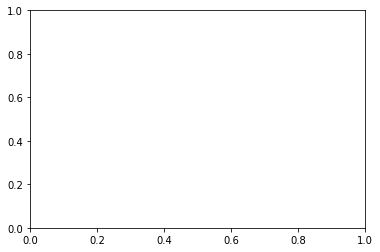

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()